In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import logging
import gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
env_size = 10


In [5]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:    9.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   13.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   13.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   15.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   15.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  115.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  115.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  124.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  124.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  224.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  224.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  230.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  230.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  236.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  236.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  242.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  242.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  244.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  244.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  253.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  253.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  257.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  257.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  357.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  357.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  363.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  363.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  371.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  371.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  377.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  377.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  386.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 1|Iteration 96|reward:  386.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  392.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  392.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  492.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  492.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  501.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  501.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 1|Iteration 117|reward:  601.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 1|Iteration 117|reward:  601.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  610.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  610.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  710.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  710.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  712.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  712.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  714.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  714.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  720.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  720.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  722.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  722.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  728.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  728.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  734.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  734.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 166|reward:  738.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 166|reward:  738.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  747.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  747.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  847.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  847.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  853.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  853.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward:  862.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 1|Iteration 240|reward:  862.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 245|reward:  962.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 1|Iteration 245|reward:  962.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 1|Iteration 248|reward:  968.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 1|Iteration 248|reward:  968.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 1|Iteration 250|reward:  974.0|last_reward_at:  248|Elapsed Time: 0:00:00||

Episode 1|Iteration 250|reward:  974.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  980.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  980.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 269|reward:  989.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 269|reward:  989.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward: 1089.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward: 1089.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward: 1095.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward: 1095.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 1|Iteration 297|reward: 1101.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 1|Iteration 297|reward: 1101.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward: 1103.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 1|Iteration 300|reward: 1103.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 307|reward: 1105.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 1|Iteration 307|reward: 1105.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 1|Iteration 313|reward: 1113.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 1|Iteration 313|reward: 1113.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 1|Iteration 319|reward: 1122.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 1|Iteration 319|reward: 1122.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 1|Iteration 321|reward: 1222.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 1|Iteration 321|reward: 1222.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 1|Iteration 325|reward: 1228.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 1|Iteration 325|reward: 1228.0|last_reward_at:  325|Elapsed Time: 0:00:00||

Episode 1|Iteration 339|reward: 1234.0|last_reward_at:  325|Elapsed Time: 0:00:00||

Episode 1|Iteration 339|reward: 1234.0|last_reward_at:  339|Elapsed Time: 0:00:00||

Episode 1|Iteration 371|reward: 1234.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 1|Iteration 400|reward: 1240.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 1|Iteration 400|reward: 1240.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 1|Iteration 432|reward: 1240.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward: 1249.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward: 1249.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 1|Iteration 442|reward: 6249.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 1|Iteration 442|reward: 6249.0|last_reward_at:  442|Elapsed Time: 0:00:01||

  Episode 1 ended at t=442 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/159 (0.12)
    explore-remote: 20/231 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 44
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8655, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  111.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  111.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  120.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  122.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  122.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  222.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  222.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  228.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  228.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  234.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  234.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  243.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  243.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  249.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  249.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  349.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  349.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  351.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  351.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  353.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  353.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  359.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  359.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 105|reward:  365.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 105|reward:  365.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  371.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  371.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  379.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 123|reward:  379.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  388.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  388.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  488.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  488.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 169|reward:  497.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 169|reward:  497.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:  597.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:  597.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 176|reward:  606.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 176|reward:  606.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 2|Iteration 187|reward:  706.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 2|Iteration 187|reward:  706.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  712.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  712.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  718.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  718.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  724.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  724.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  726.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  726.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 215|reward:  735.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 215|reward:  735.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 2|Iteration 216|reward:  835.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 2|Iteration 216|reward:  835.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  837.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  837.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  839.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 242|reward:  839.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 243|reward:  845.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 2|Iteration 243|reward:  845.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 2|Iteration 257|reward:  851.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 2|Iteration 257|reward:  851.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 2|Iteration 291|reward:  851.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 2|Iteration 311|reward:  860.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 2|Iteration 311|reward:  860.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 2|Iteration 314|reward:  862.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 2|Iteration 314|reward:  862.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 2|Iteration 321|reward:  962.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 2|Iteration 321|reward:  962.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 2|Iteration 322|reward:  968.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 2|Iteration 322|reward:  968.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 2|Iteration 328|reward:  977.0|last_reward_at:  322|Elapsed Time: 0:00:00||

Episode 2|Iteration 328|reward:  977.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 2|Iteration 333|reward: 1077.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 2|Iteration 333|reward: 1077.0|last_reward_at:  333|Elapsed Time: 0:00:00||

Episode 2|Iteration 335|reward: 1083.0|last_reward_at:  333|Elapsed Time: 0:00:00||

Episode 2|Iteration 335|reward: 1083.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 2|Iteration 345|reward: 1085.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 2|Iteration 345|reward: 1085.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 2|Iteration 347|reward: 1094.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 2|Iteration 347|reward: 1094.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 2|Iteration 348|reward: 1194.0|last_reward_at:  347|Elapsed Time: 0:00:00||

Episode 2|Iteration 348|reward: 1194.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 2|Iteration 350|reward: 1200.0|last_reward_at:  348|Elapsed Time: 0:00:00||

Episode 2|Iteration 350|reward: 1200.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 2|Iteration 366|reward: 1206.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 2|Iteration 366|reward: 1206.0|last_reward_at:  366|Elapsed Time: 0:00:00||

Episode 2|Iteration 382|reward: 1212.0|last_reward_at:  366|Elapsed Time: 0:00:00||

Episode 2|Iteration 382|reward: 1212.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 402|reward: 1214.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 2|Iteration 402|reward: 1214.0|last_reward_at:  402|Elapsed Time: 0:00:00||

Episode 2|Iteration 433|reward: 1214.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 2|Iteration 440|reward: 1223.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 2|Iteration 440|reward: 1223.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 2|Iteration 442|reward: 1229.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 2|Iteration 442|reward: 1229.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 2|Iteration 446|reward: 6229.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 2|Iteration 446|reward: 6229.0|last_reward_at:  446|Elapsed Time: 0:00:01||

  Episode 2 ended at t=446 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/178 (0.10)
    explore-remote: 20/218 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 39
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8321, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:    9.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   15.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  115.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  115.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  121.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  121.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  130.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  130.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  239.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  239.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  245.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  245.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  247.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  247.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  253.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  253.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  353.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 47|reward:  353.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  355.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  355.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  361.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 70|reward:  361.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  367.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  367.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  376.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  376.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  476.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  476.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  482.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  482.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  488.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  488.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  492.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  492.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  501.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  501.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  601.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  601.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  603.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:  603.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward:  609.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward:  609.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 126|reward:  618.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 126|reward:  618.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  718.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  718.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 148|reward:  724.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 148|reward:  724.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 3|Iteration 161|reward:  730.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 3|Iteration 161|reward:  730.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 3|Iteration 183|reward:  739.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 3|Iteration 183|reward:  739.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  839.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  839.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 3|Iteration 197|reward:  841.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 3|Iteration 197|reward:  841.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 204|reward:  847.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 204|reward:  847.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  855.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  855.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 218|reward:  861.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 218|reward:  861.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 3|Iteration 219|reward:  867.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 3|Iteration 219|reward:  867.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 3|Iteration 251|reward:  869.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 3|Iteration 251|reward:  869.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 3|Iteration 267|reward:  878.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 3|Iteration 267|reward:  878.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 3|Iteration 274|reward:  978.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 3|Iteration 274|reward:  978.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 3|Iteration 296|reward:  984.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 3|Iteration 296|reward:  984.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward:  990.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 3|Iteration 308|reward:  990.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 309|reward:  992.0|last_reward_at:  308|Elapsed Time: 0:00:00||

Episode 3|Iteration 309|reward:  992.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:  992.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 3|Iteration 355|reward:  996.0|last_reward_at:  309|Elapsed Time: 0:00:00||

Episode 3|Iteration 355|reward:  996.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 3|Iteration 391|reward:  996.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 3|Iteration 427|reward:  996.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 3|Iteration 456|reward:  996.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 3|Iteration 491|reward: 1005.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 3|Iteration 491|reward: 1005.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 3|Iteration 495|reward: 1105.0|last_reward_at:  491|Elapsed Time: 0:00:01||

Episode 3|Iteration 495|reward: 1105.0|last_reward_at:  495|Elapsed Time: 0:00:01||

Episode 3|Iteration 528|reward: 1105.0|last_reward_at:  495|Elapsed Time: 0:00:01||

Episode 3|Iteration 533|reward: 1114.0|last_reward_at:  495|Elapsed Time: 0:00:01||

Episode 3|Iteration 533|reward: 1114.0|last_reward_at:  533|Elapsed Time: 0:00:01||

Episode 3|Iteration 535|reward: 1214.0|last_reward_at:  533|Elapsed Time: 0:00:01||

Episode 3|Iteration 535|reward: 1214.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 556|reward: 1214.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 572|reward: 1220.0|last_reward_at:  535|Elapsed Time: 0:00:01||

Episode 3|Iteration 572|reward: 1220.0|last_reward_at:  572|Elapsed Time: 0:00:01||

Episode 3|Iteration 600|reward: 1226.0|last_reward_at:  572|Elapsed Time: 0:00:01||

Episode 3|Iteration 600|reward: 1226.0|last_reward_at:  600|Elapsed Time: 0:00:01||

Episode 3|Iteration 602|reward: 1232.0|last_reward_at:  600|Elapsed Time: 0:00:01||

Episode 3|Iteration 602|reward: 1232.0|last_reward_at:  602|Elapsed Time: 0:00:01||

Episode 3|Iteration 635|reward: 1232.0|last_reward_at:  602|Elapsed Time: 0:00:01||

Episode 3|Iteration 668|reward: 1232.0|last_reward_at:  602|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward: 1232.0|last_reward_at:  602|Elapsed Time: 0:00:01||

Episode 3|Iteration 715|reward: 1232.0|last_reward_at:  602|Elapsed Time: 0:00:02||

Episode 3|Iteration 730|reward: 1238.0|last_reward_at:  602|Elapsed Time: 0:00:02||

Episode 3|Iteration 730|reward: 1238.0|last_reward_at:  730|Elapsed Time: 0:00:02||

Episode 3|Iteration 761|reward: 1238.0|last_reward_at:  730|Elapsed Time: 0:00:02||

Episode 3|Iteration 790|reward: 1238.0|last_reward_at:  730|Elapsed Time: 0:00:02||

Episode 3|Iteration 820|reward: 1247.0|last_reward_at:  730|Elapsed Time: 0:00:02||

Episode 3|Iteration 820|reward: 1247.0|last_reward_at:  820|Elapsed Time: 0:00:02||

Episode 3|Iteration 825|reward: 6247.0|last_reward_at:  820|Elapsed Time: 0:00:02||

Episode 3|Iteration 825|reward: 6247.0|last_reward_at:  825|Elapsed Time: 0:00:02||

  Episode 3 ended at t=825 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/350 (0.06)
    explore-remote: 20/423 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 151
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7741, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  115.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  124.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  238.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  240.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  240.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  249.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  249.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  251.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  251.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  351.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  351.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  353.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  353.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  359.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  359.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 56|reward:  368.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 56|reward:  368.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  468.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  468.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  474.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  474.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  480.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:  480.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  489.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  489.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  589.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  589.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  595.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  595.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  597.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  597.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  603.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 99|reward:  603.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  609.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  609.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  615.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 104|reward:  615.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  623.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  623.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  625.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  625.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  634.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  634.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  734.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  734.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 157|reward:  743.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 157|reward:  743.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  843.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  843.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 165|reward:  845.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 4|Iteration 165|reward:  845.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 168|reward:  847.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 168|reward:  847.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  853.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  853.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 4|Iteration 201|reward:  862.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 4|Iteration 201|reward:  862.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 4|Iteration 204|reward:  962.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 4|Iteration 204|reward:  962.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 4|Iteration 223|reward:  968.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 4|Iteration 223|reward:  968.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 4|Iteration 225|reward:  974.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 4|Iteration 225|reward:  974.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward:  980.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward:  980.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 4|Iteration 234|reward:  982.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 4|Iteration 234|reward:  982.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 4|Iteration 244|reward:  991.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 4|Iteration 244|reward:  991.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward: 1091.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward: 1091.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 251|reward: 1097.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 251|reward: 1097.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 4|Iteration 261|reward: 1099.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 4|Iteration 261|reward: 1099.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 4|Iteration 297|reward: 1099.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward: 1108.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward: 1108.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 307|reward: 1208.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 307|reward: 1208.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 4|Iteration 316|reward: 1214.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 4|Iteration 316|reward: 1214.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 4|Iteration 336|reward: 1223.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 4|Iteration 336|reward: 1223.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 4|Iteration 337|reward: 6223.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 4|Iteration 337|reward: 6223.0|last_reward_at:  337|Elapsed Time: 0:00:00||

  Episode 4 ended at t=337 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/152 (0.11)
    explore-remote: 19/136 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 65
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7518, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:    9.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  109.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  111.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  111.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  113.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  113.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  122.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  122.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  222.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  222.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  228.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  228.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  234.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  234.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  238.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  238.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  244.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  244.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  250.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  250.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  252.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:  252.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  261.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  261.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  361.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 101|reward:  361.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  370.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  370.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  470.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  470.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 127|reward:  476.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 127|reward:  476.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 5|Iteration 130|reward:  482.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 5|Iteration 130|reward:  482.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 5|Iteration 131|reward:  486.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 5|Iteration 131|reward:  486.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  492.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  492.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  494.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  494.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:  500.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  509.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  509.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 178|reward:  609.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 178|reward:  609.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 5|Iteration 186|reward:  618.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 5|Iteration 186|reward:  618.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 5|Iteration 189|reward:  718.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 5|Iteration 189|reward:  718.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 5|Iteration 194|reward:  724.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 5|Iteration 194|reward:  724.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 5|Iteration 195|reward:  730.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 5|Iteration 195|reward:  730.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 5|Iteration 199|reward:  736.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 5|Iteration 199|reward:  736.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  745.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  745.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  845.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  845.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 5|Iteration 215|reward:  847.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 5|Iteration 215|reward:  847.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 5|Iteration 225|reward:  853.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 5|Iteration 225|reward:  853.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 5|Iteration 268|reward:  853.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 5|Iteration 296|reward:  855.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 5|Iteration 296|reward:  855.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 5|Iteration 320|reward:  864.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 5|Iteration 320|reward:  864.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 5|Iteration 327|reward:  964.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 5|Iteration 327|reward:  964.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 5|Iteration 334|reward:  970.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 5|Iteration 334|reward:  970.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  976.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  976.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 5|Iteration 381|reward:  976.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 5|Iteration 420|reward:  976.0|last_reward_at:  342|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  976.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 5|Iteration 490|reward:  976.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 5|Iteration 512|reward:  985.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 5|Iteration 512|reward:  985.0|last_reward_at:  512|Elapsed Time: 0:00:01||

Episode 5|Iteration 514|reward: 1085.0|last_reward_at:  512|Elapsed Time: 0:00:01||

Episode 5|Iteration 514|reward: 1085.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 5|Iteration 519|reward: 1087.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 5|Iteration 519|reward: 1087.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 5|Iteration 538|reward: 1089.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 5|Iteration 538|reward: 1089.0|last_reward_at:  538|Elapsed Time: 0:00:01||

Episode 5|Iteration 570|reward: 1089.0|last_reward_at:  538|Elapsed Time: 0:00:01||

Episode 5|Iteration 574|reward: 1095.0|last_reward_at:  538|Elapsed Time: 0:00:01||

Episode 5|Iteration 574|reward: 1095.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 5|Iteration 600|reward: 1101.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 5|Iteration 600|reward: 1101.0|last_reward_at:  600|Elapsed Time: 0:00:01||

Episode 5|Iteration 604|reward: 1109.0|last_reward_at:  600|Elapsed Time: 0:00:01||

Episode 5|Iteration 604|reward: 1109.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 605|reward: 1115.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 605|reward: 1115.0|last_reward_at:  605|Elapsed Time: 0:00:01||

Episode 5|Iteration 635|reward: 1115.0|last_reward_at:  605|Elapsed Time: 0:00:01||

Episode 5|Iteration 656|reward: 1124.0|last_reward_at:  605|Elapsed Time: 0:00:01||

Episode 5|Iteration 656|reward: 1124.0|last_reward_at:  656|Elapsed Time: 0:00:01||

Episode 5|Iteration 661|reward: 1224.0|last_reward_at:  656|Elapsed Time: 0:00:01||

Episode 5|Iteration 661|reward: 1224.0|last_reward_at:  661|Elapsed Time: 0:00:01||

Episode 5|Iteration 666|reward: 1230.0|last_reward_at:  661|Elapsed Time: 0:00:01||

Episode 5|Iteration 666|reward: 1230.0|last_reward_at:  666|Elapsed Time: 0:00:01||

Episode 5|Iteration 669|reward: 1236.0|last_reward_at:  666|Elapsed Time: 0:00:01||

Episode 5|Iteration 669|reward: 1236.0|last_reward_at:  669|Elapsed Time: 0:00:01||

Episode 5|Iteration 701|reward: 1236.0|last_reward_at:  669|Elapsed Time: 0:00:01||

Episode 5|Iteration 716|reward: 1245.0|last_reward_at:  669|Elapsed Time: 0:00:01||

Episode 5|Iteration 716|reward: 1245.0|last_reward_at:  716|Elapsed Time: 0:00:01||

Episode 5|Iteration 717|reward: 6245.0|last_reward_at:  716|Elapsed Time: 0:00:01||

Episode 5|Iteration 717|reward: 6245.0|last_reward_at:  717|Elapsed Time: 0:00:01||

  Episode 5 ended at t=717 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/280 (0.07)
    explore-remote: 20/385 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 193
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.7067, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  113.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  122.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  122.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  222.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  222.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  228.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  228.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  230.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  236.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:  242.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:  242.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  246.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  246.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 39|reward:  261.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 39|reward:  261.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  361.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  361.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  370.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  370.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 84|reward:  378.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 84|reward:  378.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  478.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 6|Iteration 88|reward:  478.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward:  484.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward:  484.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 6|Iteration 128|reward:  493.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 6|Iteration 128|reward:  493.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 6|Iteration 133|reward:  593.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 6|Iteration 133|reward:  593.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  595.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  595.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 6|Iteration 153|reward:  601.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 6|Iteration 153|reward:  601.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 6|Iteration 161|reward:  603.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 6|Iteration 161|reward:  603.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 6|Iteration 166|reward:  609.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 6|Iteration 166|reward:  609.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 6|Iteration 197|reward:  618.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 6|Iteration 197|reward:  618.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 6|Iteration 198|reward:  718.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 6|Iteration 198|reward:  718.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 6|Iteration 202|reward:  727.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 6|Iteration 202|reward:  727.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 6|Iteration 203|reward:  827.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 6|Iteration 203|reward:  827.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 6|Iteration 205|reward:  833.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 6|Iteration 205|reward:  833.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 6|Iteration 207|reward:  839.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 6|Iteration 207|reward:  839.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 6|Iteration 224|reward:  848.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 6|Iteration 224|reward:  848.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 6|Iteration 226|reward:  948.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 6|Iteration 226|reward:  948.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 6|Iteration 230|reward:  954.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 6|Iteration 230|reward:  954.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 6|Iteration 232|reward:  960.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 6|Iteration 232|reward:  960.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 6|Iteration 237|reward:  962.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 6|Iteration 237|reward:  962.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 6|Iteration 241|reward:  968.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 6|Iteration 241|reward:  968.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 6|Iteration 268|reward:  970.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 6|Iteration 268|reward:  970.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 6|Iteration 286|reward:  976.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 6|Iteration 286|reward:  976.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 6|Iteration 327|reward:  976.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 6|Iteration 367|reward:  976.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 6|Iteration 380|reward:  982.0|last_reward_at:  286|Elapsed Time: 0:00:00||

Episode 6|Iteration 380|reward:  982.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 6|Iteration 381|reward:  986.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 6|Iteration 381|reward:  986.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 6|Iteration 383|reward:  992.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 6|Iteration 383|reward:  992.0|last_reward_at:  383|Elapsed Time: 0:00:00||

Episode 6|Iteration 421|reward:  992.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 6|Iteration 445|reward:  994.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 6|Iteration 445|reward:  994.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 6|Iteration 481|reward:  994.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 6|Iteration 518|reward: 1003.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 6|Iteration 518|reward: 1003.0|last_reward_at:  518|Elapsed Time: 0:00:01||

Episode 6|Iteration 519|reward: 1103.0|last_reward_at:  518|Elapsed Time: 0:00:01||

Episode 6|Iteration 519|reward: 1103.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 6|Iteration 552|reward: 1103.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 6|Iteration 587|reward: 1103.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 6|Iteration 620|reward: 1103.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 6|Iteration 623|reward: 1112.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 6|Iteration 623|reward: 1112.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 6|Iteration 627|reward: 1212.0|last_reward_at:  623|Elapsed Time: 0:00:01||

Episode 6|Iteration 627|reward: 1212.0|last_reward_at:  627|Elapsed Time: 0:00:01||

Episode 6|Iteration 633|reward: 1218.0|last_reward_at:  627|Elapsed Time: 0:00:01||

Episode 6|Iteration 633|reward: 1218.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 6|Iteration 666|reward: 1218.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 6|Iteration 678|reward: 1224.0|last_reward_at:  633|Elapsed Time: 0:00:01||

Episode 6|Iteration 678|reward: 1224.0|last_reward_at:  678|Elapsed Time: 0:00:01||

Episode 6|Iteration 710|reward: 1233.0|last_reward_at:  678|Elapsed Time: 0:00:01||

Episode 6|Iteration 710|reward: 1233.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 6|Iteration 714|reward: 6233.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 6|Iteration 714|reward: 6233.0|last_reward_at:  714|Elapsed Time: 0:00:01||

  Episode 6 ended at t=714 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/303 (0.06)
    explore-remote: 19/361 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 205
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6649, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:    9.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   13.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   13.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  113.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  115.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  115.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  124.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  124.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  224.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  224.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  230.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  236.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  245.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  245.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  247.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  247.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  347.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  347.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  356.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  356.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  456.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  456.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  462.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  462.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  468.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  468.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  470.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  470.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  479.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  479.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  579.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  579.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  581.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  581.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  587.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 54|reward:  587.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  593.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  593.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  601.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  601.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  603.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  603.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  609.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  609.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  615.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  615.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 7|Iteration 102|reward:  621.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 7|Iteration 102|reward:  621.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 7|Iteration 109|reward:  627.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 7|Iteration 109|reward:  627.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 7|Iteration 132|reward:  636.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 7|Iteration 132|reward:  636.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 7|Iteration 134|reward:  736.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 7|Iteration 134|reward:  736.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 7|Iteration 153|reward:  742.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 7|Iteration 153|reward:  742.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 7|Iteration 157|reward:  744.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 7|Iteration 157|reward:  744.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 7|Iteration 159|reward:  748.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 7|Iteration 159|reward:  748.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 7|Iteration 204|reward:  748.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  757.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  757.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 207|reward:  857.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 207|reward:  857.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 7|Iteration 222|reward:  866.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 7|Iteration 222|reward:  866.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 224|reward:  966.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 7|Iteration 224|reward:  966.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 7|Iteration 235|reward:  972.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 7|Iteration 235|reward:  972.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 7|Iteration 250|reward:  978.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 7|Iteration 250|reward:  978.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 7|Iteration 260|reward:  987.0|last_reward_at:  250|Elapsed Time: 0:00:00||

Episode 7|Iteration 260|reward:  987.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 7|Iteration 264|reward: 1087.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 7|Iteration 264|reward: 1087.0|last_reward_at:  264|Elapsed Time: 0:00:00||

Episode 7|Iteration 272|reward: 1093.0|last_reward_at:  264|Elapsed Time: 0:00:00||

Episode 7|Iteration 272|reward: 1093.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 7|Iteration 274|reward: 1095.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 7|Iteration 274|reward: 1095.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 7|Iteration 311|reward: 1097.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 7|Iteration 311|reward: 1097.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 7|Iteration 333|reward: 1106.0|last_reward_at:  311|Elapsed Time: 0:00:00||

Episode 7|Iteration 333|reward: 1106.0|last_reward_at:  333|Elapsed Time: 0:00:00||

Episode 7|Iteration 337|reward: 1206.0|last_reward_at:  333|Elapsed Time: 0:00:00||

Episode 7|Iteration 337|reward: 1206.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 7|Iteration 352|reward: 1212.0|last_reward_at:  337|Elapsed Time: 0:00:00||

Episode 7|Iteration 352|reward: 1212.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 7|Iteration 369|reward: 1218.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 7|Iteration 369|reward: 1218.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 7|Iteration 370|reward: 1224.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 7|Iteration 370|reward: 1224.0|last_reward_at:  370|Elapsed Time: 0:00:00||

Episode 7|Iteration 403|reward: 1224.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 7|Iteration 436|reward: 1224.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 7|Iteration 439|reward: 1233.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 7|Iteration 439|reward: 1233.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 7|Iteration 441|reward: 6233.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 7|Iteration 441|reward: 6233.0|last_reward_at:  441|Elapsed Time: 0:00:01||

  Episode 7 ended at t=441 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/175 (0.10)
    explore-remote: 20/216 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 147
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6405, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  119.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  119.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  135.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  135.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  144.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  144.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  244.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  244.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  253.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  253.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  255.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  255.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  355.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  355.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 47|reward:  364.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 47|reward:  364.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  464.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  464.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  466.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 49|reward:  466.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  472.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  472.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  474.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  474.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  478.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  478.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:  487.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:  487.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:  587.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:  587.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  593.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:  593.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 74|reward:  599.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 8|Iteration 74|reward:  599.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  605.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  605.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 94|reward:  613.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 94|reward:  613.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:  619.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:  619.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  625.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  625.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 153|reward:  625.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 177|reward:  634.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 177|reward:  634.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 8|Iteration 179|reward:  734.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 8|Iteration 179|reward:  734.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 8|Iteration 193|reward:  740.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 8|Iteration 193|reward:  740.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 8|Iteration 195|reward:  742.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 8|Iteration 195|reward:  742.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:  748.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:  748.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward:  748.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 8|Iteration 240|reward:  752.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 8|Iteration 240|reward:  752.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 8|Iteration 256|reward:  761.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 8|Iteration 256|reward:  761.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 8|Iteration 261|reward:  861.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 8|Iteration 261|reward:  861.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 8|Iteration 295|reward:  861.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 8|Iteration 316|reward:  867.0|last_reward_at:  261|Elapsed Time: 0:00:00||

Episode 8|Iteration 316|reward:  867.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 8|Iteration 334|reward:  876.0|last_reward_at:  316|Elapsed Time: 0:00:00||

Episode 8|Iteration 334|reward:  876.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 8|Iteration 335|reward:  976.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 8|Iteration 335|reward:  976.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 8|Iteration 340|reward:  982.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 8|Iteration 340|reward:  982.0|last_reward_at:  340|Elapsed Time: 0:00:00||

Episode 8|Iteration 343|reward:  991.0|last_reward_at:  340|Elapsed Time: 0:00:00||

Episode 8|Iteration 343|reward:  991.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 8|Iteration 344|reward: 1091.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 8|Iteration 344|reward: 1091.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 8|Iteration 345|reward: 1093.0|last_reward_at:  344|Elapsed Time: 0:00:00||

Episode 8|Iteration 345|reward: 1093.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 8|Iteration 350|reward: 1099.0|last_reward_at:  345|Elapsed Time: 0:00:00||

Episode 8|Iteration 350|reward: 1099.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 8|Iteration 351|reward: 1101.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 8|Iteration 351|reward: 1101.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 8|Iteration 371|reward: 1107.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 8|Iteration 371|reward: 1107.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 8|Iteration 376|reward: 1116.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 8|Iteration 376|reward: 1116.0|last_reward_at:  376|Elapsed Time: 0:00:00||

Episode 8|Iteration 377|reward: 1216.0|last_reward_at:  376|Elapsed Time: 0:00:00||

Episode 8|Iteration 377|reward: 1216.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 8|Iteration 382|reward: 1222.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 8|Iteration 382|reward: 1222.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 8|Iteration 389|reward: 1228.0|last_reward_at:  382|Elapsed Time: 0:00:00||

Episode 8|Iteration 389|reward: 1228.0|last_reward_at:  389|Elapsed Time: 0:00:00||

Episode 8|Iteration 421|reward: 1234.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 8|Iteration 421|reward: 1234.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 8|Iteration 453|reward: 1234.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 8|Iteration 455|reward: 1243.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 8|Iteration 455|reward: 1243.0|last_reward_at:  455|Elapsed Time: 0:00:01||

Episode 8|Iteration 456|reward: 6243.0|last_reward_at:  455|Elapsed Time: 0:00:01||

Episode 8|Iteration 456|reward: 6243.0|last_reward_at:  456|Elapsed Time: 0:00:01||

  Episode 8 ended at t=456 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/172 (0.10)
    explore-remote: 20/233 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 169
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.6164, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:    9.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  109.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  111.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  111.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  113.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  113.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  122.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  122.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  222.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  222.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  228.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  228.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  234.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  234.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  243.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  243.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  343.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  343.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  349.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  349.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  351.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  351.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward:  360.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward:  360.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  362.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  462.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  462.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 65|reward:  468.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 65|reward:  468.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:  474.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:  474.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  483.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  483.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  583.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  583.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  589.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  589.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  591.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  591.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  597.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  597.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  603.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  603.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  605.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  605.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 166|reward:  614.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 166|reward:  614.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 9|Iteration 172|reward:  714.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 9|Iteration 172|reward:  714.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 9|Iteration 177|reward:  720.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 9|Iteration 177|reward:  720.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 9|Iteration 179|reward:  726.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 9|Iteration 179|reward:  726.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 9|Iteration 181|reward:  732.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 9|Iteration 181|reward:  732.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  736.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 9|Iteration 191|reward:  736.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 193|reward:  745.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 9|Iteration 193|reward:  745.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 9|Iteration 197|reward:  845.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 9|Iteration 197|reward:  845.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 9|Iteration 211|reward:  847.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 9|Iteration 211|reward:  847.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 9|Iteration 220|reward:  853.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 9|Iteration 220|reward:  853.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 9|Iteration 232|reward:  861.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 9|Iteration 232|reward:  861.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 9|Iteration 233|reward:  867.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 9|Iteration 233|reward:  867.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 9|Iteration 247|reward:  873.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 9|Iteration 247|reward:  873.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 9|Iteration 288|reward:  873.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 9|Iteration 306|reward:  882.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 9|Iteration 306|reward:  882.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 9|Iteration 307|reward:  982.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 9|Iteration 307|reward:  982.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  982.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 366|reward:  982.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 367|reward:  991.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 9|Iteration 367|reward:  991.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 9|Iteration 369|reward: 1091.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 9|Iteration 369|reward: 1091.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 9|Iteration 390|reward: 1097.0|last_reward_at:  369|Elapsed Time: 0:00:00||

Episode 9|Iteration 390|reward: 1097.0|last_reward_at:  390|Elapsed Time: 0:00:00||

Episode 9|Iteration 391|reward: 1103.0|last_reward_at:  390|Elapsed Time: 0:00:00||

Episode 9|Iteration 391|reward: 1103.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 9|Iteration 396|reward: 1111.0|last_reward_at:  391|Elapsed Time: 0:00:00||

Episode 9|Iteration 396|reward: 1111.0|last_reward_at:  396|Elapsed Time: 0:00:00||

Episode 9|Iteration 397|reward: 1113.0|last_reward_at:  396|Elapsed Time: 0:00:01||

Episode 9|Iteration 397|reward: 1113.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 9|Iteration 408|reward: 1119.0|last_reward_at:  397|Elapsed Time: 0:00:01||

Episode 9|Iteration 408|reward: 1119.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 9|Iteration 427|reward: 1121.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 9|Iteration 427|reward: 1121.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 9|Iteration 454|reward: 1121.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 9|Iteration 489|reward: 1121.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 9|Iteration 513|reward: 1130.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 9|Iteration 513|reward: 1130.0|last_reward_at:  513|Elapsed Time: 0:00:01||

Episode 9|Iteration 515|reward: 1230.0|last_reward_at:  513|Elapsed Time: 0:00:01||

Episode 9|Iteration 515|reward: 1230.0|last_reward_at:  515|Elapsed Time: 0:00:01||

Episode 9|Iteration 524|reward: 1236.0|last_reward_at:  515|Elapsed Time: 0:00:01||

Episode 9|Iteration 524|reward: 1236.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 9|Iteration 557|reward: 1236.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 9|Iteration 568|reward: 1245.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 9|Iteration 568|reward: 1245.0|last_reward_at:  568|Elapsed Time: 0:00:01||

Episode 9|Iteration 569|reward: 6245.0|last_reward_at:  568|Elapsed Time: 0:00:01||

Episode 9|Iteration 569|reward: 6245.0|last_reward_at:  569|Elapsed Time: 0:00:01||

  Episode 9 ended at t=569 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/225 (0.09)
    explore-remote: 20/292 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 231
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5879, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  123.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  240.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  242.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  242.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  248.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  248.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  257.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward:  257.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  357.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  357.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  359.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:  359.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward:  365.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward:  365.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  374.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  374.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward:  474.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 47|reward:  474.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  480.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  480.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  482.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  482.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  491.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  491.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  591.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  591.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  600.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  600.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  700.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  700.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  702.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  702.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  708.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  708.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  714.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  714.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 82|reward:  720.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 82|reward:  720.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  722.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  722.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  728.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  728.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 115|reward:  737.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 115|reward:  737.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 10|Iteration 117|reward:  837.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 10|Iteration 117|reward:  837.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 10|Iteration 118|reward:  843.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 10|Iteration 118|reward:  843.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 10|Iteration 131|reward:  845.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 10|Iteration 131|reward:  845.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 10|Iteration 175|reward:  845.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 10|Iteration 185|reward:  847.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 10|Iteration 185|reward:  847.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 10|Iteration 226|reward:  847.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 10|Iteration 235|reward:  853.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 10|Iteration 235|reward:  853.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 10|Iteration 242|reward:  862.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 10|Iteration 242|reward:  862.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 10|Iteration 244|reward:  962.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 10|Iteration 244|reward:  962.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:  968.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:  968.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 10|Iteration 252|reward:  974.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 10|Iteration 252|reward:  974.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 10|Iteration 274|reward:  983.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 10|Iteration 274|reward:  983.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 10|Iteration 275|reward: 1083.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 10|Iteration 275|reward: 1083.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 10|Iteration 276|reward: 1085.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 10|Iteration 276|reward: 1085.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 10|Iteration 280|reward: 1091.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 10|Iteration 280|reward: 1091.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 10|Iteration 296|reward: 1097.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 10|Iteration 296|reward: 1097.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 10|Iteration 320|reward: 1105.0|last_reward_at:  296|Elapsed Time: 0:00:00||

Episode 10|Iteration 320|reward: 1105.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 10|Iteration 324|reward: 1111.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 10|Iteration 324|reward: 1111.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 10|Iteration 342|reward: 1111.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 10|Iteration 375|reward: 1111.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 10|Iteration 401|reward: 1117.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 10|Iteration 401|reward: 1117.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 10|Iteration 436|reward: 1117.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 10|Iteration 443|reward: 1126.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 10|Iteration 443|reward: 1126.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 10|Iteration 444|reward: 1226.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 10|Iteration 444|reward: 1226.0|last_reward_at:  444|Elapsed Time: 0:00:01||

Episode 10|Iteration 450|reward: 1228.0|last_reward_at:  444|Elapsed Time: 0:00:01||

Episode 10|Iteration 450|reward: 1228.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 10|Iteration 483|reward: 1228.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 10|Iteration 509|reward: 1237.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 10|Iteration 509|reward: 1237.0|last_reward_at:  509|Elapsed Time: 0:00:01||

Episode 10|Iteration 511|reward: 6237.0|last_reward_at:  509|Elapsed Time: 0:00:01||

Episode 10|Iteration 511|reward: 6237.0|last_reward_at:  511|Elapsed Time: 0:00:01||

  Episode 10 ended at t=511 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/222 (0.08)
    explore-remote: 20/238 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 202
simulation ended


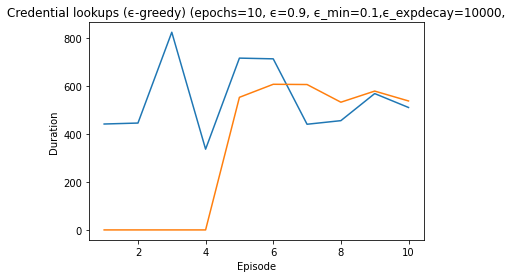

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/50 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:    9.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   15.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   15.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  115.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  124.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  124.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  130.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  130.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  138.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  138.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  238.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:  238.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  244.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  244.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  253.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  253.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  353.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  353.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  355.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  355.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  361.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  361.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  363.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  363.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  371.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  371.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  380.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  380.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  480.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  480.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  486.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  486.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  490.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 124|reward:  490.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  499.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  499.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  599.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  599.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  605.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  605.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  611.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  611.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  619.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  619.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  625.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  625.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 220|reward:  625.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 221|reward:  631.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 221|reward:  631.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  633.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  633.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 231|reward:  642.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 231|reward:  642.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 1|Iteration 237|reward:  742.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 1|Iteration 237|reward:  742.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 1|Iteration 262|reward:  751.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 1|Iteration 262|reward:  751.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 1|Iteration 263|reward:  851.0|last_reward_at:  262|Elapsed Time: 0:00:00||

Episode 1|Iteration 263|reward:  851.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 1|Iteration 290|reward:  851.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 1|Iteration 295|reward:  857.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 1|Iteration 295|reward:  857.0|last_reward_at:  295|Elapsed Time: 0:00:00||

Episode 1|Iteration 307|reward:  863.0|last_reward_at:  295|Elapsed Time: 0:00:00||

Episode 1|Iteration 307|reward:  863.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  865.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 1|Iteration 318|reward:  865.0|last_reward_at:  318|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  865.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 370|reward:  865.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 393|reward:  873.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 1|Iteration 393|reward:  873.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 1|Iteration 415|reward:  879.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 1|Iteration 415|reward:  879.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 1|Iteration 438|reward:  881.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 1|Iteration 438|reward:  881.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  881.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 1|Iteration 482|reward:  881.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 1|Iteration 500|reward:  890.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 1|Iteration 500|reward:  890.0|last_reward_at:  500|Elapsed Time: 0:00:01||

Episode 1|Iteration 505|reward:  990.0|last_reward_at:  500|Elapsed Time: 0:00:01||

Episode 1|Iteration 505|reward:  990.0|last_reward_at:  505|Elapsed Time: 0:00:01||

Episode 1|Iteration 514|reward:  999.0|last_reward_at:  505|Elapsed Time: 0:00:01||

Episode 1|Iteration 514|reward:  999.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 1|Iteration 527|reward: 1099.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 1|Iteration 527|reward: 1099.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 1|Iteration 541|reward: 1101.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 1|Iteration 541|reward: 1101.0|last_reward_at:  541|Elapsed Time: 0:00:01||

Episode 1|Iteration 567|reward: 1101.0|last_reward_at:  541|Elapsed Time: 0:00:01||

Episode 1|Iteration 572|reward: 1103.0|last_reward_at:  541|Elapsed Time: 0:00:01||

Episode 1|Iteration 572|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:01||

Episode 1|Iteration 599|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 623|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 648|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 676|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 702|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 725|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 743|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 765|reward: 1103.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 779|reward: 1109.0|last_reward_at:  572|Elapsed Time: 0:00:02||

Episode 1|Iteration 779|reward: 1109.0|last_reward_at:  779|Elapsed Time: 0:00:02||

Episode 1|Iteration 798|reward: 1109.0|last_reward_at:  779|Elapsed Time: 0:00:02||

Episode 1|Iteration 821|reward: 1109.0|last_reward_at:  779|Elapsed Time: 0:00:02||

Episode 1|Iteration 847|reward: 1109.0|last_reward_at:  779|Elapsed Time: 0:00:03||

Episode 1|Iteration 861|reward: 1115.0|last_reward_at:  779|Elapsed Time: 0:00:03||

Episode 1|Iteration 861|reward: 1115.0|last_reward_at:  861|Elapsed Time: 0:00:03||

Episode 1|Iteration 862|reward: 1121.0|last_reward_at:  861|Elapsed Time: 0:00:03||

Episode 1|Iteration 862|reward: 1121.0|last_reward_at:  862|Elapsed Time: 0:00:03||

Episode 1|Iteration 886|reward: 1121.0|last_reward_at:  862|Elapsed Time: 0:00:03||

Episode 1|Iteration 907|reward: 1121.0|last_reward_at:  862|Elapsed Time: 0:00:03||

Episode 1|Iteration 932|reward: 1121.0|last_reward_at:  862|Elapsed Time: 0:00:03||

Episode 1|Iteration 956|reward: 1121.0|last_reward_at:  862|Elapsed Time: 0:00:03||

Episode 1|Iteration 966|reward: 1129.0|last_reward_at:  862|Elapsed Time: 0:00:03||

Episode 1|Iteration 966|reward: 1129.0|last_reward_at:  966|Elapsed Time: 0:00:03||

Episode 1|Iteration 990|reward: 1129.0|last_reward_at:  966|Elapsed Time: 0:00:03||

Episode 1|Iteration 1008|reward: 1138.0|last_reward_at:  966|Elapsed Time: 0:00:03||

Episode 1|Iteration 1008|reward: 1138.0|last_reward_at: 1008|Elapsed Time: 0:00:03||

Episode 1|Iteration 1013|reward: 1238.0|last_reward_at: 1008|Elapsed Time: 0:00:03||

Episode 1|Iteration 1013|reward: 1238.0|last_reward_at: 1013|Elapsed Time: 0:00:03||

Episode 1|Iteration 1026|reward: 1238.0|last_reward_at: 1013|Elapsed Time: 0:00:03||

Episode 1|Iteration 1045|reward: 1238.0|last_reward_at: 1013|Elapsed Time: 0:00:03||

Episode 1|Iteration 1066|reward: 1238.0|last_reward_at: 1013|Elapsed Time: 0:00:04||

Episode 1|Iteration 1087|reward: 1238.0|last_reward_at: 1013|Elapsed Time: 0:00:04||

Episode 1|Iteration 1106|reward: 1238.0|last_reward_at: 1013|Elapsed Time: 0:00:04||

Episode 1|Iteration 1115|reward: 1247.0|last_reward_at: 1013|Elapsed Time: 0:00:04||

Episode 1|Iteration 1115|reward: 1247.0|last_reward_at: 1115|Elapsed Time: 0:00:04||

Episode 1|Iteration 1117|reward: 6247.0|last_reward_at: 1115|Elapsed Time: 0:00:04||

Episode 1|Iteration 1117|reward: 6247.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

  Episode 1 ended at t=1117 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/291 (0.06)
    explore-remote: 18/341 (0.05)
    explore-connect: 0/360 (0.00)
    exploit-local: 0/14 (0.00)
    exploit-remote: 2/60 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 109
  ## Episode: 2/50 'Tabular Q-learning' ϵ=0.7220, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  123.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  123.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  132.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  138.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  138.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  238.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  238.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  247.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  247.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  251.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  251.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  253.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  253.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  353.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  353.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  359.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  359.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  367.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  367.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  373.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  373.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  375.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 64|reward:  375.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  377.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  377.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  377.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  386.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  386.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 137|reward:  486.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 137|reward:  486.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  492.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  492.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  501.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 154|reward:  501.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  601.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  601.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:  603.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:  603.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  605.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  605.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  611.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 2|Iteration 204|reward:  611.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  611.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 244|reward:  620.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 2|Iteration 244|reward:  620.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 2|Iteration 245|reward:  720.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 2|Iteration 245|reward:  720.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 2|Iteration 257|reward:  726.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 2|Iteration 257|reward:  726.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 2|Iteration 263|reward:  732.0|last_reward_at:  257|Elapsed Time: 0:00:00||

Episode 2|Iteration 263|reward:  732.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 2|Iteration 265|reward:  741.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 2|Iteration 265|reward:  741.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 2|Iteration 268|reward:  841.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 2|Iteration 268|reward:  841.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 2|Iteration 269|reward:  843.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 2|Iteration 269|reward:  843.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 2|Iteration 272|reward:  845.0|last_reward_at:  269|Elapsed Time: 0:00:00||

Episode 2|Iteration 272|reward:  845.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 2|Iteration 280|reward:  851.0|last_reward_at:  272|Elapsed Time: 0:00:00||

Episode 2|Iteration 280|reward:  851.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  857.0|last_reward_at:  280|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  857.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 297|reward:  866.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 297|reward:  866.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 2|Iteration 301|reward:  966.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 2|Iteration 301|reward:  966.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  975.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 323|reward:  975.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 2|Iteration 324|reward: 1075.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 2|Iteration 324|reward: 1075.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward: 1075.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 2|Iteration 358|reward: 1081.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 2|Iteration 358|reward: 1081.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 2|Iteration 360|reward: 1083.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 2|Iteration 360|reward: 1083.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 2|Iteration 378|reward: 1083.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 2|Iteration 403|reward: 1083.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 2|Iteration 415|reward: 1089.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 2|Iteration 415|reward: 1089.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 2|Iteration 441|reward: 1089.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 2|Iteration 454|reward: 1095.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 2|Iteration 454|reward: 1095.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 479|reward: 1095.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 502|reward: 1097.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 2|Iteration 502|reward: 1097.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 2|Iteration 514|reward: 1105.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 2|Iteration 514|reward: 1105.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 2|Iteration 517|reward: 1114.0|last_reward_at:  514|Elapsed Time: 0:00:01||

Episode 2|Iteration 517|reward: 1114.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 2|Iteration 519|reward: 1214.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 2|Iteration 519|reward: 1214.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 2|Iteration 532|reward: 1223.0|last_reward_at:  519|Elapsed Time: 0:00:01||

Episode 2|Iteration 532|reward: 1223.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 2|Iteration 536|reward: 6223.0|last_reward_at:  532|Elapsed Time: 0:00:01||

Episode 2|Iteration 536|reward: 6223.0|last_reward_at:  536|Elapsed Time: 0:00:01||

  Episode 2 ended at t=536 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/111 (0.11)
    explore-remote: 14/145 (0.09)
    explore-connect: 0/166 (0.00)
    exploit-local: 4/6 (0.40)
    exploit-remote: 5/60 (0.08)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 77
  ## Episode: 3/50 'Tabular Q-learning' ϵ=0.6496, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:    9.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  109.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  115.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  115.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  117.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  126.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  126.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  226.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  226.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  228.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  228.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  237.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  237.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  243.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  243.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  247.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  247.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  347.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  347.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  349.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  349.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  355.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  355.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  361.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 3|Iteration 74|reward:  361.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward:  361.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  370.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  370.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward:  470.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 118|reward:  470.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  479.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  479.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  579.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  579.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 126|reward:  585.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 126|reward:  585.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  587.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 3|Iteration 145|reward:  587.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  593.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  593.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  599.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  599.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 155|reward:  607.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 155|reward:  607.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 3|Iteration 167|reward:  609.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 3|Iteration 167|reward:  609.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  618.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:  618.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  718.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:  718.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  724.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 3|Iteration 182|reward:  724.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 3|Iteration 189|reward:  733.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 3|Iteration 189|reward:  733.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  833.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  833.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 3|Iteration 198|reward:  835.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 3|Iteration 198|reward:  835.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  837.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  837.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  843.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 3|Iteration 210|reward:  843.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  849.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  849.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 215|reward:  858.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 215|reward:  858.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 3|Iteration 216|reward:  958.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 3|Iteration 216|reward:  958.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 3|Iteration 217|reward:  964.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 3|Iteration 217|reward:  964.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 3|Iteration 221|reward:  970.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 3|Iteration 221|reward:  970.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 3|Iteration 223|reward:  979.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 3|Iteration 223|reward:  979.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 3|Iteration 225|reward: 1079.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 3|Iteration 225|reward: 1079.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 3|Iteration 229|reward: 1081.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 3|Iteration 229|reward: 1081.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 3|Iteration 232|reward: 1083.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 3|Iteration 232|reward: 1083.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 3|Iteration 255|reward: 1083.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 3|Iteration 273|reward: 1089.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 3|Iteration 273|reward: 1089.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward: 1095.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward: 1095.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 297|reward: 1095.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 323|reward: 1095.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 332|reward: 1101.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 3|Iteration 332|reward: 1101.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 3|Iteration 340|reward: 1110.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 3|Iteration 340|reward: 1110.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 3|Iteration 341|reward: 1210.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 3|Iteration 341|reward: 1210.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward: 1219.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward: 1219.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 3|Iteration 344|reward: 6219.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 3|Iteration 344|reward: 6219.0|last_reward_at:  344|Elapsed Time: 0:00:01||

  Episode 3 ended at t=344 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/64 (0.14)
    explore-remote: 14/100 (0.12)
    explore-connect: 1/96 (0.01)
    exploit-local: 9/0 (1.00)
    exploit-remote: 4/36 (0.10)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 65
  ## Episode: 4/50 'Tabular Q-learning' ϵ=0.6071, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  115.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  124.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  124.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  126.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  126.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  128.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  128.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  228.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  228.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  237.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  237.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  243.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  243.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  343.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  343.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  345.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  351.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  351.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  357.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  357.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  363.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  363.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  365.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  365.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  373.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  373.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  382.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  382.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  482.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  482.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  491.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  491.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  591.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 96|reward:  591.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  591.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  593.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  593.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  602.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  602.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 121|reward:  702.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 121|reward:  702.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  704.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 4|Iteration 124|reward:  704.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  710.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  710.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  716.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:  716.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  725.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 136|reward:  725.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 4|Iteration 137|reward:  727.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 4|Iteration 137|reward:  727.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  731.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 4|Iteration 139|reward:  731.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  831.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 4|Iteration 141|reward:  831.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  840.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  840.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 143|reward:  940.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 143|reward:  940.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 4|Iteration 147|reward:  946.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 4|Iteration 147|reward:  946.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  955.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  955.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 4|Iteration 153|reward: 1055.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 4|Iteration 153|reward: 1055.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 4|Iteration 157|reward: 1057.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 4|Iteration 157|reward: 1057.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward: 1063.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 4|Iteration 163|reward: 1063.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 4|Iteration 179|reward: 1069.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 4|Iteration 179|reward: 1069.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 4|Iteration 184|reward: 1071.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 4|Iteration 184|reward: 1071.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 4|Iteration 194|reward: 1077.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 4|Iteration 194|reward: 1077.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward: 1085.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward: 1085.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward: 1091.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward: 1091.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 244|reward: 1091.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 264|reward: 1097.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 4|Iteration 264|reward: 1097.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 4|Iteration 290|reward: 1097.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 4|Iteration 313|reward: 1097.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 4|Iteration 338|reward: 1097.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 4|Iteration 361|reward: 1097.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 4|Iteration 370|reward: 1103.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 4|Iteration 370|reward: 1103.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 391|reward: 1103.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 413|reward: 1103.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 435|reward: 1103.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 443|reward: 1109.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 4|Iteration 443|reward: 1109.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 4|Iteration 445|reward: 1115.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 4|Iteration 445|reward: 1115.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 4|Iteration 467|reward: 1115.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 4|Iteration 488|reward: 1115.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 512|reward: 1115.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 534|reward: 1115.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 559|reward: 1115.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 577|reward: 1121.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 577|reward: 1121.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 4|Iteration 600|reward: 1121.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 4|Iteration 621|reward: 1121.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 4|Iteration 643|reward: 1121.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 4|Iteration 657|reward: 1130.0|last_reward_at:  577|Elapsed Time: 0:00:02||

Episode 4|Iteration 657|reward: 1130.0|last_reward_at:  657|Elapsed Time: 0:00:02||

Episode 4|Iteration 658|reward: 1230.0|last_reward_at:  657|Elapsed Time: 0:00:02||

Episode 4|Iteration 658|reward: 1230.0|last_reward_at:  658|Elapsed Time: 0:00:02||

Episode 4|Iteration 682|reward: 1230.0|last_reward_at:  658|Elapsed Time: 0:00:02||

Episode 4|Iteration 696|reward: 1239.0|last_reward_at:  658|Elapsed Time: 0:00:03||

Episode 4|Iteration 696|reward: 1239.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 4|Iteration 700|reward: 6239.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 4|Iteration 700|reward: 6239.0|last_reward_at:  700|Elapsed Time: 0:00:03||

  Episode 4 ended at t=700 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/135 (0.08)
    explore-remote: 16/211 (0.07)
    explore-connect: 0/211 (0.00)
    exploit-local: 8/5 (0.62)
    exploit-remote: 4/87 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 182
  ## Episode: 5/50 'Tabular Q-learning' ϵ=0.5291, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  117.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  117.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  126.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  126.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  128.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  128.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  228.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  228.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  237.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  237.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  337.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  337.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  343.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  343.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  349.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  349.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  351.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:  351.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  353.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 5|Iteration 93|reward:  353.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  359.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  359.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  365.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 108|reward:  365.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 140|reward:  374.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 5|Iteration 140|reward:  374.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 5|Iteration 141|reward:  474.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 5|Iteration 141|reward:  474.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 5|Iteration 144|reward:  483.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 5|Iteration 144|reward:  483.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward:  583.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward:  583.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  589.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  589.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 5|Iteration 158|reward:  598.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 5|Iteration 158|reward:  598.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 5|Iteration 161|reward:  698.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 5|Iteration 161|reward:  698.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  704.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  704.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 180|reward:  706.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 180|reward:  706.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 5|Iteration 196|reward:  708.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 5|Iteration 196|reward:  708.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  714.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  714.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  723.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  723.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  823.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  823.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 5|Iteration 212|reward:  825.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 5|Iteration 212|reward:  825.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  825.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 238|reward:  831.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 5|Iteration 238|reward:  831.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 255|reward:  833.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 5|Iteration 255|reward:  833.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 5|Iteration 267|reward:  839.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 5|Iteration 267|reward:  839.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 5|Iteration 294|reward:  839.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 5|Iteration 295|reward:  847.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 5|Iteration 295|reward:  847.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 5|Iteration 297|reward:  853.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 5|Iteration 297|reward:  853.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 5|Iteration 320|reward:  853.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 5|Iteration 334|reward:  862.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 5|Iteration 334|reward:  862.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 5|Iteration 336|reward:  962.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 5|Iteration 336|reward:  962.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 359|reward:  962.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 382|reward:  962.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 384|reward:  971.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 5|Iteration 384|reward:  971.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 5|Iteration 385|reward: 1071.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 5|Iteration 385|reward: 1071.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 5|Iteration 389|reward: 1077.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 5|Iteration 389|reward: 1077.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 5|Iteration 402|reward: 1083.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 5|Iteration 402|reward: 1083.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 5|Iteration 420|reward: 1089.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 5|Iteration 420|reward: 1089.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 5|Iteration 425|reward: 1091.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 5|Iteration 425|reward: 1091.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 5|Iteration 450|reward: 1099.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 5|Iteration 450|reward: 1099.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 5|Iteration 470|reward: 1099.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 5|Iteration 487|reward: 1099.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 5|Iteration 509|reward: 1099.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 5|Iteration 514|reward: 1105.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 5|Iteration 514|reward: 1105.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 5|Iteration 535|reward: 1105.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 5|Iteration 539|reward: 1111.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 5|Iteration 539|reward: 1111.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 5|Iteration 543|reward: 1113.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 5|Iteration 543|reward: 1113.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 566|reward: 1113.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 588|reward: 1113.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 610|reward: 1113.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 633|reward: 1113.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 656|reward: 1113.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 677|reward: 1113.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 696|reward: 1119.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 5|Iteration 696|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:02||

Episode 5|Iteration 718|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 740|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 760|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 779|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 798|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 818|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 839|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 861|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 881|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 903|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:03||

Episode 5|Iteration 924|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 5|Iteration 941|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 5|Iteration 958|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 5|Iteration 976|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 5|Iteration 996|reward: 1119.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 5|Iteration 1003|reward: 1128.0|last_reward_at:  696|Elapsed Time: 0:00:04||

Episode 5|Iteration 1003|reward: 1128.0|last_reward_at: 1003|Elapsed Time: 0:00:04||

Episode 5|Iteration 1004|reward: 1228.0|last_reward_at: 1003|Elapsed Time: 0:00:04||

Episode 5|Iteration 1004|reward: 1228.0|last_reward_at: 1004|Elapsed Time: 0:00:04||

Episode 5|Iteration 1010|reward: 1234.0|last_reward_at: 1004|Elapsed Time: 0:00:04||

Episode 5|Iteration 1010|reward: 1234.0|last_reward_at: 1010|Elapsed Time: 0:00:04||

Episode 5|Iteration 1021|reward: 1243.0|last_reward_at: 1010|Elapsed Time: 0:00:04||

Episode 5|Iteration 1021|reward: 1243.0|last_reward_at: 1021|Elapsed Time: 0:00:04||

Episode 5|Iteration 1022|reward: 6243.0|last_reward_at: 1021|Elapsed Time: 0:00:04||

Episode 5|Iteration 1022|reward: 6243.0|last_reward_at: 1022|Elapsed Time: 0:00:04||

  Episode 5 ended at t=1022 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/230 (0.05)
    explore-remote: 18/312 (0.05)
    explore-connect: 0/331 (0.00)
    exploit-local: 9/13 (0.41)
    exploit-remote: 2/84 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 413
  ## Episode: 6/50 'Tabular Q-learning' ϵ=0.4331, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  123.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  125.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  127.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  136.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  236.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  245.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  245.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  345.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  351.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  351.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  357.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  357.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  366.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  366.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward:  466.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward:  466.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward:  468.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward:  468.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  477.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  477.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 51|reward:  577.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 51|reward:  577.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:  583.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:  583.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 6|Iteration 68|reward:  589.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 6|Iteration 68|reward:  589.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  595.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  595.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  601.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  601.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  603.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  603.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 81|reward:  605.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 81|reward:  605.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 6|Iteration 108|reward:  614.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 6|Iteration 108|reward:  614.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  714.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  714.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 112|reward:  723.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 112|reward:  723.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 6|Iteration 113|reward:  823.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 6|Iteration 113|reward:  823.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  829.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  829.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  835.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  835.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:  837.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 132|reward:  837.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 143|reward:  846.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 6|Iteration 143|reward:  846.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 6|Iteration 144|reward:  946.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 6|Iteration 144|reward:  946.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  948.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  948.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 6|Iteration 149|reward:  957.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 6|Iteration 149|reward:  957.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 150|reward: 1057.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 150|reward: 1057.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 151|reward: 1063.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 151|reward: 1063.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 6|Iteration 158|reward: 1065.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 6|Iteration 158|reward: 1065.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 6|Iteration 161|reward: 1074.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 6|Iteration 161|reward: 1074.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 6|Iteration 162|reward: 1174.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 6|Iteration 162|reward: 1174.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 6|Iteration 163|reward: 1176.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 6|Iteration 163|reward: 1176.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 6|Iteration 164|reward: 1185.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 6|Iteration 164|reward: 1185.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 6|Iteration 165|reward: 1191.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 6|Iteration 165|reward: 1191.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward: 6191.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 6|Iteration 169|reward: 6191.0|last_reward_at:  169|Elapsed Time: 0:00:00||

  Episode 6 ended at t=169 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/23 (0.28)
    explore-remote: 16/47 (0.25)
    explore-connect: 0/55 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 74
  ## Episode: 7/50 'Tabular Q-learning' ϵ=0.4190, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   15.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  115.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  121.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  121.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  127.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  135.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  144.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  144.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  244.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  244.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  253.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  253.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  353.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  353.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:  355.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:  355.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  364.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  364.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 64|reward:  464.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 64|reward:  464.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  470.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  470.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  479.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  479.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 70|reward:  579.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 70|reward:  579.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  581.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward:  581.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  587.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  587.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 104|reward:  593.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 104|reward:  593.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 7|Iteration 115|reward:  595.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 7|Iteration 115|reward:  595.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 7|Iteration 125|reward:  601.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 7|Iteration 125|reward:  601.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 7|Iteration 137|reward:  607.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 7|Iteration 137|reward:  607.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 7|Iteration 144|reward:  613.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 7|Iteration 144|reward:  613.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 7|Iteration 148|reward:  622.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 7|Iteration 148|reward:  622.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 7|Iteration 149|reward:  722.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 7|Iteration 149|reward:  722.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 7|Iteration 159|reward:  728.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 7|Iteration 159|reward:  728.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 7|Iteration 161|reward:  737.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 7|Iteration 161|reward:  737.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 7|Iteration 162|reward:  837.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 7|Iteration 162|reward:  837.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 7|Iteration 177|reward:  839.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 7|Iteration 177|reward:  839.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 7|Iteration 199|reward:  839.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  845.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  845.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 228|reward:  845.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 246|reward:  847.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 246|reward:  847.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 7|Iteration 270|reward:  847.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 7|Iteration 286|reward:  853.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 7|Iteration 286|reward:  853.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 7|Iteration 294|reward:  855.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 7|Iteration 294|reward:  855.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 7|Iteration 311|reward:  863.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 7|Iteration 311|reward:  863.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 7|Iteration 323|reward:  869.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 7|Iteration 323|reward:  869.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 7|Iteration 339|reward:  875.0|last_reward_at:  323|Elapsed Time: 0:00:01||

Episode 7|Iteration 339|reward:  875.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 359|reward:  875.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 381|reward:  875.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 407|reward:  875.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 431|reward:  875.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 454|reward:  875.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 468|reward:  884.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 7|Iteration 468|reward:  884.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 7|Iteration 471|reward:  984.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 7|Iteration 471|reward:  984.0|last_reward_at:  471|Elapsed Time: 0:00:01||

Episode 7|Iteration 476|reward:  993.0|last_reward_at:  471|Elapsed Time: 0:00:01||

Episode 7|Iteration 476|reward:  993.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 7|Iteration 479|reward: 1093.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 7|Iteration 479|reward: 1093.0|last_reward_at:  479|Elapsed Time: 0:00:02||

Episode 7|Iteration 494|reward: 1099.0|last_reward_at:  479|Elapsed Time: 0:00:02||

Episode 7|Iteration 494|reward: 1099.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 7|Iteration 505|reward: 1105.0|last_reward_at:  494|Elapsed Time: 0:00:02||

Episode 7|Iteration 505|reward: 1105.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 7|Iteration 514|reward: 1107.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 7|Iteration 514|reward: 1107.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 7|Iteration 522|reward: 1113.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 7|Iteration 522|reward: 1113.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 7|Iteration 541|reward: 1113.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 7|Iteration 555|reward: 1121.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 7|Iteration 555|reward: 1121.0|last_reward_at:  555|Elapsed Time: 0:00:02||

Episode 7|Iteration 570|reward: 1121.0|last_reward_at:  555|Elapsed Time: 0:00:02||

Episode 7|Iteration 578|reward: 1130.0|last_reward_at:  555|Elapsed Time: 0:00:02||

Episode 7|Iteration 578|reward: 1130.0|last_reward_at:  578|Elapsed Time: 0:00:02||

Episode 7|Iteration 581|reward: 1230.0|last_reward_at:  578|Elapsed Time: 0:00:02||

Episode 7|Iteration 581|reward: 1230.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 7|Iteration 592|reward: 1239.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 7|Iteration 592|reward: 1239.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 7|Iteration 594|reward: 6239.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 7|Iteration 594|reward: 6239.0|last_reward_at:  594|Elapsed Time: 0:00:02||

  Episode 7 ended at t=594 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/140 (0.08)
    explore-remote: 19/185 (0.09)
    explore-connect: 0/202 (0.00)
    exploit-local: 7/15 (0.32)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 329
  ## Episode: 8/50 'Tabular Q-learning' ϵ=0.3732, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  123.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  131.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  131.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  133.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  133.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  133.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  142.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  142.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  242.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  242.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  251.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  251.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 80|reward:  351.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 80|reward:  351.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 8|Iteration 82|reward:  357.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 8|Iteration 82|reward:  357.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 8|Iteration 84|reward:  363.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 8|Iteration 84|reward:  363.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  372.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  372.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 88|reward:  472.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 88|reward:  472.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 8|Iteration 91|reward:  481.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 8|Iteration 91|reward:  481.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 8|Iteration 93|reward:  581.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 8|Iteration 93|reward:  581.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 99|reward:  583.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 99|reward:  583.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 8|Iteration 106|reward:  592.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 8|Iteration 106|reward:  592.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  692.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  692.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 109|reward:  701.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 109|reward:  701.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  801.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 8|Iteration 110|reward:  801.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  807.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  807.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  809.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  809.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 122|reward:  815.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 122|reward:  815.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 8|Iteration 127|reward:  821.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 8|Iteration 127|reward:  821.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 8|Iteration 129|reward:  827.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 8|Iteration 129|reward:  827.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  833.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  833.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 137|reward:  835.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 137|reward:  835.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  837.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  837.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 146|reward:  843.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 146|reward:  843.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 8|Iteration 148|reward:  849.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 8|Iteration 148|reward:  849.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 8|Iteration 172|reward:  849.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 8|Iteration 173|reward:  855.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 8|Iteration 173|reward:  855.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 8|Iteration 195|reward:  855.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 8|Iteration 197|reward:  857.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 8|Iteration 197|reward:  857.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 8|Iteration 198|reward:  865.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 8|Iteration 198|reward:  865.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 8|Iteration 222|reward:  865.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 8|Iteration 225|reward:  867.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 8|Iteration 225|reward:  867.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 8|Iteration 244|reward:  867.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 257|reward:  873.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 257|reward:  873.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 281|reward:  873.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 291|reward:  882.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 291|reward:  882.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 8|Iteration 292|reward:  982.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 8|Iteration 292|reward:  982.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 8|Iteration 307|reward:  991.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 8|Iteration 307|reward:  991.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 8|Iteration 308|reward: 1091.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 8|Iteration 308|reward: 1091.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 8|Iteration 331|reward: 1091.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 8|Iteration 336|reward: 1100.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 8|Iteration 336|reward: 1100.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 8|Iteration 338|reward: 1200.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 8|Iteration 338|reward: 1200.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 8|Iteration 344|reward: 1206.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 8|Iteration 344|reward: 1206.0|last_reward_at:  344|Elapsed Time: 0:00:01||

Episode 8|Iteration 345|reward: 1215.0|last_reward_at:  344|Elapsed Time: 0:00:01||

Episode 8|Iteration 345|reward: 1215.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 8|Iteration 346|reward: 6215.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 8|Iteration 346|reward: 6215.0|last_reward_at:  346|Elapsed Time: 0:00:01||

  Episode 8 ended at t=346 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/75 (0.12)
    explore-remote: 17/102 (0.14)
    explore-connect: 0/119 (0.00)
    exploit-local: 8/4 (0.67)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 201
  ## Episode: 9/50 'Tabular Q-learning' ϵ=0.3489, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  117.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  117.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  126.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  126.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  226.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  226.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  241.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  241.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  341.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  341.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  343.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  343.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  345.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  345.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  351.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  351.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  357.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  357.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  365.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  365.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 60|reward:  365.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 61|reward:  367.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 61|reward:  367.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 9|Iteration 64|reward:  373.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 9|Iteration 64|reward:  373.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  379.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  379.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:  379.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  379.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  388.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:  388.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 9|Iteration 134|reward:  488.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 9|Iteration 134|reward:  488.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 9|Iteration 154|reward:  497.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 9|Iteration 154|reward:  497.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 9|Iteration 159|reward:  597.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 9|Iteration 159|reward:  597.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 9|Iteration 165|reward:  599.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 9|Iteration 165|reward:  599.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 9|Iteration 177|reward:  601.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 9|Iteration 177|reward:  601.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 9|Iteration 184|reward:  607.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 9|Iteration 184|reward:  607.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 9|Iteration 212|reward:  613.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 9|Iteration 212|reward:  613.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 9|Iteration 221|reward:  619.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 9|Iteration 221|reward:  619.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 224|reward:  627.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 224|reward:  627.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 9|Iteration 240|reward:  636.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 9|Iteration 240|reward:  636.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 9|Iteration 242|reward:  736.0|last_reward_at:  240|Elapsed Time: 0:00:00||

Episode 9|Iteration 242|reward:  736.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 9|Iteration 259|reward:  745.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 9|Iteration 259|reward:  745.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 9|Iteration 260|reward:  845.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 9|Iteration 260|reward:  845.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 9|Iteration 265|reward:  847.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 9|Iteration 265|reward:  847.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 9|Iteration 288|reward:  853.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 9|Iteration 288|reward:  853.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 9|Iteration 303|reward:  862.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 9|Iteration 303|reward:  862.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 9|Iteration 305|reward:  962.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 9|Iteration 305|reward:  962.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 9|Iteration 313|reward:  964.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 9|Iteration 313|reward:  964.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 9|Iteration 315|reward:  973.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 9|Iteration 315|reward:  973.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 9|Iteration 316|reward: 1073.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 9|Iteration 316|reward: 1073.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 9|Iteration 340|reward: 1073.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 9|Iteration 346|reward: 1075.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 9|Iteration 346|reward: 1075.0|last_reward_at:  346|Elapsed Time: 0:00:01||

Episode 9|Iteration 353|reward: 1081.0|last_reward_at:  346|Elapsed Time: 0:00:01||

Episode 9|Iteration 353|reward: 1081.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 9|Iteration 354|reward: 1090.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 9|Iteration 354|reward: 1090.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 9|Iteration 355|reward: 1190.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 9|Iteration 355|reward: 1190.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward: 1196.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward: 1196.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 9|Iteration 362|reward: 1202.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 9|Iteration 362|reward: 1202.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 9|Iteration 370|reward: 1208.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 9|Iteration 370|reward: 1208.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 9|Iteration 390|reward: 1217.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 9|Iteration 390|reward: 1217.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 9|Iteration 391|reward: 6217.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 9|Iteration 391|reward: 6217.0|last_reward_at:  391|Elapsed Time: 0:00:01||

  Episode 9 ended at t=391 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/98 (0.09)
    explore-remote: 16/106 (0.13)
    explore-connect: 0/128 (0.00)
    exploit-local: 8/5 (0.62)
    exploit-remote: 2/7 (0.22)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 211
  ## Episode: 10/50 'Tabular Q-learning' ϵ=0.3234, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  115.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  117.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  119.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  119.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  128.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  128.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  228.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  228.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  237.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  237.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  337.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  337.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  343.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  343.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  349.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  349.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  355.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  355.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  357.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  357.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  366.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  366.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  466.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  466.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  475.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  475.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  575.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  575.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:  577.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:  577.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  586.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  586.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  592.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  592.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  692.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  692.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  701.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  701.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  801.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  801.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 74|reward:  803.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 74|reward:  803.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  805.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  805.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  811.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  811.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  817.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  817.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  817.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 118|reward:  823.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 118|reward:  823.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 10|Iteration 145|reward:  823.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 10|Iteration 147|reward:  829.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 10|Iteration 147|reward:  829.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 10|Iteration 151|reward:  835.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 10|Iteration 151|reward:  835.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 10|Iteration 159|reward:  841.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 10|Iteration 159|reward:  841.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 10|Iteration 160|reward:  843.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 10|Iteration 160|reward:  843.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 10|Iteration 161|reward:  851.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 10|Iteration 161|reward:  851.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  853.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  853.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 187|reward:  853.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 196|reward:  859.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 196|reward:  859.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 10|Iteration 218|reward:  859.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 10|Iteration 240|reward:  859.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 10|Iteration 263|reward:  859.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 10|Iteration 281|reward:  865.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 10|Iteration 281|reward:  865.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 301|reward:  865.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 323|reward:  865.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 342|reward:  865.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 363|reward:  865.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 385|reward:  865.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 405|reward:  865.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 406|reward:  871.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 10|Iteration 406|reward:  871.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 10|Iteration 430|reward:  871.0|last_reward_at:  406|Elapsed Time: 0:00:01||

Episode 10|Iteration 452|reward:  880.0|last_reward_at:  406|Elapsed Time: 0:00:02||

Episode 10|Iteration 452|reward:  880.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 10|Iteration 453|reward:  980.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 10|Iteration 453|reward:  980.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 10|Iteration 472|reward:  986.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 10|Iteration 472|reward:  986.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 10|Iteration 483|reward:  988.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 10|Iteration 483|reward:  988.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 10|Iteration 504|reward:  988.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 10|Iteration 526|reward:  988.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward:  997.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 10|Iteration 532|reward:  997.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 10|Iteration 533|reward: 1097.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 10|Iteration 533|reward: 1097.0|last_reward_at:  533|Elapsed Time: 0:00:02||

Episode 10|Iteration 550|reward: 1103.0|last_reward_at:  533|Elapsed Time: 0:00:02||

Episode 10|Iteration 550|reward: 1103.0|last_reward_at:  550|Elapsed Time: 0:00:02||

Episode 10|Iteration 567|reward: 1111.0|last_reward_at:  550|Elapsed Time: 0:00:02||

Episode 10|Iteration 567|reward: 1111.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 10|Iteration 588|reward: 1111.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 10|Iteration 605|reward: 1117.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 10|Iteration 605|reward: 1117.0|last_reward_at:  605|Elapsed Time: 0:00:02||

Episode 10|Iteration 626|reward: 1117.0|last_reward_at:  605|Elapsed Time: 0:00:02||

Episode 10|Iteration 645|reward: 1117.0|last_reward_at:  605|Elapsed Time: 0:00:02||

Episode 10|Iteration 666|reward: 1117.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 684|reward: 1117.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 698|reward: 1119.0|last_reward_at:  605|Elapsed Time: 0:00:03||

Episode 10|Iteration 698|reward: 1119.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 10|Iteration 714|reward: 1119.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 10|Iteration 732|reward: 1119.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 10|Iteration 752|reward: 1119.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 10|Iteration 761|reward: 1128.0|last_reward_at:  698|Elapsed Time: 0:00:03||

Episode 10|Iteration 761|reward: 1128.0|last_reward_at:  761|Elapsed Time: 0:00:03||

Episode 10|Iteration 764|reward: 1228.0|last_reward_at:  761|Elapsed Time: 0:00:03||

Episode 10|Iteration 764|reward: 1228.0|last_reward_at:  764|Elapsed Time: 0:00:03||

Episode 10|Iteration 781|reward: 1237.0|last_reward_at:  764|Elapsed Time: 0:00:03||

Episode 10|Iteration 781|reward: 1237.0|last_reward_at:  781|Elapsed Time: 0:00:03||

Episode 10|Iteration 782|reward: 6237.0|last_reward_at:  781|Elapsed Time: 0:00:03||

Episode 10|Iteration 782|reward: 6237.0|last_reward_at:  782|Elapsed Time: 0:00:03||

  Episode 10 ended at t=782 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/183 (0.06)
    explore-remote: 19/242 (0.07)
    explore-connect: 0/277 (0.00)
    exploit-local: 8/1 (0.89)
    exploit-remote: 1/28 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 499
  ## Episode: 11/50 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:  123.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  234.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  243.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  243.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  343.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  343.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  352.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  352.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  452.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  452.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  461.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  461.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  561.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  561.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  570.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  570.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  670.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  670.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  679.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  679.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  779.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  779.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  781.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  781.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  790.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  790.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  890.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  890.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 37|reward:  899.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 37|reward:  899.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  999.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  999.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward: 1001.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 40|reward: 1001.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 46|reward: 1003.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 11|Iteration 46|reward: 1003.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward: 1005.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 11|Iteration 48|reward: 1005.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward: 1011.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward: 1011.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 50|reward: 1017.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 50|reward: 1017.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 11|Iteration 55|reward: 1023.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 11|Iteration 55|reward: 1023.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 11|Iteration 62|reward: 1029.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 11|Iteration 62|reward: 1029.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 11|Iteration 63|reward: 1038.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 11|Iteration 63|reward: 1038.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 11|Iteration 64|reward: 1138.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 11|Iteration 64|reward: 1138.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 11|Iteration 65|reward: 1144.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 11|Iteration 65|reward: 1144.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 11|Iteration 69|reward: 1153.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 11|Iteration 69|reward: 1153.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 11|Iteration 72|reward: 6153.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 11|Iteration 72|reward: 6153.0|last_reward_at:   72|Elapsed Time: 0:00:00||

  Episode 11 ended at t=72 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/9 (0.36)
    explore-remote: 8/5 (0.62)
    explore-connect: 0/19 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 28
  ## Episode: 12/50 'Tabular Q-learning' ϵ=0.2742, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  123.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  131.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  131.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  140.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  140.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  240.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  240.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 36|reward:  249.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 36|reward:  249.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  349.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  349.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  351.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  351.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  353.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  353.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 52|reward:  355.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 52|reward:  355.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 12|Iteration 84|reward:  355.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 12|Iteration 87|reward:  361.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 12|Iteration 87|reward:  361.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 12|Iteration 98|reward:  369.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 12|Iteration 98|reward:  369.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 12|Iteration 114|reward:  369.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 12|Iteration 127|reward:  375.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 12|Iteration 127|reward:  375.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 12|Iteration 149|reward:  384.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 12|Iteration 149|reward:  384.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 12|Iteration 150|reward:  484.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 12|Iteration 150|reward:  484.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 12|Iteration 171|reward:  493.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 12|Iteration 171|reward:  493.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 12|Iteration 173|reward:  593.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 12|Iteration 173|reward:  593.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 12|Iteration 174|reward:  595.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 12|Iteration 174|reward:  595.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 12|Iteration 178|reward:  601.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 12|Iteration 178|reward:  601.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 12|Iteration 184|reward:  607.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 12|Iteration 184|reward:  607.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 12|Iteration 196|reward:  613.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 12|Iteration 196|reward:  613.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 12|Iteration 204|reward:  621.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 12|Iteration 204|reward:  621.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 12|Iteration 218|reward:  627.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 12|Iteration 218|reward:  627.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 12|Iteration 219|reward:  629.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 12|Iteration 219|reward:  629.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 12|Iteration 243|reward:  629.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 12|Iteration 269|reward:  629.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 12|Iteration 295|reward:  629.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 12|Iteration 318|reward:  638.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 12|Iteration 318|reward:  638.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 12|Iteration 321|reward:  738.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 12|Iteration 321|reward:  738.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 12|Iteration 324|reward:  747.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 12|Iteration 324|reward:  747.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 12|Iteration 325|reward:  847.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 12|Iteration 325|reward:  847.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 12|Iteration 342|reward:  847.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 12|Iteration 343|reward:  853.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 12|Iteration 343|reward:  853.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 12|Iteration 344|reward:  859.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 12|Iteration 344|reward:  859.0|last_reward_at:  344|Elapsed Time: 0:00:01||

Episode 12|Iteration 352|reward:  867.0|last_reward_at:  344|Elapsed Time: 0:00:01||

Episode 12|Iteration 352|reward:  867.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 12|Iteration 375|reward:  867.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 12|Iteration 379|reward:  873.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 12|Iteration 379|reward:  873.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 12|Iteration 381|reward:  875.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 12|Iteration 381|reward:  875.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 12|Iteration 384|reward:  877.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 12|Iteration 384|reward:  877.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 12|Iteration 405|reward:  877.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 12|Iteration 426|reward:  877.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 12|Iteration 444|reward:  886.0|last_reward_at:  384|Elapsed Time: 0:00:01||

Episode 12|Iteration 444|reward:  886.0|last_reward_at:  444|Elapsed Time: 0:00:01||

Episode 12|Iteration 445|reward:  986.0|last_reward_at:  444|Elapsed Time: 0:00:01||

Episode 12|Iteration 445|reward:  986.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 12|Iteration 467|reward:  986.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 12|Iteration 479|reward:  992.0|last_reward_at:  445|Elapsed Time: 0:00:01||

Episode 12|Iteration 479|reward:  992.0|last_reward_at:  479|Elapsed Time: 0:00:01||

Episode 12|Iteration 488|reward:  996.0|last_reward_at:  479|Elapsed Time: 0:00:02||

Episode 12|Iteration 488|reward:  996.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 12|Iteration 509|reward:  996.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 12|Iteration 532|reward:  996.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 12|Iteration 539|reward:  998.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 12|Iteration 539|reward:  998.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 12|Iteration 563|reward:  998.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 12|Iteration 586|reward:  998.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 12|Iteration 603|reward:  998.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 12|Iteration 623|reward:  998.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 12|Iteration 642|reward:  998.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 12|Iteration 659|reward: 1007.0|last_reward_at:  539|Elapsed Time: 0:00:02||

Episode 12|Iteration 659|reward: 1007.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 12|Iteration 660|reward: 1107.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 12|Iteration 660|reward: 1107.0|last_reward_at:  660|Elapsed Time: 0:00:02||

Episode 12|Iteration 671|reward: 1113.0|last_reward_at:  660|Elapsed Time: 0:00:02||

Episode 12|Iteration 671|reward: 1113.0|last_reward_at:  671|Elapsed Time: 0:00:02||

Episode 12|Iteration 684|reward: 1113.0|last_reward_at:  671|Elapsed Time: 0:00:03||

Episode 12|Iteration 706|reward: 1113.0|last_reward_at:  671|Elapsed Time: 0:00:03||

Episode 12|Iteration 722|reward: 1121.0|last_reward_at:  671|Elapsed Time: 0:00:03||

Episode 12|Iteration 722|reward: 1121.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 12|Iteration 742|reward: 1121.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 12|Iteration 764|reward: 1121.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 12|Iteration 769|reward: 1127.0|last_reward_at:  722|Elapsed Time: 0:00:03||

Episode 12|Iteration 769|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 12|Iteration 793|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 12|Iteration 814|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 12|Iteration 837|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 12|Iteration 858|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 12|Iteration 881|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:03||

Episode 12|Iteration 903|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 925|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 946|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 968|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 991|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 1012|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 1026|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 1046|reward: 1127.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 1054|reward: 1136.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 12|Iteration 1054|reward: 1136.0|last_reward_at: 1054|Elapsed Time: 0:00:04||

Episode 12|Iteration 1055|reward: 1236.0|last_reward_at: 1054|Elapsed Time: 0:00:04||

Episode 12|Iteration 1055|reward: 1236.0|last_reward_at: 1055|Elapsed Time: 0:00:04||

Episode 12|Iteration 1071|reward: 1245.0|last_reward_at: 1055|Elapsed Time: 0:00:04||

Episode 12|Iteration 1071|reward: 1245.0|last_reward_at: 1071|Elapsed Time: 0:00:04||

Episode 12|Iteration 1072|reward: 6245.0|last_reward_at: 1071|Elapsed Time: 0:00:04||

Episode 12|Iteration 1072|reward: 6245.0|last_reward_at: 1072|Elapsed Time: 0:00:04||

  Episode 12 ended at t=1072 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/229 (0.04)
    explore-remote: 19/306 (0.06)
    explore-connect: 0/290 (0.00)
    exploit-local: 11/70 (0.14)
    exploit-remote: 1/126 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 586
  ## Episode: 13/50 'Tabular Q-learning' ϵ=0.2232, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:  339.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 13|reward:  339.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  341.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  341.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  343.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  343.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  345.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  345.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  351.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  351.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  360.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  360.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  460.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  460.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 46|reward:  466.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 46|reward:  466.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 13|Iteration 47|reward:  472.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 13|Iteration 47|reward:  472.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward:  481.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward:  481.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward:  485.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 54|reward:  485.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 56|reward:  585.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 13|Iteration 56|reward:  585.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 13|Iteration 58|reward:  587.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 13|Iteration 58|reward:  587.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 13|Iteration 65|reward:  593.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 13|Iteration 65|reward:  593.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 13|Iteration 68|reward:  602.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 13|Iteration 68|reward:  602.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 13|Iteration 69|reward:  702.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 13|Iteration 69|reward:  702.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 13|Iteration 70|reward:  708.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 13|Iteration 70|reward:  708.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 13|Iteration 71|reward:  717.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 13|Iteration 71|reward:  717.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 13|Iteration 72|reward:  817.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 13|Iteration 72|reward:  817.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 13|Iteration 86|reward:  823.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 13|Iteration 86|reward:  823.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 13|Iteration 90|reward:  825.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 13|Iteration 90|reward:  825.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 13|Iteration 103|reward:  827.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 13|Iteration 103|reward:  827.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 13|Iteration 105|reward:  829.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 13|Iteration 105|reward:  829.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 13|Iteration 113|reward:  835.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 13|Iteration 113|reward:  835.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 13|Iteration 140|reward:  835.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 13|Iteration 151|reward:  841.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 13|Iteration 151|reward:  841.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 13|Iteration 154|reward:  847.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 13|Iteration 154|reward:  847.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 13|Iteration 157|reward:  853.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 13|Iteration 157|reward:  853.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 13|Iteration 164|reward:  862.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 13|Iteration 164|reward:  862.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 13|Iteration 165|reward:  962.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 13|Iteration 165|reward:  962.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 13|Iteration 182|reward:  968.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 13|Iteration 182|reward:  968.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 13|Iteration 183|reward:  977.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 13|Iteration 183|reward:  977.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 13|Iteration 184|reward: 1077.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 13|Iteration 184|reward: 1077.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 13|Iteration 189|reward: 1079.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 13|Iteration 189|reward: 1079.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 13|Iteration 200|reward: 1085.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 13|Iteration 200|reward: 1085.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 13|Iteration 218|reward: 1085.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 13|Iteration 228|reward: 1085.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 13|Iteration 243|reward: 1091.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 13|Iteration 243|reward: 1091.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 13|Iteration 251|reward: 1097.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 13|Iteration 251|reward: 1097.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 13|Iteration 253|reward: 1106.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 13|Iteration 253|reward: 1106.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 13|Iteration 255|reward: 1206.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 13|Iteration 255|reward: 1206.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 13|Iteration 275|reward: 1206.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 13|Iteration 276|reward: 1212.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 13|Iteration 276|reward: 1212.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 13|Iteration 290|reward: 1221.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 13|Iteration 290|reward: 1221.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 13|Iteration 291|reward: 6221.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 13|Iteration 291|reward: 6221.0|last_reward_at:  291|Elapsed Time: 0:00:01||

  Episode 13 ended at t=291 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/53 (0.07)
    explore-remote: 14/72 (0.16)
    explore-connect: 0/88 (0.00)
    exploit-local: 15/10 (0.60)
    exploit-remote: 4/20 (0.17)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 173
  ## Episode: 14/50 'Tabular Q-learning' ϵ=0.2112, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  237.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  237.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  337.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  339.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  341.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:  341.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  347.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  347.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  353.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  353.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  359.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  359.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  361.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  361.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 54|reward:  361.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 58|reward:  367.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 58|reward:  367.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 59|reward:  376.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 14|Iteration 59|reward:  376.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 14|Iteration 60|reward:  476.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 14|Iteration 60|reward:  476.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 14|Iteration 61|reward:  482.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 14|Iteration 61|reward:  482.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 14|Iteration 66|reward:  491.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 14|Iteration 66|reward:  491.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 14|Iteration 67|reward:  591.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 14|Iteration 67|reward:  591.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 14|Iteration 87|reward:  591.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 14|Iteration 113|reward:  591.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 14|Iteration 133|reward:  597.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 14|Iteration 133|reward:  597.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 14|Iteration 136|reward:  603.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 14|Iteration 136|reward:  603.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 14|Iteration 162|reward:  603.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 14|Iteration 163|reward:  609.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 14|Iteration 163|reward:  609.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 14|Iteration 164|reward:  611.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 14|Iteration 164|reward:  611.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 14|Iteration 169|reward:  620.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 14|Iteration 169|reward:  620.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 14|Iteration 171|reward:  720.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 14|Iteration 171|reward:  720.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 14|Iteration 186|reward:  726.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 14|Iteration 186|reward:  726.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 14|Iteration 198|reward:  735.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 14|Iteration 198|reward:  735.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 14|Iteration 199|reward:  835.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 14|Iteration 199|reward:  835.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 14|Iteration 207|reward:  837.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 14|Iteration 207|reward:  837.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 14|Iteration 227|reward:  839.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 14|Iteration 227|reward:  839.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 14|Iteration 229|reward:  841.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 14|Iteration 229|reward:  841.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 14|Iteration 237|reward:  847.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 14|Iteration 237|reward:  847.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 14|Iteration 245|reward:  853.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 14|Iteration 245|reward:  853.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 14|Iteration 252|reward:  861.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 14|Iteration 252|reward:  861.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 14|Iteration 276|reward:  861.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 14|Iteration 296|reward:  867.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 14|Iteration 296|reward:  867.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 14|Iteration 300|reward:  876.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 14|Iteration 300|reward:  876.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 14|Iteration 301|reward:  976.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 14|Iteration 301|reward:  976.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 14|Iteration 324|reward:  976.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 14|Iteration 327|reward:  985.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 14|Iteration 327|reward:  985.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 14|Iteration 329|reward: 1085.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 14|Iteration 329|reward: 1085.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 14|Iteration 330|reward: 1091.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 14|Iteration 330|reward: 1091.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 14|Iteration 342|reward: 1091.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 14|Iteration 351|reward: 1097.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 14|Iteration 351|reward: 1097.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 14|Iteration 356|reward: 1106.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 14|Iteration 356|reward: 1106.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 14|Iteration 357|reward: 1206.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 14|Iteration 357|reward: 1206.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 14|Iteration 363|reward: 1212.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 14|Iteration 363|reward: 1212.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 14|Iteration 375|reward: 1218.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 14|Iteration 375|reward: 1218.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 14|Iteration 376|reward: 1227.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 14|Iteration 376|reward: 1227.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 14|Iteration 377|reward: 6227.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 14|Iteration 377|reward: 6227.0|last_reward_at:  377|Elapsed Time: 0:00:01||

  Episode 14 ended at t=377 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/96 (0.07)
    explore-remote: 18/112 (0.14)
    explore-connect: 0/113 (0.00)
    exploit-local: 12/8 (0.60)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 268
  ## Episode: 15/50 'Tabular Q-learning' ϵ=0.1966, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  337.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  343.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  343.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  452.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  452.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  461.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  461.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  561.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  561.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  567.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  567.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  576.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  576.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  676.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  676.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:  678.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:  678.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  687.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  687.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  787.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  787.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 52|reward:  793.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 52|reward:  793.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward:  795.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward:  795.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 66|reward:  797.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 66|reward:  797.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 15|Iteration 78|reward:  803.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 15|Iteration 78|reward:  803.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 15|Iteration 93|reward:  809.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 15|Iteration 93|reward:  809.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 15|Iteration 94|reward:  815.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 15|Iteration 94|reward:  815.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 15|Iteration 98|reward:  821.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 15|Iteration 98|reward:  821.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 15|Iteration 102|reward:  827.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 15|Iteration 102|reward:  827.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 15|Iteration 108|reward:  833.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 15|Iteration 108|reward:  833.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 15|Iteration 111|reward:  835.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 15|Iteration 111|reward:  835.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 15|Iteration 124|reward:  841.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 15|Iteration 124|reward:  841.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 15|Iteration 134|reward:  843.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 15|Iteration 134|reward:  843.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 15|Iteration 143|reward:  849.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 15|Iteration 143|reward:  849.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 15|Iteration 149|reward:  851.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 15|Iteration 149|reward:  851.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 15|Iteration 170|reward:  851.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 15|Iteration 174|reward:  857.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 15|Iteration 174|reward:  857.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 15|Iteration 198|reward:  857.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 15|Iteration 221|reward:  857.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 15|Iteration 233|reward:  865.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 15|Iteration 233|reward:  865.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 15|Iteration 256|reward:  874.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 15|Iteration 256|reward:  874.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 15|Iteration 257|reward:  974.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 15|Iteration 257|reward:  974.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 15|Iteration 275|reward:  974.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 15|Iteration 292|reward:  980.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 15|Iteration 292|reward:  980.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 15|Iteration 293|reward:  989.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 15|Iteration 293|reward:  989.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 15|Iteration 294|reward: 1089.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 15|Iteration 294|reward: 1089.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 15|Iteration 301|reward: 1091.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 15|Iteration 301|reward: 1091.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 15|Iteration 321|reward: 1091.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 15|Iteration 333|reward: 1093.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 15|Iteration 333|reward: 1093.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 15|Iteration 339|reward: 1099.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 15|Iteration 339|reward: 1099.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 15|Iteration 340|reward: 1108.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 15|Iteration 340|reward: 1108.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 15|Iteration 341|reward: 1208.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 15|Iteration 341|reward: 1208.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 15|Iteration 362|reward: 1208.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 15|Iteration 364|reward: 1217.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 15|Iteration 364|reward: 1217.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 15|Iteration 365|reward: 6217.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 15|Iteration 365|reward: 6217.0|last_reward_at:  365|Elapsed Time: 0:00:01||

  Episode 15 ended at t=365 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/95 (0.06)
    explore-remote: 18/94 (0.16)
    explore-connect: 0/122 (0.00)
    exploit-local: 13/6 (0.68)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 265
  ## Episode: 16/50 'Tabular Q-learning' ϵ=0.1834, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  335.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  337.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  337.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  343.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  343.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 39|reward:  345.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 39|reward:  345.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward:  354.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward:  354.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 43|reward:  454.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 43|reward:  454.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 16|Iteration 45|reward:  463.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 16|Iteration 45|reward:  463.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 16|Iteration 46|reward:  563.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 16|Iteration 46|reward:  563.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 16|Iteration 61|reward:  569.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 16|Iteration 61|reward:  569.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 16|Iteration 68|reward:  575.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 16|Iteration 68|reward:  575.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 16|Iteration 69|reward:  584.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 16|Iteration 69|reward:  584.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 16|Iteration 70|reward:  684.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 16|Iteration 70|reward:  684.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 16|Iteration 84|reward:  686.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 16|Iteration 84|reward:  686.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 16|Iteration 87|reward:  692.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 16|Iteration 87|reward:  692.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 16|Iteration 88|reward:  698.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 16|Iteration 88|reward:  698.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 16|Iteration 94|reward:  700.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 16|Iteration 94|reward:  700.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 16|Iteration 109|reward:  702.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 16|Iteration 109|reward:  702.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 16|Iteration 112|reward:  708.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 16|Iteration 112|reward:  708.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 16|Iteration 138|reward:  708.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 16|Iteration 151|reward:  714.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 16|Iteration 151|reward:  714.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 16|Iteration 158|reward:  716.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 16|Iteration 158|reward:  716.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 16|Iteration 161|reward:  722.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 16|Iteration 161|reward:  722.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 16|Iteration 186|reward:  722.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 16|Iteration 191|reward:  728.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 16|Iteration 191|reward:  728.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 16|Iteration 194|reward:  734.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 16|Iteration 194|reward:  734.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 16|Iteration 219|reward:  734.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 16|Iteration 231|reward:  740.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 16|Iteration 231|reward:  740.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 16|Iteration 236|reward:  749.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 16|Iteration 236|reward:  749.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 16|Iteration 237|reward:  849.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 16|Iteration 237|reward:  849.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 16|Iteration 248|reward:  855.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 16|Iteration 248|reward:  855.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 16|Iteration 249|reward:  861.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 16|Iteration 249|reward:  861.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 16|Iteration 251|reward:  870.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 16|Iteration 251|reward:  870.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 16|Iteration 252|reward:  970.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 16|Iteration 252|reward:  970.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 16|Iteration 274|reward:  970.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 16|Iteration 275|reward:  979.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 16|Iteration 275|reward:  979.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 16|Iteration 276|reward: 1079.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 16|Iteration 276|reward: 1079.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 16|Iteration 282|reward: 1081.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 16|Iteration 282|reward: 1081.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 16|Iteration 289|reward: 1083.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 16|Iteration 289|reward: 1083.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 16|Iteration 293|reward: 1085.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 16|Iteration 293|reward: 1085.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 16|Iteration 301|reward: 1094.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 16|Iteration 301|reward: 1094.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 16|Iteration 302|reward: 1194.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 16|Iteration 302|reward: 1194.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 16|Iteration 314|reward: 1200.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 16|Iteration 314|reward: 1200.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 16|Iteration 315|reward: 1206.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 16|Iteration 315|reward: 1206.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 16|Iteration 329|reward: 1212.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 16|Iteration 329|reward: 1212.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 16|Iteration 341|reward: 1218.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 16|Iteration 341|reward: 1218.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 16|Iteration 349|reward: 1224.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 16|Iteration 349|reward: 1224.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 16|Iteration 363|reward: 1233.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 16|Iteration 363|reward: 1233.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 16|Iteration 364|reward: 6233.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 16|Iteration 364|reward: 6233.0|last_reward_at:  364|Elapsed Time: 0:00:01||

  Episode 16 ended at t=364 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/63 (0.17)
    explore-remote: 18/106 (0.15)
    explore-connect: 0/113 (0.00)
    exploit-local: 8/18 (0.31)
    exploit-remote: 1/13 (0.07)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 239
  ## Episode: 17/50 'Tabular Q-learning' ϵ=0.1713, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 6|reward:  123.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  129.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  138.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  238.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  238.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:  247.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:  247.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  347.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  347.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  349.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  349.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  351.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  351.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  353.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  353.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 45|reward:  359.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 45|reward:  359.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 17|Iteration 69|reward:  361.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 17|Iteration 69|reward:  361.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 17|Iteration 79|reward:  367.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 17|Iteration 79|reward:  367.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 17|Iteration 83|reward:  376.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 17|Iteration 83|reward:  376.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 17|Iteration 84|reward:  476.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 17|Iteration 84|reward:  476.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 17|Iteration 87|reward:  482.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 17|Iteration 87|reward:  482.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 17|Iteration 91|reward:  484.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 17|Iteration 91|reward:  484.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 17|Iteration 114|reward:  484.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 17|Iteration 117|reward:  493.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 17|Iteration 117|reward:  493.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 17|Iteration 118|reward:  593.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 17|Iteration 118|reward:  593.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 17|Iteration 119|reward:  599.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 17|Iteration 119|reward:  599.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 17|Iteration 124|reward:  605.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 17|Iteration 124|reward:  605.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 17|Iteration 127|reward:  613.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 17|Iteration 127|reward:  613.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 17|Iteration 130|reward:  619.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 17|Iteration 130|reward:  619.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 17|Iteration 135|reward:  628.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 17|Iteration 135|reward:  628.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 17|Iteration 136|reward:  728.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 17|Iteration 136|reward:  728.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 17|Iteration 139|reward:  730.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 17|Iteration 139|reward:  730.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 17|Iteration 157|reward:  730.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 17|Iteration 160|reward:  739.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 17|Iteration 160|reward:  739.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 17|Iteration 162|reward:  839.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 17|Iteration 162|reward:  839.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 17|Iteration 163|reward:  845.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 17|Iteration 163|reward:  845.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 17|Iteration 173|reward:  851.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 17|Iteration 173|reward:  851.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 17|Iteration 178|reward:  859.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 17|Iteration 178|reward:  859.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 17|Iteration 200|reward:  859.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 17|Iteration 206|reward:  865.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 17|Iteration 206|reward:  865.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 17|Iteration 208|reward:  871.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 17|Iteration 208|reward:  871.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 17|Iteration 223|reward:  873.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 17|Iteration 223|reward:  873.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 17|Iteration 234|reward:  882.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 17|Iteration 234|reward:  882.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 17|Iteration 235|reward:  982.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 17|Iteration 235|reward:  982.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 17|Iteration 244|reward:  984.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 17|Iteration 244|reward:  984.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 17|Iteration 260|reward:  993.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 17|Iteration 260|reward:  993.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 17|Iteration 261|reward: 1093.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 17|Iteration 261|reward: 1093.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 17|Iteration 282|reward: 1093.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 17|Iteration 292|reward: 1095.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 17|Iteration 292|reward: 1095.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 17|Iteration 300|reward: 1101.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 17|Iteration 300|reward: 1101.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 17|Iteration 306|reward: 1109.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 17|Iteration 306|reward: 1109.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 17|Iteration 327|reward: 1109.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 17|Iteration 328|reward: 1115.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 17|Iteration 328|reward: 1115.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 17|Iteration 342|reward: 1115.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 17|Iteration 363|reward: 1115.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 17|Iteration 379|reward: 1117.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 17|Iteration 379|reward: 1117.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 17|Iteration 402|reward: 1117.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 17|Iteration 423|reward: 1117.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 17|Iteration 446|reward: 1117.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 17|Iteration 464|reward: 1126.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 17|Iteration 464|reward: 1126.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 17|Iteration 465|reward: 1226.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 17|Iteration 465|reward: 1226.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 17|Iteration 471|reward: 1232.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 17|Iteration 471|reward: 1232.0|last_reward_at:  471|Elapsed Time: 0:00:02||

Episode 17|Iteration 488|reward: 1241.0|last_reward_at:  471|Elapsed Time: 0:00:02||

Episode 17|Iteration 488|reward: 1241.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 17|Iteration 490|reward: 6241.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 17|Iteration 490|reward: 6241.0|last_reward_at:  490|Elapsed Time: 0:00:02||

  Episode 17 ended at t=490 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/104 (0.10)
    explore-remote: 19/124 (0.13)
    explore-connect: 0/156 (0.00)
    exploit-local: 9/1 (0.90)
    exploit-remote: 1/54 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 341
  ## Episode: 18/50 'Tabular Q-learning' ϵ=0.1562, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  339.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  348.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  448.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  448.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  457.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  457.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  557.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  557.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:  563.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:  563.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 29|reward:  565.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 29|reward:  565.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  574.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  574.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  674.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  674.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 35|reward:  680.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 35|reward:  680.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  682.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  682.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  684.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  684.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:  686.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:  686.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward:  692.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward:  692.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward:  701.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward:  701.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 53|reward:  801.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 53|reward:  801.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 18|Iteration 54|reward:  803.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 18|Iteration 54|reward:  803.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 18|Iteration 77|reward:  803.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 18|Iteration 80|reward:  809.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 18|Iteration 80|reward:  809.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 18|Iteration 92|reward:  815.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 18|Iteration 92|reward:  815.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 18|Iteration 93|reward:  817.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 18|Iteration 93|reward:  817.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 18|Iteration 94|reward:  819.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 18|Iteration 94|reward:  819.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 18|Iteration 109|reward:  825.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 18|Iteration 109|reward:  825.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 18|Iteration 116|reward:  833.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 18|Iteration 116|reward:  833.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 18|Iteration 127|reward:  839.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 18|Iteration 127|reward:  839.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 18|Iteration 132|reward:  845.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 18|Iteration 132|reward:  845.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 18|Iteration 152|reward:  845.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 18|Iteration 163|reward:  847.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 18|Iteration 163|reward:  847.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 18|Iteration 168|reward:  853.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 18|Iteration 168|reward:  853.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 18|Iteration 173|reward:  859.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 18|Iteration 173|reward:  859.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 18|Iteration 192|reward:  859.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 18|Iteration 213|reward:  859.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 18|Iteration 228|reward:  859.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 18|Iteration 247|reward:  859.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 18|Iteration 270|reward:  859.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 18|Iteration 285|reward:  865.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 18|Iteration 285|reward:  865.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 18|Iteration 307|reward:  865.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 18|Iteration 329|reward:  865.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 18|Iteration 342|reward:  865.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 18|Iteration 354|reward:  874.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 18|Iteration 354|reward:  874.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 18|Iteration 355|reward:  974.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 18|Iteration 355|reward:  974.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 18|Iteration 374|reward:  974.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 18|Iteration 393|reward:  974.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 18|Iteration 394|reward:  983.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 18|Iteration 394|reward:  983.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 18|Iteration 395|reward: 1083.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 18|Iteration 395|reward: 1083.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 18|Iteration 403|reward: 1085.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 18|Iteration 403|reward: 1085.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 18|Iteration 404|reward: 1087.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 18|Iteration 404|reward: 1087.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 18|Iteration 413|reward: 1093.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 18|Iteration 413|reward: 1093.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 18|Iteration 424|reward: 1099.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 18|Iteration 424|reward: 1099.0|last_reward_at:  424|Elapsed Time: 0:00:02||

Episode 18|Iteration 427|reward: 1108.0|last_reward_at:  424|Elapsed Time: 0:00:02||

Episode 18|Iteration 427|reward: 1108.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 18|Iteration 428|reward: 1208.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 18|Iteration 428|reward: 1208.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 18|Iteration 441|reward: 1214.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 18|Iteration 441|reward: 1214.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 18|Iteration 456|reward: 1214.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 18|Iteration 471|reward: 1214.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 18|Iteration 477|reward: 1223.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 18|Iteration 477|reward: 1223.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 18|Iteration 478|reward: 6223.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 18|Iteration 478|reward: 6223.0|last_reward_at:  478|Elapsed Time: 0:00:02||

  Episode 18 ended at t=478 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/131 (0.08)
    explore-remote: 18/137 (0.12)
    explore-connect: 0/161 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 385
  ## Episode: 19/50 'Tabular Q-learning' ϵ=0.1429, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  117.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  126.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  126.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  226.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  226.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  241.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  241.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  341.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  341.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  343.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  343.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  349.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  349.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 29|reward:  355.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 29|reward:  355.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward:  357.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward:  357.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 45|reward:  365.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 45|reward:  365.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 19|Iteration 49|reward:  371.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 19|Iteration 49|reward:  371.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 58|reward:  380.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 58|reward:  380.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 19|Iteration 59|reward:  480.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 19|Iteration 59|reward:  480.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 19|Iteration 60|reward:  486.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 19|Iteration 60|reward:  486.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 19|Iteration 62|reward:  488.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 19|Iteration 62|reward:  488.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 19|Iteration 72|reward:  492.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 19|Iteration 72|reward:  492.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 19|Iteration 89|reward:  494.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 19|Iteration 89|reward:  494.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 19|Iteration 96|reward:  503.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 19|Iteration 96|reward:  503.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 19|Iteration 97|reward:  603.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 19|Iteration 97|reward:  603.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 19|Iteration 113|reward:  612.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 19|Iteration 113|reward:  612.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 19|Iteration 114|reward:  712.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 19|Iteration 114|reward:  712.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 19|Iteration 116|reward:  718.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 19|Iteration 116|reward:  718.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 19|Iteration 121|reward:  727.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 19|Iteration 121|reward:  727.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 19|Iteration 122|reward:  827.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 19|Iteration 122|reward:  827.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 19|Iteration 127|reward:  833.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 19|Iteration 127|reward:  833.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 19|Iteration 130|reward:  839.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 19|Iteration 130|reward:  839.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 19|Iteration 135|reward:  847.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 19|Iteration 135|reward:  847.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 19|Iteration 140|reward:  849.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 19|Iteration 140|reward:  849.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 162|reward:  849.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 183|reward:  855.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 183|reward:  855.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 19|Iteration 211|reward:  855.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 19|Iteration 217|reward:  857.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 19|Iteration 217|reward:  857.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 19|Iteration 245|reward:  857.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 19|Iteration 270|reward:  857.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 19|Iteration 274|reward:  863.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 19|Iteration 274|reward:  863.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 19|Iteration 297|reward:  863.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 19|Iteration 319|reward:  863.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 19|Iteration 338|reward:  869.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 19|Iteration 338|reward:  869.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 19|Iteration 361|reward:  869.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 19|Iteration 384|reward:  869.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 19|Iteration 398|reward:  878.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 19|Iteration 398|reward:  878.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 19|Iteration 399|reward:  978.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 19|Iteration 399|reward:  978.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 19|Iteration 401|reward:  987.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 19|Iteration 401|reward:  987.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 19|Iteration 402|reward: 1087.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 19|Iteration 402|reward: 1087.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 19|Iteration 407|reward: 1096.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 19|Iteration 407|reward: 1096.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 19|Iteration 408|reward: 1196.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 19|Iteration 408|reward: 1196.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 19|Iteration 412|reward: 1205.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 19|Iteration 412|reward: 1205.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 19|Iteration 414|reward: 6205.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 19|Iteration 414|reward: 6205.0|last_reward_at:  414|Elapsed Time: 0:00:01||

  Episode 19 ended at t=414 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/62 (0.15)
    explore-remote: 14/89 (0.14)
    explore-connect: 0/97 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 2/122 (0.02)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 233
  ## Episode: 20/50 'Tabular Q-learning' ϵ=0.1323, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 20|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  339.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  339.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  341.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  341.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  343.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  343.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  349.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  349.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  355.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 25|reward:  355.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:  364.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:  364.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  464.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  464.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 29|reward:  473.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 29|reward:  473.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 20|Iteration 30|reward:  573.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 20|Iteration 30|reward:  573.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  575.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  575.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward:  581.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward:  581.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 50|reward:  583.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 50|reward:  583.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward:  585.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward:  585.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 59|reward:  591.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 59|reward:  591.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 20|Iteration 64|reward:  593.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 20|Iteration 64|reward:  593.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 20|Iteration 65|reward:  602.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 20|Iteration 65|reward:  602.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 20|Iteration 66|reward:  702.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 20|Iteration 66|reward:  702.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 20|Iteration 71|reward:  708.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 20|Iteration 71|reward:  708.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 20|Iteration 90|reward:  717.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 20|Iteration 90|reward:  717.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 20|Iteration 91|reward:  817.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 20|Iteration 91|reward:  817.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 20|Iteration 94|reward:  819.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 20|Iteration 94|reward:  819.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 20|Iteration 102|reward:  825.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 20|Iteration 102|reward:  825.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 20|Iteration 114|reward:  825.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 20|Iteration 114|reward:  831.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 20|Iteration 114|reward:  831.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 20|Iteration 119|reward:  840.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 20|Iteration 119|reward:  840.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 20|Iteration 120|reward:  940.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 20|Iteration 120|reward:  940.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 20|Iteration 124|reward:  946.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 20|Iteration 124|reward:  946.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 20|Iteration 134|reward:  952.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 20|Iteration 134|reward:  952.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 20|Iteration 140|reward:  956.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 20|Iteration 140|reward:  956.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 20|Iteration 146|reward:  958.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 20|Iteration 146|reward:  958.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 20|Iteration 154|reward:  967.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 20|Iteration 154|reward:  967.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 20|Iteration 155|reward: 1067.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 20|Iteration 155|reward: 1067.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 20|Iteration 158|reward: 1073.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 20|Iteration 158|reward: 1073.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 20|Iteration 166|reward: 1079.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 20|Iteration 166|reward: 1079.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 20|Iteration 172|reward: 1081.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 20|Iteration 172|reward: 1081.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 20|Iteration 183|reward: 1087.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 20|Iteration 183|reward: 1087.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 20|Iteration 184|reward: 1096.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 20|Iteration 184|reward: 1096.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 20|Iteration 185|reward: 1196.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 20|Iteration 185|reward: 1196.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 20|Iteration 191|reward: 1205.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 20|Iteration 191|reward: 1205.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 20|Iteration 192|reward: 6205.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 20|Iteration 192|reward: 6205.0|last_reward_at:  192|Elapsed Time: 0:00:00||

  Episode 20 ended at t=192 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/51 (0.14)
    explore-remote: 17/38 (0.31)
    explore-connect: 0/50 (0.00)
    exploit-local: 10/7 (0.59)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 142
  ## Episode: 21/50 'Tabular Q-learning' ϵ=0.1277, γ=0.015,learning_rate=0.01,Q%=100


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  337.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  337.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  339.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  339.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  345.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  345.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 45|reward:  351.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 45|reward:  351.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 21|Iteration 48|reward:  357.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 21|Iteration 48|reward:  357.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 21|Iteration 49|reward:  366.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 21|Iteration 49|reward:  366.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 21|Iteration 50|reward:  372.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 21|Iteration 50|reward:  372.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 21|Iteration 51|reward:  472.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 21|Iteration 51|reward:  472.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 21|Iteration 64|reward:  481.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 21|Iteration 64|reward:  481.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 21|Iteration 66|reward:  581.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 21|Iteration 66|reward:  581.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 21|Iteration 68|reward:  583.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 21|Iteration 68|reward:  583.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 21|Iteration 77|reward:  589.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 21|Iteration 77|reward:  589.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 21|Iteration 80|reward:  595.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 21|Iteration 80|reward:  595.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 21|Iteration 82|reward:  601.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 21|Iteration 82|reward:  601.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 21|Iteration 84|reward:  609.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 21|Iteration 84|reward:  609.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 21|Iteration 85|reward:  615.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 21|Iteration 85|reward:  615.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 21|Iteration 86|reward:  617.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 21|Iteration 86|reward:  617.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 21|Iteration 112|reward:  617.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 21|Iteration 121|reward:  626.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 21|Iteration 121|reward:  626.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 21|Iteration 122|reward:  726.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 21|Iteration 122|reward:  726.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 21|Iteration 143|reward:  728.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 21|Iteration 143|reward:  728.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 21|Iteration 150|reward:  737.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 21|Iteration 150|reward:  737.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 21|Iteration 151|reward:  837.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 21|Iteration 151|reward:  837.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 21|Iteration 152|reward:  843.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 21|Iteration 152|reward:  843.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 21|Iteration 163|reward:  849.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 21|Iteration 163|reward:  849.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 21|Iteration 167|reward:  851.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 21|Iteration 167|reward:  851.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 21|Iteration 174|reward:  859.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 21|Iteration 174|reward:  859.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 21|Iteration 193|reward:  859.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 21|Iteration 195|reward:  865.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 21|Iteration 195|reward:  865.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 21|Iteration 203|reward:  867.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 21|Iteration 203|reward:  867.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 21|Iteration 214|reward:  876.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 21|Iteration 214|reward:  876.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 21|Iteration 215|reward:  976.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 21|Iteration 215|reward:  976.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 21|Iteration 218|reward:  985.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 21|Iteration 218|reward:  985.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 21|Iteration 219|reward: 1085.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 21|Iteration 219|reward: 1085.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 21|Iteration 226|reward: 1087.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 21|Iteration 226|reward: 1087.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 21|Iteration 236|reward: 1093.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 21|Iteration 236|reward: 1093.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 21|Iteration 253|reward: 1095.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 21|Iteration 253|reward: 1095.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 21|Iteration 272|reward: 1101.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 21|Iteration 272|reward: 1101.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 21|Iteration 293|reward: 1101.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 21|Iteration 296|reward: 1107.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 21|Iteration 296|reward: 1107.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 21|Iteration 310|reward: 1107.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 21|Iteration 330|reward: 1107.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 21|Iteration 342|reward: 1107.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 21|Iteration 360|reward: 1107.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 21|Iteration 378|reward: 1107.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 21|Iteration 382|reward: 1116.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 21|Iteration 382|reward: 1116.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 21|Iteration 383|reward: 1216.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 21|Iteration 383|reward: 1216.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 21|Iteration 402|reward: 1216.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 21|Iteration 404|reward: 1225.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 21|Iteration 404|reward: 1225.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 21|Iteration 405|reward: 6225.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 21|Iteration 405|reward: 6225.0|last_reward_at:  405|Elapsed Time: 0:00:02||

  Episode 21 ended at t=405 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/94 (0.07)
    explore-remote: 19/117 (0.14)
    explore-connect: 0/142 (0.00)
    exploit-local: 12/3 (0.80)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 335
  ## Episode: 22/50 'Tabular Q-learning' ϵ=0.1186, γ=0.015,learning_rate=0.01,Q%=100


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  117.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  125.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  125.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  134.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  134.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  234.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  234.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  243.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  243.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  343.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  343.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward:  349.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward:  349.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 41|reward:  355.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 41|reward:  355.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 22|Iteration 47|reward:  357.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 22|Iteration 47|reward:  357.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 22|Iteration 57|reward:  363.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 22|Iteration 57|reward:  363.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 22|Iteration 62|reward:  365.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 22|Iteration 62|reward:  365.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 22|Iteration 67|reward:  373.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 22|Iteration 67|reward:  373.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 22|Iteration 73|reward:  375.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 22|Iteration 73|reward:  375.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 22|Iteration 98|reward:  375.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 22|Iteration 114|reward:  375.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 22|Iteration 120|reward:  381.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 22|Iteration 120|reward:  381.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 22|Iteration 141|reward:  381.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 22|Iteration 168|reward:  381.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 22|Iteration 182|reward:  390.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 22|Iteration 182|reward:  390.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 22|Iteration 183|reward:  490.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 22|Iteration 183|reward:  490.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 22|Iteration 184|reward:  499.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 22|Iteration 184|reward:  499.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 22|Iteration 185|reward:  599.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 22|Iteration 185|reward:  599.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 22|Iteration 191|reward:  601.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 22|Iteration 191|reward:  601.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 22|Iteration 195|reward:  603.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 22|Iteration 195|reward:  603.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 22|Iteration 206|reward:  609.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 22|Iteration 206|reward:  609.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 22|Iteration 209|reward:  618.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 22|Iteration 209|reward:  618.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 22|Iteration 210|reward:  718.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 22|Iteration 210|reward:  718.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 22|Iteration 211|reward:  727.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 22|Iteration 211|reward:  727.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 22|Iteration 212|reward:  827.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 22|Iteration 212|reward:  827.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 22|Iteration 228|reward:  827.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 22|Iteration 232|reward:  833.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 22|Iteration 232|reward:  833.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 22|Iteration 240|reward:  839.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 22|Iteration 240|reward:  839.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 22|Iteration 243|reward:  841.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 22|Iteration 243|reward:  841.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 22|Iteration 247|reward:  847.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 22|Iteration 247|reward:  847.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 22|Iteration 258|reward:  855.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 22|Iteration 258|reward:  855.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 22|Iteration 259|reward:  857.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 22|Iteration 259|reward:  857.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 22|Iteration 261|reward:  863.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 22|Iteration 261|reward:  863.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 22|Iteration 268|reward:  869.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 22|Iteration 268|reward:  869.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 22|Iteration 290|reward:  869.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 22|Iteration 312|reward:  869.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 22|Iteration 336|reward:  869.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 22|Iteration 348|reward:  878.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 22|Iteration 348|reward:  878.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 22|Iteration 349|reward:  978.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 22|Iteration 349|reward:  978.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 22|Iteration 369|reward:  978.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 22|Iteration 370|reward:  987.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 22|Iteration 370|reward:  987.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 22|Iteration 371|reward: 1087.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 22|Iteration 371|reward: 1087.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 22|Iteration 391|reward: 1087.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 22|Iteration 398|reward: 1089.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 22|Iteration 398|reward: 1089.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 22|Iteration 413|reward: 1095.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 22|Iteration 413|reward: 1095.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 22|Iteration 416|reward: 1104.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 22|Iteration 416|reward: 1104.0|last_reward_at:  416|Elapsed Time: 0:00:01||

Episode 22|Iteration 417|reward: 1204.0|last_reward_at:  416|Elapsed Time: 0:00:01||

Episode 22|Iteration 417|reward: 1204.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 22|Iteration 418|reward: 1210.0|last_reward_at:  417|Elapsed Time: 0:00:01||

Episode 22|Iteration 418|reward: 1210.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 22|Iteration 422|reward: 1216.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 22|Iteration 422|reward: 1216.0|last_reward_at:  422|Elapsed Time: 0:00:01||

Episode 22|Iteration 423|reward: 1225.0|last_reward_at:  422|Elapsed Time: 0:00:01||

Episode 22|Iteration 423|reward: 1225.0|last_reward_at:  423|Elapsed Time: 0:00:01||

Episode 22|Iteration 424|reward: 6225.0|last_reward_at:  423|Elapsed Time: 0:00:01||

Episode 22|Iteration 424|reward: 6225.0|last_reward_at:  424|Elapsed Time: 0:00:01||

  Episode 22 ended at t=424 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/99 (0.07)
    explore-remote: 19/112 (0.15)
    explore-connect: 0/161 (0.00)
    exploit-local: 10/4 (0.71)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 340
  ## Episode: 23/50 'Tabular Q-learning' ϵ=0.1097, γ=0.015,learning_rate=0.01,Q%=100


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 23|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 23|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 23|Iteration 12|reward:  335.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 23|Iteration 12|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 23|Iteration 16|reward:  341.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 23|Iteration 16|reward:  341.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  347.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  347.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  349.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  349.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  351.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  351.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 61|reward:  353.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 61|reward:  353.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 23|Iteration 62|reward:  362.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 23|Iteration 62|reward:  362.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 23|Iteration 63|reward:  462.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 23|Iteration 63|reward:  462.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 23|Iteration 66|reward:  468.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 23|Iteration 66|reward:  468.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 23|Iteration 83|reward:  474.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 23|Iteration 83|reward:  474.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 23|Iteration 84|reward:  480.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 23|Iteration 84|reward:  480.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 23|Iteration 85|reward:  482.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 23|Iteration 85|reward:  482.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 23|Iteration 92|reward:  488.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 23|Iteration 92|reward:  488.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 23|Iteration 97|reward:  492.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 23|Iteration 97|reward:  492.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 23|Iteration 114|reward:  492.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 23|Iteration 138|reward:  492.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 23|Iteration 152|reward:  501.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 23|Iteration 152|reward:  501.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 23|Iteration 154|reward:  601.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 23|Iteration 154|reward:  601.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 23|Iteration 171|reward:  607.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 23|Iteration 171|reward:  607.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 23|Iteration 194|reward:  607.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 23|Iteration 197|reward:  616.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 23|Iteration 197|reward:  616.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 23|Iteration 198|reward:  716.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 23|Iteration 198|reward:  716.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 23|Iteration 214|reward:  725.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 23|Iteration 214|reward:  725.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 23|Iteration 215|reward:  825.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 23|Iteration 215|reward:  825.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 23|Iteration 226|reward:  831.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 23|Iteration 226|reward:  831.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 23|Iteration 243|reward:  833.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 23|Iteration 243|reward:  833.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 23|Iteration 250|reward:  835.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 23|Iteration 250|reward:  835.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 23|Iteration 254|reward:  841.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 23|Iteration 254|reward:  841.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 23|Iteration 271|reward:  847.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 23|Iteration 271|reward:  847.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 23|Iteration 272|reward:  853.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 23|Iteration 272|reward:  853.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 23|Iteration 294|reward:  853.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 23|Iteration 315|reward:  853.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 23|Iteration 337|reward:  853.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 23|Iteration 358|reward:  853.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 23|Iteration 381|reward:  853.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 23|Iteration 390|reward:  859.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 23|Iteration 390|reward:  859.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 23|Iteration 410|reward:  859.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 23|Iteration 428|reward:  859.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 23|Iteration 429|reward:  868.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 23|Iteration 429|reward:  868.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 23|Iteration 430|reward:  968.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 23|Iteration 430|reward:  968.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 23|Iteration 444|reward:  977.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 23|Iteration 444|reward:  977.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 23|Iteration 445|reward: 1077.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 23|Iteration 445|reward: 1077.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 23|Iteration 456|reward: 1077.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 23|Iteration 457|reward: 1083.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 23|Iteration 457|reward: 1083.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 23|Iteration 459|reward: 1089.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 23|Iteration 459|reward: 1089.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 23|Iteration 472|reward: 1095.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 23|Iteration 472|reward: 1095.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 23|Iteration 493|reward: 1095.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 23|Iteration 504|reward: 1097.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 23|Iteration 504|reward: 1097.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 23|Iteration 515|reward: 1106.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 23|Iteration 515|reward: 1106.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 23|Iteration 516|reward: 1206.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 23|Iteration 516|reward: 1206.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 23|Iteration 534|reward: 1206.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 23|Iteration 537|reward: 1212.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 23|Iteration 537|reward: 1212.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 23|Iteration 542|reward: 1221.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 23|Iteration 542|reward: 1221.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 23|Iteration 544|reward: 6221.0|last_reward_at:  542|Elapsed Time: 0:00:02||

Episode 23|Iteration 544|reward: 6221.0|last_reward_at:  544|Elapsed Time: 0:00:02||

  Episode 23 ended at t=544 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/116 (0.09)
    explore-remote: 18/166 (0.10)
    explore-connect: 0/194 (0.00)
    exploit-local: 8/20 (0.29)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 448
  ## Episode: 24/50 'Tabular Q-learning' ϵ=0.0994, γ=0.015,learning_rate=0.01,Q%=100


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 5|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 5|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  127.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  127.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 39|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 39|reward:  136.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 24|Iteration 40|reward:  236.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 24|Iteration 40|reward:  236.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward:  245.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward:  245.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 42|reward:  345.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 42|reward:  345.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 24|Iteration 43|reward:  351.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 24|Iteration 43|reward:  351.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 24|Iteration 51|reward:  357.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 24|Iteration 51|reward:  357.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 24|Iteration 57|reward:  363.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 24|Iteration 57|reward:  363.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 24|Iteration 58|reward:  371.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 24|Iteration 58|reward:  371.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 24|Iteration 60|reward:  377.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 24|Iteration 60|reward:  377.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 24|Iteration 63|reward:  386.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 24|Iteration 63|reward:  386.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 24|Iteration 64|reward:  486.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 24|Iteration 64|reward:  486.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 24|Iteration 68|reward:  495.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 24|Iteration 68|reward:  495.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 24|Iteration 70|reward:  595.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 24|Iteration 70|reward:  595.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 24|Iteration 71|reward:  601.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 24|Iteration 71|reward:  601.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 24|Iteration 82|reward:  607.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 24|Iteration 82|reward:  607.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 24|Iteration 84|reward:  615.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 24|Iteration 84|reward:  615.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 24|Iteration 85|reward:  621.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 24|Iteration 85|reward:  621.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 24|Iteration 87|reward:  630.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 24|Iteration 87|reward:  630.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 24|Iteration 88|reward:  730.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 24|Iteration 88|reward:  730.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 24|Iteration 91|reward:  739.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 24|Iteration 91|reward:  739.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 24|Iteration 92|reward:  839.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 24|Iteration 92|reward:  839.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 24|Iteration 94|reward:  841.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 24|Iteration 94|reward:  841.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 24|Iteration 95|reward:  847.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 24|Iteration 95|reward:  847.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 24|Iteration 105|reward:  849.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 24|Iteration 105|reward:  849.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 24|Iteration 119|reward:  858.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 24|Iteration 119|reward:  858.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 24|Iteration 120|reward:  958.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 24|Iteration 120|reward:  958.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 24|Iteration 122|reward:  967.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 24|Iteration 122|reward:  967.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 24|Iteration 123|reward: 1067.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 24|Iteration 123|reward: 1067.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 24|Iteration 124|reward: 1073.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 24|Iteration 124|reward: 1073.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 24|Iteration 125|reward: 1075.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 24|Iteration 125|reward: 1075.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 24|Iteration 146|reward: 1075.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 24|Iteration 147|reward: 1081.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 24|Iteration 147|reward: 1081.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 24|Iteration 155|reward: 1083.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 24|Iteration 155|reward: 1083.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 24|Iteration 161|reward: 1085.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 24|Iteration 161|reward: 1085.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 24|Iteration 166|reward: 1087.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 24|Iteration 166|reward: 1087.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 24|Iteration 178|reward: 1089.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 24|Iteration 178|reward: 1089.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 24|Iteration 189|reward: 1095.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 24|Iteration 189|reward: 1095.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 24|Iteration 208|reward: 1095.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 24|Iteration 211|reward: 1101.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 24|Iteration 211|reward: 1101.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 24|Iteration 228|reward: 1101.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 24|Iteration 235|reward: 1109.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 24|Iteration 235|reward: 1109.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 24|Iteration 254|reward: 1109.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 24|Iteration 259|reward: 1111.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 24|Iteration 259|reward: 1111.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 24|Iteration 277|reward: 1111.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 24|Iteration 298|reward: 1111.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 24|Iteration 318|reward: 1111.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 24|Iteration 322|reward: 1117.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 24|Iteration 322|reward: 1117.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 24|Iteration 339|reward: 1117.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 24|Iteration 357|reward: 1117.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 24|Iteration 375|reward: 1117.0|last_reward_at:  322|Elapsed Time: 0:00:01||

Episode 24|Iteration 393|reward: 1117.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 24|Iteration 404|reward: 1123.0|last_reward_at:  322|Elapsed Time: 0:00:02||

Episode 24|Iteration 404|reward: 1123.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 24|Iteration 424|reward: 1123.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 24|Iteration 432|reward: 1132.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 24|Iteration 432|reward: 1132.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 24|Iteration 433|reward: 1232.0|last_reward_at:  432|Elapsed Time: 0:00:02||

Episode 24|Iteration 433|reward: 1232.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 24|Iteration 449|reward: 1241.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 24|Iteration 449|reward: 1241.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 24|Iteration 450|reward: 6241.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 24|Iteration 450|reward: 6241.0|last_reward_at:  450|Elapsed Time: 0:00:02||

  Episode 24 ended at t=450 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/106 (0.07)
    explore-remote: 20/126 (0.14)
    explore-connect: 0/142 (0.00)
    exploit-local: 12/25 (0.32)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 352
  ## Episode: 25/50 'Tabular Q-learning' ϵ=0.0917, γ=0.015,learning_rate=0.01,Q%=100


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  117.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 10|reward:  125.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  127.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward:  133.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 34|reward:  133.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 25|Iteration 39|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 25|Iteration 39|reward:  142.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 25|Iteration 40|reward:  242.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 25|Iteration 40|reward:  242.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 25|Iteration 41|reward:  251.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 25|Iteration 41|reward:  251.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 25|Iteration 43|reward:  351.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 25|Iteration 43|reward:  351.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 25|Iteration 44|reward:  360.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 25|Iteration 44|reward:  360.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 25|Iteration 45|reward:  460.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 25|Iteration 45|reward:  460.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 25|Iteration 46|reward:  469.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 25|Iteration 46|reward:  469.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 25|Iteration 47|reward:  569.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 25|Iteration 47|reward:  569.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 25|Iteration 51|reward:  575.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 25|Iteration 51|reward:  575.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 25|Iteration 52|reward:  577.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 25|Iteration 52|reward:  577.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 25|Iteration 56|reward:  583.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 25|Iteration 56|reward:  583.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 25|Iteration 61|reward:  591.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 25|Iteration 61|reward:  591.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 25|Iteration 62|reward:  597.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 25|Iteration 62|reward:  597.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 25|Iteration 66|reward:  599.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 25|Iteration 66|reward:  599.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 25|Iteration 67|reward:  605.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 25|Iteration 67|reward:  605.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 25|Iteration 78|reward:  607.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 25|Iteration 78|reward:  607.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 25|Iteration 80|reward:  616.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 25|Iteration 80|reward:  616.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 25|Iteration 81|reward:  716.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 25|Iteration 81|reward:  716.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 25|Iteration 83|reward:  725.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 25|Iteration 83|reward:  725.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 25|Iteration 85|reward:  825.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 25|Iteration 85|reward:  825.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 25|Iteration 89|reward:  827.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 25|Iteration 89|reward:  827.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 25|Iteration 105|reward:  833.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 25|Iteration 105|reward:  833.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 25|Iteration 121|reward:  839.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 25|Iteration 121|reward:  839.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 25|Iteration 134|reward:  845.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 25|Iteration 134|reward:  845.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 25|Iteration 147|reward:  847.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 25|Iteration 147|reward:  847.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 25|Iteration 170|reward:  847.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 25|Iteration 171|reward:  856.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 25|Iteration 171|reward:  856.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 25|Iteration 172|reward:  956.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 25|Iteration 172|reward:  956.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 25|Iteration 177|reward:  962.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 25|Iteration 177|reward:  962.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 25|Iteration 197|reward:  971.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 25|Iteration 197|reward:  971.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 25|Iteration 198|reward: 1071.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 25|Iteration 198|reward: 1071.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 25|Iteration 209|reward: 1073.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 25|Iteration 209|reward: 1073.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 25|Iteration 210|reward: 1079.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 25|Iteration 210|reward: 1079.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 25|Iteration 215|reward: 1085.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 25|Iteration 215|reward: 1085.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 25|Iteration 217|reward: 1091.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 25|Iteration 217|reward: 1091.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 25|Iteration 220|reward: 1099.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 25|Iteration 220|reward: 1099.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 25|Iteration 234|reward: 1105.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 25|Iteration 234|reward: 1105.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 25|Iteration 239|reward: 1111.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 25|Iteration 239|reward: 1111.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 25|Iteration 242|reward: 1113.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 25|Iteration 242|reward: 1113.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 25|Iteration 262|reward: 1113.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 25|Iteration 282|reward: 1113.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 25|Iteration 297|reward: 1115.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 25|Iteration 297|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 25|Iteration 318|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 25|Iteration 337|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 25|Iteration 356|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 25|Iteration 371|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 25|Iteration 391|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 25|Iteration 410|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 25|Iteration 429|reward: 1115.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 25|Iteration 441|reward: 1124.0|last_reward_at:  297|Elapsed Time: 0:00:02||

Episode 25|Iteration 441|reward: 1124.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 25|Iteration 442|reward: 1224.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 25|Iteration 442|reward: 1224.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 25|Iteration 456|reward: 1224.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 25|Iteration 469|reward: 1230.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 25|Iteration 469|reward: 1230.0|last_reward_at:  469|Elapsed Time: 0:00:02||

Episode 25|Iteration 483|reward: 1236.0|last_reward_at:  469|Elapsed Time: 0:00:02||

Episode 25|Iteration 483|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 25|Iteration 502|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 25|Iteration 519|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 25|Iteration 538|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 25|Iteration 556|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 25|Iteration 570|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:02||

Episode 25|Iteration 587|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 25|Iteration 601|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 25|Iteration 616|reward: 1236.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 25|Iteration 625|reward: 1245.0|last_reward_at:  483|Elapsed Time: 0:00:03||

Episode 25|Iteration 625|reward: 1245.0|last_reward_at:  625|Elapsed Time: 0:00:03||

Episode 25|Iteration 626|reward: 6245.0|last_reward_at:  625|Elapsed Time: 0:00:03||

Episode 25|Iteration 626|reward: 6245.0|last_reward_at:  626|Elapsed Time: 0:00:03||

  Episode 25 ended at t=626 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 14/150 (0.09)
    explore-remote: 20/199 (0.09)
    explore-connect: 0/225 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 552
  ## Episode: 26/50 'Tabular Q-learning' ϵ=0.0821, γ=0.015,learning_rate=0.01,Q%=100


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  121.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  121.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 12|reward:  239.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 12|reward:  239.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  339.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  339.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  341.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  341.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  347.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  347.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  349.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  349.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  351.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  351.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 31|reward:  353.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 31|reward:  353.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 26|Iteration 38|reward:  359.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 26|Iteration 38|reward:  359.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 26|Iteration 54|reward:  365.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 26|Iteration 54|reward:  365.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 26|Iteration 60|reward:  371.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 26|Iteration 60|reward:  371.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 26|Iteration 70|reward:  379.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 26|Iteration 70|reward:  379.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 26|Iteration 81|reward:  388.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 26|Iteration 81|reward:  388.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 26|Iteration 83|reward:  488.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 26|Iteration 83|reward:  488.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 26|Iteration 97|reward:  497.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 26|Iteration 97|reward:  497.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 26|Iteration 98|reward:  597.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 26|Iteration 98|reward:  597.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 26|Iteration 107|reward:  599.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 26|Iteration 107|reward:  599.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 26|Iteration 122|reward:  601.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 26|Iteration 122|reward:  601.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 26|Iteration 125|reward:  607.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 26|Iteration 125|reward:  607.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 26|Iteration 129|reward:  616.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 26|Iteration 129|reward:  616.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 26|Iteration 130|reward:  716.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 26|Iteration 130|reward:  716.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 26|Iteration 146|reward:  722.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 26|Iteration 146|reward:  722.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 26|Iteration 171|reward:  731.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 26|Iteration 171|reward:  731.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 26|Iteration 172|reward:  831.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 26|Iteration 172|reward:  831.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 26|Iteration 192|reward:  831.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 26|Iteration 193|reward:  840.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 26|Iteration 193|reward:  840.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 26|Iteration 194|reward:  940.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 26|Iteration 194|reward:  940.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 26|Iteration 207|reward:  946.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 26|Iteration 207|reward:  946.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 26|Iteration 209|reward:  948.0|last_reward_at:  207|Elapsed Time: 0:00:00||

Episode 26|Iteration 209|reward:  948.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 26|Iteration 211|reward:  954.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 26|Iteration 211|reward:  954.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 26|Iteration 217|reward:  960.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 26|Iteration 217|reward:  960.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 26|Iteration 228|reward:  960.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 26|Iteration 235|reward:  962.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 26|Iteration 235|reward:  962.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 26|Iteration 241|reward:  968.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 26|Iteration 241|reward:  968.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 26|Iteration 242|reward:  970.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 26|Iteration 242|reward:  970.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 26|Iteration 263|reward:  970.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 26|Iteration 284|reward:  970.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 26|Iteration 285|reward:  976.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 26|Iteration 285|reward:  976.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 26|Iteration 304|reward:  976.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 26|Iteration 323|reward:  976.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 26|Iteration 332|reward:  980.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 26|Iteration 332|reward:  980.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 26|Iteration 352|reward:  980.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 26|Iteration 357|reward:  986.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 26|Iteration 357|reward:  986.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 26|Iteration 378|reward:  986.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 26|Iteration 399|reward:  986.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 26|Iteration 405|reward:  992.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 26|Iteration 405|reward:  992.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 26|Iteration 407|reward: 1001.0|last_reward_at:  405|Elapsed Time: 0:00:01||

Episode 26|Iteration 407|reward: 1001.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 26|Iteration 408|reward: 1101.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 26|Iteration 408|reward: 1101.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 26|Iteration 421|reward: 1110.0|last_reward_at:  408|Elapsed Time: 0:00:02||

Episode 26|Iteration 421|reward: 1110.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 26|Iteration 422|reward: 1210.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 26|Iteration 422|reward: 1210.0|last_reward_at:  422|Elapsed Time: 0:00:02||

Episode 26|Iteration 428|reward: 1216.0|last_reward_at:  422|Elapsed Time: 0:00:02||

Episode 26|Iteration 428|reward: 1216.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 26|Iteration 437|reward: 1225.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 26|Iteration 437|reward: 1225.0|last_reward_at:  437|Elapsed Time: 0:00:02||

Episode 26|Iteration 438|reward: 6225.0|last_reward_at:  437|Elapsed Time: 0:00:02||

Episode 26|Iteration 438|reward: 6225.0|last_reward_at:  438|Elapsed Time: 0:00:02||

  Episode 26 ended at t=438 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/106 (0.09)
    explore-remote: 19/124 (0.13)
    explore-connect: 0/144 (0.00)
    exploit-local: 8/15 (0.35)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 368
  ## Episode: 27/50 'Tabular Q-learning' ϵ=0.0761, γ=0.015,learning_rate=0.01,Q%=100


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 7|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  341.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  341.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  343.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  343.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  349.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  349.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  351.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  351.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward:  360.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward:  360.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward:  460.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward:  460.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 46|reward:  469.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 46|reward:  469.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 27|Iteration 47|reward:  569.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 27|Iteration 47|reward:  569.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 27|Iteration 50|reward:  575.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 27|Iteration 50|reward:  575.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 27|Iteration 52|reward:  584.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 27|Iteration 52|reward:  584.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 27|Iteration 53|reward:  684.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 27|Iteration 53|reward:  684.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 27|Iteration 54|reward:  686.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 27|Iteration 54|reward:  686.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 27|Iteration 65|reward:  695.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 27|Iteration 65|reward:  695.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 27|Iteration 66|reward:  795.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 27|Iteration 66|reward:  795.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 27|Iteration 67|reward:  801.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 27|Iteration 67|reward:  801.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 27|Iteration 75|reward:  803.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 27|Iteration 75|reward:  803.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 27|Iteration 76|reward:  805.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 27|Iteration 76|reward:  805.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 27|Iteration 79|reward:  811.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 27|Iteration 79|reward:  811.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 27|Iteration 88|reward:  820.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 27|Iteration 88|reward:  820.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 27|Iteration 89|reward:  920.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 27|Iteration 89|reward:  920.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 27|Iteration 98|reward:  926.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 27|Iteration 98|reward:  926.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 27|Iteration 100|reward:  932.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 27|Iteration 100|reward:  932.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 27|Iteration 111|reward:  938.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 27|Iteration 111|reward:  938.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 27|Iteration 116|reward:  940.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 27|Iteration 116|reward:  940.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 27|Iteration 123|reward:  946.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 27|Iteration 123|reward:  946.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 27|Iteration 133|reward:  952.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 27|Iteration 133|reward:  952.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 27|Iteration 155|reward:  952.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 27|Iteration 164|reward:  961.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 27|Iteration 164|reward:  961.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 27|Iteration 165|reward: 1061.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 27|Iteration 165|reward: 1061.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 27|Iteration 174|reward: 1067.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 27|Iteration 174|reward: 1067.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 27|Iteration 192|reward: 1069.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 27|Iteration 192|reward: 1069.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 27|Iteration 193|reward: 1075.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 27|Iteration 193|reward: 1075.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 27|Iteration 211|reward: 1075.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 27|Iteration 213|reward: 1081.0|last_reward_at:  193|Elapsed Time: 0:00:01||

Episode 27|Iteration 213|reward: 1081.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 27|Iteration 224|reward: 1087.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 27|Iteration 224|reward: 1087.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 27|Iteration 244|reward: 1087.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 27|Iteration 251|reward: 1093.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 27|Iteration 251|reward: 1093.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 27|Iteration 252|reward: 1102.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 27|Iteration 252|reward: 1102.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 27|Iteration 253|reward: 1202.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 27|Iteration 253|reward: 1202.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 27|Iteration 262|reward: 1204.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 27|Iteration 262|reward: 1204.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 27|Iteration 275|reward: 1210.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 27|Iteration 275|reward: 1210.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 27|Iteration 278|reward: 1219.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 27|Iteration 278|reward: 1219.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 27|Iteration 279|reward: 6219.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 27|Iteration 279|reward: 6219.0|last_reward_at:  279|Elapsed Time: 0:00:01||

  Episode 27 ended at t=279 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/61 (0.12)
    explore-remote: 18/73 (0.20)
    explore-connect: 0/91 (0.00)
    exploit-local: 11/6 (0.65)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 233
  ## Episode: 28/50 'Tabular Q-learning' ϵ=0.0725, γ=0.015,learning_rate=0.01,Q%=100


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  344.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  444.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  444.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  453.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  453.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  553.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  553.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  559.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  559.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 26|reward:  565.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 26|reward:  565.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward:  571.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward:  571.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 36|reward:  573.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 36|reward:  573.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward:  575.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward:  575.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 42|reward:  584.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 42|reward:  584.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 28|Iteration 43|reward:  684.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 28|Iteration 43|reward:  684.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 28|Iteration 44|reward:  690.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 28|Iteration 44|reward:  690.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 28|Iteration 54|reward:  692.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 28|Iteration 54|reward:  692.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 28|Iteration 64|reward:  701.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 28|Iteration 64|reward:  701.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 28|Iteration 67|reward:  801.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 28|Iteration 67|reward:  801.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 28|Iteration 71|reward:  807.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 28|Iteration 71|reward:  807.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 28|Iteration 77|reward:  813.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 28|Iteration 77|reward:  813.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 28|Iteration 85|reward:  819.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 28|Iteration 85|reward:  819.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 28|Iteration 88|reward:  825.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 28|Iteration 88|reward:  825.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 28|Iteration 95|reward:  827.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 28|Iteration 95|reward:  827.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 28|Iteration 101|reward:  829.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 28|Iteration 101|reward:  829.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 28|Iteration 112|reward:  831.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 28|Iteration 112|reward:  831.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 28|Iteration 114|reward:  837.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 28|Iteration 114|reward:  837.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 28|Iteration 116|reward:  843.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 28|Iteration 116|reward:  843.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 28|Iteration 120|reward:  845.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 28|Iteration 120|reward:  845.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 28|Iteration 143|reward:  845.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 28|Iteration 144|reward:  854.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 28|Iteration 144|reward:  854.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 28|Iteration 145|reward:  954.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 28|Iteration 145|reward:  954.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 28|Iteration 164|reward:  954.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 28|Iteration 168|reward:  963.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 28|Iteration 168|reward:  963.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 28|Iteration 170|reward: 1063.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 28|Iteration 170|reward: 1063.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 28|Iteration 187|reward: 1063.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 28|Iteration 188|reward: 1069.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 28|Iteration 188|reward: 1069.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 28|Iteration 190|reward: 1071.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 28|Iteration 190|reward: 1071.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 28|Iteration 194|reward: 1077.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 28|Iteration 194|reward: 1077.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 28|Iteration 212|reward: 1077.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 28|Iteration 220|reward: 1086.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 28|Iteration 220|reward: 1086.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 28|Iteration 222|reward: 1186.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 28|Iteration 222|reward: 1186.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 28|Iteration 231|reward: 1195.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 28|Iteration 231|reward: 1195.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 28|Iteration 232|reward: 6195.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 28|Iteration 232|reward: 6195.0|last_reward_at:  232|Elapsed Time: 0:00:01||

  Episode 28 ended at t=232 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/42 (0.14)
    explore-remote: 17/53 (0.24)
    explore-connect: 0/93 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 194
  ## Episode: 29/50 'Tabular Q-learning' ϵ=0.0697, γ=0.015,learning_rate=0.01,Q%=100


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  129.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 18|reward:  131.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 18|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 29|Iteration 30|reward:  140.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 29|Iteration 30|reward:  140.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  240.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  240.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  249.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  249.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 33|reward:  349.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 33|reward:  349.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 29|Iteration 34|reward:  351.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 29|Iteration 34|reward:  351.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 29|Iteration 38|reward:  353.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 29|Iteration 38|reward:  353.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 29|Iteration 63|reward:  353.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 29|Iteration 68|reward:  355.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 29|Iteration 68|reward:  355.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 29|Iteration 73|reward:  361.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 29|Iteration 73|reward:  361.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 29|Iteration 76|reward:  369.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 29|Iteration 76|reward:  369.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 29|Iteration 103|reward:  369.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 29|Iteration 114|reward:  369.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 29|Iteration 139|reward:  369.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 29|Iteration 159|reward:  375.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 29|Iteration 159|reward:  375.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 29|Iteration 165|reward:  384.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 29|Iteration 165|reward:  384.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 29|Iteration 166|reward:  484.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 29|Iteration 166|reward:  484.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 29|Iteration 187|reward:  484.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 29|Iteration 193|reward:  493.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 29|Iteration 193|reward:  493.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 29|Iteration 194|reward:  593.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 29|Iteration 194|reward:  593.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 29|Iteration 205|reward:  595.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 29|Iteration 205|reward:  595.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 29|Iteration 223|reward:  604.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 29|Iteration 223|reward:  604.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 29|Iteration 225|reward:  704.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 29|Iteration 225|reward:  704.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 29|Iteration 229|reward:  710.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 29|Iteration 229|reward:  710.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 29|Iteration 240|reward:  712.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 29|Iteration 240|reward:  712.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 29|Iteration 246|reward:  718.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 29|Iteration 246|reward:  718.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 29|Iteration 248|reward:  722.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 29|Iteration 248|reward:  722.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 29|Iteration 252|reward:  724.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 29|Iteration 252|reward:  724.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 29|Iteration 276|reward:  724.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 29|Iteration 278|reward:  730.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 29|Iteration 278|reward:  730.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 29|Iteration 285|reward:  736.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 29|Iteration 285|reward:  736.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 29|Iteration 309|reward:  736.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 29|Iteration 329|reward:  745.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 29|Iteration 329|reward:  745.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 29|Iteration 331|reward:  845.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 29|Iteration 331|reward:  845.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 29|Iteration 335|reward:  851.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 29|Iteration 335|reward:  851.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 29|Iteration 347|reward:  860.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 29|Iteration 347|reward:  860.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 29|Iteration 348|reward:  960.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 29|Iteration 348|reward:  960.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 29|Iteration 367|reward:  969.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 29|Iteration 367|reward:  969.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 29|Iteration 368|reward: 1069.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 29|Iteration 368|reward: 1069.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 29|Iteration 371|reward: 1075.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 29|Iteration 371|reward: 1075.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 29|Iteration 377|reward: 1081.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 29|Iteration 377|reward: 1081.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 29|Iteration 380|reward: 1087.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 29|Iteration 380|reward: 1087.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 29|Iteration 386|reward: 1093.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 29|Iteration 386|reward: 1093.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 29|Iteration 403|reward: 1095.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 29|Iteration 403|reward: 1095.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 29|Iteration 407|reward: 1103.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 29|Iteration 407|reward: 1103.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 29|Iteration 428|reward: 1103.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 29|Iteration 447|reward: 1103.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 29|Iteration 451|reward: 1105.0|last_reward_at:  407|Elapsed Time: 0:00:02||

Episode 29|Iteration 451|reward: 1105.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 29|Iteration 472|reward: 1114.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 29|Iteration 472|reward: 1114.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 29|Iteration 473|reward: 1214.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 29|Iteration 473|reward: 1214.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 29|Iteration 484|reward: 1223.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 29|Iteration 484|reward: 1223.0|last_reward_at:  484|Elapsed Time: 0:00:02||

Episode 29|Iteration 485|reward: 6223.0|last_reward_at:  484|Elapsed Time: 0:00:02||

Episode 29|Iteration 485|reward: 6223.0|last_reward_at:  485|Elapsed Time: 0:00:02||

  Episode 29 ended at t=485 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/103 (0.08)
    explore-remote: 17/136 (0.11)
    explore-connect: 0/153 (0.00)
    exploit-local: 9/1 (0.90)
    exploit-remote: 2/44 (0.04)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 377
  ## Episode: 30/50 'Tabular Q-learning' ϵ=0.0641, γ=0.015,learning_rate=0.01,Q%=100


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  235.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  235.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  335.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  337.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  337.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  339.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  339.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward:  345.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward:  345.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 45|reward:  354.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 45|reward:  354.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 30|Iteration 46|reward:  454.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 30|Iteration 46|reward:  454.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 30|Iteration 50|reward:  463.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 30|Iteration 50|reward:  463.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 30|Iteration 51|reward:  563.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 30|Iteration 51|reward:  563.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 30|Iteration 54|reward:  565.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 30|Iteration 54|reward:  565.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 30|Iteration 65|reward:  571.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 30|Iteration 65|reward:  571.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 30|Iteration 75|reward:  573.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 30|Iteration 75|reward:  573.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 30|Iteration 77|reward:  579.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 30|Iteration 77|reward:  579.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 30|Iteration 83|reward:  585.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 30|Iteration 83|reward:  585.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 30|Iteration 88|reward:  591.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 30|Iteration 88|reward:  591.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 30|Iteration 110|reward:  597.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 30|Iteration 110|reward:  597.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 30|Iteration 111|reward:  603.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 30|Iteration 111|reward:  603.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 30|Iteration 112|reward:  605.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 30|Iteration 112|reward:  605.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 30|Iteration 115|reward:  611.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 30|Iteration 115|reward:  611.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 30|Iteration 124|reward:  619.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 30|Iteration 124|reward:  619.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 30|Iteration 138|reward:  625.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 30|Iteration 138|reward:  625.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 30|Iteration 141|reward:  634.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 30|Iteration 141|reward:  634.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 30|Iteration 142|reward:  734.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 30|Iteration 142|reward:  734.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 30|Iteration 144|reward:  743.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 30|Iteration 144|reward:  743.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 30|Iteration 145|reward:  843.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 30|Iteration 145|reward:  843.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 30|Iteration 147|reward:  849.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 30|Iteration 147|reward:  849.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 30|Iteration 167|reward:  851.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 30|Iteration 167|reward:  851.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 30|Iteration 170|reward:  857.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 30|Iteration 170|reward:  857.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 30|Iteration 192|reward:  857.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 30|Iteration 210|reward:  866.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 30|Iteration 210|reward:  866.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 30|Iteration 211|reward:  966.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 30|Iteration 211|reward:  966.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 30|Iteration 222|reward:  968.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 30|Iteration 222|reward:  968.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 30|Iteration 231|reward:  977.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 30|Iteration 231|reward:  977.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 30|Iteration 232|reward: 1077.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 30|Iteration 232|reward: 1077.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 30|Iteration 250|reward: 1077.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 30|Iteration 264|reward: 1083.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 30|Iteration 264|reward: 1083.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 30|Iteration 272|reward: 1089.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 30|Iteration 272|reward: 1089.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 30|Iteration 280|reward: 1091.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 30|Iteration 280|reward: 1091.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 30|Iteration 297|reward: 1091.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 30|Iteration 301|reward: 1097.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 30|Iteration 301|reward: 1097.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 30|Iteration 309|reward: 1106.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 30|Iteration 309|reward: 1106.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 30|Iteration 310|reward: 1206.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 30|Iteration 310|reward: 1206.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 30|Iteration 325|reward: 1215.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 30|Iteration 325|reward: 1215.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 30|Iteration 326|reward: 6215.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 30|Iteration 326|reward: 6215.0|last_reward_at:  326|Elapsed Time: 0:00:01||

  Episode 30 ended at t=326 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/72 (0.13)
    explore-remote: 17/93 (0.15)
    explore-connect: 0/114 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 289
  ## Episode: 31/50 'Tabular Q-learning' ϵ=0.0607, γ=0.015,learning_rate=0.01,Q%=100


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 9|reward:  335.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 9|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  337.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  339.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  345.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  345.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  351.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  351.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 21|reward:  353.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 21|reward:  353.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  359.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  359.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 57|reward:  359.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 66|reward:  365.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 66|reward:  365.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 31|Iteration 86|reward:  374.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 31|Iteration 86|reward:  374.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 31|Iteration 87|reward:  474.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 31|Iteration 87|reward:  474.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 31|Iteration 88|reward:  480.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 31|Iteration 88|reward:  480.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 31|Iteration 101|reward:  482.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 31|Iteration 101|reward:  482.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 31|Iteration 117|reward:  486.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 31|Iteration 117|reward:  486.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 31|Iteration 132|reward:  492.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 31|Iteration 132|reward:  492.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 31|Iteration 152|reward:  492.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 31|Iteration 162|reward:  498.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 31|Iteration 162|reward:  498.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 31|Iteration 164|reward:  507.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 31|Iteration 164|reward:  507.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 31|Iteration 165|reward:  607.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 31|Iteration 165|reward:  607.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 31|Iteration 177|reward:  613.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 31|Iteration 177|reward:  613.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 31|Iteration 199|reward:  613.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 31|Iteration 208|reward:  621.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 31|Iteration 208|reward:  621.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 31|Iteration 228|reward:  621.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 31|Iteration 251|reward:  621.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 31|Iteration 252|reward:  627.0|last_reward_at:  208|Elapsed Time: 0:00:01||

Episode 31|Iteration 252|reward:  627.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 31|Iteration 269|reward:  636.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 31|Iteration 269|reward:  636.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 31|Iteration 270|reward:  736.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 31|Iteration 270|reward:  736.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 31|Iteration 271|reward:  742.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 31|Iteration 271|reward:  742.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 31|Iteration 292|reward:  744.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 31|Iteration 292|reward:  744.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 31|Iteration 296|reward:  748.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 31|Iteration 296|reward:  748.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 31|Iteration 319|reward:  748.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 31|Iteration 341|reward:  748.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 31|Iteration 364|reward:  748.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 31|Iteration 388|reward:  748.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 31|Iteration 390|reward:  757.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 31|Iteration 390|reward:  757.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 31|Iteration 391|reward:  857.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 31|Iteration 391|reward:  857.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 31|Iteration 398|reward:  863.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 31|Iteration 398|reward:  863.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 31|Iteration 421|reward:  863.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 31|Iteration 439|reward:  863.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 31|Iteration 445|reward:  869.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 31|Iteration 445|reward:  869.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 31|Iteration 446|reward:  877.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 31|Iteration 446|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 466|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 484|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 505|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 526|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 547|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 568|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 589|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 609|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 630|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:02||

Episode 31|Iteration 651|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:03||

Episode 31|Iteration 671|reward:  877.0|last_reward_at:  446|Elapsed Time: 0:00:03||

Episode 31|Iteration 675|reward:  886.0|last_reward_at:  446|Elapsed Time: 0:00:03||

Episode 31|Iteration 675|reward:  886.0|last_reward_at:  675|Elapsed Time: 0:00:03||

Episode 31|Iteration 676|reward:  986.0|last_reward_at:  675|Elapsed Time: 0:00:03||

Episode 31|Iteration 676|reward:  986.0|last_reward_at:  676|Elapsed Time: 0:00:03||

Episode 31|Iteration 695|reward:  986.0|last_reward_at:  676|Elapsed Time: 0:00:03||

Episode 31|Iteration 714|reward:  986.0|last_reward_at:  676|Elapsed Time: 0:00:03||

Episode 31|Iteration 720|reward:  995.0|last_reward_at:  676|Elapsed Time: 0:00:03||

Episode 31|Iteration 720|reward:  995.0|last_reward_at:  720|Elapsed Time: 0:00:03||

Episode 31|Iteration 721|reward: 1095.0|last_reward_at:  720|Elapsed Time: 0:00:03||

Episode 31|Iteration 721|reward: 1095.0|last_reward_at:  721|Elapsed Time: 0:00:03||

Episode 31|Iteration 728|reward: 1097.0|last_reward_at:  721|Elapsed Time: 0:00:03||

Episode 31|Iteration 728|reward: 1097.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 31|Iteration 748|reward: 1097.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 31|Iteration 767|reward: 1097.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 31|Iteration 782|reward: 1097.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 31|Iteration 784|reward: 1099.0|last_reward_at:  728|Elapsed Time: 0:00:03||

Episode 31|Iteration 784|reward: 1099.0|last_reward_at:  784|Elapsed Time: 0:00:03||

Episode 31|Iteration 788|reward: 1105.0|last_reward_at:  784|Elapsed Time: 0:00:03||

Episode 31|Iteration 788|reward: 1105.0|last_reward_at:  788|Elapsed Time: 0:00:03||

Episode 31|Iteration 793|reward: 1114.0|last_reward_at:  788|Elapsed Time: 0:00:03||

Episode 31|Iteration 793|reward: 1114.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 31|Iteration 794|reward: 1214.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 31|Iteration 794|reward: 1214.0|last_reward_at:  794|Elapsed Time: 0:00:03||

Episode 31|Iteration 812|reward: 1214.0|last_reward_at:  794|Elapsed Time: 0:00:03||

Episode 31|Iteration 832|reward: 1214.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 31|Iteration 848|reward: 1223.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 31|Iteration 848|reward: 1223.0|last_reward_at:  848|Elapsed Time: 0:00:04||

Episode 31|Iteration 849|reward: 6223.0|last_reward_at:  848|Elapsed Time: 0:00:04||

Episode 31|Iteration 849|reward: 6223.0|last_reward_at:  849|Elapsed Time: 0:00:04||

  Episode 31 ended at t=849 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/232 (0.04)
    explore-remote: 18/266 (0.06)
    explore-connect: 0/303 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 776
  ## Episode: 32/50 'Tabular Q-learning' ϵ=0.0528, γ=0.015,learning_rate=0.01,Q%=100


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  121.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  121.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  123.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  131.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 28|reward:  133.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 28|reward:  133.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward:  142.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward:  142.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward:  242.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward:  242.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 32|Iteration 35|reward:  251.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 32|Iteration 35|reward:  251.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 32|Iteration 36|reward:  351.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 32|Iteration 36|reward:  351.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 32|Iteration 59|reward:  351.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 32|Iteration 60|reward:  357.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 32|Iteration 60|reward:  357.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 32|Iteration 61|reward:  365.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 32|Iteration 61|reward:  365.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 32|Iteration 71|reward:  367.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 32|Iteration 71|reward:  367.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 32|Iteration 73|reward:  369.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 32|Iteration 73|reward:  369.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 32|Iteration 76|reward:  378.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 32|Iteration 76|reward:  378.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 32|Iteration 77|reward:  478.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 32|Iteration 77|reward:  478.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 32|Iteration 78|reward:  487.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 32|Iteration 78|reward:  487.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 32|Iteration 79|reward:  587.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 32|Iteration 79|reward:  587.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 32|Iteration 91|reward:  593.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 32|Iteration 91|reward:  593.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 32|Iteration 104|reward:  599.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 32|Iteration 104|reward:  599.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 32|Iteration 118|reward:  605.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 32|Iteration 118|reward:  605.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 32|Iteration 139|reward:  605.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 32|Iteration 140|reward:  611.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 32|Iteration 140|reward:  611.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 32|Iteration 155|reward:  613.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 32|Iteration 155|reward:  613.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 32|Iteration 176|reward:  621.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 32|Iteration 176|reward:  621.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 32|Iteration 196|reward:  621.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 32|Iteration 217|reward:  621.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 32|Iteration 218|reward:  623.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 32|Iteration 218|reward:  623.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 32|Iteration 238|reward:  623.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 32|Iteration 260|reward:  623.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 32|Iteration 274|reward:  629.0|last_reward_at:  218|Elapsed Time: 0:00:01||

Episode 32|Iteration 274|reward:  629.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 32|Iteration 298|reward:  629.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 32|Iteration 322|reward:  629.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 32|Iteration 342|reward:  629.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 32|Iteration 343|reward:  638.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 32|Iteration 343|reward:  638.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 32|Iteration 344|reward:  738.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 32|Iteration 344|reward:  738.0|last_reward_at:  344|Elapsed Time: 0:00:01||

Episode 32|Iteration 345|reward:  747.0|last_reward_at:  344|Elapsed Time: 0:00:01||

Episode 32|Iteration 345|reward:  747.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 32|Iteration 346|reward:  847.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 32|Iteration 346|reward:  847.0|last_reward_at:  346|Elapsed Time: 0:00:01||

Episode 32|Iteration 354|reward:  849.0|last_reward_at:  346|Elapsed Time: 0:00:01||

Episode 32|Iteration 354|reward:  849.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 32|Iteration 371|reward:  849.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 32|Iteration 380|reward:  855.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 32|Iteration 380|reward:  855.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 32|Iteration 382|reward:  861.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 32|Iteration 382|reward:  861.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 32|Iteration 400|reward:  867.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 32|Iteration 400|reward:  867.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 32|Iteration 408|reward:  876.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 32|Iteration 408|reward:  876.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 32|Iteration 410|reward:  976.0|last_reward_at:  408|Elapsed Time: 0:00:01||

Episode 32|Iteration 410|reward:  976.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 32|Iteration 425|reward:  985.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 32|Iteration 425|reward:  985.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 32|Iteration 426|reward: 1085.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 32|Iteration 426|reward: 1085.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 32|Iteration 440|reward: 1094.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 32|Iteration 440|reward: 1094.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 32|Iteration 441|reward: 1194.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 32|Iteration 441|reward: 1194.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 32|Iteration 444|reward: 1196.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 32|Iteration 444|reward: 1196.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 32|Iteration 453|reward: 1202.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 32|Iteration 453|reward: 1202.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 32|Iteration 454|reward: 1211.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 32|Iteration 454|reward: 1211.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 32|Iteration 455|reward: 6211.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 32|Iteration 455|reward: 6211.0|last_reward_at:  455|Elapsed Time: 0:00:02||

  Episode 32 ended at t=455 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/122 (0.08)
    explore-remote: 15/124 (0.11)
    explore-connect: 0/152 (0.00)
    exploit-local: 9/12 (0.43)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 401
  ## Episode: 33/50 'Tabular Q-learning' ϵ=0.0491, γ=0.015,learning_rate=0.01,Q%=100


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  339.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 13|reward:  448.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 13|reward:  448.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  454.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  454.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  463.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  463.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  563.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  563.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 17|reward:  565.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 17|reward:  565.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward:  571.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward:  571.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward:  573.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward:  573.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  579.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  579.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 32|reward:  585.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 32|reward:  585.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 33|Iteration 33|reward:  587.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 33|Iteration 33|reward:  587.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 33|Iteration 35|reward:  593.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 33|Iteration 35|reward:  593.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 33|Iteration 36|reward:  599.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 33|Iteration 36|reward:  599.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 33|Iteration 38|reward:  601.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 33|Iteration 38|reward:  601.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 33|Iteration 42|reward:  609.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 33|Iteration 42|reward:  609.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 33|Iteration 50|reward:  611.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 33|Iteration 50|reward:  611.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 33|Iteration 51|reward:  613.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 33|Iteration 51|reward:  613.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 33|Iteration 55|reward:  619.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 33|Iteration 55|reward:  619.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 33|Iteration 76|reward:  619.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 33|Iteration 99|reward:  619.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 33|Iteration 114|reward:  619.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 33|Iteration 117|reward:  628.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 33|Iteration 117|reward:  628.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 33|Iteration 118|reward:  728.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 33|Iteration 118|reward:  728.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 33|Iteration 121|reward:  737.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 33|Iteration 121|reward:  737.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 33|Iteration 122|reward:  837.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 33|Iteration 122|reward:  837.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 33|Iteration 130|reward:  839.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 33|Iteration 130|reward:  839.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 33|Iteration 135|reward:  845.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 33|Iteration 135|reward:  845.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 33|Iteration 156|reward:  845.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 33|Iteration 160|reward:  851.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 33|Iteration 160|reward:  851.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 33|Iteration 165|reward:  860.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 33|Iteration 165|reward:  860.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 33|Iteration 166|reward:  960.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 33|Iteration 166|reward:  960.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 33|Iteration 183|reward:  969.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 33|Iteration 183|reward:  969.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 33|Iteration 184|reward: 1069.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 33|Iteration 184|reward: 1069.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 33|Iteration 190|reward: 1075.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 33|Iteration 190|reward: 1075.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 33|Iteration 197|reward: 1081.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 33|Iteration 197|reward: 1081.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 33|Iteration 211|reward: 1087.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 33|Iteration 211|reward: 1087.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 33|Iteration 219|reward: 1089.0|last_reward_at:  211|Elapsed Time: 0:00:01||

Episode 33|Iteration 219|reward: 1089.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 33|Iteration 221|reward: 1091.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 33|Iteration 221|reward: 1091.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 33|Iteration 227|reward: 1099.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 33|Iteration 227|reward: 1099.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 33|Iteration 243|reward: 1105.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 33|Iteration 243|reward: 1105.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 33|Iteration 261|reward: 1105.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 33|Iteration 277|reward: 1111.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 33|Iteration 277|reward: 1111.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 33|Iteration 285|reward: 1117.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 33|Iteration 285|reward: 1117.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 33|Iteration 290|reward: 1119.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 33|Iteration 290|reward: 1119.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 33|Iteration 309|reward: 1119.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 33|Iteration 329|reward: 1119.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 33|Iteration 338|reward: 1128.0|last_reward_at:  290|Elapsed Time: 0:00:01||

Episode 33|Iteration 338|reward: 1128.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 33|Iteration 339|reward: 1228.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 33|Iteration 339|reward: 1228.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 33|Iteration 354|reward: 1228.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 33|Iteration 357|reward: 1237.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 33|Iteration 357|reward: 1237.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 33|Iteration 358|reward: 6237.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 33|Iteration 358|reward: 6237.0|last_reward_at:  358|Elapsed Time: 0:00:01||

  Episode 33 ended at t=358 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/81 (0.11)
    explore-remote: 20/108 (0.16)
    explore-connect: 0/115 (0.00)
    exploit-local: 10/3 (0.77)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 312
  ## Episode: 34/50 'Tabular Q-learning' ϵ=0.0464, γ=0.015,learning_rate=0.01,Q%=100


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  123.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  129.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  238.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  247.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  247.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  347.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  347.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  349.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  349.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  358.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  458.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  458.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  467.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  467.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  567.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  567.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 35|reward:  573.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 35|reward:  573.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 34|Iteration 37|reward:  575.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 34|Iteration 37|reward:  575.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 34|Iteration 38|reward:  577.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 34|Iteration 38|reward:  577.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 34|Iteration 39|reward:  583.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 34|Iteration 39|reward:  583.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 34|Iteration 45|reward:  589.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 34|Iteration 45|reward:  589.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 34|Iteration 58|reward:  591.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 34|Iteration 58|reward:  591.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 34|Iteration 62|reward:  597.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 34|Iteration 62|reward:  597.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 34|Iteration 68|reward:  603.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 34|Iteration 68|reward:  603.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 34|Iteration 95|reward:  603.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 34|Iteration 99|reward:  605.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 34|Iteration 99|reward:  605.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 34|Iteration 101|reward:  614.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 34|Iteration 101|reward:  614.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 34|Iteration 102|reward:  714.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 34|Iteration 102|reward:  714.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 34|Iteration 103|reward:  720.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 34|Iteration 103|reward:  720.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 34|Iteration 113|reward:  726.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 34|Iteration 113|reward:  726.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 34|Iteration 119|reward:  735.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 34|Iteration 119|reward:  735.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 34|Iteration 120|reward:  835.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 34|Iteration 120|reward:  835.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 34|Iteration 123|reward:  841.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 34|Iteration 123|reward:  841.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 34|Iteration 126|reward:  843.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 34|Iteration 126|reward:  843.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 34|Iteration 134|reward:  849.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 34|Iteration 134|reward:  849.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 34|Iteration 147|reward:  857.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 34|Iteration 147|reward:  857.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 34|Iteration 155|reward:  863.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 34|Iteration 155|reward:  863.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 34|Iteration 159|reward:  869.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 34|Iteration 159|reward:  869.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 34|Iteration 180|reward:  869.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 34|Iteration 202|reward:  869.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 34|Iteration 223|reward:  869.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 34|Iteration 232|reward:  871.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 34|Iteration 232|reward:  871.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 34|Iteration 250|reward:  873.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 34|Iteration 250|reward:  873.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 34|Iteration 271|reward:  873.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 34|Iteration 292|reward:  873.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 34|Iteration 310|reward:  882.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 34|Iteration 310|reward:  882.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 34|Iteration 311|reward:  982.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 34|Iteration 311|reward:  982.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 34|Iteration 326|reward:  991.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 34|Iteration 326|reward:  991.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 34|Iteration 327|reward: 1091.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 34|Iteration 327|reward: 1091.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 34|Iteration 335|reward: 1093.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 34|Iteration 335|reward: 1093.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 34|Iteration 341|reward: 1099.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 34|Iteration 341|reward: 1099.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 34|Iteration 353|reward: 1105.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 34|Iteration 353|reward: 1105.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 34|Iteration 360|reward: 1113.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 34|Iteration 360|reward: 1113.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 34|Iteration 378|reward: 1113.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 34|Iteration 388|reward: 1119.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 34|Iteration 388|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 34|Iteration 404|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 34|Iteration 423|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 443|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 456|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 475|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 493|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 513|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 533|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 552|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 570|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 588|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:02||

Episode 34|Iteration 606|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 627|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 648|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 669|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 684|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 704|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 723|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 742|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 762|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 782|reward: 1119.0|last_reward_at:  388|Elapsed Time: 0:00:03||

Episode 34|Iteration 793|reward: 1128.0|last_reward_at:  388|Elapsed Time: 0:00:04||

Episode 34|Iteration 793|reward: 1128.0|last_reward_at:  793|Elapsed Time: 0:00:04||

Episode 34|Iteration 794|reward: 1228.0|last_reward_at:  793|Elapsed Time: 0:00:04||

Episode 34|Iteration 794|reward: 1228.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 34|Iteration 811|reward: 1228.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 34|Iteration 812|reward: 1230.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 34|Iteration 812|reward: 1230.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 34|Iteration 830|reward: 1230.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 34|Iteration 831|reward: 1239.0|last_reward_at:  812|Elapsed Time: 0:00:04||

Episode 34|Iteration 831|reward: 1239.0|last_reward_at:  831|Elapsed Time: 0:00:04||

Episode 34|Iteration 832|reward: 6239.0|last_reward_at:  831|Elapsed Time: 0:00:04||

Episode 34|Iteration 832|reward: 6239.0|last_reward_at:  832|Elapsed Time: 0:00:04||

  Episode 34 ended at t=832 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/192 (0.05)
    explore-remote: 20/239 (0.08)
    explore-connect: 0/239 (0.00)
    exploit-local: 10/44 (0.19)
    exploit-remote: 0/67 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 664
  ## Episode: 35/50 'Tabular Q-learning' ϵ=0.0408, γ=0.015,learning_rate=0.01,Q%=100


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 11|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 11|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  241.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  241.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  341.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  341.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  343.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  343.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  349.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  349.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 31|reward:  351.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 31|reward:  351.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 35|Iteration 33|reward:  360.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 35|Iteration 33|reward:  360.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 35|Iteration 34|reward:  460.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 35|Iteration 34|reward:  460.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 35|Iteration 36|reward:  469.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 35|Iteration 36|reward:  469.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 35|Iteration 37|reward:  569.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 35|Iteration 37|reward:  569.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 35|Iteration 43|reward:  571.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 35|Iteration 43|reward:  571.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 35|Iteration 49|reward:  577.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 35|Iteration 49|reward:  577.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 35|Iteration 56|reward:  583.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 35|Iteration 56|reward:  583.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 35|Iteration 58|reward:  589.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 35|Iteration 58|reward:  589.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 35|Iteration 60|reward:  597.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 35|Iteration 60|reward:  597.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 35|Iteration 61|reward:  603.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 35|Iteration 61|reward:  603.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 35|Iteration 64|reward:  609.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 35|Iteration 64|reward:  609.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 35|Iteration 72|reward:  618.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 35|Iteration 72|reward:  618.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 35|Iteration 73|reward:  718.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 35|Iteration 73|reward:  718.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 35|Iteration 77|reward:  720.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 35|Iteration 77|reward:  720.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 35|Iteration 78|reward:  729.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 35|Iteration 78|reward:  729.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 35|Iteration 79|reward:  829.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 35|Iteration 79|reward:  829.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 35|Iteration 85|reward:  831.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 35|Iteration 85|reward:  831.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 35|Iteration 88|reward:  833.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 35|Iteration 88|reward:  833.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 35|Iteration 90|reward:  839.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 35|Iteration 90|reward:  839.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 35|Iteration 95|reward:  845.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 35|Iteration 95|reward:  845.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 35|Iteration 101|reward:  853.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 35|Iteration 101|reward:  853.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 35|Iteration 113|reward:  855.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 35|Iteration 113|reward:  855.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 35|Iteration 115|reward:  861.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 35|Iteration 115|reward:  861.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 35|Iteration 131|reward:  867.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 35|Iteration 131|reward:  867.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 35|Iteration 149|reward:  873.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 35|Iteration 149|reward:  873.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 35|Iteration 152|reward:  875.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 35|Iteration 152|reward:  875.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 35|Iteration 156|reward:  884.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 35|Iteration 156|reward:  884.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 35|Iteration 157|reward:  984.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 35|Iteration 157|reward:  984.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 35|Iteration 160|reward:  993.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 35|Iteration 160|reward:  993.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 35|Iteration 162|reward: 1093.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 35|Iteration 162|reward: 1093.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 35|Iteration 179|reward: 1095.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 35|Iteration 179|reward: 1095.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 35|Iteration 196|reward: 1101.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 35|Iteration 196|reward: 1101.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 35|Iteration 200|reward: 1110.0|last_reward_at:  196|Elapsed Time: 0:00:01||

Episode 35|Iteration 200|reward: 1110.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 35|Iteration 201|reward: 1210.0|last_reward_at:  200|Elapsed Time: 0:00:01||

Episode 35|Iteration 201|reward: 1210.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 35|Iteration 210|reward: 1212.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 35|Iteration 210|reward: 1212.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 35|Iteration 223|reward: 1221.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 35|Iteration 223|reward: 1221.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 35|Iteration 224|reward: 6221.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 35|Iteration 224|reward: 6221.0|last_reward_at:  224|Elapsed Time: 0:00:01||

  Episode 35 ended at t=224 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/46 (0.15)
    explore-remote: 18/46 (0.28)
    explore-connect: 0/80 (0.00)
    exploit-local: 11/4 (0.73)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 190
  ## Episode: 36/50 'Tabular Q-learning' ϵ=0.0395, γ=0.015,learning_rate=0.01,Q%=100


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  117.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  117.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  126.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  126.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  226.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  226.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  235.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  235.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  337.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  343.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  343.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 15|reward:  349.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 15|reward:  349.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  351.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  351.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  357.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  357.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 29|reward:  366.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 29|reward:  366.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  466.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  466.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward:  468.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward:  468.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 36|Iteration 47|reward:  477.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 36|Iteration 47|reward:  477.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 36|Iteration 48|reward:  577.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 36|Iteration 48|reward:  577.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 36|Iteration 58|reward:  579.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 36|Iteration 58|reward:  579.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 36|Iteration 83|reward:  585.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 36|Iteration 83|reward:  585.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 36|Iteration 86|reward:  594.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 36|Iteration 86|reward:  594.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 36|Iteration 87|reward:  694.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 36|Iteration 87|reward:  694.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 36|Iteration 110|reward:  700.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 36|Iteration 110|reward:  700.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 36|Iteration 113|reward:  706.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 36|Iteration 113|reward:  706.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 36|Iteration 115|reward:  715.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 36|Iteration 115|reward:  715.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 36|Iteration 116|reward:  815.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 36|Iteration 116|reward:  815.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 36|Iteration 119|reward:  821.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 36|Iteration 119|reward:  821.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 36|Iteration 127|reward:  827.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 36|Iteration 127|reward:  827.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 36|Iteration 128|reward:  836.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 36|Iteration 128|reward:  836.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 36|Iteration 129|reward:  936.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 36|Iteration 129|reward:  936.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 36|Iteration 146|reward:  936.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 36|Iteration 148|reward:  938.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 36|Iteration 148|reward:  938.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 36|Iteration 149|reward:  947.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 36|Iteration 149|reward:  947.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 36|Iteration 150|reward: 1047.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 36|Iteration 150|reward: 1047.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 36|Iteration 155|reward: 1049.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 36|Iteration 155|reward: 1049.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 36|Iteration 163|reward: 1055.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 36|Iteration 163|reward: 1055.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 36|Iteration 171|reward: 1057.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 36|Iteration 171|reward: 1057.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 36|Iteration 172|reward: 1059.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 36|Iteration 172|reward: 1059.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 36|Iteration 192|reward: 1059.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 36|Iteration 204|reward: 1065.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 36|Iteration 204|reward: 1065.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 36|Iteration 210|reward: 1071.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 36|Iteration 210|reward: 1071.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 36|Iteration 212|reward: 1079.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 36|Iteration 212|reward: 1079.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 36|Iteration 220|reward: 1081.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 36|Iteration 220|reward: 1081.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 36|Iteration 232|reward: 1087.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 36|Iteration 232|reward: 1087.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 36|Iteration 235|reward: 1093.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 36|Iteration 235|reward: 1093.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 36|Iteration 253|reward: 1102.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 36|Iteration 253|reward: 1102.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 36|Iteration 254|reward: 1202.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 36|Iteration 254|reward: 1202.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 36|Iteration 267|reward: 1211.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 36|Iteration 267|reward: 1211.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 36|Iteration 268|reward: 6211.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 36|Iteration 268|reward: 6211.0|last_reward_at:  268|Elapsed Time: 0:00:01||

  Episode 36 ended at t=268 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/62 (0.06)
    explore-remote: 18/58 (0.24)
    explore-connect: 0/94 (0.00)
    exploit-local: 14/7 (0.67)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 218
  ## Episode: 37/50 'Tabular Q-learning' ϵ=0.0379, γ=0.015,learning_rate=0.01,Q%=100


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  123.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  123.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  241.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  241.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 8|reward:  341.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 8|reward:  341.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 37|Iteration 12|reward:  343.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 37|Iteration 12|reward:  343.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  345.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  345.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  351.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  351.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  353.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  353.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  359.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  359.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 24|reward:  365.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 24|reward:  365.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 37|Iteration 30|reward:  367.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 37|Iteration 30|reward:  367.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 37|Iteration 48|reward:  373.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 37|Iteration 48|reward:  373.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 37|Iteration 75|reward:  373.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 37|Iteration 101|reward:  373.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 37|Iteration 113|reward:  382.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 37|Iteration 113|reward:  382.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 37|Iteration 114|reward:  482.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 37|Iteration 114|reward:  482.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 37|Iteration 115|reward:  488.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 37|Iteration 115|reward:  488.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 37|Iteration 116|reward:  497.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 37|Iteration 116|reward:  497.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 37|Iteration 117|reward:  597.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 37|Iteration 117|reward:  597.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 37|Iteration 129|reward:  603.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 37|Iteration 129|reward:  603.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 37|Iteration 132|reward:  605.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 37|Iteration 132|reward:  605.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 37|Iteration 140|reward:  611.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 37|Iteration 140|reward:  611.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 37|Iteration 142|reward:  613.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 37|Iteration 142|reward:  613.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 37|Iteration 149|reward:  621.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 37|Iteration 149|reward:  621.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 37|Iteration 164|reward:  630.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 37|Iteration 164|reward:  630.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 37|Iteration 165|reward:  730.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 37|Iteration 165|reward:  730.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 37|Iteration 168|reward:  739.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 37|Iteration 168|reward:  739.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 37|Iteration 169|reward:  839.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 37|Iteration 169|reward:  839.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 37|Iteration 178|reward:  845.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 37|Iteration 178|reward:  845.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 37|Iteration 188|reward:  851.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 37|Iteration 188|reward:  851.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 37|Iteration 196|reward:  859.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 37|Iteration 196|reward:  859.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 37|Iteration 201|reward:  865.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 37|Iteration 201|reward:  865.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 37|Iteration 204|reward:  871.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 37|Iteration 204|reward:  871.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 37|Iteration 221|reward:  873.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 37|Iteration 221|reward:  873.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 37|Iteration 224|reward:  882.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 37|Iteration 224|reward:  882.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 37|Iteration 225|reward:  982.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 37|Iteration 225|reward:  982.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 37|Iteration 234|reward:  991.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 37|Iteration 234|reward:  991.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 37|Iteration 235|reward: 1091.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 37|Iteration 235|reward: 1091.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 37|Iteration 240|reward: 1097.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 37|Iteration 240|reward: 1097.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 37|Iteration 258|reward: 1099.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 37|Iteration 258|reward: 1099.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 37|Iteration 270|reward: 1105.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 37|Iteration 270|reward: 1105.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 37|Iteration 281|reward: 1114.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 37|Iteration 281|reward: 1114.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 37|Iteration 282|reward: 1214.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 37|Iteration 282|reward: 1214.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 37|Iteration 283|reward: 1216.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 37|Iteration 283|reward: 1216.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 37|Iteration 295|reward: 1218.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 37|Iteration 295|reward: 1218.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 37|Iteration 307|reward: 1227.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 37|Iteration 307|reward: 1227.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 37|Iteration 308|reward: 6227.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 37|Iteration 308|reward: 6227.0|last_reward_at:  308|Elapsed Time: 0:00:01||

  Episode 37 ended at t=308 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/66 (0.11)
    explore-remote: 18/80 (0.18)
    explore-connect: 0/80 (0.00)
    exploit-local: 12/27 (0.31)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 238
  ## Episode: 38/50 'Tabular Q-learning' ϵ=0.0362, γ=0.015,learning_rate=0.01,Q%=100


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  339.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  339.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  345.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  345.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  351.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  351.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward:  353.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward:  353.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 36|reward:  359.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 36|reward:  359.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward:  368.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward:  368.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 38|reward:  468.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 38|reward:  468.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 38|Iteration 48|reward:  474.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 38|Iteration 48|reward:  474.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 38|Iteration 49|reward:  483.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 38|Iteration 49|reward:  483.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 38|Iteration 50|reward:  583.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 38|Iteration 50|reward:  583.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 38|Iteration 53|reward:  585.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 38|Iteration 53|reward:  585.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 38|Iteration 58|reward:  594.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 38|Iteration 58|reward:  594.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 38|Iteration 59|reward:  694.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 38|Iteration 59|reward:  694.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 38|Iteration 62|reward:  696.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 38|Iteration 62|reward:  696.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 38|Iteration 63|reward:  705.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 38|Iteration 63|reward:  705.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 38|Iteration 64|reward:  805.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 38|Iteration 64|reward:  805.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 38|Iteration 66|reward:  807.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 38|Iteration 66|reward:  807.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 38|Iteration 70|reward:  813.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 38|Iteration 70|reward:  813.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 38|Iteration 73|reward:  815.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 38|Iteration 73|reward:  815.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 38|Iteration 74|reward:  821.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 38|Iteration 74|reward:  821.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 38|Iteration 77|reward:  827.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 38|Iteration 77|reward:  827.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 38|Iteration 78|reward:  829.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 38|Iteration 78|reward:  829.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 38|Iteration 80|reward:  838.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 38|Iteration 80|reward:  838.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 38|Iteration 81|reward:  938.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 38|Iteration 81|reward:  938.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 38|Iteration 97|reward:  940.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 38|Iteration 97|reward:  940.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 38|Iteration 99|reward:  949.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 38|Iteration 99|reward:  949.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 38|Iteration 100|reward: 1049.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 38|Iteration 100|reward: 1049.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 38|Iteration 104|reward: 1055.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 38|Iteration 104|reward: 1055.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 38|Iteration 107|reward: 1061.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 38|Iteration 107|reward: 1061.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 38|Iteration 114|reward: 1063.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 38|Iteration 114|reward: 1063.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 38|Iteration 117|reward: 1072.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 38|Iteration 117|reward: 1072.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 38|Iteration 118|reward: 1172.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 38|Iteration 118|reward: 1172.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 38|Iteration 120|reward: 1178.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 38|Iteration 120|reward: 1178.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 38|Iteration 124|reward: 1184.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 38|Iteration 124|reward: 1184.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 38|Iteration 143|reward: 1193.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 38|Iteration 143|reward: 1193.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 38|Iteration 144|reward: 6193.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 38|Iteration 144|reward: 6193.0|last_reward_at:  144|Elapsed Time: 0:00:00||

  Episode 38 ended at t=144 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/18 (0.14)
    explore-remote: 15/30 (0.33)
    explore-connect: 0/33 (0.00)
    exploit-local: 13/20 (0.39)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 95
  ## Episode: 39/50 'Tabular Q-learning' ϵ=0.0355, γ=0.015,learning_rate=0.01,Q%=100


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  335.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 15|reward:  337.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 15|reward:  337.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  343.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  343.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  349.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  349.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 36|reward:  355.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 36|reward:  355.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 39|Iteration 37|reward:  357.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 39|Iteration 37|reward:  357.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 39|Iteration 59|reward:  359.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 39|Iteration 59|reward:  359.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 39|Iteration 63|reward:  365.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 39|Iteration 63|reward:  365.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 39|Iteration 85|reward:  373.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 39|Iteration 85|reward:  373.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 39|Iteration 114|reward:  373.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 39|Iteration 118|reward:  382.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 39|Iteration 118|reward:  382.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 39|Iteration 119|reward:  482.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 39|Iteration 119|reward:  482.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 39|Iteration 123|reward:  491.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 39|Iteration 123|reward:  491.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 39|Iteration 124|reward:  591.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 39|Iteration 124|reward:  591.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 39|Iteration 126|reward:  593.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 39|Iteration 126|reward:  593.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 39|Iteration 133|reward:  602.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 39|Iteration 133|reward:  602.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 39|Iteration 134|reward:  702.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 39|Iteration 134|reward:  702.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 39|Iteration 135|reward:  704.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 39|Iteration 135|reward:  704.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 39|Iteration 143|reward:  713.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 39|Iteration 143|reward:  713.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 39|Iteration 144|reward:  813.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 39|Iteration 144|reward:  813.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 39|Iteration 146|reward:  819.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 39|Iteration 146|reward:  819.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 39|Iteration 149|reward:  825.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 39|Iteration 149|reward:  825.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 39|Iteration 150|reward:  831.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 39|Iteration 150|reward:  831.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 39|Iteration 154|reward:  837.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 39|Iteration 154|reward:  837.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 39|Iteration 158|reward:  843.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 39|Iteration 158|reward:  843.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 39|Iteration 160|reward:  849.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 39|Iteration 160|reward:  849.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 39|Iteration 172|reward:  855.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 39|Iteration 172|reward:  855.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 39|Iteration 182|reward:  863.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 39|Iteration 182|reward:  863.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 39|Iteration 185|reward:  872.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 39|Iteration 185|reward:  872.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 39|Iteration 186|reward:  972.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 39|Iteration 186|reward:  972.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 39|Iteration 193|reward:  974.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 39|Iteration 193|reward:  974.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 39|Iteration 209|reward:  980.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 39|Iteration 209|reward:  980.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 39|Iteration 222|reward:  982.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 39|Iteration 222|reward:  982.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 39|Iteration 241|reward:  982.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 39|Iteration 254|reward:  986.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 39|Iteration 254|reward:  986.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 39|Iteration 262|reward:  992.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 39|Iteration 262|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 282|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 300|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 319|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 337|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 353|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 373|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 394|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 39|Iteration 414|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 39|Iteration 433|reward:  992.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 39|Iteration 444|reward:  994.0|last_reward_at:  262|Elapsed Time: 0:00:02||

Episode 39|Iteration 444|reward:  994.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 39|Iteration 452|reward: 1003.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 39|Iteration 452|reward: 1003.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 39|Iteration 453|reward: 1103.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 39|Iteration 453|reward: 1103.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 39|Iteration 464|reward: 1109.0|last_reward_at:  453|Elapsed Time: 0:00:02||

Episode 39|Iteration 464|reward: 1109.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 39|Iteration 476|reward: 1117.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 39|Iteration 476|reward: 1117.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 39|Iteration 478|reward: 1123.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 39|Iteration 478|reward: 1123.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 39|Iteration 499|reward: 1123.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 39|Iteration 513|reward: 1132.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 39|Iteration 513|reward: 1132.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 39|Iteration 514|reward: 1232.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 39|Iteration 514|reward: 1232.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 39|Iteration 530|reward: 1232.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 39|Iteration 538|reward: 1241.0|last_reward_at:  514|Elapsed Time: 0:00:02||

Episode 39|Iteration 538|reward: 1241.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 39|Iteration 541|reward: 6241.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 39|Iteration 541|reward: 6241.0|last_reward_at:  541|Elapsed Time: 0:00:02||

  Episode 39 ended at t=541 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/115 (0.05)
    explore-remote: 18/136 (0.12)
    explore-connect: 0/170 (0.00)
    exploit-local: 14/52 (0.21)
    exploit-remote: 2/17 (0.11)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 427
  ## Episode: 40/50 'Tabular Q-learning' ϵ=0.0329, γ=0.015,learning_rate=0.01,Q%=100


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  339.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  339.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  341.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  341.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 15|reward:  343.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 15|reward:  343.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 40|Iteration 17|reward:  349.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 40|Iteration 17|reward:  349.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  355.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  355.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward:  357.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward:  357.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward:  363.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward:  363.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward:  371.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward:  371.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 40|Iteration 39|reward:  377.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 40|Iteration 39|reward:  377.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 40|Iteration 64|reward:  377.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 40|Iteration 65|reward:  379.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 40|Iteration 65|reward:  379.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 40|Iteration 75|reward:  388.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 40|Iteration 75|reward:  388.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 40|Iteration 76|reward:  488.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 40|Iteration 76|reward:  488.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 40|Iteration 79|reward:  497.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 40|Iteration 79|reward:  497.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 40|Iteration 80|reward:  597.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 40|Iteration 80|reward:  597.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 40|Iteration 99|reward:  599.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 40|Iteration 99|reward:  599.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 40|Iteration 103|reward:  605.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 40|Iteration 103|reward:  605.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 40|Iteration 123|reward:  611.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 40|Iteration 123|reward:  611.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 40|Iteration 146|reward:  611.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 40|Iteration 154|reward:  619.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 40|Iteration 154|reward:  619.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 40|Iteration 179|reward:  619.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 40|Iteration 201|reward:  628.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 40|Iteration 201|reward:  628.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 40|Iteration 202|reward:  728.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 40|Iteration 202|reward:  728.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 40|Iteration 214|reward:  734.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 40|Iteration 214|reward:  734.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 40|Iteration 223|reward:  740.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 40|Iteration 223|reward:  740.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 40|Iteration 225|reward:  744.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 40|Iteration 225|reward:  744.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 40|Iteration 235|reward:  746.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 40|Iteration 235|reward:  746.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 40|Iteration 256|reward:  746.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 40|Iteration 278|reward:  746.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 40|Iteration 293|reward:  755.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 40|Iteration 293|reward:  755.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 40|Iteration 294|reward:  855.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 40|Iteration 294|reward:  855.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 40|Iteration 305|reward:  861.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 40|Iteration 305|reward:  861.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 40|Iteration 306|reward:  869.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 40|Iteration 306|reward:  869.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 40|Iteration 326|reward:  869.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 40|Iteration 333|reward:  878.0|last_reward_at:  306|Elapsed Time: 0:00:01||

Episode 40|Iteration 333|reward:  878.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 40|Iteration 334|reward:  978.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 40|Iteration 334|reward:  978.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 40|Iteration 339|reward:  980.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 40|Iteration 339|reward:  980.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 40|Iteration 352|reward:  989.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 40|Iteration 352|reward:  989.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 40|Iteration 353|reward: 1089.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 40|Iteration 353|reward: 1089.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 40|Iteration 354|reward: 1098.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 40|Iteration 354|reward: 1098.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 40|Iteration 355|reward: 1198.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 40|Iteration 355|reward: 1198.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 40|Iteration 362|reward: 1207.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 40|Iteration 362|reward: 1207.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 40|Iteration 363|reward: 6207.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 40|Iteration 363|reward: 6207.0|last_reward_at:  363|Elapsed Time: 0:00:01||

  Episode 40 ended at t=363 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/89 (0.09)
    explore-remote: 15/102 (0.13)
    explore-connect: 0/121 (0.00)
    exploit-local: 9/7 (0.56)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 327
  ## Episode: 41/50 'Tabular Q-learning' ϵ=0.0313, γ=0.015,learning_rate=0.01,Q%=100


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  117.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  117.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  126.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  126.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  226.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  226.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  235.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  235.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  341.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  341.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  343.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  343.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  345.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  345.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  351.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  351.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 24|reward:  357.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 24|reward:  357.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 41|Iteration 34|reward:  363.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 41|Iteration 34|reward:  363.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 41|Iteration 45|reward:  371.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 41|Iteration 45|reward:  371.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 41|Iteration 49|reward:  377.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 41|Iteration 49|reward:  377.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 41|Iteration 50|reward:  386.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 41|Iteration 50|reward:  386.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 41|Iteration 51|reward:  486.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 41|Iteration 51|reward:  486.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 41|Iteration 52|reward:  495.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 41|Iteration 52|reward:  495.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 41|Iteration 53|reward:  595.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 41|Iteration 53|reward:  595.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 41|Iteration 75|reward:  595.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 41|Iteration 79|reward:  604.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 41|Iteration 79|reward:  604.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 41|Iteration 80|reward:  704.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 41|Iteration 80|reward:  704.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 41|Iteration 84|reward:  713.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 41|Iteration 84|reward:  713.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 41|Iteration 85|reward:  813.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 41|Iteration 85|reward:  813.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 41|Iteration 93|reward:  819.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 41|Iteration 93|reward:  819.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 41|Iteration 100|reward:  821.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 41|Iteration 100|reward:  821.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 41|Iteration 114|reward:  821.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 41|Iteration 114|reward:  827.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 41|Iteration 114|reward:  827.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 41|Iteration 117|reward:  829.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 41|Iteration 117|reward:  829.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 41|Iteration 128|reward:  831.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 41|Iteration 128|reward:  831.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 41|Iteration 135|reward:  833.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 41|Iteration 135|reward:  833.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 41|Iteration 155|reward:  839.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 41|Iteration 155|reward:  839.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 41|Iteration 163|reward:  847.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 41|Iteration 163|reward:  847.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 41|Iteration 166|reward:  856.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 41|Iteration 166|reward:  856.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 41|Iteration 168|reward:  956.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 41|Iteration 168|reward:  956.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 41|Iteration 172|reward:  965.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 41|Iteration 172|reward:  965.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 41|Iteration 173|reward: 1065.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 41|Iteration 173|reward: 1065.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 41|Iteration 186|reward: 1071.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 41|Iteration 186|reward: 1071.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 41|Iteration 187|reward: 1077.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 41|Iteration 187|reward: 1077.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 41|Iteration 189|reward: 1079.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 41|Iteration 189|reward: 1079.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 41|Iteration 202|reward: 1085.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 41|Iteration 202|reward: 1085.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 41|Iteration 210|reward: 1091.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 41|Iteration 210|reward: 1091.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 41|Iteration 213|reward: 1100.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 41|Iteration 213|reward: 1100.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 41|Iteration 214|reward: 1200.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 41|Iteration 214|reward: 1200.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 41|Iteration 222|reward: 1202.0|last_reward_at:  214|Elapsed Time: 0:00:01||

Episode 41|Iteration 222|reward: 1202.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 41|Iteration 231|reward: 1211.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 41|Iteration 231|reward: 1211.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 41|Iteration 232|reward: 6211.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 41|Iteration 232|reward: 6211.0|last_reward_at:  232|Elapsed Time: 0:00:01||

  Episode 41 ended at t=232 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/57 (0.15)
    explore-remote: 17/46 (0.27)
    explore-connect: 0/83 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 199
  ## Episode: 42/50 'Tabular Q-learning' ϵ=0.0303, γ=0.015,learning_rate=0.01,Q%=100


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  117.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 12|reward:  117.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  125.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 42|Iteration 17|reward:  125.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  134.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  234.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  234.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward:  243.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward:  243.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  343.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  343.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  352.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  352.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  452.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  452.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 28|reward:  458.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 28|reward:  458.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward:  467.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward:  467.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 42|Iteration 30|reward:  567.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 42|Iteration 30|reward:  567.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 42|Iteration 35|reward:  569.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 42|Iteration 35|reward:  569.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 42|Iteration 38|reward:  575.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 42|Iteration 38|reward:  575.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 42|Iteration 44|reward:  577.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 42|Iteration 44|reward:  577.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 42|Iteration 48|reward:  579.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 42|Iteration 48|reward:  579.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 42|Iteration 59|reward:  585.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 42|Iteration 59|reward:  585.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 42|Iteration 62|reward:  591.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 42|Iteration 62|reward:  591.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 42|Iteration 66|reward:  599.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 42|Iteration 66|reward:  599.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 42|Iteration 69|reward:  601.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 42|Iteration 69|reward:  601.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 42|Iteration 86|reward:  603.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 42|Iteration 86|reward:  603.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 42|Iteration 108|reward:  603.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 42|Iteration 110|reward:  609.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 42|Iteration 110|reward:  609.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 42|Iteration 131|reward:  615.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 42|Iteration 131|reward:  615.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 42|Iteration 154|reward:  615.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 42|Iteration 161|reward:  624.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 42|Iteration 161|reward:  624.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 42|Iteration 162|reward:  724.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 42|Iteration 162|reward:  724.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 42|Iteration 175|reward:  724.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 42|Iteration 177|reward:  733.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 42|Iteration 177|reward:  733.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 42|Iteration 178|reward:  833.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 42|Iteration 178|reward:  833.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 42|Iteration 198|reward:  833.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 42|Iteration 199|reward:  839.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 42|Iteration 199|reward:  839.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 42|Iteration 215|reward:  847.0|last_reward_at:  199|Elapsed Time: 0:00:01||

Episode 42|Iteration 215|reward:  847.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 42|Iteration 217|reward:  853.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 42|Iteration 217|reward:  853.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 42|Iteration 223|reward:  862.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 42|Iteration 223|reward:  862.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 42|Iteration 224|reward:  962.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 42|Iteration 224|reward:  962.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 42|Iteration 240|reward:  962.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 42|Iteration 248|reward:  971.0|last_reward_at:  224|Elapsed Time: 0:00:01||

Episode 42|Iteration 248|reward:  971.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 42|Iteration 249|reward: 1071.0|last_reward_at:  248|Elapsed Time: 0:00:01||

Episode 42|Iteration 249|reward: 1071.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 42|Iteration 254|reward: 1077.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 42|Iteration 254|reward: 1077.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 42|Iteration 257|reward: 1079.0|last_reward_at:  254|Elapsed Time: 0:00:01||

Episode 42|Iteration 257|reward: 1079.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 42|Iteration 261|reward: 1081.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 42|Iteration 261|reward: 1081.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 42|Iteration 264|reward: 1087.0|last_reward_at:  261|Elapsed Time: 0:00:01||

Episode 42|Iteration 264|reward: 1087.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 42|Iteration 271|reward: 1089.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 42|Iteration 271|reward: 1089.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 42|Iteration 276|reward: 1091.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 42|Iteration 276|reward: 1091.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 42|Iteration 296|reward: 1091.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 42|Iteration 313|reward: 1097.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 42|Iteration 313|reward: 1097.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 42|Iteration 332|reward: 1097.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 42|Iteration 332|reward: 1103.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 42|Iteration 332|reward: 1103.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 42|Iteration 352|reward: 1103.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 42|Iteration 371|reward: 1103.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 42|Iteration 375|reward: 1112.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 42|Iteration 375|reward: 1112.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 42|Iteration 376|reward: 1212.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 42|Iteration 376|reward: 1212.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 42|Iteration 379|reward: 1218.0|last_reward_at:  376|Elapsed Time: 0:00:01||

Episode 42|Iteration 379|reward: 1218.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 42|Iteration 398|reward: 1218.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 42|Iteration 404|reward: 1227.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 42|Iteration 404|reward: 1227.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 42|Iteration 405|reward: 6227.0|last_reward_at:  404|Elapsed Time: 0:00:02||

Episode 42|Iteration 405|reward: 6227.0|last_reward_at:  405|Elapsed Time: 0:00:02||

  Episode 42 ended at t=405 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/108 (0.07)
    explore-remote: 19/120 (0.14)
    explore-connect: 0/128 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 371
  ## Episode: 43/50 'Tabular Q-learning' ϵ=0.0287, γ=0.015,learning_rate=0.01,Q%=100


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  121.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  121.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  129.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  138.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  238.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  238.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  247.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  247.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  347.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  347.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  349.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  349.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  458.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  458.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  467.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  467.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  567.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  567.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  569.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  569.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward:  571.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward:  571.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 43|Iteration 33|reward:  577.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 43|Iteration 33|reward:  577.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 43|Iteration 54|reward:  586.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 43|Iteration 54|reward:  586.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 43|Iteration 55|reward:  686.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 43|Iteration 55|reward:  686.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 43|Iteration 66|reward:  692.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 43|Iteration 66|reward:  692.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 43|Iteration 74|reward:  701.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 43|Iteration 74|reward:  701.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 43|Iteration 75|reward:  801.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 43|Iteration 75|reward:  801.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 43|Iteration 80|reward:  803.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 43|Iteration 80|reward:  803.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 43|Iteration 87|reward:  805.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 43|Iteration 87|reward:  805.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 43|Iteration 94|reward:  807.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 43|Iteration 94|reward:  807.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 43|Iteration 110|reward:  813.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 43|Iteration 110|reward:  813.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 43|Iteration 117|reward:  822.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 43|Iteration 117|reward:  822.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 43|Iteration 118|reward:  922.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 43|Iteration 118|reward:  922.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 43|Iteration 137|reward:  928.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 43|Iteration 137|reward:  928.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 43|Iteration 138|reward:  937.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 43|Iteration 138|reward:  937.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 43|Iteration 139|reward: 1037.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 43|Iteration 139|reward: 1037.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 43|Iteration 140|reward: 1046.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 43|Iteration 140|reward: 1046.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 43|Iteration 141|reward: 1146.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 43|Iteration 141|reward: 1146.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 43|Iteration 142|reward: 1155.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 43|Iteration 142|reward: 1155.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 43|Iteration 143|reward: 6155.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 43|Iteration 143|reward: 6155.0|last_reward_at:  143|Elapsed Time: 0:00:00||

  Episode 43 ended at t=143 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/36 (0.10)
    explore-remote: 11/31 (0.26)
    explore-connect: 0/41 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 117
  ## Episode: 44/50 'Tabular Q-learning' ϵ=0.0282, γ=0.015,learning_rate=0.01,Q%=100


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  121.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  121.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  129.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  129.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  131.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  131.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  140.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  240.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  240.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward:  249.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward:  249.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  349.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  349.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward:  351.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward:  351.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  353.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  353.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 35|reward:  359.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 35|reward:  359.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 44|Iteration 45|reward:  365.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 44|Iteration 45|reward:  365.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 44|Iteration 46|reward:  373.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 44|Iteration 46|reward:  373.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 44|Iteration 73|reward:  373.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 44|Iteration 80|reward:  382.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 44|Iteration 80|reward:  382.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 44|Iteration 81|reward:  482.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 44|Iteration 81|reward:  482.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 44|Iteration 84|reward:  491.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 44|Iteration 84|reward:  491.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 44|Iteration 85|reward:  591.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 44|Iteration 85|reward:  591.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 44|Iteration 93|reward:  593.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 44|Iteration 93|reward:  593.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 44|Iteration 107|reward:  595.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 44|Iteration 107|reward:  595.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 44|Iteration 116|reward:  604.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 44|Iteration 116|reward:  604.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 44|Iteration 117|reward:  704.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 44|Iteration 117|reward:  704.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 44|Iteration 124|reward:  710.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 44|Iteration 124|reward:  710.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 44|Iteration 138|reward:  712.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 44|Iteration 138|reward:  712.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 44|Iteration 146|reward:  718.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 44|Iteration 146|reward:  718.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 44|Iteration 148|reward:  727.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 44|Iteration 148|reward:  727.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 44|Iteration 149|reward:  827.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 44|Iteration 149|reward:  827.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 44|Iteration 171|reward:  827.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 44|Iteration 177|reward:  833.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 44|Iteration 177|reward:  833.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 44|Iteration 182|reward:  839.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 44|Iteration 182|reward:  839.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 44|Iteration 193|reward:  841.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 44|Iteration 193|reward:  841.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 44|Iteration 211|reward:  847.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 44|Iteration 211|reward:  847.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 44|Iteration 216|reward:  853.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 44|Iteration 216|reward:  853.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 44|Iteration 221|reward:  859.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 44|Iteration 221|reward:  859.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 44|Iteration 226|reward:  865.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 44|Iteration 226|reward:  865.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 44|Iteration 246|reward:  865.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 44|Iteration 265|reward:  865.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 44|Iteration 268|reward:  874.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 44|Iteration 268|reward:  874.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 44|Iteration 269|reward:  974.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 44|Iteration 269|reward:  974.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 44|Iteration 272|reward:  980.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 44|Iteration 272|reward:  980.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 44|Iteration 293|reward:  980.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 44|Iteration 298|reward:  989.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 44|Iteration 298|reward:  989.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 44|Iteration 299|reward: 1089.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 44|Iteration 299|reward: 1089.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 44|Iteration 313|reward: 1091.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 44|Iteration 313|reward: 1091.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 44|Iteration 315|reward: 1093.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 44|Iteration 315|reward: 1093.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 44|Iteration 325|reward: 1099.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 44|Iteration 325|reward: 1099.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 44|Iteration 338|reward: 1108.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 44|Iteration 338|reward: 1108.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 44|Iteration 339|reward: 1208.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 44|Iteration 339|reward: 1208.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 44|Iteration 342|reward: 1214.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 44|Iteration 342|reward: 1214.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 44|Iteration 349|reward: 1220.0|last_reward_at:  342|Elapsed Time: 0:00:01||

Episode 44|Iteration 349|reward: 1220.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 44|Iteration 360|reward: 1229.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 44|Iteration 360|reward: 1229.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 44|Iteration 361|reward: 6229.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 44|Iteration 361|reward: 6229.0|last_reward_at:  361|Elapsed Time: 0:00:01||

  Episode 44 ended at t=361 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/84 (0.10)
    explore-remote: 19/110 (0.15)
    explore-connect: 0/116 (0.00)
    exploit-local: 10/2 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 330
  ## Episode: 45/50 'Tabular Q-learning' ϵ=0.0269, γ=0.015,learning_rate=0.01,Q%=100


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  335.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  337.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  346.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  346.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward:  446.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward:  446.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 27|reward:  455.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 27|reward:  455.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward:  555.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward:  555.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 38|reward:  561.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 38|reward:  561.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 45|Iteration 42|reward:  567.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 45|Iteration 42|reward:  567.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 45|Iteration 57|reward:  576.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 45|Iteration 57|reward:  576.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 45|Iteration 58|reward:  676.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 45|Iteration 58|reward:  676.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 45|Iteration 61|reward:  682.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 45|Iteration 61|reward:  682.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 45|Iteration 68|reward:  691.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 45|Iteration 68|reward:  691.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 45|Iteration 69|reward:  791.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 45|Iteration 69|reward:  791.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 45|Iteration 70|reward:  797.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 45|Iteration 70|reward:  797.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 45|Iteration 75|reward:  799.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 45|Iteration 75|reward:  799.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 45|Iteration 76|reward:  805.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 45|Iteration 76|reward:  805.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 45|Iteration 78|reward:  811.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 45|Iteration 78|reward:  811.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 45|Iteration 98|reward:  817.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 45|Iteration 98|reward:  817.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 45|Iteration 99|reward:  819.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 45|Iteration 99|reward:  819.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 45|Iteration 112|reward:  821.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 45|Iteration 112|reward:  821.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 45|Iteration 119|reward:  827.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 45|Iteration 119|reward:  827.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 45|Iteration 139|reward:  827.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 45|Iteration 142|reward:  829.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 45|Iteration 142|reward:  829.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 45|Iteration 147|reward:  835.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 45|Iteration 147|reward:  835.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 45|Iteration 149|reward:  843.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 45|Iteration 149|reward:  843.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 45|Iteration 153|reward:  845.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 45|Iteration 153|reward:  845.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 45|Iteration 154|reward:  851.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 45|Iteration 154|reward:  851.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 45|Iteration 159|reward:  857.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 45|Iteration 159|reward:  857.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 45|Iteration 179|reward:  857.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 45|Iteration 201|reward:  857.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 45|Iteration 205|reward:  863.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 45|Iteration 205|reward:  863.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 45|Iteration 210|reward:  872.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 45|Iteration 210|reward:  872.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 45|Iteration 212|reward:  972.0|last_reward_at:  210|Elapsed Time: 0:00:01||

Episode 45|Iteration 212|reward:  972.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 45|Iteration 219|reward:  974.0|last_reward_at:  212|Elapsed Time: 0:00:01||

Episode 45|Iteration 219|reward:  974.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 45|Iteration 228|reward:  974.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 45|Iteration 229|reward:  983.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 45|Iteration 229|reward:  983.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 45|Iteration 230|reward: 1083.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 45|Iteration 230|reward: 1083.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 45|Iteration 231|reward: 1085.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 45|Iteration 231|reward: 1085.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 45|Iteration 245|reward: 1094.0|last_reward_at:  231|Elapsed Time: 0:00:01||

Episode 45|Iteration 245|reward: 1094.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 45|Iteration 246|reward: 1194.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 45|Iteration 246|reward: 1194.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 45|Iteration 257|reward: 1203.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 45|Iteration 257|reward: 1203.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 45|Iteration 258|reward: 6203.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 45|Iteration 258|reward: 6203.0|last_reward_at:  258|Elapsed Time: 0:00:01||

  Episode 45 ended at t=258 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/62 (0.14)
    explore-remote: 16/57 (0.22)
    explore-connect: 0/88 (0.00)
    exploit-local: 8/6 (0.57)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 230
  ## Episode: 46/50 'Tabular Q-learning' ϵ=0.0261, γ=0.015,learning_rate=0.01,Q%=100


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  442.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  442.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  451.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  451.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 12|reward:  551.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 12|reward:  551.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 46|Iteration 16|reward:  553.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 46|Iteration 16|reward:  553.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 46|Iteration 19|reward:  555.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 46|Iteration 19|reward:  555.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  557.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 46|Iteration 21|reward:  557.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  559.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  559.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  565.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  565.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward:  571.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward:  571.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 36|reward:  577.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 36|reward:  577.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 46|Iteration 39|reward:  586.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 46|Iteration 39|reward:  586.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 46|Iteration 40|reward:  686.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 46|Iteration 40|reward:  686.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward:  692.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward:  692.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 44|reward:  694.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 44|reward:  694.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 46|Iteration 46|reward:  700.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 46|Iteration 46|reward:  700.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 46|Iteration 47|reward:  709.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 46|Iteration 47|reward:  709.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 46|Iteration 48|reward:  809.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 46|Iteration 48|reward:  809.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 46|Iteration 55|reward:  815.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 46|Iteration 55|reward:  815.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 46|Iteration 56|reward:  821.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 46|Iteration 56|reward:  821.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 46|Iteration 57|reward:  823.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 46|Iteration 57|reward:  823.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 46|Iteration 60|reward:  829.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 46|Iteration 60|reward:  829.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 46|Iteration 61|reward:  835.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 46|Iteration 61|reward:  835.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 46|Iteration 78|reward:  837.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 46|Iteration 78|reward:  837.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 46|Iteration 81|reward:  845.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 46|Iteration 81|reward:  845.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 46|Iteration 83|reward:  854.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 46|Iteration 83|reward:  854.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 46|Iteration 84|reward:  954.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 46|Iteration 84|reward:  954.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 46|Iteration 99|reward:  960.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 46|Iteration 99|reward:  960.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 46|Iteration 112|reward:  969.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 46|Iteration 112|reward:  969.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 46|Iteration 113|reward: 1069.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 46|Iteration 113|reward: 1069.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 46|Iteration 116|reward: 1071.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 46|Iteration 116|reward: 1071.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 46|Iteration 118|reward: 1073.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 46|Iteration 118|reward: 1073.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 46|Iteration 125|reward: 1079.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 46|Iteration 125|reward: 1079.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 46|Iteration 130|reward: 1085.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 46|Iteration 130|reward: 1085.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 46|Iteration 134|reward: 1087.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 46|Iteration 134|reward: 1087.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 46|Iteration 146|reward: 1096.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 46|Iteration 146|reward: 1096.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 46|Iteration 147|reward: 1196.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 46|Iteration 147|reward: 1196.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 46|Iteration 166|reward: 1196.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 46|Iteration 178|reward: 1205.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 46|Iteration 178|reward: 1205.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 46|Iteration 179|reward: 6205.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 46|Iteration 179|reward: 6205.0|last_reward_at:  179|Elapsed Time: 0:00:00||

  Episode 46 ended at t=179 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/43 (0.14)
    explore-remote: 18/36 (0.33)
    explore-connect: 0/54 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 154
  ## Episode: 47/50 'Tabular Q-learning' ϵ=0.0255, γ=0.015,learning_rate=0.01,Q%=100


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  117.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  117.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  126.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 10|reward:  126.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  226.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  226.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  235.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  235.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  335.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  337.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  337.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 20|reward:  343.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 20|reward:  343.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  345.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 28|reward:  351.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 28|reward:  351.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward:  353.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward:  353.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 45|reward:  359.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 45|reward:  359.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 47|Iteration 53|reward:  368.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 47|Iteration 53|reward:  368.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 47|Iteration 54|reward:  468.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 47|Iteration 54|reward:  468.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 47|Iteration 56|reward:  474.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 47|Iteration 56|reward:  474.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 47|Iteration 69|reward:  483.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 47|Iteration 69|reward:  483.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 47|Iteration 70|reward:  583.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 47|Iteration 70|reward:  583.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 47|Iteration 74|reward:  585.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 47|Iteration 74|reward:  585.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 47|Iteration 81|reward:  587.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 47|Iteration 81|reward:  587.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 47|Iteration 85|reward:  596.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 47|Iteration 85|reward:  596.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 47|Iteration 87|reward:  696.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 47|Iteration 87|reward:  696.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 47|Iteration 110|reward:  696.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 47|Iteration 112|reward:  702.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 47|Iteration 112|reward:  702.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 47|Iteration 114|reward:  708.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 47|Iteration 114|reward:  708.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 47|Iteration 122|reward:  714.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 47|Iteration 122|reward:  714.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 47|Iteration 123|reward:  723.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 47|Iteration 123|reward:  723.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 47|Iteration 124|reward:  823.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 47|Iteration 124|reward:  823.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 47|Iteration 139|reward:  829.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 47|Iteration 139|reward:  829.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 47|Iteration 144|reward:  835.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 47|Iteration 144|reward:  835.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 47|Iteration 146|reward:  841.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 47|Iteration 146|reward:  841.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 47|Iteration 150|reward:  843.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 47|Iteration 150|reward:  843.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 47|Iteration 159|reward:  851.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 47|Iteration 159|reward:  851.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 47|Iteration 179|reward:  851.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 47|Iteration 195|reward:  851.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 47|Iteration 197|reward:  857.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 47|Iteration 197|reward:  857.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 47|Iteration 204|reward:  859.0|last_reward_at:  197|Elapsed Time: 0:00:01||

Episode 47|Iteration 204|reward:  859.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 47|Iteration 207|reward:  865.0|last_reward_at:  204|Elapsed Time: 0:00:01||

Episode 47|Iteration 207|reward:  865.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 227|reward:  865.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 248|reward:  865.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 270|reward:  865.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 292|reward:  865.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 314|reward:  865.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 334|reward:  865.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 336|reward:  874.0|last_reward_at:  207|Elapsed Time: 0:00:01||

Episode 47|Iteration 336|reward:  874.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 47|Iteration 337|reward:  974.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 47|Iteration 337|reward:  974.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 47|Iteration 354|reward:  983.0|last_reward_at:  337|Elapsed Time: 0:00:01||

Episode 47|Iteration 354|reward:  983.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 47|Iteration 355|reward: 1083.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 47|Iteration 355|reward: 1083.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 47|Iteration 357|reward: 1089.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 47|Iteration 357|reward: 1089.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 47|Iteration 366|reward: 1091.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 47|Iteration 366|reward: 1091.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 47|Iteration 380|reward: 1097.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 47|Iteration 380|reward: 1097.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 47|Iteration 381|reward: 1106.0|last_reward_at:  380|Elapsed Time: 0:00:01||

Episode 47|Iteration 381|reward: 1106.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 47|Iteration 382|reward: 1206.0|last_reward_at:  381|Elapsed Time: 0:00:01||

Episode 47|Iteration 382|reward: 1206.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 47|Iteration 385|reward: 1212.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 47|Iteration 385|reward: 1212.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 47|Iteration 404|reward: 1212.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 47|Iteration 422|reward: 1212.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 47|Iteration 442|reward: 1212.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 47|Iteration 448|reward: 1218.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 47|Iteration 448|reward: 1218.0|last_reward_at:  448|Elapsed Time: 0:00:02||

Episode 47|Iteration 462|reward: 1227.0|last_reward_at:  448|Elapsed Time: 0:00:02||

Episode 47|Iteration 462|reward: 1227.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 47|Iteration 463|reward: 6227.0|last_reward_at:  462|Elapsed Time: 0:00:02||

Episode 47|Iteration 463|reward: 6227.0|last_reward_at:  463|Elapsed Time: 0:00:02||

  Episode 47 ended at t=463 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/108 (0.08)
    explore-remote: 18/127 (0.12)
    explore-connect: 0/164 (0.00)
    exploit-local: 11/15 (0.42)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 410
  ## Episode: 48/50 'Tabular Q-learning' ϵ=0.0242, γ=0.015,learning_rate=0.01,Q%=100


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  335.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  337.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  337.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  339.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  339.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  345.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  345.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward:  347.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward:  347.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 52|reward:  353.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 52|reward:  353.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 48|Iteration 55|reward:  361.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 48|Iteration 55|reward:  361.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 48|Iteration 69|reward:  370.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 48|Iteration 69|reward:  370.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 48|Iteration 70|reward:  470.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 48|Iteration 70|reward:  470.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 48|Iteration 79|reward:  479.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 48|Iteration 79|reward:  479.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 48|Iteration 80|reward:  579.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 48|Iteration 80|reward:  579.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 48|Iteration 93|reward:  581.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 48|Iteration 93|reward:  581.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 48|Iteration 103|reward:  587.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 48|Iteration 103|reward:  587.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 48|Iteration 112|reward:  589.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 48|Iteration 112|reward:  589.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 48|Iteration 122|reward:  595.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 48|Iteration 122|reward:  595.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 48|Iteration 126|reward:  601.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 48|Iteration 126|reward:  601.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 48|Iteration 144|reward:  609.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 48|Iteration 144|reward:  609.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 48|Iteration 158|reward:  615.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 48|Iteration 158|reward:  615.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 48|Iteration 182|reward:  615.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 48|Iteration 185|reward:  621.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 48|Iteration 185|reward:  621.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 48|Iteration 208|reward:  621.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 48|Iteration 228|reward:  621.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 48|Iteration 245|reward:  630.0|last_reward_at:  185|Elapsed Time: 0:00:01||

Episode 48|Iteration 245|reward:  630.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 48|Iteration 246|reward:  730.0|last_reward_at:  245|Elapsed Time: 0:00:01||

Episode 48|Iteration 246|reward:  730.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 48|Iteration 256|reward:  739.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 48|Iteration 256|reward:  739.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 48|Iteration 257|reward:  839.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 48|Iteration 257|reward:  839.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 48|Iteration 263|reward:  845.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 48|Iteration 263|reward:  845.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 48|Iteration 270|reward:  854.0|last_reward_at:  263|Elapsed Time: 0:00:01||

Episode 48|Iteration 270|reward:  854.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 48|Iteration 271|reward:  954.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 48|Iteration 271|reward:  954.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 48|Iteration 273|reward:  960.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 48|Iteration 273|reward:  960.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 48|Iteration 281|reward:  969.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 48|Iteration 281|reward:  969.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 48|Iteration 282|reward: 1069.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 48|Iteration 282|reward: 1069.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 48|Iteration 294|reward: 1078.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 48|Iteration 294|reward: 1078.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 48|Iteration 295|reward: 1178.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 48|Iteration 295|reward: 1178.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 48|Iteration 302|reward: 1180.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 48|Iteration 302|reward: 1180.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 48|Iteration 304|reward: 1186.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 48|Iteration 304|reward: 1186.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 48|Iteration 310|reward: 1192.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 48|Iteration 310|reward: 1192.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 48|Iteration 320|reward: 1201.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 48|Iteration 320|reward: 1201.0|last_reward_at:  320|Elapsed Time: 0:00:01||

Episode 48|Iteration 321|reward: 6201.0|last_reward_at:  320|Elapsed Time: 0:00:01||

Episode 48|Iteration 321|reward: 6201.0|last_reward_at:  321|Elapsed Time: 0:00:01||

  Episode 48 ended at t=321 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/74 (0.10)
    explore-remote: 15/100 (0.13)
    explore-connect: 0/91 (0.00)
    exploit-local: 9/12 (0.43)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 282
  ## Episode: 49/50 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:  121.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:  121.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  123.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  123.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  133.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 19|reward:  142.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 19|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  242.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  242.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  251.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  251.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  351.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  351.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  353.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  353.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward:  359.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward:  359.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward:  368.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward:  368.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward:  468.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward:  468.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 49|Iteration 33|reward:  477.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 49|Iteration 33|reward:  477.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 49|Iteration 34|reward:  577.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 49|Iteration 34|reward:  577.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 49|Iteration 35|reward:  579.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 49|Iteration 35|reward:  579.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 49|Iteration 39|reward:  585.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 49|Iteration 39|reward:  585.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 49|Iteration 45|reward:  591.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 49|Iteration 45|reward:  591.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 49|Iteration 49|reward:  597.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 49|Iteration 49|reward:  597.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 49|Iteration 73|reward:  597.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 49|Iteration 75|reward:  603.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 49|Iteration 75|reward:  603.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 49|Iteration 81|reward:  612.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 49|Iteration 81|reward:  612.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 49|Iteration 82|reward:  712.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 49|Iteration 82|reward:  712.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 49|Iteration 97|reward:  718.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 49|Iteration 97|reward:  718.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 49|Iteration 114|reward:  718.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 49|Iteration 120|reward:  724.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 49|Iteration 120|reward:  724.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 49|Iteration 130|reward:  726.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 49|Iteration 130|reward:  726.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 49|Iteration 140|reward:  728.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 49|Iteration 140|reward:  728.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 49|Iteration 161|reward:  728.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 49|Iteration 178|reward:  737.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 49|Iteration 178|reward:  737.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 49|Iteration 179|reward:  837.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 49|Iteration 179|reward:  837.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 49|Iteration 186|reward:  839.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 49|Iteration 186|reward:  839.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 49|Iteration 192|reward:  845.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 49|Iteration 192|reward:  845.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 49|Iteration 199|reward:  851.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 49|Iteration 199|reward:  851.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 49|Iteration 201|reward:  860.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 49|Iteration 201|reward:  860.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 49|Iteration 202|reward:  960.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 49|Iteration 202|reward:  960.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 49|Iteration 222|reward:  969.0|last_reward_at:  202|Elapsed Time: 0:00:01||

Episode 49|Iteration 222|reward:  969.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 49|Iteration 223|reward: 1069.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 49|Iteration 223|reward: 1069.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 49|Iteration 238|reward: 1071.0|last_reward_at:  223|Elapsed Time: 0:00:01||

Episode 49|Iteration 238|reward: 1071.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 49|Iteration 247|reward: 1077.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 49|Iteration 247|reward: 1077.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 49|Iteration 264|reward: 1083.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 49|Iteration 264|reward: 1083.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 49|Iteration 269|reward: 1092.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 49|Iteration 269|reward: 1092.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 49|Iteration 270|reward: 1192.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 49|Iteration 270|reward: 1192.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 49|Iteration 288|reward: 1192.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 49|Iteration 293|reward: 1201.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 49|Iteration 293|reward: 1201.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 49|Iteration 294|reward: 6201.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 49|Iteration 294|reward: 6201.0|last_reward_at:  294|Elapsed Time: 0:00:01||

  Episode 49 ended at t=294 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/72 (0.08)
    explore-remote: 15/64 (0.19)
    explore-connect: 0/107 (0.00)
    exploit-local: 12/7 (0.63)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 259
  ## Episode: 50/50 'Tabular Q-learning' ϵ=0.0225, γ=0.015,learning_rate=0.01,Q%=100


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  335.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  335.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  337.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  337.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  343.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  343.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 24|reward:  345.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 24|reward:  345.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  351.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  351.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 29|reward:  359.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 29|reward:  359.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 50|Iteration 46|reward:  365.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 50|Iteration 46|reward:  365.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 50|Iteration 49|reward:  371.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 50|Iteration 49|reward:  371.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 50|Iteration 52|reward:  373.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 50|Iteration 52|reward:  373.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 50|Iteration 57|reward:  382.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 50|Iteration 57|reward:  382.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 50|Iteration 58|reward:  482.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 50|Iteration 58|reward:  482.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 50|Iteration 59|reward:  491.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 50|Iteration 59|reward:  491.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 50|Iteration 60|reward:  591.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 50|Iteration 60|reward:  591.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 50|Iteration 66|reward:  600.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 50|Iteration 66|reward:  600.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 50|Iteration 67|reward:  700.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 50|Iteration 67|reward:  700.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 50|Iteration 68|reward:  702.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 50|Iteration 68|reward:  702.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 50|Iteration 73|reward:  711.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 50|Iteration 73|reward:  711.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 50|Iteration 74|reward:  811.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 50|Iteration 74|reward:  811.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 50|Iteration 82|reward:  817.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 50|Iteration 82|reward:  817.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 50|Iteration 96|reward:  817.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 50|Iteration 102|reward:  823.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 50|Iteration 102|reward:  823.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 50|Iteration 103|reward:  825.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 50|Iteration 103|reward:  825.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 50|Iteration 105|reward:  831.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 50|Iteration 105|reward:  831.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 50|Iteration 127|reward:  831.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 50|Iteration 136|reward:  837.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 50|Iteration 136|reward:  837.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 50|Iteration 141|reward:  845.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 50|Iteration 141|reward:  845.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 50|Iteration 144|reward:  851.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 50|Iteration 144|reward:  851.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 50|Iteration 168|reward:  851.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 50|Iteration 186|reward:  851.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 50|Iteration 190|reward:  857.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 50|Iteration 190|reward:  857.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 50|Iteration 196|reward:  859.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 50|Iteration 196|reward:  859.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 50|Iteration 201|reward:  865.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 50|Iteration 201|reward:  865.0|last_reward_at:  201|Elapsed Time: 0:00:00||

Episode 50|Iteration 222|reward:  865.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 50|Iteration 245|reward:  865.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 50|Iteration 260|reward:  867.0|last_reward_at:  201|Elapsed Time: 0:00:01||

Episode 50|Iteration 260|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 279|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 300|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 321|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 341|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 362|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 383|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 403|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:01||

Episode 50|Iteration 416|reward:  867.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 50|Iteration 420|reward:  876.0|last_reward_at:  260|Elapsed Time: 0:00:02||

Episode 50|Iteration 420|reward:  876.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 50|Iteration 421|reward:  976.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 50|Iteration 421|reward:  976.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 50|Iteration 427|reward:  985.0|last_reward_at:  421|Elapsed Time: 0:00:02||

Episode 50|Iteration 427|reward:  985.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 50|Iteration 428|reward: 1085.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 50|Iteration 428|reward: 1085.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 50|Iteration 446|reward: 1085.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 50|Iteration 456|reward: 1085.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 50|Iteration 460|reward: 1087.0|last_reward_at:  428|Elapsed Time: 0:00:02||

Episode 50|Iteration 460|reward: 1087.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 50|Iteration 472|reward: 1093.0|last_reward_at:  460|Elapsed Time: 0:00:02||

Episode 50|Iteration 472|reward: 1093.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 50|Iteration 473|reward: 1099.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 50|Iteration 473|reward: 1099.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 50|Iteration 481|reward: 1105.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 50|Iteration 481|reward: 1105.0|last_reward_at:  481|Elapsed Time: 0:00:02||

Episode 50|Iteration 501|reward: 1105.0|last_reward_at:  481|Elapsed Time: 0:00:02||

Episode 50|Iteration 509|reward: 1107.0|last_reward_at:  481|Elapsed Time: 0:00:02||

Episode 50|Iteration 509|reward: 1107.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 50|Iteration 528|reward: 1107.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 50|Iteration 534|reward: 1116.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 50|Iteration 534|reward: 1116.0|last_reward_at:  534|Elapsed Time: 0:00:02||

Episode 50|Iteration 535|reward: 1216.0|last_reward_at:  534|Elapsed Time: 0:00:02||

Episode 50|Iteration 535|reward: 1216.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 50|Iteration 554|reward: 1225.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 50|Iteration 554|reward: 1225.0|last_reward_at:  554|Elapsed Time: 0:00:02||

Episode 50|Iteration 555|reward: 6225.0|last_reward_at:  554|Elapsed Time: 0:00:02||

Episode 50|Iteration 555|reward: 6225.0|last_reward_at:  555|Elapsed Time: 0:00:02||

  Episode 50 ended at t=555 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/133 (0.05)
    explore-remote: 19/178 (0.10)
    explore-connect: 0/162 (0.00)
    exploit-local: 12/33 (0.27)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 487
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  339.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  339.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  345.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  345.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  347.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  347.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  349.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  349.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  358.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  358.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  458.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  458.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  467.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  467.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  567.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  567.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  573.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  573.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  575.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  575.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  581.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  581.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  590.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  590.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  690.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  690.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  699.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 86|reward:  699.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  799.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  799.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  801.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  801.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  807.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 104|reward:  807.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  809.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 1|Iteration 128|reward:  809.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  815.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 1|Iteration 140|reward:  815.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  817.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  817.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  823.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  823.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 177|reward:  823.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 197|reward:  829.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 197|reward:  829.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  831.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  831.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  837.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  837.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 208|reward:  846.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 208|reward:  846.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  946.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  946.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 1|Iteration 210|reward:  952.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 1|Iteration 210|reward:  952.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 1|Iteration 211|reward:  961.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 1|Iteration 211|reward:  961.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 1|Iteration 212|reward: 1061.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 1|Iteration 212|reward: 1061.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 1|Iteration 213|reward: 1063.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 1|Iteration 213|reward: 1063.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 1|Iteration 219|reward: 1069.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 1|Iteration 219|reward: 1069.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 1|Iteration 239|reward: 1075.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 1|Iteration 239|reward: 1075.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 1|Iteration 262|reward: 1075.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 1|Iteration 283|reward: 1075.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 1|Iteration 301|reward: 1075.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 1|Iteration 317|reward: 1077.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 1|Iteration 317|reward: 1077.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 1|Iteration 336|reward: 1077.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 1|Iteration 351|reward: 1077.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 1|Iteration 352|reward: 1086.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 1|Iteration 352|reward: 1086.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 1|Iteration 353|reward: 1186.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 1|Iteration 353|reward: 1186.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 1|Iteration 355|reward: 1188.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 1|Iteration 355|reward: 1188.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 1|Iteration 356|reward: 1197.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 1|Iteration 356|reward: 1197.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 1|Iteration 357|reward: 6197.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 1|Iteration 357|reward: 6197.0|last_reward_at:  357|Elapsed Time: 0:00:01||

  Episode 1 ended at t=357 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/44 (0.10)
    explore-remote: 13/41 (0.24)
    explore-connect: 0/47 (0.00)
    exploit-local: 12/156 (0.07)
    exploit-remote: 4/24 (0.14)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 150
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  339.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  339.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  341.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  341.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  347.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  347.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  349.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  349.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  355.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  355.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  364.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  364.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  464.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 43|reward:  464.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  473.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  473.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  573.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  573.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  579.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  579.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  581.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  581.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  587.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 72|reward:  587.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  589.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  589.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  589.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  595.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  595.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  597.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  597.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  597.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  597.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  599.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  599.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 210|reward:  599.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  599.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  608.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  608.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 232|reward:  708.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 232|reward:  708.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 2|Iteration 233|reward:  717.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 2|Iteration 233|reward:  717.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 2|Iteration 234|reward:  817.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 2|Iteration 234|reward:  817.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  823.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 2|Iteration 241|reward:  823.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 2|Iteration 252|reward:  825.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 2|Iteration 252|reward:  825.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 2|Iteration 255|reward:  831.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 2|Iteration 255|reward:  831.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 2|Iteration 273|reward:  837.0|last_reward_at:  255|Elapsed Time: 0:00:01||

Episode 2|Iteration 273|reward:  837.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 2|Iteration 297|reward:  837.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 2|Iteration 321|reward:  837.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward:  837.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 2|Iteration 348|reward:  843.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 2|Iteration 348|reward:  843.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 2|Iteration 368|reward:  845.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 2|Iteration 368|reward:  845.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 2|Iteration 391|reward:  845.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 2|Iteration 415|reward:  845.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 2|Iteration 435|reward:  845.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 2|Iteration 456|reward:  845.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 2|Iteration 478|reward:  845.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 2|Iteration 502|reward:  845.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 2|Iteration 511|reward:  851.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 2|Iteration 511|reward:  851.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 2|Iteration 512|reward:  860.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 2|Iteration 512|reward:  860.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 2|Iteration 513|reward:  960.0|last_reward_at:  512|Elapsed Time: 0:00:02||

Episode 2|Iteration 513|reward:  960.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 2|Iteration 516|reward:  966.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 2|Iteration 516|reward:  966.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 2|Iteration 522|reward:  972.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 2|Iteration 522|reward:  972.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 2|Iteration 526|reward:  978.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 2|Iteration 526|reward:  978.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 2|Iteration 537|reward:  980.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 2|Iteration 537|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 555|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 591|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 611|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 631|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 650|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 670|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:02||

Episode 2|Iteration 684|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 2|Iteration 705|reward:  980.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 2|Iteration 708|reward:  984.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 2|Iteration 708|reward:  984.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 731|reward:  984.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 752|reward:  984.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 774|reward:  984.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 797|reward:  984.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 799|reward:  990.0|last_reward_at:  708|Elapsed Time: 0:00:03||

Episode 2|Iteration 799|reward:  990.0|last_reward_at:  799|Elapsed Time: 0:00:03||

Episode 2|Iteration 822|reward:  990.0|last_reward_at:  799|Elapsed Time: 0:00:03||

Episode 2|Iteration 843|reward:  990.0|last_reward_at:  799|Elapsed Time: 0:00:03||

Episode 2|Iteration 863|reward:  990.0|last_reward_at:  799|Elapsed Time: 0:00:03||

Episode 2|Iteration 864|reward:  999.0|last_reward_at:  799|Elapsed Time: 0:00:03||

Episode 2|Iteration 864|reward:  999.0|last_reward_at:  864|Elapsed Time: 0:00:03||

Episode 2|Iteration 865|reward: 1099.0|last_reward_at:  864|Elapsed Time: 0:00:03||

Episode 2|Iteration 865|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:03||

Episode 2|Iteration 884|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 902|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 923|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 945|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 967|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 982|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 1001|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 1023|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 1036|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 1054|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:04||

Episode 2|Iteration 1074|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 1089|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 1109|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 1129|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 1149|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 1166|reward: 1099.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 1184|reward: 1108.0|last_reward_at:  865|Elapsed Time: 0:00:05||

Episode 2|Iteration 1184|reward: 1108.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 2|Iteration 1185|reward: 1208.0|last_reward_at: 1184|Elapsed Time: 0:00:05||

Episode 2|Iteration 1185|reward: 1208.0|last_reward_at: 1185|Elapsed Time: 0:00:05||

Episode 2|Iteration 1191|reward: 1217.0|last_reward_at: 1185|Elapsed Time: 0:00:05||

Episode 2|Iteration 1191|reward: 1217.0|last_reward_at: 1191|Elapsed Time: 0:00:05||

Episode 2|Iteration 1192|reward: 6217.0|last_reward_at: 1191|Elapsed Time: 0:00:05||

Episode 2|Iteration 1192|reward: 6217.0|last_reward_at: 1192|Elapsed Time: 0:00:05||

  Episode 2 ended at t=1192 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/161 (0.04)
    explore-remote: 15/187 (0.07)
    explore-connect: 0/223 (0.00)
    exploit-local: 13/335 (0.04)
    exploit-remote: 3/238 (0.01)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 592
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  339.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  339.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  341.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  341.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  350.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  450.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  450.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  456.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  456.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  465.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  465.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  565.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  565.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  571.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  571.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  573.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  573.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  579.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  579.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  581.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  581.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  583.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:  583.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  592.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  592.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  692.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  692.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  701.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  701.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 90|reward:  801.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 90|reward:  801.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  807.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 3|Iteration 94|reward:  807.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  813.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 3|Iteration 96|reward:  813.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  815.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  815.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward:  817.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward:  817.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  819.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  819.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 123|reward:  821.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 3|Iteration 123|reward:  821.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 3|Iteration 142|reward:  827.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 3|Iteration 142|reward:  827.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  833.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 3|Iteration 157|reward:  833.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 164|reward:  839.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 3|Iteration 164|reward:  839.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 3|Iteration 172|reward:  845.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 3|Iteration 172|reward:  845.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 197|reward:  845.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 220|reward:  851.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 220|reward:  851.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 224|reward:  860.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 224|reward:  860.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 3|Iteration 225|reward:  960.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 3|Iteration 225|reward:  960.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  966.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 3|Iteration 228|reward:  966.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 232|reward:  975.0|last_reward_at:  228|Elapsed Time: 0:00:01||

Episode 3|Iteration 232|reward:  975.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 3|Iteration 233|reward: 1075.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 3|Iteration 233|reward: 1075.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 3|Iteration 236|reward: 1081.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 3|Iteration 236|reward: 1081.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 3|Iteration 256|reward: 1087.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 3|Iteration 256|reward: 1087.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 3|Iteration 274|reward: 1087.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 3|Iteration 283|reward: 1093.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 3|Iteration 283|reward: 1093.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 3|Iteration 292|reward: 1095.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 3|Iteration 292|reward: 1095.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 3|Iteration 295|reward: 1104.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 3|Iteration 295|reward: 1104.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 3|Iteration 296|reward: 1204.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 3|Iteration 296|reward: 1204.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 3|Iteration 308|reward: 1213.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 3|Iteration 308|reward: 1213.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 3|Iteration 309|reward: 6213.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 3|Iteration 309|reward: 6213.0|last_reward_at:  309|Elapsed Time: 0:00:01||

  Episode 3 ended at t=309 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/36 (0.16)
    explore-remote: 16/44 (0.27)
    explore-connect: 0/44 (0.00)
    exploit-local: 12/121 (0.09)
    exploit-remote: 1/17 (0.06)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 147
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  238.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  238.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 51|reward:  244.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  253.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  253.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  353.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  353.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  353.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  359.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  359.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  359.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 132|reward:  361.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 132|reward:  361.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 4|Iteration 160|reward:  361.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 4|Iteration 185|reward:  361.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 4|Iteration 203|reward:  361.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  367.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  367.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 216|reward:  376.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 216|reward:  376.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 4|Iteration 217|reward:  476.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 4|Iteration 217|reward:  476.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward:  485.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 4|Iteration 219|reward:  485.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:  585.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:  585.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 221|reward:  591.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 221|reward:  591.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 4|Iteration 232|reward:  593.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 4|Iteration 232|reward:  593.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 4|Iteration 246|reward:  599.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 4|Iteration 246|reward:  599.0|last_reward_at:  246|Elapsed Time: 0:00:00||

Episode 4|Iteration 273|reward:  599.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 4|Iteration 292|reward:  605.0|last_reward_at:  246|Elapsed Time: 0:00:01||

Episode 4|Iteration 292|reward:  605.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 4|Iteration 318|reward:  605.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 4|Iteration 338|reward:  605.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 4|Iteration 364|reward:  605.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 4|Iteration 388|reward:  611.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 4|Iteration 388|reward:  611.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 4|Iteration 393|reward:  620.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 4|Iteration 393|reward:  620.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 4|Iteration 394|reward:  720.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 4|Iteration 394|reward:  720.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 4|Iteration 395|reward:  726.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 4|Iteration 395|reward:  726.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 4|Iteration 399|reward:  732.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 4|Iteration 399|reward:  732.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 4|Iteration 412|reward:  734.0|last_reward_at:  399|Elapsed Time: 0:00:01||

Episode 4|Iteration 412|reward:  734.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 4|Iteration 426|reward:  743.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 4|Iteration 426|reward:  743.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 4|Iteration 427|reward:  843.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 4|Iteration 427|reward:  843.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 4|Iteration 435|reward:  845.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 4|Iteration 435|reward:  845.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 4|Iteration 437|reward:  854.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 4|Iteration 437|reward:  854.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 4|Iteration 438|reward:  954.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 4|Iteration 438|reward:  954.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 4|Iteration 440|reward:  963.0|last_reward_at:  438|Elapsed Time: 0:00:01||

Episode 4|Iteration 440|reward:  963.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 4|Iteration 441|reward: 1063.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 4|Iteration 441|reward: 1063.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 4|Iteration 443|reward: 1069.0|last_reward_at:  441|Elapsed Time: 0:00:01||

Episode 4|Iteration 443|reward: 1069.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 4|Iteration 451|reward: 1075.0|last_reward_at:  443|Elapsed Time: 0:00:01||

Episode 4|Iteration 451|reward: 1075.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 4|Iteration 454|reward: 1083.0|last_reward_at:  451|Elapsed Time: 0:00:01||

Episode 4|Iteration 454|reward: 1083.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 4|Iteration 458|reward: 1089.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 4|Iteration 458|reward: 1089.0|last_reward_at:  458|Elapsed Time: 0:00:01||

Episode 4|Iteration 461|reward: 1098.0|last_reward_at:  458|Elapsed Time: 0:00:01||

Episode 4|Iteration 461|reward: 1098.0|last_reward_at:  461|Elapsed Time: 0:00:01||

Episode 4|Iteration 462|reward: 1198.0|last_reward_at:  461|Elapsed Time: 0:00:01||

Episode 4|Iteration 462|reward: 1198.0|last_reward_at:  462|Elapsed Time: 0:00:01||

Episode 4|Iteration 465|reward: 1207.0|last_reward_at:  462|Elapsed Time: 0:00:01||

Episode 4|Iteration 465|reward: 1207.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 4|Iteration 466|reward: 6207.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 4|Iteration 466|reward: 6207.0|last_reward_at:  466|Elapsed Time: 0:00:01||

  Episode 4 ended at t=466 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/58 (0.11)
    explore-remote: 8/55 (0.13)
    explore-connect: 0/84 (0.00)
    exploit-local: 12/184 (0.06)
    exploit-remote: 6/41 (0.13)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 212
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  238.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  240.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  253.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  253.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  353.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:  353.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  355.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  355.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 85|reward:  355.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  361.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 91|reward:  361.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  370.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 5|Iteration 113|reward:  370.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  470.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  470.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  476.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 5|Iteration 115|reward:  476.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  482.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 5|Iteration 116|reward:  482.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 119|reward:  486.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 5|Iteration 119|reward:  486.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  488.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 5|Iteration 123|reward:  488.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  494.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  494.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  500.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 194|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 220|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 270|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 5|Iteration 295|reward:  500.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 5|Iteration 299|reward:  509.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 5|Iteration 299|reward:  509.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 5|Iteration 300|reward:  609.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 5|Iteration 300|reward:  609.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 5|Iteration 318|reward:  618.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 5|Iteration 318|reward:  618.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 5|Iteration 319|reward:  718.0|last_reward_at:  318|Elapsed Time: 0:00:01||

Episode 5|Iteration 319|reward:  718.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 320|reward:  727.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 320|reward:  727.0|last_reward_at:  320|Elapsed Time: 0:00:01||

Episode 5|Iteration 321|reward:  827.0|last_reward_at:  320|Elapsed Time: 0:00:01||

Episode 5|Iteration 321|reward:  827.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 5|Iteration 326|reward:  833.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 5|Iteration 326|reward:  833.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 5|Iteration 329|reward:  839.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 5|Iteration 329|reward:  839.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 5|Iteration 338|reward:  845.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 5|Iteration 338|reward:  845.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 5|Iteration 347|reward:  847.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 5|Iteration 347|reward:  847.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 5|Iteration 356|reward:  856.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 5|Iteration 356|reward:  856.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 5|Iteration 357|reward:  956.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 5|Iteration 357|reward:  956.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 5|Iteration 358|reward:  965.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 5|Iteration 358|reward:  965.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 5|Iteration 359|reward: 1065.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 5|Iteration 359|reward: 1065.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 5|Iteration 363|reward: 1071.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 5|Iteration 363|reward: 1071.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 5|Iteration 369|reward: 1073.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 5|Iteration 369|reward: 1073.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 5|Iteration 373|reward: 1075.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 5|Iteration 373|reward: 1075.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 5|Iteration 393|reward: 1081.0|last_reward_at:  373|Elapsed Time: 0:00:01||

Episode 5|Iteration 393|reward: 1081.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 5|Iteration 396|reward: 1087.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 5|Iteration 396|reward: 1087.0|last_reward_at:  396|Elapsed Time: 0:00:01||

Episode 5|Iteration 412|reward: 1096.0|last_reward_at:  396|Elapsed Time: 0:00:01||

Episode 5|Iteration 412|reward: 1096.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 5|Iteration 413|reward: 1196.0|last_reward_at:  412|Elapsed Time: 0:00:01||

Episode 5|Iteration 413|reward: 1196.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 5|Iteration 415|reward: 1205.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 5|Iteration 415|reward: 1205.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 5|Iteration 416|reward: 6205.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 5|Iteration 416|reward: 6205.0|last_reward_at:  416|Elapsed Time: 0:00:01||

  Episode 5 ended at t=416 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/53 (0.15)
    explore-remote: 13/72 (0.15)
    explore-connect: 0/59 (0.00)
    exploit-local: 9/70 (0.11)
    exploit-remote: 3/117 (0.03)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 206
simulation ended


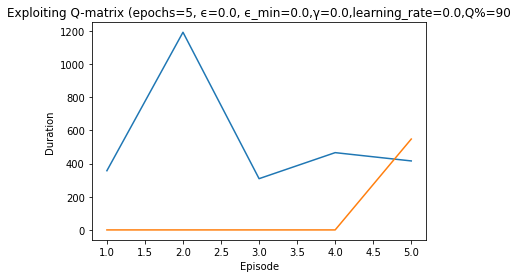

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   15.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  115.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  115.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  124.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  124.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 167|reward:  130.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 167|reward:  130.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  136.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 1|Iteration 182|reward:  136.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  144.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  144.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 223|reward:  144.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 242|reward:  244.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 242|reward:  244.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  253.0|last_reward_at:  242|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  253.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 256|reward:  257.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 256|reward:  257.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 1|Iteration 282|reward:  259.0|last_reward_at:  256|Elapsed Time: 0:00:00||

Episode 1|Iteration 282|reward:  259.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 1|Iteration 311|reward:  259.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 1|Iteration 312|reward:  265.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 1|Iteration 312|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 1|Iteration 373|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 408|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 440|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 465|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 474|reward:  265.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 481|reward:  365.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 1|Iteration 481|reward:  365.0|last_reward_at:  481|Elapsed Time: 0:00:01||

Episode 1|Iteration 482|reward:  374.0|last_reward_at:  481|Elapsed Time: 0:00:01||

Episode 1|Iteration 482|reward:  374.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 1|Iteration 491|reward:  374.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 1|Iteration 495|reward:  474.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 1|Iteration 495|reward:  474.0|last_reward_at:  495|Elapsed Time: 0:00:01||

Episode 1|Iteration 502|reward:  483.0|last_reward_at:  495|Elapsed Time: 0:00:01||

Episode 1|Iteration 502|reward:  483.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 506|reward:  489.0|last_reward_at:  502|Elapsed Time: 0:00:01||

Episode 1|Iteration 506|reward:  489.0|last_reward_at:  506|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:  491.0|last_reward_at:  506|Elapsed Time: 0:00:02||

Episode 1|Iteration 513|reward:  491.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 1|Iteration 520|reward:  497.0|last_reward_at:  513|Elapsed Time: 0:00:02||

Episode 1|Iteration 520|reward:  497.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 522|reward:  503.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 522|reward:  503.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 1|Iteration 532|reward:  503.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 1|Iteration 535|reward:  509.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 1|Iteration 535|reward:  509.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward:  609.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward:  609.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 1|Iteration 543|reward:  611.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 1|Iteration 543|reward:  611.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 1|Iteration 546|reward:  617.0|last_reward_at:  543|Elapsed Time: 0:00:02||

Episode 1|Iteration 546|reward:  617.0|last_reward_at:  546|Elapsed Time: 0:00:02||

Episode 1|Iteration 553|reward:  626.0|last_reward_at:  546|Elapsed Time: 0:00:02||

Episode 1|Iteration 553|reward:  626.0|last_reward_at:  553|Elapsed Time: 0:00:02||

Episode 1|Iteration 562|reward:  626.0|last_reward_at:  553|Elapsed Time: 0:00:02||

Episode 1|Iteration 566|reward:  632.0|last_reward_at:  553|Elapsed Time: 0:00:02||

Episode 1|Iteration 566|reward:  632.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 1|Iteration 567|reward:  732.0|last_reward_at:  566|Elapsed Time: 0:00:02||

Episode 1|Iteration 567|reward:  732.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 1|Iteration 576|reward:  732.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 1|Iteration 581|reward:  732.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 1|Iteration 590|reward:  732.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 1|Iteration 599|reward:  738.0|last_reward_at:  567|Elapsed Time: 0:00:03||

Episode 1|Iteration 599|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 603|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 612|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 622|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 632|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 636|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 644|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 654|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 663|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 1|Iteration 672|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 682|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 690|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 700|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 707|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 711|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 717|reward:  738.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 720|reward:  744.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 1|Iteration 720|reward:  744.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 1|Iteration 729|reward:  744.0|last_reward_at:  720|Elapsed Time: 0:00:04||

Episode 1|Iteration 734|reward:  744.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 1|Iteration 742|reward:  753.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 1|Iteration 742|reward:  753.0|last_reward_at:  742|Elapsed Time: 0:00:05||

Episode 1|Iteration 751|reward:  753.0|last_reward_at:  742|Elapsed Time: 0:00:05||

Episode 1|Iteration 752|reward:  853.0|last_reward_at:  742|Elapsed Time: 0:00:05||

Episode 1|Iteration 752|reward:  853.0|last_reward_at:  752|Elapsed Time: 0:00:05||

Episode 1|Iteration 753|reward:  855.0|last_reward_at:  752|Elapsed Time: 0:00:05||

Episode 1|Iteration 753|reward:  855.0|last_reward_at:  753|Elapsed Time: 0:00:05||

Episode 1|Iteration 760|reward:  864.0|last_reward_at:  753|Elapsed Time: 0:00:05||

Episode 1|Iteration 760|reward:  864.0|last_reward_at:  760|Elapsed Time: 0:00:05||

Episode 1|Iteration 763|reward:  870.0|last_reward_at:  760|Elapsed Time: 0:00:05||

Episode 1|Iteration 763|reward:  870.0|last_reward_at:  763|Elapsed Time: 0:00:05||

Episode 1|Iteration 766|reward:  970.0|last_reward_at:  763|Elapsed Time: 0:00:05||

Episode 1|Iteration 766|reward:  970.0|last_reward_at:  766|Elapsed Time: 0:00:05||

Episode 1|Iteration 769|reward:  979.0|last_reward_at:  766|Elapsed Time: 0:00:05||

Episode 1|Iteration 769|reward:  979.0|last_reward_at:  769|Elapsed Time: 0:00:05||

Episode 1|Iteration 772|reward:  983.0|last_reward_at:  769|Elapsed Time: 0:00:05||

Episode 1|Iteration 772|reward:  983.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 780|reward:  983.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 784|reward:  989.0|last_reward_at:  772|Elapsed Time: 0:00:05||

Episode 1|Iteration 784|reward:  989.0|last_reward_at:  784|Elapsed Time: 0:00:05||

Episode 1|Iteration 789|reward:  991.0|last_reward_at:  784|Elapsed Time: 0:00:05||

Episode 1|Iteration 789|reward:  991.0|last_reward_at:  789|Elapsed Time: 0:00:05||

Episode 1|Iteration 798|reward:  991.0|last_reward_at:  789|Elapsed Time: 0:00:05||

Episode 1|Iteration 807|reward:  991.0|last_reward_at:  789|Elapsed Time: 0:00:05||

Episode 1|Iteration 816|reward:  991.0|last_reward_at:  789|Elapsed Time: 0:00:06||

Episode 1|Iteration 825|reward:  991.0|last_reward_at:  789|Elapsed Time: 0:00:06||

Episode 1|Iteration 833|reward:  991.0|last_reward_at:  789|Elapsed Time: 0:00:06||

Episode 1|Iteration 835|reward:  993.0|last_reward_at:  789|Elapsed Time: 0:00:06||

Episode 1|Iteration 835|reward:  993.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 842|reward:  993.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 849|reward:  993.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 858|reward:  993.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 868|reward:  993.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 870|reward: 1093.0|last_reward_at:  835|Elapsed Time: 0:00:06||

Episode 1|Iteration 870|reward: 1093.0|last_reward_at:  870|Elapsed Time: 0:00:06||

Episode 1|Iteration 871|reward: 1102.0|last_reward_at:  870|Elapsed Time: 0:00:06||

Episode 1|Iteration 871|reward: 1102.0|last_reward_at:  871|Elapsed Time: 0:00:06||

Episode 1|Iteration 872|reward: 1202.0|last_reward_at:  871|Elapsed Time: 0:00:06||

Episode 1|Iteration 872|reward: 1202.0|last_reward_at:  872|Elapsed Time: 0:00:06||

Episode 1|Iteration 877|reward: 1208.0|last_reward_at:  872|Elapsed Time: 0:00:06||

Episode 1|Iteration 877|reward: 1208.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 1|Iteration 878|reward: 1217.0|last_reward_at:  877|Elapsed Time: 0:00:06||

Episode 1|Iteration 878|reward: 1217.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 1|Iteration 883|reward: 1223.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 1|Iteration 883|reward: 1223.0|last_reward_at:  883|Elapsed Time: 0:00:06||

Episode 1|Iteration 892|reward: 1223.0|last_reward_at:  883|Elapsed Time: 0:00:07||

Episode 1|Iteration 901|reward: 1223.0|last_reward_at:  883|Elapsed Time: 0:00:07||

Episode 1|Iteration 907|reward: 1229.0|last_reward_at:  883|Elapsed Time: 0:00:07||

Episode 1|Iteration 907|reward: 1229.0|last_reward_at:  907|Elapsed Time: 0:00:07||

Episode 1|Iteration 915|reward: 1229.0|last_reward_at:  907|Elapsed Time: 0:00:07||

Episode 1|Iteration 923|reward: 1229.0|last_reward_at:  907|Elapsed Time: 0:00:07||

Episode 1|Iteration 925|reward: 6229.0|last_reward_at:  907|Elapsed Time: 0:00:07||

Episode 1|Iteration 925|reward: 6229.0|last_reward_at:  925|Elapsed Time: 0:00:07||

  Episode 1 ended at t=925 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 11/172 (0.06)
    explore-remote: 15/286 (0.05)
    explore-connect: 3/289 (0.01)
    exploit-local: 9/85 (0.10)
    exploit-remote: 3/19 (0.14)
    exploit-connect: 8/25 (0.24)
  exploit deflected to exploration: 11
  ## Episode: 2/50 'DQL' ϵ=0.7650, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   13.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   15.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   15.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  115.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  115.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  124.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  124.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  224.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  224.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  233.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  233.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  239.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  239.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  245.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  245.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  247.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  247.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  251.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  251.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  251.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  257.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  257.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  357.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  357.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  366.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  366.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  466.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  466.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  475.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  475.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  481.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  481.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  487.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  487.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 78|reward:  487.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  487.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  493.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 2|Iteration 94|reward:  493.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 2|Iteration 101|reward:  499.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 2|Iteration 101|reward:  499.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 2|Iteration 105|reward:  599.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 2|Iteration 105|reward:  599.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 107|reward:  608.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 107|reward:  608.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 2|Iteration 113|reward:  610.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 2|Iteration 113|reward:  610.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward:  710.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward:  710.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 2|Iteration 116|reward:  719.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 2|Iteration 116|reward:  719.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 2|Iteration 120|reward:  725.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 2|Iteration 120|reward:  725.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 2|Iteration 121|reward:  731.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 2|Iteration 121|reward:  731.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 2|Iteration 131|reward:  731.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 2|Iteration 140|reward:  831.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 2|Iteration 140|reward:  831.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward:  840.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward:  840.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  842.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  842.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 2|Iteration 152|reward:  942.0|last_reward_at:  150|Elapsed Time: 0:00:01||

Episode 2|Iteration 152|reward:  942.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 2|Iteration 159|reward:  951.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 2|Iteration 159|reward:  951.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 2|Iteration 160|reward:  957.0|last_reward_at:  159|Elapsed Time: 0:00:01||

Episode 2|Iteration 160|reward:  957.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 2|Iteration 163|reward:  963.0|last_reward_at:  160|Elapsed Time: 0:00:01||

Episode 2|Iteration 163|reward:  963.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 2|Iteration 167|reward: 1063.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 2|Iteration 167|reward: 1063.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 2|Iteration 169|reward: 1072.0|last_reward_at:  167|Elapsed Time: 0:00:01||

Episode 2|Iteration 169|reward: 1072.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 2|Iteration 171|reward: 1080.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 2|Iteration 171|reward: 1080.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 173|reward: 1180.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 2|Iteration 173|reward: 1180.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 175|reward: 1189.0|last_reward_at:  173|Elapsed Time: 0:00:01||

Episode 2|Iteration 175|reward: 1189.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 2|Iteration 178|reward: 1195.0|last_reward_at:  175|Elapsed Time: 0:00:02||

Episode 2|Iteration 178|reward: 1195.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 2|Iteration 179|reward: 1201.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 2|Iteration 179|reward: 1201.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 2|Iteration 182|reward: 6201.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 2|Iteration 182|reward: 6201.0|last_reward_at:  182|Elapsed Time: 0:00:02||

  Episode 2 ended at t=182 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/33 (0.06)
    explore-remote: 11/35 (0.24)
    explore-connect: 1/54 (0.02)
    exploit-local: 17/4 (0.81)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 10/4 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 3/50 'DQL' ϵ=0.7412, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:    9.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   13.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   13.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  113.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  113.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  122.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  122.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  128.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  128.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  228.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  228.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  237.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  237.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  243.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  243.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  249.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  249.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  349.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  349.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  358.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  358.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  458.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  458.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  467.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  467.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  473.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  473.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  573.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  573.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  582.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  582.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  590.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 71|reward:  590.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  690.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  690.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  692.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  692.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  701.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 81|reward:  701.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  801.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 3|Iteration 82|reward:  801.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  803.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 3|Iteration 85|reward:  803.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 3|Iteration 86|reward:  812.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 3|Iteration 86|reward:  812.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 3|Iteration 87|reward:  818.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 3|Iteration 87|reward:  818.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 3|Iteration 93|reward:  824.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 3|Iteration 93|reward:  824.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 3|Iteration 96|reward:  924.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 3|Iteration 96|reward:  924.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 3|Iteration 97|reward:  933.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 3|Iteration 97|reward:  933.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 3|Iteration 100|reward: 1033.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 3|Iteration 100|reward: 1033.0|last_reward_at:  100|Elapsed Time: 0:00:01||

Episode 3|Iteration 103|reward: 1039.0|last_reward_at:  100|Elapsed Time: 0:00:01||

Episode 3|Iteration 103|reward: 1039.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 3|Iteration 104|reward: 1041.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 3|Iteration 104|reward: 1041.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 3|Iteration 105|reward: 1047.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 3|Iteration 105|reward: 1047.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 3|Iteration 109|reward: 1053.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 3|Iteration 109|reward: 1053.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 3|Iteration 113|reward: 1059.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 3|Iteration 113|reward: 1059.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 3|Iteration 114|reward: 1068.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 3|Iteration 114|reward: 1068.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 3|Iteration 116|reward: 1168.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 3|Iteration 116|reward: 1168.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 3|Iteration 117|reward: 1177.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 3|Iteration 117|reward: 1177.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 3|Iteration 119|reward: 6177.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 3|Iteration 119|reward: 6177.0|last_reward_at:  119|Elapsed Time: 0:00:01||

  Episode 3 ended at t=119 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/13 (0.28)
    explore-remote: 8/34 (0.19)
    explore-connect: 0/30 (0.00)
    exploit-local: 12/1 (0.92)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 5
  ## Episode: 4/50 'DQL' ϵ=0.7262, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:    9.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  109.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  109.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  118.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  118.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  218.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  218.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  224.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  224.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  226.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:  226.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  235.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 4|Iteration 50|reward:  235.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  335.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  335.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  344.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  344.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  350.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  350.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 63|reward:  356.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 63|reward:  356.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  456.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  456.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  462.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  462.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  471.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 67|reward:  471.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  571.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:  571.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  573.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  573.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  582.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  582.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  588.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 86|reward:  588.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  688.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  688.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  697.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 4|Iteration 90|reward:  697.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 4|Iteration 96|reward:  699.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 4|Iteration 96|reward:  699.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 4|Iteration 97|reward:  799.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 4|Iteration 97|reward:  799.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 4|Iteration 101|reward:  801.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 4|Iteration 101|reward:  801.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 4|Iteration 104|reward:  810.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 4|Iteration 104|reward:  810.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 4|Iteration 107|reward:  816.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 4|Iteration 107|reward:  816.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 4|Iteration 114|reward:  816.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 4|Iteration 117|reward:  822.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 4|Iteration 117|reward:  822.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 4|Iteration 126|reward:  822.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 4|Iteration 128|reward:  828.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 4|Iteration 128|reward:  828.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 4|Iteration 129|reward:  928.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 4|Iteration 129|reward:  928.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 4|Iteration 133|reward:  930.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 4|Iteration 133|reward:  930.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 138|reward:  939.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 4|Iteration 138|reward:  939.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 4|Iteration 140|reward: 1039.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 4|Iteration 140|reward: 1039.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 4|Iteration 142|reward: 1048.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 4|Iteration 142|reward: 1048.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 148|reward: 1056.0|last_reward_at:  142|Elapsed Time: 0:00:01||

Episode 4|Iteration 148|reward: 1056.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 4|Iteration 151|reward: 1058.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 4|Iteration 151|reward: 1058.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 4|Iteration 158|reward: 1158.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 4|Iteration 158|reward: 1158.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 4|Iteration 161|reward: 1164.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 4|Iteration 161|reward: 1164.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 4|Iteration 169|reward: 1173.0|last_reward_at:  161|Elapsed Time: 0:00:01||

Episode 4|Iteration 169|reward: 1173.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 4|Iteration 171|reward: 1175.0|last_reward_at:  169|Elapsed Time: 0:00:01||

Episode 4|Iteration 171|reward: 1175.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 4|Iteration 174|reward: 1181.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 4|Iteration 174|reward: 1181.0|last_reward_at:  174|Elapsed Time: 0:00:01||

Episode 4|Iteration 178|reward: 1187.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 4|Iteration 178|reward: 1187.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 4|Iteration 182|reward: 6187.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 4|Iteration 182|reward: 6187.0|last_reward_at:  182|Elapsed Time: 0:00:02||

  Episode 4 ended at t=182 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/26 (0.19)
    explore-remote: 14/62 (0.18)
    explore-connect: 0/46 (0.00)
    exploit-local: 10/1 (0.91)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/6 (0.65)
  exploit deflected to exploration: 11
  ## Episode: 5/50 'DQL' ϵ=0.7038, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:    9.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   13.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   13.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  113.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  113.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  122.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  122.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  128.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  128.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  136.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  136.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  236.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  238.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  238.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  247.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  247.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  253.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  253.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  257.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  257.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  357.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  357.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  366.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  366.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  466.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  466.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  472.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  472.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  481.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  481.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  487.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  487.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  587.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:  587.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  593.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  593.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  602.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:  602.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  702.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  702.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  711.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  711.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  811.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 65|reward:  811.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  817.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:  817.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  823.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  823.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  832.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  832.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  932.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  932.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 86|reward:  941.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 5|Iteration 86|reward:  941.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 5|Iteration 89|reward: 1041.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 5|Iteration 89|reward: 1041.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 5|Iteration 90|reward: 1043.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 5|Iteration 90|reward: 1043.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 5|Iteration 91|reward: 1052.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 5|Iteration 91|reward: 1052.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 5|Iteration 92|reward: 1060.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 5|Iteration 92|reward: 1060.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 5|Iteration 100|reward: 1060.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 5|Iteration 103|reward: 1066.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 5|Iteration 103|reward: 1066.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 5|Iteration 105|reward: 1072.0|last_reward_at:  103|Elapsed Time: 0:00:01||

Episode 5|Iteration 105|reward: 1072.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 5|Iteration 106|reward: 1074.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 5|Iteration 106|reward: 1074.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 5|Iteration 107|reward: 1174.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 5|Iteration 107|reward: 1174.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 5|Iteration 111|reward: 1183.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 5|Iteration 111|reward: 1183.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 5|Iteration 112|reward: 1189.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 5|Iteration 112|reward: 1189.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 114|reward: 1195.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 5|Iteration 114|reward: 1195.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 5|Iteration 115|reward: 6195.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 5|Iteration 115|reward: 6195.0|last_reward_at:  115|Elapsed Time: 0:00:01||

  Episode 5 ended at t=115 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 13/24 (0.35)
    explore-connect: 1/29 (0.03)
    exploit-local: 13/2 (0.87)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/7 (0.59)
  exploit deflected to exploration: 2
  ## Episode: 6/50 'DQL' ϵ=0.6901, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  113.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  113.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  222.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  222.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  231.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  331.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  331.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  337.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  337.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  354.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  454.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  454.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  460.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  460.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  469.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  469.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  569.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  569.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  578.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  578.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  678.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  678.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  687.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  687.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  787.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  787.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  793.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  793.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  802.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  802.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  902.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  902.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  911.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  911.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward: 1011.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward: 1011.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward: 1020.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 42|reward: 1020.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward: 1022.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward: 1022.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward: 1028.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward: 1028.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 55|reward: 1030.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 55|reward: 1030.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 6|Iteration 58|reward: 1130.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 6|Iteration 58|reward: 1130.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward: 1136.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward: 1136.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 61|reward: 1145.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 61|reward: 1145.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 6|Iteration 62|reward: 1147.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 6|Iteration 62|reward: 1147.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward: 6147.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward: 6147.0|last_reward_at:   64|Elapsed Time: 0:00:00||

  Episode 6 ended at t=64 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/11 (0.27)
    explore-remote: 8/7 (0.53)
    explore-connect: 0/10 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 2
  ## Episode: 7/50 'DQL' ϵ=0.6825, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  113.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  119.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  119.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  237.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  237.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  243.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  243.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  343.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  343.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  349.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  349.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  351.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  351.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  360.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  460.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  460.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  469.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  469.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  569.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  569.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  571.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  571.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  580.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  580.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  680.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  680.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  686.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  686.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  695.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  695.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  699.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  699.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  799.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  799.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  805.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  805.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  814.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  814.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  820.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  820.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  828.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  828.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  928.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  928.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 64|reward:  934.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 64|reward:  934.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  940.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  940.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  946.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  946.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 70|reward:  948.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 70|reward:  948.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  957.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 7|Iteration 71|reward:  957.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward: 1057.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward: 1057.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward: 1063.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward: 1063.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward: 1072.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward: 1072.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward: 1172.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward: 1172.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward: 1181.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 7|Iteration 82|reward: 1181.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward: 6181.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward: 6181.0|last_reward_at:   83|Elapsed Time: 0:00:00||

  Episode 7 ended at t=83 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/5 (0.50)
    explore-remote: 13/16 (0.45)
    explore-connect: 0/20 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 8/50 'DQL' ϵ=0.6730, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  220.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  220.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  229.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  229.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  235.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  235.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  237.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  237.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  239.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  239.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  243.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  243.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  249.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  249.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  349.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  349.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  358.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  358.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  364.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  364.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  464.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  464.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  473.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  473.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  573.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  573.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  582.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  582.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  682.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:  682.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  691.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:  691.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  791.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 46|reward:  791.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  797.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:  797.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  803.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  803.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:  809.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 52|reward:  809.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  818.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  818.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 55|reward:  820.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 55|reward:  820.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  920.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  920.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 59|reward:  926.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 59|reward:  926.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:  935.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:  935.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 63|reward: 1035.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 8|Iteration 63|reward: 1035.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward: 1044.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward: 1044.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 68|reward: 1144.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 68|reward: 1144.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 70|reward: 1146.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 70|reward: 1146.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 8|Iteration 72|reward: 1155.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 8|Iteration 72|reward: 1155.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward: 6155.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward: 6155.0|last_reward_at:   73|Elapsed Time: 0:00:00||

  Episode 8 ended at t=73 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 9/11 (0.45)
    explore-connect: 0/18 (0.00)
    exploit-local: 14/1 (0.93)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 1
  ## Episode: 9/50 'DQL' ϵ=0.6647, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  122.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  222.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  231.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  331.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  331.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  337.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  446.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  446.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  455.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  455.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  457.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  457.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  557.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  557.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  566.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  566.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  568.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  568.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  574.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  574.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  674.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  674.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  683.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  683.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  783.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  783.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  792.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  792.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  800.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  800.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  900.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  900.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  909.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  909.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 1009.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 1009.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward: 1018.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward: 1018.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward: 1118.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 48|reward: 1118.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward: 1127.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward: 1127.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 53|reward: 6127.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 53|reward: 6127.0|last_reward_at:   53|Elapsed Time: 0:00:00||

  Episode 9 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 5/4 (0.56)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.6587, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  111.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  111.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  113.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  113.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  122.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  122.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  130.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  130.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  136.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  136.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  236.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  236.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  245.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  245.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  247.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  247.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  253.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  253.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward:  353.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 41|reward:  353.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  353.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  355.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  355.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  364.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  364.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  464.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:  464.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  473.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  473.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  479.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 66|reward:  479.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 68|reward:  579.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 10|Iteration 68|reward:  579.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 10|Iteration 72|reward:  588.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 10|Iteration 72|reward:  588.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward:  688.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward:  688.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 10|Iteration 74|reward:  697.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 10|Iteration 74|reward:  697.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  797.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  797.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  806.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  806.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 79|reward:  906.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 79|reward:  906.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  915.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  915.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 84|reward: 1015.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 84|reward: 1015.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 10|Iteration 89|reward: 1024.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 10|Iteration 89|reward: 1024.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward: 1030.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward: 1030.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 92|reward: 1130.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 92|reward: 1130.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 94|reward: 1139.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 94|reward: 1139.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 10|Iteration 96|reward: 1145.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 10|Iteration 96|reward: 1145.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 10|Iteration 101|reward: 6145.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 10|Iteration 101|reward: 6145.0|last_reward_at:  101|Elapsed Time: 0:00:01||

  Episode 10 ended at t=101 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/13 (0.35)
    explore-remote: 6/22 (0.21)
    explore-connect: 0/28 (0.00)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 6
  ## Episode: 11/50 'DQL' ϵ=0.6475, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  122.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 5|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 11|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  444.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  453.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  453.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  459.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 19|reward:  459.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  559.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  559.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  568.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  568.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  574.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  574.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  674.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:  674.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  676.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  676.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  685.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  685.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  785.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:  785.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  794.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  794.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  800.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  800.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  900.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  900.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  906.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  906.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  915.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  915.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  921.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  921.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  923.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  923.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward: 1023.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 43|reward: 1023.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward: 1032.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 11|Iteration 49|reward: 1032.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 52|reward: 1132.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 11|Iteration 52|reward: 1132.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 11|Iteration 57|reward: 1141.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 11|Iteration 57|reward: 1141.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 11|Iteration 59|reward: 6141.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 11|Iteration 59|reward: 6141.0|last_reward_at:   59|Elapsed Time: 0:00:00||

  Episode 11 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 8/7 (0.53)
    explore-connect: 0/13 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 12/50 'DQL' ϵ=0.6411, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  220.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 11|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 11|reward:  229.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  329.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  329.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  335.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  344.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  444.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  450.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  450.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  456.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  456.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  465.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  465.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  565.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  565.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  571.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  571.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  573.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  573.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  582.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  582.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  588.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  588.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  688.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  688.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  697.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  697.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  699.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  699.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  799.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  799.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward:  808.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward:  808.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  908.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  908.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  917.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  917.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward: 1017.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward: 1017.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 12|Iteration 44|reward: 1026.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 12|Iteration 44|reward: 1026.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward: 1032.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward: 1032.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 51|reward: 1038.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 51|reward: 1038.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 12|Iteration 54|reward: 1138.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 12|Iteration 54|reward: 1138.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 12|Iteration 56|reward: 1147.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 12|Iteration 56|reward: 1147.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 12|Iteration 57|reward: 6147.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 12|Iteration 57|reward: 6147.0|last_reward_at:   57|Elapsed Time: 0:00:00||

  Episode 12 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/4 (0.43)
    explore-remote: 6/9 (0.40)
    explore-connect: 0/12 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'DQL' ϵ=0.6350, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:  224.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  233.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  333.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 17|reward:  342.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  442.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  442.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  444.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  444.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  453.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  453.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  553.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  553.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  555.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  555.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 26|reward:  564.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 26|reward:  564.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  664.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  664.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  673.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  673.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  675.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  675.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  775.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  775.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  784.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  784.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  786.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  786.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  886.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  886.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward:  888.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward:  888.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 13|Iteration 42|reward:  897.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 13|Iteration 42|reward:  897.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 13|Iteration 44|reward:  901.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 13|Iteration 44|reward:  901.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 13|Iteration 48|reward: 1001.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 13|Iteration 48|reward: 1001.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 13|Iteration 50|reward: 1010.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 13|Iteration 50|reward: 1010.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward: 1012.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 13|Iteration 53|reward: 1012.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 55|reward: 1112.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 13|Iteration 55|reward: 1112.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 13|Iteration 59|reward: 1118.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 13|Iteration 59|reward: 1118.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 13|Iteration 60|reward: 1127.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 13|Iteration 60|reward: 1127.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 13|Iteration 62|reward: 6127.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 13|Iteration 62|reward: 6127.0|last_reward_at:   62|Elapsed Time: 0:00:00||

  Episode 13 ended at t=62 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 7/7 (0.50)
    explore-connect: 0/17 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/2 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'DQL' ϵ=0.6284, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  220.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 10|reward:  229.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  329.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  329.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  335.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 17|reward:  341.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 17|reward:  341.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  450.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  450.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  459.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  459.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  559.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  559.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  568.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  568.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  668.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  668.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  677.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 27|reward:  677.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  777.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  777.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward:  786.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward:  786.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  886.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  886.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward:  895.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward:  895.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:  897.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:  897.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 14|Iteration 41|reward:  997.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 14|Iteration 41|reward:  997.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 14|Iteration 43|reward: 1006.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 14|Iteration 43|reward: 1006.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 14|Iteration 45|reward: 1012.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 14|Iteration 45|reward: 1012.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 14|Iteration 48|reward: 1112.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 14|Iteration 48|reward: 1112.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 14|Iteration 49|reward: 1118.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 14|Iteration 49|reward: 1118.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 14|Iteration 51|reward: 1127.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 14|Iteration 51|reward: 1127.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 14|Iteration 52|reward: 6127.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 14|Iteration 52|reward: 6127.0|last_reward_at:   52|Elapsed Time: 0:00:00||

  Episode 14 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/13 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.6229, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:    9.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  109.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  124.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  124.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  224.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  224.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  226.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  226.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  235.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 20|reward:  235.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  335.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  335.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:  344.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:  344.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  350.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  350.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  450.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  450.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  456.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  456.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  465.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  465.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  565.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  565.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward:  574.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward:  574.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  582.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  582.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:  682.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:  682.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  688.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  688.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 45|reward:  694.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 45|reward:  694.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 50|reward:  694.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 57|reward:  694.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward:  700.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 58|reward:  700.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 59|reward:  702.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 15|Iteration 59|reward:  702.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 15|Iteration 60|reward:  708.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 15|Iteration 60|reward:  708.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 65|reward:  708.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 67|reward:  710.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 15|Iteration 67|reward:  710.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 15|Iteration 69|reward:  712.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 15|Iteration 69|reward:  712.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 15|Iteration 78|reward:  712.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 15|Iteration 80|reward:  714.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 15|Iteration 80|reward:  714.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 15|Iteration 83|reward:  720.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 15|Iteration 83|reward:  720.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 15|Iteration 92|reward:  720.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 15|Iteration 98|reward:  720.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 15|Iteration 107|reward:  726.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 15|Iteration 107|reward:  726.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 15|Iteration 114|reward:  726.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 15|Iteration 121|reward:  726.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 15|Iteration 127|reward:  726.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 15|Iteration 128|reward:  732.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 15|Iteration 128|reward:  732.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 15|Iteration 133|reward:  736.0|last_reward_at:  128|Elapsed Time: 0:00:01||

Episode 15|Iteration 133|reward:  736.0|last_reward_at:  133|Elapsed Time: 0:00:01||

Episode 15|Iteration 135|reward:  736.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 15|Iteration 144|reward:  736.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 15|Iteration 152|reward:  736.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 15|Iteration 160|reward:  736.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 15|Iteration 166|reward:  738.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 15|Iteration 166|reward:  738.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 15|Iteration 175|reward:  738.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 15|Iteration 183|reward:  738.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 15|Iteration 192|reward:  738.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 15|Iteration 200|reward:  738.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 15|Iteration 210|reward:  738.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 15|Iteration 212|reward:  744.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 15|Iteration 212|reward:  744.0|last_reward_at:  212|Elapsed Time: 0:00:02||

Episode 15|Iteration 220|reward:  744.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 15|Iteration 228|reward:  744.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 15|Iteration 234|reward:  746.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 15|Iteration 234|reward:  746.0|last_reward_at:  234|Elapsed Time: 0:00:03||

Episode 15|Iteration 243|reward:  746.0|last_reward_at:  234|Elapsed Time: 0:00:03||

Episode 15|Iteration 252|reward:  746.0|last_reward_at:  234|Elapsed Time: 0:00:03||

Episode 15|Iteration 257|reward:  755.0|last_reward_at:  234|Elapsed Time: 0:00:03||

Episode 15|Iteration 257|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:03||

Episode 15|Iteration 266|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:03||

Episode 15|Iteration 275|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:03||

Episode 15|Iteration 284|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:03||

Episode 15|Iteration 293|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:03||

Episode 15|Iteration 302|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 311|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 320|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 329|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 337|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 346|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 355|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 361|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 370|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 379|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:04||

Episode 15|Iteration 389|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:05||

Episode 15|Iteration 396|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:05||

Episode 15|Iteration 405|reward:  755.0|last_reward_at:  257|Elapsed Time: 0:00:05||

Episode 15|Iteration 408|reward:  855.0|last_reward_at:  257|Elapsed Time: 0:00:05||

Episode 15|Iteration 408|reward:  855.0|last_reward_at:  408|Elapsed Time: 0:00:05||

Episode 15|Iteration 416|reward:  864.0|last_reward_at:  408|Elapsed Time: 0:00:05||

Episode 15|Iteration 416|reward:  864.0|last_reward_at:  416|Elapsed Time: 0:00:05||

Episode 15|Iteration 417|reward:  964.0|last_reward_at:  416|Elapsed Time: 0:00:05||

Episode 15|Iteration 417|reward:  964.0|last_reward_at:  417|Elapsed Time: 0:00:05||

Episode 15|Iteration 426|reward:  964.0|last_reward_at:  417|Elapsed Time: 0:00:05||

Episode 15|Iteration 430|reward:  970.0|last_reward_at:  417|Elapsed Time: 0:00:05||

Episode 15|Iteration 430|reward:  970.0|last_reward_at:  430|Elapsed Time: 0:00:05||

Episode 15|Iteration 433|reward:  976.0|last_reward_at:  430|Elapsed Time: 0:00:05||

Episode 15|Iteration 433|reward:  976.0|last_reward_at:  433|Elapsed Time: 0:00:05||

Episode 15|Iteration 438|reward:  985.0|last_reward_at:  433|Elapsed Time: 0:00:05||

Episode 15|Iteration 438|reward:  985.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 15|Iteration 446|reward: 1085.0|last_reward_at:  438|Elapsed Time: 0:00:05||

Episode 15|Iteration 446|reward: 1085.0|last_reward_at:  446|Elapsed Time: 0:00:05||

Episode 15|Iteration 449|reward: 1094.0|last_reward_at:  446|Elapsed Time: 0:00:05||

Episode 15|Iteration 449|reward: 1094.0|last_reward_at:  449|Elapsed Time: 0:00:05||

Episode 15|Iteration 454|reward: 1194.0|last_reward_at:  449|Elapsed Time: 0:00:05||

Episode 15|Iteration 454|reward: 1194.0|last_reward_at:  454|Elapsed Time: 0:00:05||

Episode 15|Iteration 455|reward: 1203.0|last_reward_at:  454|Elapsed Time: 0:00:05||

Episode 15|Iteration 455|reward: 1203.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 15|Iteration 457|reward: 1209.0|last_reward_at:  455|Elapsed Time: 0:00:05||

Episode 15|Iteration 457|reward: 1209.0|last_reward_at:  457|Elapsed Time: 0:00:05||

Episode 15|Iteration 459|reward: 6209.0|last_reward_at:  457|Elapsed Time: 0:00:05||

Episode 15|Iteration 459|reward: 6209.0|last_reward_at:  459|Elapsed Time: 0:00:05||

  Episode 15 ended at t=459 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/75 (0.06)
    explore-remote: 12/84 (0.12)
    explore-connect: 0/95 (0.00)
    exploit-local: 13/129 (0.09)
    exploit-remote: 4/30 (0.12)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 3
  ## Episode: 16/50 'DQL' ϵ=0.5770, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  220.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  329.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  338.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  338.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  438.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  438.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  444.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 17|reward:  453.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 17|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  455.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  455.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:  555.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:  555.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 20|reward:  557.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 20|reward:  557.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  566.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  566.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  666.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  666.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  675.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:  675.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 28|reward:  775.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 16|Iteration 28|reward:  775.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  781.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  781.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  790.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 30|reward:  790.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 32|reward:  796.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 16|Iteration 32|reward:  796.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  896.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  896.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:  905.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:  905.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward: 1005.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 16|Iteration 42|reward: 1005.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 49|reward: 1011.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 16|Iteration 49|reward: 1011.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward: 1020.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward: 1020.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 52|reward: 1022.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 52|reward: 1022.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 16|Iteration 57|reward: 1024.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 16|Iteration 57|reward: 1024.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 16|Iteration 62|reward: 1030.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 16|Iteration 62|reward: 1030.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 16|Iteration 65|reward: 1130.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 16|Iteration 65|reward: 1130.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 16|Iteration 69|reward: 1139.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 16|Iteration 69|reward: 1139.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 16|Iteration 70|reward: 6139.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 16|Iteration 70|reward: 6139.0|last_reward_at:   70|Elapsed Time: 0:00:00||

  Episode 16 ended at t=70 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 10/7 (0.59)
    explore-connect: 0/16 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'DQL' ϵ=0.5704, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  113.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  122.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:  222.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:  222.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  231.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:  331.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:  331.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  340.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  340.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  440.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  440.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  449.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  449.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  549.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  549.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  558.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 16|reward:  558.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  658.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  658.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  667.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  667.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:  767.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:  767.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  769.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  769.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  778.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  778.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  878.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  878.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  887.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 26|reward:  887.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  987.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  987.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:  996.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:  996.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward: 1096.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward: 1096.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 30|reward: 1105.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 30|reward: 1105.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward: 6105.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 17|Iteration 31|reward: 6105.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 17 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/4 (0.33)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 18/50 'DQL' ϵ=0.5675, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:    9.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  109.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  218.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  218.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:  220.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:  220.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  229.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  229.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  329.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  329.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  338.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 19|reward:  338.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 20|reward:  346.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 18|Iteration 20|reward:  346.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:  446.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 18|Iteration 21|reward:  446.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  452.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  452.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  458.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 24|reward:  458.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  467.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  467.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:  469.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:  469.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 29|reward:  569.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 29|reward:  569.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  571.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  571.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 33|reward:  577.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 33|reward:  577.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  583.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  583.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  592.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  592.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  692.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:  692.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:  701.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:  701.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward:  801.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 40|reward:  801.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward:  807.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 18|Iteration 41|reward:  807.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 42|reward:  813.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 18|Iteration 42|reward:  813.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward:  822.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 18|Iteration 43|reward:  822.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 44|reward:  922.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 18|Iteration 44|reward:  922.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  931.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  931.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 48|reward: 1031.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 48|reward: 1031.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 18|Iteration 49|reward: 1033.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 18|Iteration 49|reward: 1033.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward: 1042.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 18|Iteration 52|reward: 1042.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 53|reward: 1142.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 18|Iteration 53|reward: 1142.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 18|Iteration 55|reward: 1151.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 18|Iteration 55|reward: 1151.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 18|Iteration 56|reward: 6151.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 18|Iteration 56|reward: 6151.0|last_reward_at:   56|Elapsed Time: 0:00:00||

  Episode 18 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/5 (0.44)
    explore-remote: 8/9 (0.47)
    explore-connect: 0/8 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'DQL' ϵ=0.5623, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  117.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 10|reward:  117.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  126.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  126.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  226.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  226.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  235.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  235.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  335.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  335.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  344.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  344.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  444.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  444.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:  453.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 26|reward:  453.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  455.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  455.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  555.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  555.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  564.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  564.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  570.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  570.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  670.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  670.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward:  679.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 37|reward:  679.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward:  779.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward:  779.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward:  785.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 39|reward:  785.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward:  791.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward:  791.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 41|reward:  793.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 41|reward:  793.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 19|Iteration 42|reward:  802.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 19|Iteration 42|reward:  802.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 19|Iteration 46|reward:  902.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 19|Iteration 46|reward:  902.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 19|Iteration 49|reward:  911.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 19|Iteration 49|reward:  911.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 51|reward: 1011.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 51|reward: 1011.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 19|Iteration 54|reward: 1017.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 19|Iteration 54|reward: 1017.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward: 1023.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 19|Iteration 55|reward: 1023.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 56|reward: 1029.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 19|Iteration 56|reward: 1029.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 19|Iteration 57|reward: 1038.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 19|Iteration 57|reward: 1038.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 19|Iteration 58|reward: 1044.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 19|Iteration 58|reward: 1044.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 19|Iteration 60|reward: 1144.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 19|Iteration 60|reward: 1144.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 19|Iteration 62|reward: 1150.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 19|Iteration 62|reward: 1150.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 19|Iteration 67|reward: 1159.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 19|Iteration 67|reward: 1159.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 19|Iteration 68|reward: 6159.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 19|Iteration 68|reward: 6159.0|last_reward_at:   68|Elapsed Time: 0:00:00||

  Episode 19 ended at t=68 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/8 (0.38)
    explore-remote: 5/10 (0.33)
    explore-connect: 0/13 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 20/50 'DQL' ϵ=0.5561, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  115.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  124.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:  241.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:  241.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  247.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  247.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  347.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 19|reward:  347.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 20|reward:  353.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 20|Iteration 20|reward:  353.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  362.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  362.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 24|reward:  462.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 24|reward:  462.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:  471.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:  471.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:  571.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:  571.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  577.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  577.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 30|reward:  579.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 30|reward:  579.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  588.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  588.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 35|reward:  688.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 35|reward:  688.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  694.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  694.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  703.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  703.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  803.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:  803.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  812.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  812.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 40|reward:  912.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 40|reward:  912.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 20|Iteration 41|reward:  921.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 20|Iteration 41|reward:  921.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward: 1021.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward: 1021.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward: 1027.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 44|reward: 1027.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 47|reward: 1033.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 20|Iteration 47|reward: 1033.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 20|Iteration 48|reward: 1035.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 20|Iteration 48|reward: 1035.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 20|Iteration 50|reward: 1037.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 20|Iteration 50|reward: 1037.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward: 1039.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 20|Iteration 51|reward: 1039.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 53|reward: 1048.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 20|Iteration 53|reward: 1048.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 55|reward: 1148.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 20|Iteration 55|reward: 1148.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 20|Iteration 57|reward: 1157.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 20|Iteration 57|reward: 1157.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 20|Iteration 58|reward: 6157.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 20|Iteration 58|reward: 6157.0|last_reward_at:   58|Elapsed Time: 0:00:00||

  Episode 20 ended at t=58 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/5 (0.38)
    explore-remote: 8/7 (0.53)
    explore-connect: 0/10 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 21/50 'DQL' ϵ=0.5508, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 6|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 6|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 10|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 10|reward:  329.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 21|Iteration 12|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 21|Iteration 12|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 21|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 21|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 21|Iteration 15|reward:  444.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 21|Iteration 15|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  446.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 21|Iteration 17|reward:  446.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  455.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  455.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 20|reward:  555.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 20|reward:  555.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  564.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  564.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 25|reward:  664.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 25|reward:  664.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward:  673.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward:  673.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 28|reward:  773.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 28|reward:  773.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 21|Iteration 29|reward:  782.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 21|Iteration 29|reward:  782.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  882.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  882.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward:  891.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward:  891.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 21|Iteration 33|reward:  991.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 21|Iteration 33|reward:  991.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 21|Iteration 34|reward:  993.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 21|Iteration 34|reward:  993.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 21|Iteration 35|reward: 1002.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 21|Iteration 35|reward: 1002.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 21|Iteration 36|reward: 1010.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 21|Iteration 36|reward: 1010.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 21|Iteration 39|reward: 1110.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 21|Iteration 39|reward: 1110.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward: 1119.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward: 1119.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 42|reward: 6119.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 42|reward: 6119.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 21 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 5/1 (0.83)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 22/50 'DQL' ϵ=0.5470, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 10|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 22|Iteration 10|reward:  227.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 22|Iteration 11|reward:  327.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 22|Iteration 11|reward:  327.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  336.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  336.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 16|reward:  436.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 16|reward:  436.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  445.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  445.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  451.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 18|reward:  451.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  551.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  551.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  560.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  560.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 23|reward:  660.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 23|reward:  660.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  669.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 22|Iteration 24|reward:  669.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  769.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  769.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward:  778.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward:  778.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  780.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  780.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 28|reward:  880.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 28|reward:  880.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  886.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  886.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  895.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  895.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward:  995.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 34|reward:  995.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 36|reward:  997.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 22|Iteration 36|reward:  997.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward: 1006.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward: 1006.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 42|reward: 1106.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 42|reward: 1106.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 22|Iteration 43|reward: 1115.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 22|Iteration 43|reward: 1115.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 22|Iteration 44|reward: 6115.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 22|Iteration 44|reward: 6115.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 22 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/3 (0.79)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.5431, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 7|reward:  126.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 23|Iteration 7|reward:  126.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 13|reward:  237.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 13|reward:  237.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 23|Iteration 15|reward:  337.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 23|Iteration 15|reward:  337.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  346.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 23|Iteration 17|reward:  346.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  448.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  448.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  454.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  454.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 25|reward:  460.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 25|reward:  460.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  466.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  466.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 28|reward:  475.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 28|reward:  475.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  575.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  575.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 31|reward:  581.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 31|reward:  581.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 23|Iteration 33|reward:  590.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 23|Iteration 33|reward:  590.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  690.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  690.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward:  699.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward:  699.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 39|reward:  701.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 39|reward:  701.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 23|Iteration 40|reward:  801.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 23|Iteration 40|reward:  801.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward:  810.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward:  810.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 42|reward:  910.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 42|reward:  910.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 23|Iteration 43|reward:  919.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 23|Iteration 43|reward:  919.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 23|Iteration 47|reward: 1019.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 23|Iteration 47|reward: 1019.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 23|Iteration 50|reward: 1025.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 23|Iteration 50|reward: 1025.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 23|Iteration 52|reward: 1034.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 23|Iteration 52|reward: 1034.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 23|Iteration 55|reward: 1040.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 23|Iteration 55|reward: 1040.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 23|Iteration 57|reward: 1140.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 23|Iteration 57|reward: 1140.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 23|Iteration 58|reward: 1149.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 23|Iteration 58|reward: 1149.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 23|Iteration 60|reward: 1151.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 23|Iteration 60|reward: 1151.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 23|Iteration 61|reward: 1153.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 23|Iteration 61|reward: 1153.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 23|Iteration 63|reward: 6153.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 23|Iteration 63|reward: 6153.0|last_reward_at:   63|Elapsed Time: 0:00:00||

  Episode 23 ended at t=63 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 9/5 (0.64)
    explore-connect: 0/16 (0.00)
    exploit-local: 13/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 24/50 'DQL' ϵ=0.5376, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  218.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  227.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  227.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 12|reward:  327.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 12|reward:  327.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  329.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  329.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 15|reward:  335.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 15|reward:  335.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  344.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 19|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 19|reward:  444.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 24|Iteration 23|reward:  453.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 24|Iteration 23|reward:  453.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 24|Iteration 24|reward:  553.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 24|Iteration 24|reward:  553.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  562.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 24|Iteration 25|reward:  562.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 26|reward:  662.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 24|Iteration 26|reward:  662.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 24|Iteration 28|reward:  671.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 24|Iteration 28|reward:  671.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 24|Iteration 29|reward:  677.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 24|Iteration 29|reward:  677.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 24|Iteration 31|reward:  777.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 24|Iteration 31|reward:  777.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 24|Iteration 32|reward:  786.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 24|Iteration 32|reward:  786.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 24|Iteration 34|reward:  886.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 24|Iteration 34|reward:  886.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  895.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  895.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 37|reward:  995.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 37|reward:  995.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 24|Iteration 38|reward:  997.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 24|Iteration 38|reward:  997.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 24|Iteration 39|reward: 1006.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 24|Iteration 39|reward: 1006.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 24|Iteration 42|reward: 1012.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 24|Iteration 42|reward: 1012.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 24|Iteration 44|reward: 1112.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 24|Iteration 44|reward: 1112.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 24|Iteration 45|reward: 1121.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 24|Iteration 45|reward: 1121.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 24|Iteration 46|reward: 1123.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 24|Iteration 46|reward: 1123.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 24|Iteration 49|reward: 6123.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 24|Iteration 49|reward: 6123.0|last_reward_at:   49|Elapsed Time: 0:00:00||

  Episode 24 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 4/5 (0.44)
    explore-connect: 1/7 (0.12)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.5333, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  218.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 11|reward:  227.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 11|reward:  227.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  327.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  327.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  336.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  336.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 14|reward:  436.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 14|reward:  436.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  445.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  445.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  545.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  545.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  554.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  554.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  654.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  654.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 20|reward:  663.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 20|reward:  663.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 25|Iteration 22|reward:  763.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 25|Iteration 22|reward:  763.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 25|Iteration 23|reward:  765.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 25|Iteration 23|reward:  765.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  771.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  771.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  773.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  773.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  779.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  779.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 33|reward:  785.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 33|reward:  785.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 25|Iteration 39|reward:  787.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 25|Iteration 39|reward:  787.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 25|Iteration 40|reward:  793.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 25|Iteration 40|reward:  793.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 25|Iteration 44|reward:  795.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 25|Iteration 44|reward:  795.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 25|Iteration 53|reward:  795.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 25|Iteration 57|reward:  801.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 25|Iteration 57|reward:  801.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 25|Iteration 60|reward:  807.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 25|Iteration 60|reward:  807.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 25|Iteration 66|reward:  809.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 25|Iteration 66|reward:  809.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 25|Iteration 76|reward:  809.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 25|Iteration 84|reward:  809.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 25|Iteration 86|reward:  811.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 25|Iteration 86|reward:  811.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 25|Iteration 88|reward:  817.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 25|Iteration 88|reward:  817.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 25|Iteration 95|reward:  823.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 25|Iteration 95|reward:  823.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 25|Iteration 98|reward:  823.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 25|Iteration 102|reward:  832.0|last_reward_at:   95|Elapsed Time: 0:00:01||

Episode 25|Iteration 102|reward:  832.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 25|Iteration 104|reward:  932.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 25|Iteration 104|reward:  932.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 25|Iteration 107|reward:  941.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 25|Iteration 107|reward:  941.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 25|Iteration 108|reward: 1041.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 25|Iteration 108|reward: 1041.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 25|Iteration 112|reward: 1050.0|last_reward_at:  108|Elapsed Time: 0:00:01||

Episode 25|Iteration 112|reward: 1050.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 25|Iteration 113|reward: 1150.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 25|Iteration 113|reward: 1150.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 25|Iteration 115|reward: 1159.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 25|Iteration 115|reward: 1159.0|last_reward_at:  115|Elapsed Time: 0:00:01||

Episode 25|Iteration 121|reward: 6159.0|last_reward_at:  115|Elapsed Time: 0:00:01||

Episode 25|Iteration 121|reward: 6159.0|last_reward_at:  121|Elapsed Time: 0:00:01||

  Episode 25 ended at t=121 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/9 (0.25)
    explore-remote: 5/14 (0.26)
    explore-connect: 0/34 (0.00)
    exploit-local: 12/2 (0.86)
    exploit-remote: 5/26 (0.16)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'DQL' ϵ=0.5229, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 9|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  124.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  124.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  224.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  224.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 15|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  242.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  242.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 26|reward:  242.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 28|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 28|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 36|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 42|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 49|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 57|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 65|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 74|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 77|reward:  246.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 26|Iteration 77|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 87|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 98|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 109|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 120|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 131|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 141|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 151|reward:  246.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 152|reward:  255.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 26|Iteration 152|reward:  255.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 26|Iteration 163|reward:  255.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 26|Iteration 174|reward:  255.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 26|Iteration 185|reward:  255.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 26|Iteration 191|reward:  261.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 26|Iteration 191|reward:  261.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 26|Iteration 202|reward:  261.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 26|Iteration 213|reward:  261.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 26|Iteration 224|reward:  261.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 26|Iteration 226|reward:  361.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 26|Iteration 226|reward:  361.0|last_reward_at:  226|Elapsed Time: 0:00:02||

Episode 26|Iteration 227|reward:  370.0|last_reward_at:  226|Elapsed Time: 0:00:02||

Episode 26|Iteration 227|reward:  370.0|last_reward_at:  227|Elapsed Time: 0:00:02||

Episode 26|Iteration 230|reward:  470.0|last_reward_at:  227|Elapsed Time: 0:00:02||

Episode 26|Iteration 230|reward:  470.0|last_reward_at:  230|Elapsed Time: 0:00:02||

Episode 26|Iteration 231|reward:  479.0|last_reward_at:  230|Elapsed Time: 0:00:02||

Episode 26|Iteration 231|reward:  479.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 26|Iteration 232|reward:  579.0|last_reward_at:  231|Elapsed Time: 0:00:02||

Episode 26|Iteration 232|reward:  579.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 26|Iteration 234|reward:  588.0|last_reward_at:  232|Elapsed Time: 0:00:02||

Episode 26|Iteration 234|reward:  588.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 26|Iteration 235|reward:  688.0|last_reward_at:  234|Elapsed Time: 0:00:02||

Episode 26|Iteration 235|reward:  688.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 26|Iteration 236|reward:  697.0|last_reward_at:  235|Elapsed Time: 0:00:02||

Episode 26|Iteration 236|reward:  697.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 26|Iteration 238|reward:  797.0|last_reward_at:  236|Elapsed Time: 0:00:02||

Episode 26|Iteration 238|reward:  797.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 26|Iteration 240|reward:  806.0|last_reward_at:  238|Elapsed Time: 0:00:02||

Episode 26|Iteration 240|reward:  806.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 26|Iteration 245|reward:  812.0|last_reward_at:  240|Elapsed Time: 0:00:02||

Episode 26|Iteration 245|reward:  812.0|last_reward_at:  245|Elapsed Time: 0:00:02||

Episode 26|Iteration 248|reward:  912.0|last_reward_at:  245|Elapsed Time: 0:00:02||

Episode 26|Iteration 248|reward:  912.0|last_reward_at:  248|Elapsed Time: 0:00:02||

Episode 26|Iteration 249|reward:  921.0|last_reward_at:  248|Elapsed Time: 0:00:02||

Episode 26|Iteration 249|reward:  921.0|last_reward_at:  249|Elapsed Time: 0:00:02||

Episode 26|Iteration 252|reward: 1021.0|last_reward_at:  249|Elapsed Time: 0:00:02||

Episode 26|Iteration 252|reward: 1021.0|last_reward_at:  252|Elapsed Time: 0:00:02||

Episode 26|Iteration 253|reward: 1030.0|last_reward_at:  252|Elapsed Time: 0:00:02||

Episode 26|Iteration 253|reward: 1030.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 26|Iteration 255|reward: 1130.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 26|Iteration 255|reward: 1130.0|last_reward_at:  255|Elapsed Time: 0:00:02||

Episode 26|Iteration 256|reward: 1139.0|last_reward_at:  255|Elapsed Time: 0:00:02||

Episode 26|Iteration 256|reward: 1139.0|last_reward_at:  256|Elapsed Time: 0:00:02||

Episode 26|Iteration 257|reward: 6139.0|last_reward_at:  256|Elapsed Time: 0:00:02||

Episode 26|Iteration 257|reward: 6139.0|last_reward_at:  257|Elapsed Time: 0:00:02||

  Episode 26 ended at t=257 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/26 (0.10)
    explore-remote: 5/49 (0.09)
    explore-connect: 1/58 (0.02)
    exploit-local: 10/11 (0.48)
    exploit-remote: 2/81 (0.02)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 27/50 'DQL' ϵ=0.5017, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 9|reward:  224.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  233.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  333.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  344.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  444.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  444.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  453.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  453.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  459.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  459.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  559.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  559.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  568.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  568.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  574.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  574.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 26|reward:  580.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 26|reward:  580.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 27|Iteration 27|reward:  582.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 27|Iteration 27|reward:  582.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 27|Iteration 29|reward:  588.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 27|Iteration 29|reward:  588.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward:  594.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward:  594.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 36|reward:  694.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 36|reward:  694.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 27|Iteration 40|reward:  703.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 27|Iteration 40|reward:  703.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 27|Iteration 42|reward:  803.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 27|Iteration 42|reward:  803.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 27|Iteration 45|reward:  812.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 27|Iteration 45|reward:  812.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 27|Iteration 46|reward:  820.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 27|Iteration 46|reward:  820.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 27|Iteration 47|reward:  920.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 27|Iteration 47|reward:  920.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 27|Iteration 51|reward:  929.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 27|Iteration 51|reward:  929.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 27|Iteration 52|reward:  935.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 27|Iteration 52|reward:  935.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 27|Iteration 55|reward: 1035.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 27|Iteration 55|reward: 1035.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 27|Iteration 56|reward: 1041.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 27|Iteration 56|reward: 1041.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 27|Iteration 57|reward: 1043.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 27|Iteration 57|reward: 1043.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 27|Iteration 58|reward: 1052.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 27|Iteration 58|reward: 1052.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 27|Iteration 68|reward: 1052.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 27|Iteration 72|reward: 1054.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 27|Iteration 72|reward: 1054.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 27|Iteration 73|reward: 1154.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 27|Iteration 73|reward: 1154.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 27|Iteration 74|reward: 1163.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 27|Iteration 74|reward: 1163.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 27|Iteration 75|reward: 6163.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 27|Iteration 75|reward: 6163.0|last_reward_at:   75|Elapsed Time: 0:00:00||

  Episode 27 ended at t=75 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/13 (0.28)
    explore-remote: 9/9 (0.50)
    explore-connect: 0/15 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.4958, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  109.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 15|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 15|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  128.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  128.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  228.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  228.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  237.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  237.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  337.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  337.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 22|reward:  343.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 22|reward:  343.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 28|Iteration 23|reward:  352.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 28|Iteration 23|reward:  352.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 28|Iteration 24|reward:  452.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 28|Iteration 24|reward:  452.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  461.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 28|Iteration 25|reward:  461.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 27|reward:  561.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 28|Iteration 27|reward:  561.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 28|Iteration 28|reward:  570.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 28|Iteration 28|reward:  570.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 28|Iteration 29|reward:  670.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 28|Iteration 29|reward:  670.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward:  679.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward:  679.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 32|reward:  779.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 32|reward:  779.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward:  788.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward:  788.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 36|reward:  888.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 36|reward:  888.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 28|Iteration 39|reward:  894.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 28|Iteration 39|reward:  894.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward:  900.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward:  900.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 41|reward:  902.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 41|reward:  902.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 28|Iteration 42|reward:  911.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 28|Iteration 42|reward:  911.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 28|Iteration 44|reward: 1011.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 28|Iteration 44|reward: 1011.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 28|Iteration 45|reward: 1013.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 28|Iteration 45|reward: 1013.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 28|Iteration 46|reward: 1019.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 28|Iteration 46|reward: 1019.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 28|Iteration 47|reward: 1028.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 28|Iteration 47|reward: 1028.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 28|Iteration 48|reward: 1128.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 28|Iteration 48|reward: 1128.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 28|Iteration 49|reward: 1137.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 28|Iteration 49|reward: 1137.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 28|Iteration 50|reward: 1139.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 28|Iteration 50|reward: 1139.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 28|Iteration 51|reward: 6139.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 28|Iteration 51|reward: 6139.0|last_reward_at:   51|Elapsed Time: 0:00:00||

  Episode 28 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 8/6 (0.57)
    explore-connect: 0/6 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'DQL' ϵ=0.4917, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:   13.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:   15.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:   15.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 11|reward:  115.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 11|reward:  115.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 29|Iteration 12|reward:  124.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 29|Iteration 12|reward:  124.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  224.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  224.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 14|reward:  233.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 14|reward:  233.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  333.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  333.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 17|reward:  342.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 17|reward:  342.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 29|Iteration 23|reward:  442.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 29|Iteration 23|reward:  442.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 29|Iteration 25|reward:  448.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 29|Iteration 25|reward:  448.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward:  457.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward:  457.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 29|reward:  463.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 29|reward:  463.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  563.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  563.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  572.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  572.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 36|reward:  574.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 36|reward:  574.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 29|Iteration 37|reward:  674.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 29|Iteration 37|reward:  674.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 29|Iteration 39|reward:  683.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 29|Iteration 39|reward:  683.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 29|Iteration 40|reward:  783.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 29|Iteration 40|reward:  783.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 29|Iteration 42|reward:  792.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 29|Iteration 42|reward:  792.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 29|Iteration 43|reward:  892.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 29|Iteration 43|reward:  892.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 29|Iteration 44|reward:  901.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 29|Iteration 44|reward:  901.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 29|Iteration 45|reward: 1001.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 29|Iteration 45|reward: 1001.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 29|Iteration 46|reward: 1010.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 29|Iteration 46|reward: 1010.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 29|Iteration 47|reward: 1110.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 29|Iteration 47|reward: 1110.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 29|Iteration 48|reward: 1119.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 29|Iteration 48|reward: 1119.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 29|Iteration 51|reward: 6119.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 29|Iteration 51|reward: 6119.0|last_reward_at:   51|Elapsed Time: 0:00:00||

  Episode 29 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 5/5 (0.50)
    explore-connect: 0/12 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.4878, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  329.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  331.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 10|reward:  331.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  340.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  340.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  440.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  440.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  449.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  449.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 16|reward:  549.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 16|reward:  549.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  558.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  558.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  658.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  658.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  667.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  667.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 21|reward:  767.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 21|reward:  767.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 30|Iteration 22|reward:  776.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 30|Iteration 22|reward:  776.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 30|Iteration 24|reward:  876.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 30|Iteration 24|reward:  876.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  885.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  885.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 28|reward:  887.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 28|reward:  887.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  987.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  987.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 32|reward:  996.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 32|reward:  996.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 30|Iteration 36|reward: 1002.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 30|Iteration 36|reward: 1002.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward: 1004.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward: 1004.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward: 1104.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward: 1104.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 30|Iteration 40|reward: 1113.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 30|Iteration 40|reward: 1113.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 30|Iteration 42|reward: 6113.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 30|Iteration 42|reward: 6113.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 30 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'DQL' ϵ=0.4845, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:  111.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 3|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  120.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  220.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 9|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 9|reward:  329.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  341.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  341.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  452.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  452.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  461.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  461.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  561.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  561.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  570.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  570.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 25|reward:  670.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 25|reward:  670.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  679.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  679.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 27|reward:  779.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 27|reward:  779.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  788.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  788.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 30|reward:  888.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 30|reward:  888.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 31|Iteration 31|reward:  897.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 31|Iteration 31|reward:  897.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 31|Iteration 34|reward:  997.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 31|Iteration 34|reward:  997.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward: 1006.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward: 1006.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 36|reward: 1106.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 36|reward: 1106.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward: 1115.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward: 1115.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward: 6115.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward: 6115.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 31 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/6 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 32/50 'DQL' ϵ=0.4816, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  122.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  122.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  222.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  222.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  231.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  339.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  448.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  448.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  454.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  454.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  463.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  463.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  563.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  563.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  572.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  572.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 19|reward:  672.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 19|reward:  672.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward:  681.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 32|Iteration 25|reward:  681.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward:  687.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward:  687.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 28|reward:  787.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 28|reward:  787.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward:  796.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward:  796.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward:  896.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward:  896.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 31|reward:  905.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 31|reward:  905.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 32|Iteration 32|reward:  911.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 32|Iteration 32|reward:  911.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward:  917.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward:  917.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 35|reward: 1017.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 35|reward: 1017.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 32|Iteration 36|reward: 1026.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 32|Iteration 36|reward: 1026.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 32|Iteration 37|reward: 1126.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 32|Iteration 37|reward: 1126.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 32|Iteration 40|reward: 1132.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 32|Iteration 40|reward: 1132.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 32|Iteration 42|reward: 1141.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 32|Iteration 42|reward: 1141.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 32|Iteration 44|reward: 6141.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 32|Iteration 44|reward: 6141.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 32 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 6/5 (0.55)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.4783, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  126.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  126.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  226.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  226.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  235.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  235.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  335.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  444.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 17|reward:  453.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 17|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  455.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  455.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  555.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  555.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  564.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  564.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  566.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  566.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  666.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  666.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  675.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  675.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward:  775.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward:  775.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  784.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  784.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 30|reward:  884.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 30|reward:  884.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 33|Iteration 31|reward:  886.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 33|Iteration 31|reward:  886.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 33|Iteration 32|reward:  895.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 33|Iteration 32|reward:  895.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 33|Iteration 33|reward:  995.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 33|Iteration 33|reward:  995.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 33|Iteration 35|reward: 1004.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 33|Iteration 35|reward: 1004.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 33|Iteration 36|reward: 1104.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 33|Iteration 36|reward: 1104.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 33|Iteration 37|reward: 1113.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 33|Iteration 37|reward: 1113.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 33|Iteration 38|reward: 6113.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 33|Iteration 38|reward: 6113.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 33 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.4754, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  124.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  224.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 10|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 10|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  444.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  453.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  459.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  459.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  559.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  559.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  561.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 20|reward:  561.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  570.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  570.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  670.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  670.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 24|reward:  679.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 24|reward:  679.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  685.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  685.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward:  785.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward:  785.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 30|reward:  791.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 30|reward:  791.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 34|Iteration 31|reward:  800.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 34|Iteration 31|reward:  800.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 34|Iteration 32|reward:  806.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 34|Iteration 32|reward:  806.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 34|Iteration 36|reward:  906.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 34|Iteration 36|reward:  906.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 34|Iteration 37|reward:  915.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 34|Iteration 37|reward:  915.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 34|Iteration 41|reward: 1015.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 34|Iteration 41|reward: 1015.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 34|Iteration 42|reward: 1024.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 34|Iteration 42|reward: 1024.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 34|Iteration 45|reward: 1124.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 34|Iteration 45|reward: 1124.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 34|Iteration 47|reward: 1130.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 34|Iteration 47|reward: 1130.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 34|Iteration 48|reward: 1132.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 34|Iteration 48|reward: 1132.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 34|Iteration 51|reward: 1141.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 34|Iteration 51|reward: 1141.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 34|Iteration 53|reward: 6141.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 34|Iteration 53|reward: 6141.0|last_reward_at:   53|Elapsed Time: 0:00:00||

  Episode 34 ended at t=53 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 7/5 (0.58)
    explore-connect: 0/9 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.4714, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 4|reward:   13.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  113.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 35|Iteration 5|reward:  113.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  122.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 35|Iteration 6|reward:  122.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  222.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  222.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  231.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  231.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  331.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  331.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  340.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  340.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  346.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  346.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 18|reward:  348.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 18|reward:  348.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  448.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 35|Iteration 20|reward:  448.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  457.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 35|Iteration 21|reward:  457.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  557.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 35|Iteration 22|reward:  557.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  566.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  566.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 24|reward:  568.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 24|reward:  568.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 35|Iteration 27|reward:  668.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 35|Iteration 27|reward:  668.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 35|Iteration 28|reward:  677.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 35|Iteration 28|reward:  677.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 35|Iteration 30|reward:  777.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 35|Iteration 30|reward:  777.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 35|Iteration 31|reward:  786.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 35|Iteration 31|reward:  786.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 35|Iteration 33|reward:  886.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 35|Iteration 33|reward:  886.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 35|Iteration 34|reward:  888.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 35|Iteration 34|reward:  888.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 35|Iteration 35|reward:  897.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 35|Iteration 35|reward:  897.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 35|Iteration 38|reward:  997.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 35|Iteration 38|reward:  997.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 35|Iteration 40|reward: 1006.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 35|Iteration 40|reward: 1006.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 35|Iteration 41|reward: 1106.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 35|Iteration 41|reward: 1106.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 35|Iteration 42|reward: 1115.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 35|Iteration 42|reward: 1115.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 35|Iteration 43|reward: 6115.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 35|Iteration 43|reward: 6115.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 35 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 5/4 (0.56)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 36/50 'DQL' ϵ=0.4683, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 6|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 6|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  339.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  339.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  448.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  448.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  457.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  457.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 16|reward:  459.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 16|reward:  459.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 36|Iteration 17|reward:  559.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 36|Iteration 17|reward:  559.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 36|Iteration 18|reward:  568.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 36|Iteration 18|reward:  568.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  668.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 36|Iteration 19|reward:  668.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  677.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  677.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  679.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  679.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  779.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  779.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  788.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  788.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 28|reward:  888.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 28|reward:  888.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 36|Iteration 29|reward:  894.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 36|Iteration 29|reward:  894.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  903.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 36|Iteration 30|reward:  903.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 31|reward: 1003.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 36|Iteration 31|reward: 1003.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 36|Iteration 32|reward: 1009.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 36|Iteration 32|reward: 1009.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 36|Iteration 33|reward: 1015.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 36|Iteration 33|reward: 1015.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward: 1024.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward: 1024.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 37|reward: 1124.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 37|reward: 1124.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward: 1133.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward: 1133.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 36|Iteration 39|reward: 6133.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 36|Iteration 39|reward: 6133.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 36 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 6/2 (0.75)
    explore-connect: 0/5 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.4654, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  111.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  220.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  229.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  235.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  235.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  335.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  337.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  337.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  343.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  343.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  360.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  360.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  460.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  460.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 22|reward:  469.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 22|reward:  469.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward:  569.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward:  569.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 27|reward:  578.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 27|reward:  578.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 37|Iteration 29|reward:  678.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 37|Iteration 29|reward:  678.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 37|Iteration 31|reward:  687.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 37|Iteration 31|reward:  687.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward:  787.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward:  787.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 33|reward:  796.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 33|reward:  796.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 37|Iteration 34|reward:  896.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 37|Iteration 34|reward:  896.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 37|Iteration 37|reward:  905.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 37|Iteration 37|reward:  905.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 37|Iteration 38|reward:  907.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 37|Iteration 38|reward:  907.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 37|Iteration 39|reward: 1007.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 37|Iteration 39|reward: 1007.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 37|Iteration 40|reward: 1009.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 37|Iteration 40|reward: 1009.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 37|Iteration 41|reward: 1018.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 37|Iteration 41|reward: 1018.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 37|Iteration 42|reward: 1118.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 37|Iteration 42|reward: 1118.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 37|Iteration 43|reward: 1127.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 37|Iteration 43|reward: 1127.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 37|Iteration 48|reward: 6127.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 37|Iteration 48|reward: 6127.0|last_reward_at:   48|Elapsed Time: 0:00:00||

  Episode 37 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 6/6 (0.50)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.4619, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  229.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  235.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  235.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  335.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 11|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  444.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  444.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  453.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  453.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  553.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 14|reward:  553.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  562.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  562.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  662.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  662.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  671.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  671.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  673.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  673.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward:  773.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 26|reward:  773.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 27|reward:  775.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 38|Iteration 27|reward:  775.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward:  777.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward:  777.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 33|reward:  786.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 33|reward:  786.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 38|Iteration 34|reward:  886.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 38|Iteration 34|reward:  886.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 38|Iteration 35|reward:  892.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 38|Iteration 35|reward:  892.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 38|Iteration 36|reward:  901.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 38|Iteration 36|reward:  901.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward: 1001.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward: 1001.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 38|reward: 1007.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 38|reward: 1007.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 38|Iteration 43|reward: 1016.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 38|Iteration 43|reward: 1016.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 38|Iteration 46|reward: 1022.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 38|Iteration 46|reward: 1022.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 38|Iteration 49|reward: 1122.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 38|Iteration 49|reward: 1122.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 38|Iteration 50|reward: 1131.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 38|Iteration 50|reward: 1131.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 38|Iteration 51|reward: 6131.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 38|Iteration 51|reward: 6131.0|last_reward_at:   51|Elapsed Time: 0:00:00||

  Episode 38 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 5/2 (0.71)
    explore-connect: 1/13 (0.07)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.4582, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  227.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  227.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 11|reward:  229.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 11|reward:  229.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  329.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  329.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  338.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 13|reward:  338.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  438.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  438.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  447.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  447.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 17|reward:  547.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 17|reward:  547.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  556.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  556.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  656.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  656.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  665.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  665.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 21|reward:  765.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 21|reward:  765.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  774.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  774.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  874.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  874.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  880.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  880.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 25|reward:  889.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 25|reward:  889.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  989.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  989.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 27|reward:  998.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 27|reward:  998.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward: 1098.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward: 1098.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward: 1107.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward: 1107.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward: 6107.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward: 6107.0|last_reward_at:   30|Elapsed Time: 0:00:00||

  Episode 39 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.4561, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:   13.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  113.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  113.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  119.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  119.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  237.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  237.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  337.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  337.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 11|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  446.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  446.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  455.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  455.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  555.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  555.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  564.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  564.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 18|reward:  664.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 18|reward:  664.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  666.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  666.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  675.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  675.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 23|reward:  775.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 23|reward:  775.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  784.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  784.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  884.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  884.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 27|reward:  890.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 27|reward:  890.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 40|Iteration 31|reward:  899.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 40|Iteration 31|reward:  899.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward:  999.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward:  999.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 34|reward: 1008.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 34|reward: 1008.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward: 1108.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward: 1108.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 40|Iteration 38|reward: 1117.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 40|Iteration 38|reward: 1117.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 40|Iteration 41|reward: 1119.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 40|Iteration 41|reward: 1119.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 40|Iteration 42|reward: 6119.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 40|Iteration 42|reward: 6119.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 40 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 4/0 (1.00)
    explore-connect: 0/9 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.4531, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 4|reward:  111.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 41|Iteration 4|reward:  111.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  220.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  229.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  329.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  329.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  338.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  338.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  438.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  438.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  447.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 11|reward:  447.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  547.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  547.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  556.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  556.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 15|reward:  656.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 15|reward:  656.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  665.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 41|Iteration 16|reward:  665.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  667.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  667.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  673.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  673.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  773.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  773.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  782.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  782.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  788.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  788.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  888.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  888.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward:  897.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 25|reward:  897.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 41|Iteration 26|reward:  997.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 41|Iteration 26|reward:  997.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  999.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  999.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward: 1005.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward: 1005.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 30|reward: 1014.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 30|reward: 1014.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward: 1114.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward: 1114.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 33|reward: 1116.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 33|reward: 1116.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 41|Iteration 34|reward: 1125.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 41|Iteration 34|reward: 1125.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 41|Iteration 36|reward: 6125.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 41|Iteration 36|reward: 6125.0|last_reward_at:   36|Elapsed Time: 0:00:00||

  Episode 41 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/2 (0.60)
    explore-remote: 6/2 (0.75)
    explore-connect: 0/3 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.4506, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 6|reward:  124.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 6|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 9|reward:  333.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 9|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  442.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  442.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  451.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  451.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 16|reward:  551.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 16|reward:  551.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  553.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  553.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  562.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  562.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  662.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 21|reward:  662.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  671.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  671.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  771.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  771.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  780.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  780.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward:  880.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward:  880.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 42|Iteration 28|reward:  889.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 42|Iteration 28|reward:  889.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward:  989.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward:  989.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 42|Iteration 30|reward:  998.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 42|Iteration 30|reward:  998.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 42|Iteration 31|reward: 1098.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 42|Iteration 31|reward: 1098.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 42|Iteration 32|reward: 1107.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 42|Iteration 32|reward: 1107.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 42|Iteration 33|reward: 6107.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 42|Iteration 33|reward: 6107.0|last_reward_at:   33|Elapsed Time: 0:00:00||

  Episode 42 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.4483, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  229.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  329.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  329.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  338.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  338.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  346.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  446.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  446.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  452.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  452.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  461.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  461.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 20|reward:  561.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 20|reward:  561.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 43|Iteration 21|reward:  570.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 43|Iteration 21|reward:  570.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  670.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  670.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  679.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  679.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 24|reward:  779.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 24|reward:  779.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  788.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  788.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 28|reward:  888.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 28|reward:  888.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward:  897.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward:  897.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward:  997.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward:  997.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 43|Iteration 36|reward: 1006.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 43|Iteration 36|reward: 1006.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 43|Iteration 37|reward: 1106.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 43|Iteration 37|reward: 1106.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 43|Iteration 39|reward: 1115.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 43|Iteration 39|reward: 1115.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 43|Iteration 40|reward: 1117.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 43|Iteration 40|reward: 1117.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 43|Iteration 41|reward: 6117.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 43|Iteration 41|reward: 6117.0|last_reward_at:   41|Elapsed Time: 0:00:00||

  Episode 43 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/8 (0.11)
    explore-remote: 4/1 (0.80)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.4454, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:   13.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  113.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  113.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  122.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  122.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  222.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  222.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  224.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  224.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 17|reward:  233.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 17|reward:  233.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  239.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  239.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  339.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  339.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  348.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  448.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  448.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward:  457.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward:  457.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 29|reward:  463.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 29|reward:  463.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 44|Iteration 30|reward:  563.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 44|Iteration 30|reward:  563.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  572.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  572.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 37|reward:  672.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 37|reward:  672.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 44|Iteration 40|reward:  681.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 44|Iteration 40|reward:  681.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 44|Iteration 41|reward:  781.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 44|Iteration 41|reward:  781.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 44|Iteration 43|reward:  790.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 44|Iteration 43|reward:  790.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 44|Iteration 45|reward:  890.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 44|Iteration 45|reward:  890.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 44|Iteration 46|reward:  899.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 44|Iteration 46|reward:  899.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 44|Iteration 47|reward:  999.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 44|Iteration 47|reward:  999.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 44|Iteration 48|reward: 1005.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 44|Iteration 48|reward: 1005.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 44|Iteration 50|reward: 1007.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 44|Iteration 50|reward: 1007.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 44|Iteration 51|reward: 1013.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 44|Iteration 51|reward: 1013.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 44|Iteration 52|reward: 1022.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 44|Iteration 52|reward: 1022.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 44|Iteration 53|reward: 1122.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 44|Iteration 53|reward: 1122.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 44|Iteration 55|reward: 1128.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 44|Iteration 55|reward: 1128.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 44|Iteration 56|reward: 1137.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 44|Iteration 56|reward: 1137.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 44|Iteration 57|reward: 6137.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 44|Iteration 57|reward: 6137.0|last_reward_at:   57|Elapsed Time: 0:00:00||

  Episode 44 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 7/10 (0.41)
    explore-connect: 0/13 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.4415, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 3|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  218.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  227.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  327.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  336.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  346.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  446.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  446.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  455.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  455.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 15|reward:  555.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 15|reward:  555.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  564.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  564.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  664.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  664.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  673.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  673.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  773.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  773.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  782.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  782.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  882.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  882.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward:  891.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward:  891.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward:  991.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward:  991.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 1000.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 1000.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 45|Iteration 36|reward: 1100.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 45|Iteration 36|reward: 1100.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 45|Iteration 37|reward: 1102.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 45|Iteration 37|reward: 1102.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 45|Iteration 39|reward: 1111.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 45|Iteration 39|reward: 1111.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 45|Iteration 40|reward: 6111.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 45|Iteration 40|reward: 6111.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 45 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/3 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.4388, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  115.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  241.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  241.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  243.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 15|reward:  243.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  245.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  245.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 19|reward:  345.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 19|reward:  345.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  354.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  454.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  454.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 25|reward:  463.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 25|reward:  463.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  563.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  563.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 27|reward:  572.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 27|reward:  572.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward:  672.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward:  672.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward:  681.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward:  681.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 35|reward:  781.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 35|reward:  781.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward:  790.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward:  790.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 46|Iteration 38|reward:  796.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 46|Iteration 38|reward:  796.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 46|Iteration 39|reward:  896.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 46|Iteration 39|reward:  896.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward:  898.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward:  898.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 42|reward:  907.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 42|reward:  907.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 46|Iteration 45|reward: 1007.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 46|Iteration 45|reward: 1007.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 46|Iteration 46|reward: 1016.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 46|Iteration 46|reward: 1016.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 46|Iteration 47|reward: 1116.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 46|Iteration 47|reward: 1116.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 46|Iteration 49|reward: 1125.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 46|Iteration 49|reward: 1125.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 46|Iteration 50|reward: 6125.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 46|Iteration 50|reward: 6125.0|last_reward_at:   50|Elapsed Time: 0:00:00||

  Episode 46 ended at t=50 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 4/6 (0.40)
    explore-connect: 1/8 (0.11)
    exploit-local: 11/1 (0.92)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.4354, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  218.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  218.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  224.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  233.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  333.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  333.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  339.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  339.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 19|reward:  341.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 19|reward:  341.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  350.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  350.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  450.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  450.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 24|reward:  459.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 24|reward:  459.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 47|Iteration 25|reward:  559.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 47|Iteration 25|reward:  559.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward:  561.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward:  561.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  570.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  570.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward:  670.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward:  670.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward:  679.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward:  679.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward:  779.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward:  779.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward:  788.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward:  788.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 38|reward:  794.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 38|reward:  794.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 47|Iteration 39|reward:  894.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 47|Iteration 39|reward:  894.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 47|Iteration 40|reward:  903.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 47|Iteration 40|reward:  903.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 47|Iteration 41|reward: 1003.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 47|Iteration 41|reward: 1003.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 47|Iteration 42|reward: 1012.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 47|Iteration 42|reward: 1012.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 47|Iteration 43|reward: 1112.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 47|Iteration 43|reward: 1112.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 47|Iteration 44|reward: 1114.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 47|Iteration 44|reward: 1114.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 47|Iteration 45|reward: 1123.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 47|Iteration 45|reward: 1123.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 47|Iteration 47|reward: 6123.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 47|Iteration 47|reward: 6123.0|last_reward_at:   47|Elapsed Time: 0:00:00||

  Episode 47 ended at t=47 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 4/2 (0.67)
    explore-connect: 1/6 (0.14)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.4323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 4|reward:    9.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  109.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  220.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  220.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  229.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  229.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  329.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  329.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  335.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  335.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward:  344.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward:  344.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  444.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  444.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward:  453.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward:  453.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 26|reward:  553.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 26|reward:  553.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  562.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  562.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward:  662.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward:  662.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  664.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  664.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 30|reward:  670.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 30|reward:  670.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward:  679.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward:  679.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 34|reward:  685.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 34|reward:  685.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 48|Iteration 38|reward:  785.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 48|Iteration 38|reward:  785.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 48|Iteration 40|reward:  794.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 48|Iteration 40|reward:  794.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 48|Iteration 41|reward:  894.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 48|Iteration 41|reward:  894.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 48|Iteration 42|reward:  903.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 48|Iteration 42|reward:  903.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 48|Iteration 43|reward: 1003.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 48|Iteration 43|reward: 1003.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 48|Iteration 44|reward: 1012.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 48|Iteration 44|reward: 1012.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 48|Iteration 47|reward: 1112.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 48|Iteration 47|reward: 1112.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 48|Iteration 48|reward: 1118.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 48|Iteration 48|reward: 1118.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 48|Iteration 49|reward: 1124.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 48|Iteration 49|reward: 1124.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 48|Iteration 50|reward: 1133.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 48|Iteration 50|reward: 1133.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 48|Iteration 51|reward: 6133.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 48|Iteration 51|reward: 6133.0|last_reward_at:   51|Elapsed Time: 0:00:00||

  Episode 48 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 6/8 (0.43)
    explore-connect: 0/11 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.4289, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:    9.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 5|reward:  109.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  115.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  124.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 8|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 8|reward:  224.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  233.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  442.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  442.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  451.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  451.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  551.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  551.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  560.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  560.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  660.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  660.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  669.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  669.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 19|reward:  769.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 19|reward:  769.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  778.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  778.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward:  878.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward:  878.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  887.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  887.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 28|reward:  889.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 28|reward:  889.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward:  989.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward:  989.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward:  998.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward:  998.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 49|Iteration 32|reward: 1000.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 49|Iteration 32|reward: 1000.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 49|Iteration 33|reward: 1100.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 49|Iteration 33|reward: 1100.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 49|Iteration 34|reward: 1109.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 49|Iteration 34|reward: 1109.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 49|Iteration 37|reward: 6109.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 49|Iteration 37|reward: 6109.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 49 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'DQL' ϵ=0.4265, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  109.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  109.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  115.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  115.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  124.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  124.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  224.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  224.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  233.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  233.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 10|reward:  333.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 10|reward:  333.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  335.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  335.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  344.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  444.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  444.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  453.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  453.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 19|reward:  553.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 19|reward:  553.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 50|Iteration 20|reward:  555.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 50|Iteration 20|reward:  555.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward:  564.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward:  564.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 24|reward:  664.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 24|reward:  664.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 50|Iteration 25|reward:  673.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 50|Iteration 25|reward:  673.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 50|Iteration 26|reward:  773.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 50|Iteration 26|reward:  773.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  782.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  782.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  882.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  882.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 29|reward:  888.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 29|reward:  888.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 50|Iteration 30|reward:  890.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 50|Iteration 30|reward:  890.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 50|Iteration 31|reward:  899.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 50|Iteration 31|reward:  899.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 50|Iteration 32|reward:  999.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 50|Iteration 32|reward:  999.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 50|Iteration 33|reward: 1008.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 50|Iteration 33|reward: 1008.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 50|Iteration 34|reward: 1108.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 50|Iteration 34|reward: 1108.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward: 1117.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward: 1117.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 6117.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 6117.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 50 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/8 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=5,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  442.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  442.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  451.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  451.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  551.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  551.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  560.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  560.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  660.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  660.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  669.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  669.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  769.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  769.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  778.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  778.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  878.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  878.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  887.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  887.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  987.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  987.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  996.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  996.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1096.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1096.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1105.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1105.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 6105.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 6105.0|last_reward_at:   23|Elapsed Time: 0:00:00||

  Episode 1 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  990.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  990.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1090.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1090.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1099.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6099.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6099.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  224.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  224.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  233.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  233.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  333.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  333.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  442.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  442.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  451.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  451.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  551.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  551.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  560.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  560.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  660.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  660.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  669.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  669.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  769.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  769.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  778.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  778.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  878.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  878.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  887.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  887.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  987.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  987.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  996.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  996.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1096.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1096.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 1102.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 1102.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward: 1111.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward: 1111.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 6111.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 6111.0|last_reward_at:   24|Elapsed Time: 0:00:00||

  Episode 3 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  220.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  220.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  229.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  229.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  329.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  329.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  338.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  338.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  438.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  438.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  447.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  447.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  547.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  547.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  556.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  556.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  656.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  656.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  665.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  665.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  765.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  765.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  774.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  774.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  874.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  874.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  883.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  883.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  983.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  983.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  989.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  989.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  998.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  998.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 1098.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 1098.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward: 1107.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward: 1107.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward: 6107.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward: 6107.0|last_reward_at:   24|Elapsed Time: 0:00:00||

  Episode 4 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  109.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  218.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  227.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  327.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  327.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  336.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  336.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  436.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  436.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  445.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  445.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  545.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  545.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  554.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  554.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  654.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  654.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  663.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  663.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  763.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  763.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  772.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  772.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  872.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  872.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  881.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  881.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  981.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  981.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  987.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  987.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  996.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  996.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1096.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1096.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 1105.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 1105.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward: 6105.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward: 6105.0|last_reward_at:   23|Elapsed Time: 0:00:00||

  Episode 5 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=5,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/5 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   13.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   13.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   15.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  115.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  115.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  121.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  121.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  127.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  127.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  135.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  135.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  144.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  144.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 206|reward:  144.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward:  244.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward:  244.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 1|Iteration 321|reward:  253.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 1|Iteration 321|reward:  253.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 1|Iteration 327|reward:  257.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 1|Iteration 327|reward:  257.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 1|Iteration 341|reward:  263.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 1|Iteration 341|reward:  263.0|last_reward_at:  341|Elapsed Time: 0:00:00||

Episode 1|Iteration 393|reward:  265.0|last_reward_at:  341|Elapsed Time: 0:00:00||

Episode 1|Iteration 393|reward:  265.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 1|Iteration 436|reward:  365.0|last_reward_at:  393|Elapsed Time: 0:00:00||

Episode 1|Iteration 436|reward:  365.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 1|Iteration 450|reward:  374.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 1|Iteration 450|reward:  374.0|last_reward_at:  450|Elapsed Time: 0:00:00||

Episode 1|Iteration 452|reward:  380.0|last_reward_at:  450|Elapsed Time: 0:00:00||

Episode 1|Iteration 452|reward:  380.0|last_reward_at:  452|Elapsed Time: 0:00:00||

Episode 1|Iteration 459|reward:  386.0|last_reward_at:  452|Elapsed Time: 0:00:00||

Episode 1|Iteration 459|reward:  386.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 1|Iteration 463|reward:  394.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 1|Iteration 463|reward:  394.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 1|Iteration 519|reward:  394.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 1|Iteration 553|reward:  394.0|last_reward_at:  463|Elapsed Time: 0:00:00||

Episode 1|Iteration 599|reward:  394.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 632|reward:  494.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 1|Iteration 632|reward:  494.0|last_reward_at:  632|Elapsed Time: 0:00:01||

Episode 1|Iteration 643|reward:  500.0|last_reward_at:  632|Elapsed Time: 0:00:01||

Episode 1|Iteration 643|reward:  500.0|last_reward_at:  643|Elapsed Time: 0:00:01||

Episode 1|Iteration 647|reward:  502.0|last_reward_at:  643|Elapsed Time: 0:00:01||

Episode 1|Iteration 647|reward:  502.0|last_reward_at:  647|Elapsed Time: 0:00:01||

Episode 1|Iteration 661|reward:  506.0|last_reward_at:  647|Elapsed Time: 0:00:01||

Episode 1|Iteration 661|reward:  506.0|last_reward_at:  661|Elapsed Time: 0:00:01||

Episode 1|Iteration 704|reward:  506.0|last_reward_at:  661|Elapsed Time: 0:00:01||

Episode 1|Iteration 710|reward:  515.0|last_reward_at:  661|Elapsed Time: 0:00:01||

Episode 1|Iteration 710|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 764|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 798|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 851|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 901|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 954|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 1007|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 1059|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:01||

Episode 1|Iteration 1110|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1140|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1191|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1241|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1279|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1331|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1368|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1419|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1472|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1521|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1573|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:02||

Episode 1|Iteration 1624|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1676|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1709|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1760|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1812|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1860|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1909|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1937|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 1986|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 2038|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 2089|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:03||

Episode 1|Iteration 2141|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2193|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2237|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2279|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2329|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2381|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2432|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2483|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2533|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2584|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 1|Iteration 2621|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:05||

Episode 1|Iteration 2659|reward:  515.0|last_reward_at:  710|Elapsed Time: 0:00:05||

Episode 1|Iteration 2674|reward:  615.0|last_reward_at:  710|Elapsed Time: 0:00:05||

Episode 1|Iteration 2674|reward:  615.0|last_reward_at: 2674|Elapsed Time: 0:00:05||

Episode 1|Iteration 2685|reward:  621.0|last_reward_at: 2674|Elapsed Time: 0:00:05||

Episode 1|Iteration 2685|reward:  621.0|last_reward_at: 2685|Elapsed Time: 0:00:05||

Episode 1|Iteration 2688|reward:  627.0|last_reward_at: 2685|Elapsed Time: 0:00:05||

Episode 1|Iteration 2688|reward:  627.0|last_reward_at: 2688|Elapsed Time: 0:00:05||

Episode 1|Iteration 2708|reward:  635.0|last_reward_at: 2688|Elapsed Time: 0:00:05||

Episode 1|Iteration 2708|reward:  635.0|last_reward_at: 2708|Elapsed Time: 0:00:05||

Episode 1|Iteration 2735|reward:  635.0|last_reward_at: 2708|Elapsed Time: 0:00:05||

Episode 1|Iteration 2772|reward:  644.0|last_reward_at: 2708|Elapsed Time: 0:00:05||

Episode 1|Iteration 2772|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:05||

Episode 1|Iteration 2817|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:05||

Episode 1|Iteration 2849|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:05||

Episode 1|Iteration 2893|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:05||

Episode 1|Iteration 2938|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:05||

Episode 1|Iteration 2963|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:05||

Episode 1|Iteration 3000|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:05||

Episode 1|Iteration 3046|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3076|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3119|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3166|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3190|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3236|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3279|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3304|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3347|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3392|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3418|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:06||

Episode 1|Iteration 3462|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3506|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3532|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3576|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3621|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3646|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3686|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3730|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3760|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3796|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3832|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:07||

Episode 1|Iteration 3874|reward:  644.0|last_reward_at: 2772|Elapsed Time: 0:00:08||

Episode 1|Iteration 3917|reward:  744.0|last_reward_at: 2772|Elapsed Time: 0:00:08||

Episode 1|Iteration 3917|reward:  744.0|last_reward_at: 3917|Elapsed Time: 0:00:08||

Episode 1|Iteration 3924|reward:  750.0|last_reward_at: 3917|Elapsed Time: 0:00:08||

Episode 1|Iteration 3924|reward:  750.0|last_reward_at: 3924|Elapsed Time: 0:00:08||

Episode 1|Iteration 3960|reward:  754.0|last_reward_at: 3924|Elapsed Time: 0:00:08||

Episode 1|Iteration 3960|reward:  754.0|last_reward_at: 3960|Elapsed Time: 0:00:08||

Episode 1|Iteration 3988|reward:  754.0|last_reward_at: 3960|Elapsed Time: 0:00:08||

Episode 1|Iteration 3995|reward:  756.0|last_reward_at: 3960|Elapsed Time: 0:00:08||

Episode 1|Iteration 3995|reward:  756.0|last_reward_at: 3995|Elapsed Time: 0:00:08||

Episode 1|Iteration 4010|reward:  765.0|last_reward_at: 3995|Elapsed Time: 0:00:08||

Episode 1|Iteration 4010|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:08||

Episode 1|Iteration 4052|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:08||

Episode 1|Iteration 4093|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:08||

Episode 1|Iteration 4134|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:08||

Episode 1|Iteration 4173|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:08||

Episode 1|Iteration 4213|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:08||

Episode 1|Iteration 4253|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:08||

Episode 1|Iteration 4290|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:09||

Episode 1|Iteration 4320|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:09||

Episode 1|Iteration 4356|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:09||

Episode 1|Iteration 4396|reward:  765.0|last_reward_at: 4010|Elapsed Time: 0:00:09||

Episode 1|Iteration 4400|reward:  865.0|last_reward_at: 4010|Elapsed Time: 0:00:09||

Episode 1|Iteration 4400|reward:  865.0|last_reward_at: 4400|Elapsed Time: 0:00:09||

Episode 1|Iteration 4440|reward:  865.0|last_reward_at: 4400|Elapsed Time: 0:00:09||

Episode 1|Iteration 4480|reward:  865.0|last_reward_at: 4400|Elapsed Time: 0:00:09||

Episode 1|Iteration 4519|reward:  865.0|last_reward_at: 4400|Elapsed Time: 0:00:09||

Episode 1|Iteration 4557|reward:  865.0|last_reward_at: 4400|Elapsed Time: 0:00:09||

Episode 1|Iteration 4586|reward:  871.0|last_reward_at: 4400|Elapsed Time: 0:00:09||

Episode 1|Iteration 4586|reward:  871.0|last_reward_at: 4586|Elapsed Time: 0:00:09||

Episode 1|Iteration 4608|reward:  879.0|last_reward_at: 4586|Elapsed Time: 0:00:09||

Episode 1|Iteration 4608|reward:  879.0|last_reward_at: 4608|Elapsed Time: 0:00:09||

Episode 1|Iteration 4611|reward:  885.0|last_reward_at: 4608|Elapsed Time: 0:00:09||

Episode 1|Iteration 4611|reward:  885.0|last_reward_at: 4611|Elapsed Time: 0:00:09||

Episode 1|Iteration 4646|reward:  885.0|last_reward_at: 4611|Elapsed Time: 0:00:10||

Episode 1|Iteration 4653|reward:  894.0|last_reward_at: 4611|Elapsed Time: 0:00:10||

Episode 1|Iteration 4653|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4671|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4700|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4735|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4770|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4800|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4830|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4866|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4899|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4931|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:10||

Episode 1|Iteration 4964|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 4998|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5030|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5064|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5096|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5127|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5163|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5199|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5235|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5271|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:11||

Episode 1|Iteration 5307|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5331|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5355|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5390|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5426|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5461|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5494|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5530|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5566|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5603|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:12||

Episode 1|Iteration 5637|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5666|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5692|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5726|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5759|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5794|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5829|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5860|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5892|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5924|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:13||

Episode 1|Iteration 5955|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 5991|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6027|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6064|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6099|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6136|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6172|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6206|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6240|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6266|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:14||

Episode 1|Iteration 6299|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6335|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6358|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6380|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6414|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6444|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6482|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6518|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6554|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6588|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6608|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:15||

Episode 1|Iteration 6636|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6668|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6702|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6722|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6753|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6786|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6821|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6857|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6892|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6924|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6950|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:16||

Episode 1|Iteration 6985|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7008|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7035|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7064|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7097|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7132|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7167|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7203|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7239|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:17||

Episode 1|Iteration 7275|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7311|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7348|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7384|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7406|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7439|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7475|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7508|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7543|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7575|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7603|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:18||

Episode 1|Iteration 7633|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7668|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7703|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7738|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7772|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7806|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7839|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7861|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7896|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7932|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:19||

Episode 1|Iteration 7967|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 7996|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8026|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8057|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8089|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8115|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8142|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8173|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8199|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8234|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:20||

Episode 1|Iteration 8269|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8303|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8331|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8365|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8400|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8431|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8460|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8488|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8516|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8544|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:21||

Episode 1|Iteration 8575|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8606|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8629|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8657|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8687|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8719|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8754|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8773|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8797|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8831|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:22||

Episode 1|Iteration 8865|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:23||

Episode 1|Iteration 8887|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:23||

Episode 1|Iteration 8914|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:23||

Episode 1|Iteration 8947|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:23||

Episode 1|Iteration 8981|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:23||

Episode 1|Iteration 9000|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:23||

Episode 1|Iteration 9000|reward:  894.0|last_reward_at: 4653|Elapsed Time: 0:00:23||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 15/2553 (0.01)
    explore-remote: 16/3162 (0.01)
    explore-connect: 7/3247 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/5 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:   15.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:   15.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  115.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  115.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  121.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  121.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  130.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  130.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  136.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  136.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  144.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  144.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 109|reward:  244.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 109|reward:  244.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  253.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 2|Iteration 120|reward:  253.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  353.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  353.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  359.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  359.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  368.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  368.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  376.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  376.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  378.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  378.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 210|reward:  380.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 210|reward:  380.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 2|Iteration 221|reward:  386.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 2|Iteration 221|reward:  386.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 269|reward:  386.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 316|reward:  386.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 330|reward:  392.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 330|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 2|Iteration 384|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 2|Iteration 442|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 2|Iteration 490|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 2|Iteration 540|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 626|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 678|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 728|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 784|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 837|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 894|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 1004|reward:  392.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 1012|reward:  492.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 2|Iteration 1012|reward:  492.0|last_reward_at: 1012|Elapsed Time: 0:00:01||

Episode 2|Iteration 1064|reward:  492.0|last_reward_at: 1012|Elapsed Time: 0:00:02||

Episode 2|Iteration 1106|reward:  492.0|last_reward_at: 1012|Elapsed Time: 0:00:02||

Episode 2|Iteration 1122|reward:  498.0|last_reward_at: 1012|Elapsed Time: 0:00:02||

Episode 2|Iteration 1122|reward:  498.0|last_reward_at: 1122|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:  498.0|last_reward_at: 1122|Elapsed Time: 0:00:02||

Episode 2|Iteration 1150|reward:  500.0|last_reward_at: 1122|Elapsed Time: 0:00:02||

Episode 2|Iteration 1150|reward:  500.0|last_reward_at: 1150|Elapsed Time: 0:00:02||

Episode 2|Iteration 1167|reward:  504.0|last_reward_at: 1150|Elapsed Time: 0:00:02||

Episode 2|Iteration 1167|reward:  504.0|last_reward_at: 1167|Elapsed Time: 0:00:02||

Episode 2|Iteration 1220|reward:  504.0|last_reward_at: 1167|Elapsed Time: 0:00:02||

Episode 2|Iteration 1254|reward:  504.0|last_reward_at: 1167|Elapsed Time: 0:00:02||

Episode 2|Iteration 1264|reward:  513.0|last_reward_at: 1167|Elapsed Time: 0:00:02||

Episode 2|Iteration 1264|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 2|Iteration 1306|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 2|Iteration 1359|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 2|Iteration 1410|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 2|Iteration 1463|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 2|Iteration 1511|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 2|Iteration 1557|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1595|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1644|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1694|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1740|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1792|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1823|reward:  513.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1848|reward:  613.0|last_reward_at: 1264|Elapsed Time: 0:00:03||

Episode 2|Iteration 1848|reward:  613.0|last_reward_at: 1848|Elapsed Time: 0:00:03||

Episode 2|Iteration 1890|reward:  613.0|last_reward_at: 1848|Elapsed Time: 0:00:03||

Episode 2|Iteration 1912|reward:  622.0|last_reward_at: 1848|Elapsed Time: 0:00:03||

Episode 2|Iteration 1912|reward:  622.0|last_reward_at: 1912|Elapsed Time: 0:00:03||

Episode 2|Iteration 1919|reward:  630.0|last_reward_at: 1912|Elapsed Time: 0:00:03||

Episode 2|Iteration 1919|reward:  630.0|last_reward_at: 1919|Elapsed Time: 0:00:03||

Episode 2|Iteration 1927|reward:  636.0|last_reward_at: 1919|Elapsed Time: 0:00:03||

Episode 2|Iteration 1927|reward:  636.0|last_reward_at: 1927|Elapsed Time: 0:00:03||

Episode 2|Iteration 1931|reward:  642.0|last_reward_at: 1927|Elapsed Time: 0:00:03||

Episode 2|Iteration 1931|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:03||

Episode 2|Iteration 1975|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2016|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2051|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2098|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2146|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2191|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2237|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2279|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2306|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2349|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2393|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:04||

Episode 2|Iteration 2438|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2484|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2530|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2573|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2617|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2661|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2706|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2735|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2780|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2820|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2849|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 2893|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 2930|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 2963|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3000|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3037|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3076|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3122|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3167|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3211|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3254|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3292|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:07||

Episode 2|Iteration 3334|reward:  642.0|last_reward_at: 1931|Elapsed Time: 0:00:07||

Episode 2|Iteration 3347|reward:  742.0|last_reward_at: 1931|Elapsed Time: 0:00:07||

Episode 2|Iteration 3347|reward:  742.0|last_reward_at: 3347|Elapsed Time: 0:00:07||

Episode 2|Iteration 3353|reward:  748.0|last_reward_at: 3347|Elapsed Time: 0:00:07||

Episode 2|Iteration 3353|reward:  748.0|last_reward_at: 3353|Elapsed Time: 0:00:07||

Episode 2|Iteration 3395|reward:  748.0|last_reward_at: 3353|Elapsed Time: 0:00:07||

Episode 2|Iteration 3399|reward:  752.0|last_reward_at: 3353|Elapsed Time: 0:00:07||

Episode 2|Iteration 3399|reward:  752.0|last_reward_at: 3399|Elapsed Time: 0:00:07||

Episode 2|Iteration 3441|reward:  752.0|last_reward_at: 3399|Elapsed Time: 0:00:07||

Episode 2|Iteration 3484|reward:  752.0|last_reward_at: 3399|Elapsed Time: 0:00:07||

Episode 2|Iteration 3493|reward:  754.0|last_reward_at: 3399|Elapsed Time: 0:00:07||

Episode 2|Iteration 3493|reward:  754.0|last_reward_at: 3493|Elapsed Time: 0:00:07||

Episode 2|Iteration 3532|reward:  754.0|last_reward_at: 3493|Elapsed Time: 0:00:07||

Episode 2|Iteration 3571|reward:  754.0|last_reward_at: 3493|Elapsed Time: 0:00:07||

Episode 2|Iteration 3612|reward:  754.0|last_reward_at: 3493|Elapsed Time: 0:00:07||

Episode 2|Iteration 3646|reward:  754.0|last_reward_at: 3493|Elapsed Time: 0:00:07||

Episode 2|Iteration 3686|reward:  754.0|last_reward_at: 3493|Elapsed Time: 0:00:08||

Episode 2|Iteration 3700|reward:  763.0|last_reward_at: 3493|Elapsed Time: 0:00:08||

Episode 2|Iteration 3700|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 3740|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 3782|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 3824|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 3866|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 3906|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 3946|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 3985|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 4017|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:08||

Episode 2|Iteration 4055|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:09||

Episode 2|Iteration 4089|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:09||

Episode 2|Iteration 4129|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:09||

Episode 2|Iteration 4169|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:09||

Episode 2|Iteration 4209|reward:  763.0|last_reward_at: 3700|Elapsed Time: 0:00:09||

Episode 2|Iteration 4226|reward:  863.0|last_reward_at: 3700|Elapsed Time: 0:00:09||

Episode 2|Iteration 4226|reward:  863.0|last_reward_at: 4226|Elapsed Time: 0:00:09||

Episode 2|Iteration 4265|reward:  863.0|last_reward_at: 4226|Elapsed Time: 0:00:09||

Episode 2|Iteration 4304|reward:  863.0|last_reward_at: 4226|Elapsed Time: 0:00:09||

Episode 2|Iteration 4330|reward:  863.0|last_reward_at: 4226|Elapsed Time: 0:00:09||

Episode 2|Iteration 4337|reward:  869.0|last_reward_at: 4226|Elapsed Time: 0:00:09||

Episode 2|Iteration 4337|reward:  869.0|last_reward_at: 4337|Elapsed Time: 0:00:09||

Episode 2|Iteration 4345|reward:  878.0|last_reward_at: 4337|Elapsed Time: 0:00:09||

Episode 2|Iteration 4345|reward:  878.0|last_reward_at: 4345|Elapsed Time: 0:00:09||

Episode 2|Iteration 4370|reward:  884.0|last_reward_at: 4345|Elapsed Time: 0:00:09||

Episode 2|Iteration 4370|reward:  884.0|last_reward_at: 4370|Elapsed Time: 0:00:09||

Episode 2|Iteration 4395|reward:  884.0|last_reward_at: 4370|Elapsed Time: 0:00:09||

Episode 2|Iteration 4430|reward:  884.0|last_reward_at: 4370|Elapsed Time: 0:00:10||

Episode 2|Iteration 4452|reward:  892.0|last_reward_at: 4370|Elapsed Time: 0:00:10||

Episode 2|Iteration 4452|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4489|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4527|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4557|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4590|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4625|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4662|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4700|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4734|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:10||

Episode 2|Iteration 4764|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 4785|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 4816|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 4845|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 4876|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 4899|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 4935|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 4966|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 5002|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 5036|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 5073|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:11||

Episode 2|Iteration 5109|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5147|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5185|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5223|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5260|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5297|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5334|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5355|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5389|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5421|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:12||

Episode 2|Iteration 5452|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5469|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5502|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5538|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5573|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5610|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5647|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5682|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5721|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5758|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:13||

Episode 2|Iteration 5794|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 5811|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 5841|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 5877|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 5909|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 5925|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 5961|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 5995|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 6031|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 6068|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 6104|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:14||

Episode 2|Iteration 6138|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:15||

Episode 2|Iteration 6171|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:15||

Episode 2|Iteration 6205|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:15||

Episode 2|Iteration 6241|reward:  892.0|last_reward_at: 4452|Elapsed Time: 0:00:15||

Episode 2|Iteration 6262|reward:  992.0|last_reward_at: 4452|Elapsed Time: 0:00:15||

Episode 2|Iteration 6262|reward:  992.0|last_reward_at: 6262|Elapsed Time: 0:00:15||

Episode 2|Iteration 6265|reward:  998.0|last_reward_at: 6262|Elapsed Time: 0:00:15||

Episode 2|Iteration 6265|reward:  998.0|last_reward_at: 6265|Elapsed Time: 0:00:15||

Episode 2|Iteration 6297|reward: 1007.0|last_reward_at: 6265|Elapsed Time: 0:00:15||

Episode 2|Iteration 6297|reward: 1007.0|last_reward_at: 6297|Elapsed Time: 0:00:15||

Episode 2|Iteration 6312|reward: 1009.0|last_reward_at: 6297|Elapsed Time: 0:00:15||

Episode 2|Iteration 6312|reward: 1009.0|last_reward_at: 6312|Elapsed Time: 0:00:15||

Episode 2|Iteration 6338|reward: 1009.0|last_reward_at: 6312|Elapsed Time: 0:00:15||

Episode 2|Iteration 6352|reward: 1013.0|last_reward_at: 6312|Elapsed Time: 0:00:15||

Episode 2|Iteration 6352|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:15||

Episode 2|Iteration 6380|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:15||

Episode 2|Iteration 6411|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:15||

Episode 2|Iteration 6443|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:15||

Episode 2|Iteration 6475|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6494|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6526|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6558|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6591|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6625|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6657|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6689|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6722|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6754|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:16||

Episode 2|Iteration 6784|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6816|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6836|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6867|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6900|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6934|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6967|reward: 1013.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6972|reward: 1113.0|last_reward_at: 6352|Elapsed Time: 0:00:17||

Episode 2|Iteration 6972|reward: 1113.0|last_reward_at: 6972|Elapsed Time: 0:00:17||

Episode 2|Iteration 7005|reward: 1113.0|last_reward_at: 6972|Elapsed Time: 0:00:17||

Episode 2|Iteration 7037|reward: 1113.0|last_reward_at: 6972|Elapsed Time: 0:00:17||

Episode 2|Iteration 7047|reward: 1122.0|last_reward_at: 6972|Elapsed Time: 0:00:17||

Episode 2|Iteration 7047|reward: 1122.0|last_reward_at: 7047|Elapsed Time: 0:00:17||

Episode 2|Iteration 7060|reward: 1128.0|last_reward_at: 7047|Elapsed Time: 0:00:17||

Episode 2|Iteration 7060|reward: 1128.0|last_reward_at: 7060|Elapsed Time: 0:00:17||

Episode 2|Iteration 7061|reward: 1136.0|last_reward_at: 7060|Elapsed Time: 0:00:17||

Episode 2|Iteration 7061|reward: 1136.0|last_reward_at: 7061|Elapsed Time: 0:00:17||

Episode 2|Iteration 7092|reward: 1136.0|last_reward_at: 7061|Elapsed Time: 0:00:18||

Episode 2|Iteration 7121|reward: 1136.0|last_reward_at: 7061|Elapsed Time: 0:00:18||

Episode 2|Iteration 7151|reward: 1136.0|last_reward_at: 7061|Elapsed Time: 0:00:18||

Episode 2|Iteration 7178|reward: 1136.0|last_reward_at: 7061|Elapsed Time: 0:00:18||

Episode 2|Iteration 7194|reward: 1142.0|last_reward_at: 7061|Elapsed Time: 0:00:18||

Episode 2|Iteration 7194|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:18||

Episode 2|Iteration 7224|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:18||

Episode 2|Iteration 7254|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:18||

Episode 2|Iteration 7282|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:18||

Episode 2|Iteration 7311|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:18||

Episode 2|Iteration 7342|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:18||

Episode 2|Iteration 7373|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7398|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7428|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7458|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7485|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7512|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7536|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7566|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7595|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7626|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:19||

Episode 2|Iteration 7656|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7686|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7715|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7746|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7774|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7801|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7829|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7859|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7890|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7922|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:20||

Episode 2|Iteration 7952|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 7975|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8002|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8029|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8057|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8087|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8118|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8148|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8177|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8203|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:21||

Episode 2|Iteration 8230|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8258|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8284|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8311|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8339|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8367|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8397|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8427|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8456|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8484|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:22||

Episode 2|Iteration 8512|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8543|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8573|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8602|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8627|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8655|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8684|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8712|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8737|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8767|reward: 1142.0|last_reward_at: 7194|Elapsed Time: 0:00:23||

Episode 2|Iteration 8793|reward: 1242.0|last_reward_at: 7194|Elapsed Time: 0:00:24||

Episode 2|Iteration 8793|reward: 1242.0|last_reward_at: 8793|Elapsed Time: 0:00:24||

Episode 2|Iteration 8819|reward: 1242.0|last_reward_at: 8793|Elapsed Time: 0:00:24||

Episode 2|Iteration 8847|reward: 1242.0|last_reward_at: 8793|Elapsed Time: 0:00:24||

Episode 2|Iteration 8866|reward: 1251.0|last_reward_at: 8793|Elapsed Time: 0:00:24||

Episode 2|Iteration 8866|reward: 1251.0|last_reward_at: 8866|Elapsed Time: 0:00:24||

Episode 2|Iteration 8868|reward: 1257.0|last_reward_at: 8866|Elapsed Time: 0:00:24||

Episode 2|Iteration 8868|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

Episode 2|Iteration 8887|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

Episode 2|Iteration 8910|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

Episode 2|Iteration 8935|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

Episode 2|Iteration 8960|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

Episode 2|Iteration 8986|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

Episode 2|Iteration 9000|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

Episode 2|Iteration 9000|reward: 1257.0|last_reward_at: 8868|Elapsed Time: 0:00:24||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2538 (0.01)
    explore-remote: 20/3182 (0.01)
    explore-connect: 10/3229 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/5 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:    9.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:   11.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:   11.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:   15.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:   15.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:   15.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 153|reward:  115.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 153|reward:  115.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 3|Iteration 197|reward:  124.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 3|Iteration 197|reward:  124.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  132.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  132.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 206|reward:  138.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 206|reward:  138.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 3|Iteration 216|reward:  238.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 3|Iteration 216|reward:  238.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 3|Iteration 220|reward:  247.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 3|Iteration 220|reward:  247.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 227|reward:  249.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 3|Iteration 227|reward:  249.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 3|Iteration 232|reward:  255.0|last_reward_at:  227|Elapsed Time: 0:00:00||

Episode 3|Iteration 232|reward:  255.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 3|Iteration 237|reward:  355.0|last_reward_at:  232|Elapsed Time: 0:00:00||

Episode 3|Iteration 237|reward:  355.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 3|Iteration 238|reward:  361.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 3|Iteration 238|reward:  361.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 3|Iteration 253|reward:  363.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 3|Iteration 253|reward:  363.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 3|Iteration 260|reward:  369.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 3|Iteration 260|reward:  369.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 3|Iteration 270|reward:  377.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 3|Iteration 270|reward:  377.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 3|Iteration 288|reward:  383.0|last_reward_at:  270|Elapsed Time: 0:00:00||

Episode 3|Iteration 288|reward:  383.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 3|Iteration 328|reward:  392.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 3|Iteration 328|reward:  392.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 3|Iteration 386|reward:  392.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 3|Iteration 442|reward:  392.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 3|Iteration 484|reward:  492.0|last_reward_at:  328|Elapsed Time: 0:00:00||

Episode 3|Iteration 484|reward:  492.0|last_reward_at:  484|Elapsed Time: 0:00:00||

Episode 3|Iteration 535|reward:  492.0|last_reward_at:  484|Elapsed Time: 0:00:00||

Episode 3|Iteration 570|reward:  492.0|last_reward_at:  484|Elapsed Time: 0:00:01||

Episode 3|Iteration 573|reward:  498.0|last_reward_at:  484|Elapsed Time: 0:00:01||

Episode 3|Iteration 573|reward:  498.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 3|Iteration 583|reward:  507.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 3|Iteration 583|reward:  507.0|last_reward_at:  583|Elapsed Time: 0:00:01||

Episode 3|Iteration 597|reward:  509.0|last_reward_at:  583|Elapsed Time: 0:00:01||

Episode 3|Iteration 597|reward:  509.0|last_reward_at:  597|Elapsed Time: 0:00:01||

Episode 3|Iteration 603|reward:  513.0|last_reward_at:  597|Elapsed Time: 0:00:01||

Episode 3|Iteration 603|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 656|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 736|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 785|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 837|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 887|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 963|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 1010|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 1060|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:01||

Episode 3|Iteration 1111|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1140|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1188|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1239|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1254|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1297|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1348|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1401|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1455|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1506|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:02||

Episode 3|Iteration 1554|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1593|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1630|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1680|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1709|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1751|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1801|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1853|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1904|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1937|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 1988|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:03||

Episode 3|Iteration 2039|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2087|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2137|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2165|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2213|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2254|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2279|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2324|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2370|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2418|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2464|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:04||

Episode 3|Iteration 2507|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:05||

Episode 3|Iteration 2552|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:05||

Episode 3|Iteration 2602|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:05||

Episode 3|Iteration 2651|reward:  513.0|last_reward_at:  603|Elapsed Time: 0:00:05||

Episode 3|Iteration 2659|reward:  613.0|last_reward_at:  603|Elapsed Time: 0:00:05||

Episode 3|Iteration 2659|reward:  613.0|last_reward_at: 2659|Elapsed Time: 0:00:05||

Episode 3|Iteration 2670|reward:  619.0|last_reward_at: 2659|Elapsed Time: 0:00:05||

Episode 3|Iteration 2670|reward:  619.0|last_reward_at: 2670|Elapsed Time: 0:00:05||

Episode 3|Iteration 2683|reward:  625.0|last_reward_at: 2670|Elapsed Time: 0:00:05||

Episode 3|Iteration 2683|reward:  625.0|last_reward_at: 2683|Elapsed Time: 0:00:05||

Episode 3|Iteration 2691|reward:  634.0|last_reward_at: 2683|Elapsed Time: 0:00:05||

Episode 3|Iteration 2691|reward:  634.0|last_reward_at: 2691|Elapsed Time: 0:00:05||

Episode 3|Iteration 2728|reward:  642.0|last_reward_at: 2691|Elapsed Time: 0:00:05||

Episode 3|Iteration 2728|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:05||

Episode 3|Iteration 2774|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:05||

Episode 3|Iteration 2813|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:05||

Episode 3|Iteration 2849|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:05||

Episode 3|Iteration 2893|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:05||

Episode 3|Iteration 2939|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:06||

Episode 3|Iteration 2963|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:06||

Episode 3|Iteration 3003|reward:  642.0|last_reward_at: 2728|Elapsed Time: 0:00:06||

Episode 3|Iteration 3020|reward:  742.0|last_reward_at: 2728|Elapsed Time: 0:00:06||

Episode 3|Iteration 3020|reward:  742.0|last_reward_at: 3020|Elapsed Time: 0:00:06||

Episode 3|Iteration 3040|reward:  748.0|last_reward_at: 3020|Elapsed Time: 0:00:06||

Episode 3|Iteration 3040|reward:  748.0|last_reward_at: 3040|Elapsed Time: 0:00:06||

Episode 3|Iteration 3041|reward:  750.0|last_reward_at: 3040|Elapsed Time: 0:00:06||

Episode 3|Iteration 3041|reward:  750.0|last_reward_at: 3041|Elapsed Time: 0:00:06||

Episode 3|Iteration 3075|reward:  750.0|last_reward_at: 3041|Elapsed Time: 0:00:06||

Episode 3|Iteration 3114|reward:  750.0|last_reward_at: 3041|Elapsed Time: 0:00:06||

Episode 3|Iteration 3120|reward:  754.0|last_reward_at: 3041|Elapsed Time: 0:00:06||

Episode 3|Iteration 3120|reward:  754.0|last_reward_at: 3120|Elapsed Time: 0:00:06||

Episode 3|Iteration 3121|reward:  763.0|last_reward_at: 3120|Elapsed Time: 0:00:06||

Episode 3|Iteration 3121|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 3|Iteration 3155|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 3|Iteration 3190|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 3|Iteration 3230|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 3|Iteration 3273|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 3|Iteration 3304|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:06||

Episode 3|Iteration 3346|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:07||

Episode 3|Iteration 3389|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:07||

Episode 3|Iteration 3418|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:07||

Episode 3|Iteration 3459|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:07||

Episode 3|Iteration 3497|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:07||

Episode 3|Iteration 3530|reward:  763.0|last_reward_at: 3121|Elapsed Time: 0:00:07||

Episode 3|Iteration 3543|reward:  863.0|last_reward_at: 3121|Elapsed Time: 0:00:07||

Episode 3|Iteration 3543|reward:  863.0|last_reward_at: 3543|Elapsed Time: 0:00:07||

Episode 3|Iteration 3582|reward:  863.0|last_reward_at: 3543|Elapsed Time: 0:00:07||

Episode 3|Iteration 3622|reward:  863.0|last_reward_at: 3543|Elapsed Time: 0:00:07||

Episode 3|Iteration 3637|reward:  869.0|last_reward_at: 3543|Elapsed Time: 0:00:07||

Episode 3|Iteration 3637|reward:  869.0|last_reward_at: 3637|Elapsed Time: 0:00:07||

Episode 3|Iteration 3648|reward:  875.0|last_reward_at: 3637|Elapsed Time: 0:00:07||

Episode 3|Iteration 3648|reward:  875.0|last_reward_at: 3648|Elapsed Time: 0:00:07||

Episode 3|Iteration 3669|reward:  884.0|last_reward_at: 3648|Elapsed Time: 0:00:07||

Episode 3|Iteration 3669|reward:  884.0|last_reward_at: 3669|Elapsed Time: 0:00:07||

Episode 3|Iteration 3707|reward:  892.0|last_reward_at: 3669|Elapsed Time: 0:00:08||

Episode 3|Iteration 3707|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3741|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3780|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3818|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3856|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3874|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3909|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3944|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 3973|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 4010|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:08||

Episode 3|Iteration 4047|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4085|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4123|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4161|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4198|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4235|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4272|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4309|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4330|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4365|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4396|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:09||

Episode 3|Iteration 4429|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4467|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4503|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4541|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4578|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4615|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4653|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4671|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4705|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4742|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:10||

Episode 3|Iteration 4778|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:11||

Episode 3|Iteration 4815|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:11||

Episode 3|Iteration 4842|reward:  892.0|last_reward_at: 3707|Elapsed Time: 0:00:11||

Episode 3|Iteration 4863|reward:  992.0|last_reward_at: 3707|Elapsed Time: 0:00:11||

Episode 3|Iteration 4863|reward:  992.0|last_reward_at: 4863|Elapsed Time: 0:00:11||

Episode 3|Iteration 4897|reward:  992.0|last_reward_at: 4863|Elapsed Time: 0:00:11||

Episode 3|Iteration 4902|reward: 1001.0|last_reward_at: 4863|Elapsed Time: 0:00:11||

Episode 3|Iteration 4902|reward: 1001.0|last_reward_at: 4902|Elapsed Time: 0:00:11||

Episode 3|Iteration 4929|reward: 1003.0|last_reward_at: 4902|Elapsed Time: 0:00:11||

Episode 3|Iteration 4929|reward: 1003.0|last_reward_at: 4929|Elapsed Time: 0:00:11||

Episode 3|Iteration 4952|reward: 1007.0|last_reward_at: 4929|Elapsed Time: 0:00:11||

Episode 3|Iteration 4952|reward: 1007.0|last_reward_at: 4952|Elapsed Time: 0:00:11||

Episode 3|Iteration 4986|reward: 1007.0|last_reward_at: 4952|Elapsed Time: 0:00:11||

Episode 3|Iteration 4994|reward: 1013.0|last_reward_at: 4952|Elapsed Time: 0:00:11||

Episode 3|Iteration 4994|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:11||

Episode 3|Iteration 5013|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:11||

Episode 3|Iteration 5047|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:11||

Episode 3|Iteration 5082|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:11||

Episode 3|Iteration 5115|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5149|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5182|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5216|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5241|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5272|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5303|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5336|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5355|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5387|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:12||

Episode 3|Iteration 5421|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5453|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5485|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5516|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5548|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5582|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5615|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5646|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5675|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5697|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:13||

Episode 3|Iteration 5726|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5754|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5786|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5811|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5842|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5876|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5909|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5941|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 5973|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 6005|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:14||

Episode 3|Iteration 6036|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6066|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6098|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6128|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6152|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6185|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6218|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6248|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6266|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6295|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6326|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:15||

Episode 3|Iteration 6352|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6380|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6411|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6442|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6470|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6494|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6520|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6551|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6582|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6608|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:16||

Episode 3|Iteration 6638|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6671|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6701|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6722|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6752|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6785|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6818|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6836|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6868|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6898|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:17||

Episode 3|Iteration 6929|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 6950|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 6982|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7013|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7046|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7064|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7096|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7126|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7158|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7178|reward: 1013.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7178|reward: 1113.0|last_reward_at: 4994|Elapsed Time: 0:00:18||

Episode 3|Iteration 7178|reward: 1113.0|last_reward_at: 7178|Elapsed Time: 0:00:18||

Episode 3|Iteration 7189|reward: 1119.0|last_reward_at: 7178|Elapsed Time: 0:00:18||

Episode 3|Iteration 7189|reward: 1119.0|last_reward_at: 7189|Elapsed Time: 0:00:18||

Episode 3|Iteration 7211|reward: 1128.0|last_reward_at: 7189|Elapsed Time: 0:00:18||

Episode 3|Iteration 7211|reward: 1128.0|last_reward_at: 7211|Elapsed Time: 0:00:18||

Episode 3|Iteration 7241|reward: 1128.0|last_reward_at: 7211|Elapsed Time: 0:00:19||

Episode 3|Iteration 7251|reward: 1134.0|last_reward_at: 7211|Elapsed Time: 0:00:19||

Episode 3|Iteration 7251|reward: 1134.0|last_reward_at: 7251|Elapsed Time: 0:00:19||

Episode 3|Iteration 7260|reward: 1142.0|last_reward_at: 7251|Elapsed Time: 0:00:19||

Episode 3|Iteration 7260|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7290|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7320|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7348|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7376|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7406|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7436|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7452|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7482|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:19||

Episode 3|Iteration 7511|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7541|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7568|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7597|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7627|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7657|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7686|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7713|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7742|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7772|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:20||

Episode 3|Iteration 7801|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 7831|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 7861|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 7890|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 7919|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 7948|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 7975|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 8004|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 8028|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 8058|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:21||

Episode 3|Iteration 8084|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8108|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8138|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8168|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8197|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8225|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8249|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8279|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8303|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8330|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:22||

Episode 3|Iteration 8358|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8385|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8415|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8431|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8458|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8481|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8510|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8537|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8565|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8591|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:23||

Episode 3|Iteration 8617|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8643|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8659|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8686|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8715|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8743|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8772|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8800|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8829|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8856|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:24||

Episode 3|Iteration 8884|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:25||

Episode 3|Iteration 8911|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:25||

Episode 3|Iteration 8941|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:25||

Episode 3|Iteration 8969|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:25||

Episode 3|Iteration 8999|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:25||

Episode 3|Iteration 9000|reward: 1142.0|last_reward_at: 7260|Elapsed Time: 0:00:25||

  Episode 3 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/2484 (0.01)
    explore-remote: 20/3276 (0.01)
    explore-connect: 9/3192 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/5 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:    9.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   15.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  115.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  115.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  124.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  124.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 105|reward:  130.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 105|reward:  130.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  138.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  138.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  144.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  144.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 218|reward:  144.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward:  244.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward:  244.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 301|reward:  250.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 301|reward:  250.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward:  254.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward:  254.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 306|reward:  256.0|last_reward_at:  305|Elapsed Time: 0:00:00||

Episode 4|Iteration 306|reward:  256.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 4|Iteration 320|reward:  265.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 4|Iteration 320|reward:  265.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 4|Iteration 364|reward:  365.0|last_reward_at:  320|Elapsed Time: 0:00:00||

Episode 4|Iteration 364|reward:  365.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 4|Iteration 367|reward:  374.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 4|Iteration 367|reward:  374.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 4|Iteration 368|reward:  382.0|last_reward_at:  367|Elapsed Time: 0:00:00||

Episode 4|Iteration 368|reward:  382.0|last_reward_at:  368|Elapsed Time: 0:00:00||

Episode 4|Iteration 400|reward:  388.0|last_reward_at:  368|Elapsed Time: 0:00:00||

Episode 4|Iteration 400|reward:  388.0|last_reward_at:  400|Elapsed Time: 0:00:00||

Episode 4|Iteration 428|reward:  394.0|last_reward_at:  400|Elapsed Time: 0:00:00||

Episode 4|Iteration 428|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 4|Iteration 481|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 4|Iteration 535|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:00||

Episode 4|Iteration 622|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 4|Iteration 676|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 4|Iteration 726|reward:  394.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 4|Iteration 737|reward:  494.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 4|Iteration 737|reward:  494.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 4|Iteration 740|reward:  500.0|last_reward_at:  737|Elapsed Time: 0:00:01||

Episode 4|Iteration 740|reward:  500.0|last_reward_at:  740|Elapsed Time: 0:00:01||

Episode 4|Iteration 744|reward:  502.0|last_reward_at:  740|Elapsed Time: 0:00:01||

Episode 4|Iteration 744|reward:  502.0|last_reward_at:  744|Elapsed Time: 0:00:01||

Episode 4|Iteration 767|reward:  511.0|last_reward_at:  744|Elapsed Time: 0:00:01||

Episode 4|Iteration 767|reward:  511.0|last_reward_at:  767|Elapsed Time: 0:00:01||

Episode 4|Iteration 781|reward:  515.0|last_reward_at:  767|Elapsed Time: 0:00:01||

Episode 4|Iteration 781|reward:  515.0|last_reward_at:  781|Elapsed Time: 0:00:01||

Episode 4|Iteration 835|reward:  515.0|last_reward_at:  781|Elapsed Time: 0:00:01||

Episode 4|Iteration 885|reward:  515.0|last_reward_at:  781|Elapsed Time: 0:00:01||

Episode 4|Iteration 886|reward:  615.0|last_reward_at:  781|Elapsed Time: 0:00:01||

Episode 4|Iteration 886|reward:  615.0|last_reward_at:  886|Elapsed Time: 0:00:01||

Episode 4|Iteration 912|reward:  615.0|last_reward_at:  886|Elapsed Time: 0:00:01||

Episode 4|Iteration 962|reward:  615.0|last_reward_at:  886|Elapsed Time: 0:00:01||

Episode 4|Iteration 983|reward:  624.0|last_reward_at:  886|Elapsed Time: 0:00:01||

Episode 4|Iteration 983|reward:  624.0|last_reward_at:  983|Elapsed Time: 0:00:01||

Episode 4|Iteration 1010|reward:  632.0|last_reward_at:  983|Elapsed Time: 0:00:01||

Episode 4|Iteration 1010|reward:  632.0|last_reward_at: 1010|Elapsed Time: 0:00:01||

Episode 4|Iteration 1022|reward:  638.0|last_reward_at: 1010|Elapsed Time: 0:00:01||

Episode 4|Iteration 1022|reward:  638.0|last_reward_at: 1022|Elapsed Time: 0:00:01||

Episode 4|Iteration 1068|reward:  638.0|last_reward_at: 1022|Elapsed Time: 0:00:01||

Episode 4|Iteration 1071|reward:  644.0|last_reward_at: 1022|Elapsed Time: 0:00:01||

Episode 4|Iteration 1071|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:01||

Episode 4|Iteration 1117|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1165|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1211|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1254|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1301|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1349|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1396|reward:  644.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1407|reward:  744.0|last_reward_at: 1071|Elapsed Time: 0:00:02||

Episode 4|Iteration 1407|reward:  744.0|last_reward_at: 1407|Elapsed Time: 0:00:02||

Episode 4|Iteration 1427|reward:  750.0|last_reward_at: 1407|Elapsed Time: 0:00:02||

Episode 4|Iteration 1427|reward:  750.0|last_reward_at: 1427|Elapsed Time: 0:00:02||

Episode 4|Iteration 1434|reward:  752.0|last_reward_at: 1427|Elapsed Time: 0:00:02||

Episode 4|Iteration 1434|reward:  752.0|last_reward_at: 1434|Elapsed Time: 0:00:02||

Episode 4|Iteration 1437|reward:  756.0|last_reward_at: 1434|Elapsed Time: 0:00:02||

Episode 4|Iteration 1437|reward:  756.0|last_reward_at: 1437|Elapsed Time: 0:00:02||

Episode 4|Iteration 1480|reward:  756.0|last_reward_at: 1437|Elapsed Time: 0:00:02||

Episode 4|Iteration 1522|reward:  756.0|last_reward_at: 1437|Elapsed Time: 0:00:02||

Episode 4|Iteration 1526|reward:  765.0|last_reward_at: 1437|Elapsed Time: 0:00:03||

Episode 4|Iteration 1526|reward:  765.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1564|reward:  765.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1595|reward:  765.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1636|reward:  765.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1678|reward:  765.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1709|reward:  765.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1746|reward:  765.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1775|reward:  865.0|last_reward_at: 1526|Elapsed Time: 0:00:03||

Episode 4|Iteration 1775|reward:  865.0|last_reward_at: 1775|Elapsed Time: 0:00:03||

Episode 4|Iteration 1816|reward:  865.0|last_reward_at: 1775|Elapsed Time: 0:00:03||

Episode 4|Iteration 1848|reward:  871.0|last_reward_at: 1775|Elapsed Time: 0:00:03||

Episode 4|Iteration 1848|reward:  871.0|last_reward_at: 1848|Elapsed Time: 0:00:03||

Episode 4|Iteration 1873|reward:  879.0|last_reward_at: 1848|Elapsed Time: 0:00:03||

Episode 4|Iteration 1873|reward:  879.0|last_reward_at: 1873|Elapsed Time: 0:00:03||

Episode 4|Iteration 1880|reward:  885.0|last_reward_at: 1873|Elapsed Time: 0:00:03||

Episode 4|Iteration 1880|reward:  885.0|last_reward_at: 1880|Elapsed Time: 0:00:03||

Episode 4|Iteration 1918|reward:  885.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 4|Iteration 1944|reward:  894.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 4|Iteration 1944|reward:  894.0|last_reward_at: 1944|Elapsed Time: 0:00:04||

Episode 4|Iteration 1981|reward:  894.0|last_reward_at: 1944|Elapsed Time: 0:00:04||

Episode 4|Iteration 2017|reward:  894.0|last_reward_at: 1944|Elapsed Time: 0:00:04||

Episode 4|Iteration 2051|reward:  894.0|last_reward_at: 1944|Elapsed Time: 0:00:04||

Episode 4|Iteration 2089|reward:  894.0|last_reward_at: 1944|Elapsed Time: 0:00:04||

Episode 4|Iteration 2127|reward:  894.0|last_reward_at: 1944|Elapsed Time: 0:00:04||

Episode 4|Iteration 2157|reward:  994.0|last_reward_at: 1944|Elapsed Time: 0:00:04||

Episode 4|Iteration 2157|reward:  994.0|last_reward_at: 2157|Elapsed Time: 0:00:04||

Episode 4|Iteration 2195|reward:  994.0|last_reward_at: 2157|Elapsed Time: 0:00:04||

Episode 4|Iteration 2211|reward: 1003.0|last_reward_at: 2157|Elapsed Time: 0:00:04||

Episode 4|Iteration 2211|reward: 1003.0|last_reward_at: 2211|Elapsed Time: 0:00:04||

Episode 4|Iteration 2230|reward: 1007.0|last_reward_at: 2211|Elapsed Time: 0:00:04||

Episode 4|Iteration 2230|reward: 1007.0|last_reward_at: 2230|Elapsed Time: 0:00:04||

Episode 4|Iteration 2241|reward: 1009.0|last_reward_at: 2230|Elapsed Time: 0:00:04||

Episode 4|Iteration 2241|reward: 1009.0|last_reward_at: 2241|Elapsed Time: 0:00:04||

Episode 4|Iteration 2276|reward: 1009.0|last_reward_at: 2241|Elapsed Time: 0:00:05||

Episode 4|Iteration 2312|reward: 1009.0|last_reward_at: 2241|Elapsed Time: 0:00:05||

Episode 4|Iteration 2347|reward: 1015.0|last_reward_at: 2241|Elapsed Time: 0:00:05||

Episode 4|Iteration 2347|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2381|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2414|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2450|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2484|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2507|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2542|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2577|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2612|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:05||

Episode 4|Iteration 2647|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2681|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2713|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2735|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2767|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2801|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2835|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2869|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2903|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2937|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:06||

Episode 4|Iteration 2963|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 2997|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3033|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3067|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3101|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3133|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3166|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3190|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3220|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:07||

Episode 4|Iteration 3253|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3287|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3304|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3336|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3369|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3402|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3436|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3470|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3503|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3532|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3565|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:08||

Episode 4|Iteration 3596|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3628|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3646|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3679|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3712|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3745|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3780|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3815|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3849|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3874|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3906|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:09||

Episode 4|Iteration 3941|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 3974|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4004|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4034|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4067|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4099|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4120|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4152|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4185|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:10||

Episode 4|Iteration 4216|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4249|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4283|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4315|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4346|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4379|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4414|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4444|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4476|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4510|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:11||

Episode 4|Iteration 4545|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4579|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4611|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4645|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4671|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4701|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4735|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4764|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4785|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4814|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4847|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:12||

Episode 4|Iteration 4872|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 4899|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 4930|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 4963|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 4996|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 5029|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 5063|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 5094|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 5127|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 5157|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:13||

Episode 4|Iteration 5187|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5219|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5241|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5274|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5304|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5337|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5371|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5403|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5437|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5466|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:14||

Episode 4|Iteration 5500|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5533|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5566|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5599|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5630|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5660|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5688|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5720|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5736|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5767|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:15||

Episode 4|Iteration 5800|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 5833|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 5867|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 5900|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 5925|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 5949|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 5977|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 6009|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 6036|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 6069|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:16||

Episode 4|Iteration 6103|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6130|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6152|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6182|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6214|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6247|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6266|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6298|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6329|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6354|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6380|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:17||

Episode 4|Iteration 6407|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:18||

Episode 4|Iteration 6436|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:18||

Episode 4|Iteration 6465|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:18||

Episode 4|Iteration 6494|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:18||

Episode 4|Iteration 6525|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:18||

Episode 4|Iteration 6558|reward: 1015.0|last_reward_at: 2347|Elapsed Time: 0:00:18||

Episode 4|Iteration 6586|reward: 1115.0|last_reward_at: 2347|Elapsed Time: 0:00:18||

Episode 4|Iteration 6586|reward: 1115.0|last_reward_at: 6586|Elapsed Time: 0:00:18||

Episode 4|Iteration 6608|reward: 1115.0|last_reward_at: 6586|Elapsed Time: 0:00:18||

Episode 4|Iteration 6638|reward: 1115.0|last_reward_at: 6586|Elapsed Time: 0:00:18||

Episode 4|Iteration 6656|reward: 1124.0|last_reward_at: 6586|Elapsed Time: 0:00:18||

Episode 4|Iteration 6656|reward: 1124.0|last_reward_at: 6656|Elapsed Time: 0:00:18||

Episode 4|Iteration 6664|reward: 1132.0|last_reward_at: 6656|Elapsed Time: 0:00:18||

Episode 4|Iteration 6664|reward: 1132.0|last_reward_at: 6664|Elapsed Time: 0:00:18||

Episode 4|Iteration 6668|reward: 1138.0|last_reward_at: 6664|Elapsed Time: 0:00:18||

Episode 4|Iteration 6668|reward: 1138.0|last_reward_at: 6668|Elapsed Time: 0:00:18||

Episode 4|Iteration 6693|reward: 1144.0|last_reward_at: 6668|Elapsed Time: 0:00:19||

Episode 4|Iteration 6693|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6722|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6752|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6783|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6813|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6836|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6864|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6893|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6920|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6938|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6962|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:19||

Episode 4|Iteration 6989|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7014|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7044|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7064|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7093|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7122|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7152|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7178|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7207|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7237|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:20||

Episode 4|Iteration 7267|reward: 1144.0|last_reward_at: 6693|Elapsed Time: 0:00:21||

Episode 4|Iteration 7287|reward: 1244.0|last_reward_at: 6693|Elapsed Time: 0:00:21||

Episode 4|Iteration 7287|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7317|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7347|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7371|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7394|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7423|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7452|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7481|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7503|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:21||

Episode 4|Iteration 7519|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:22||

Episode 4|Iteration 7545|reward: 1244.0|last_reward_at: 7287|Elapsed Time: 0:00:22||

Episode 4|Iteration 7547|reward: 1253.0|last_reward_at: 7287|Elapsed Time: 0:00:22||

Episode 4|Iteration 7547|reward: 1253.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7573|reward: 1253.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7598|reward: 1253.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7626|reward: 1253.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7654|reward: 1253.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7679|reward: 1253.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7704|reward: 1253.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7711|reward: 1259.0|last_reward_at: 7547|Elapsed Time: 0:00:22||

Episode 4|Iteration 7711|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:22||

Episode 4|Iteration 7734|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:22||

Episode 4|Iteration 7760|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:22||

Episode 4|Iteration 7781|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7806|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7832|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7858|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7886|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7914|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7942|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7968|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 7993|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 8009|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:23||

Episode 4|Iteration 8032|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8058|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8086|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8114|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8141|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8167|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8188|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8203|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8229|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8256|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:24||

Episode 4|Iteration 8283|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8308|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8334|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8359|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8385|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8409|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8431|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8454|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8479|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8505|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:25||

Episode 4|Iteration 8532|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8559|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8587|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8614|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8642|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8659|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8686|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8712|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8738|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8765|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:26||

Episode 4|Iteration 8793|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8818|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8841|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8866|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8887|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8914|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8942|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8970|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 8997|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

Episode 4|Iteration 9000|reward: 1259.0|last_reward_at: 7711|Elapsed Time: 0:00:27||

  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2498 (0.01)
    explore-remote: 20/3279 (0.01)
    explore-connect: 10/3172 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/5 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    9.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   15.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   15.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  115.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  115.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  124.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  124.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  130.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  130.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  138.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  138.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  144.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 64|reward:  144.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  144.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 177|reward:  144.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  144.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 236|reward:  244.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 5|Iteration 236|reward:  244.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 5|Iteration 268|reward:  250.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 5|Iteration 268|reward:  250.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  252.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  252.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 290|reward:  261.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 290|reward:  261.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 5|Iteration 293|reward:  265.0|last_reward_at:  290|Elapsed Time: 0:00:00||

Episode 5|Iteration 293|reward:  265.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:  265.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 400|reward:  265.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 456|reward:  265.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 484|reward:  365.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 5|Iteration 484|reward:  365.0|last_reward_at:  484|Elapsed Time: 0:00:00||

Episode 5|Iteration 500|reward:  371.0|last_reward_at:  484|Elapsed Time: 0:00:00||

Episode 5|Iteration 500|reward:  371.0|last_reward_at:  500|Elapsed Time: 0:00:00||

Episode 5|Iteration 501|reward:  377.0|last_reward_at:  500|Elapsed Time: 0:00:00||

Episode 5|Iteration 501|reward:  377.0|last_reward_at:  501|Elapsed Time: 0:00:00||

Episode 5|Iteration 513|reward:  385.0|last_reward_at:  501|Elapsed Time: 0:00:00||

Episode 5|Iteration 513|reward:  385.0|last_reward_at:  513|Elapsed Time: 0:00:00||

Episode 5|Iteration 570|reward:  385.0|last_reward_at:  513|Elapsed Time: 0:00:00||

Episode 5|Iteration 604|reward:  394.0|last_reward_at:  513|Elapsed Time: 0:00:01||

Episode 5|Iteration 604|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 661|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 720|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 777|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 835|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 893|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 940|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 997|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 1056|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 1108|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:01||

Episode 5|Iteration 1195|reward:  394.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 5|Iteration 1237|reward:  494.0|last_reward_at:  604|Elapsed Time: 0:00:02||

Episode 5|Iteration 1237|reward:  494.0|last_reward_at: 1237|Elapsed Time: 0:00:02||

Episode 5|Iteration 1290|reward:  494.0|last_reward_at: 1237|Elapsed Time: 0:00:02||

Episode 5|Iteration 1307|reward:  500.0|last_reward_at: 1237|Elapsed Time: 0:00:02||

Episode 5|Iteration 1307|reward:  500.0|last_reward_at: 1307|Elapsed Time: 0:00:02||

Episode 5|Iteration 1311|reward:  502.0|last_reward_at: 1307|Elapsed Time: 0:00:02||

Episode 5|Iteration 1311|reward:  502.0|last_reward_at: 1311|Elapsed Time: 0:00:02||

Episode 5|Iteration 1331|reward:  506.0|last_reward_at: 1311|Elapsed Time: 0:00:02||

Episode 5|Iteration 1331|reward:  506.0|last_reward_at: 1331|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  506.0|last_reward_at: 1331|Elapsed Time: 0:00:02||

Episode 5|Iteration 1417|reward:  506.0|last_reward_at: 1331|Elapsed Time: 0:00:02||

Episode 5|Iteration 1455|reward:  515.0|last_reward_at: 1331|Elapsed Time: 0:00:02||

Episode 5|Iteration 1455|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 5|Iteration 1482|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 5|Iteration 1532|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 5|Iteration 1583|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 5|Iteration 1633|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:02||

Episode 5|Iteration 1683|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 1709|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 1759|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 1802|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 1851|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 1901|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 1937|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 1984|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 2035|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 2087|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 2138|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:03||

Episode 5|Iteration 2165|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:04||

Episode 5|Iteration 2215|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:04||

Episode 5|Iteration 2266|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:04||

Episode 5|Iteration 2316|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:04||

Episode 5|Iteration 2366|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:04||

Episode 5|Iteration 2393|reward:  515.0|last_reward_at: 1455|Elapsed Time: 0:00:04||

Episode 5|Iteration 2403|reward:  615.0|last_reward_at: 1455|Elapsed Time: 0:00:04||

Episode 5|Iteration 2403|reward:  615.0|last_reward_at: 2403|Elapsed Time: 0:00:04||

Episode 5|Iteration 2404|reward:  621.0|last_reward_at: 2403|Elapsed Time: 0:00:04||

Episode 5|Iteration 2404|reward:  621.0|last_reward_at: 2404|Elapsed Time: 0:00:04||

Episode 5|Iteration 2405|reward:  630.0|last_reward_at: 2404|Elapsed Time: 0:00:04||

Episode 5|Iteration 2405|reward:  630.0|last_reward_at: 2405|Elapsed Time: 0:00:04||

Episode 5|Iteration 2413|reward:  636.0|last_reward_at: 2405|Elapsed Time: 0:00:04||

Episode 5|Iteration 2413|reward:  636.0|last_reward_at: 2413|Elapsed Time: 0:00:04||

Episode 5|Iteration 2437|reward:  644.0|last_reward_at: 2413|Elapsed Time: 0:00:04||

Episode 5|Iteration 2437|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:04||

Episode 5|Iteration 2481|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:04||

Episode 5|Iteration 2507|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:04||

Episode 5|Iteration 2550|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:04||

Episode 5|Iteration 2594|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:04||

Episode 5|Iteration 2621|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2666|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2712|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2735|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2776|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2820|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2849|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2895|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2941|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 2986|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 3032|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:05||

Episode 5|Iteration 3076|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:06||

Episode 5|Iteration 3120|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:06||

Episode 5|Iteration 3163|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:06||

Episode 5|Iteration 3190|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:06||

Episode 5|Iteration 3221|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:06||

Episode 5|Iteration 3266|reward:  644.0|last_reward_at: 2437|Elapsed Time: 0:00:06||

Episode 5|Iteration 3284|reward:  744.0|last_reward_at: 2437|Elapsed Time: 0:00:06||

Episode 5|Iteration 3284|reward:  744.0|last_reward_at: 3284|Elapsed Time: 0:00:06||

Episode 5|Iteration 3296|reward:  750.0|last_reward_at: 3284|Elapsed Time: 0:00:06||

Episode 5|Iteration 3296|reward:  750.0|last_reward_at: 3296|Elapsed Time: 0:00:06||

Episode 5|Iteration 3298|reward:  759.0|last_reward_at: 3296|Elapsed Time: 0:00:06||

Episode 5|Iteration 3298|reward:  759.0|last_reward_at: 3298|Elapsed Time: 0:00:06||

Episode 5|Iteration 3301|reward:  761.0|last_reward_at: 3298|Elapsed Time: 0:00:06||

Episode 5|Iteration 3301|reward:  761.0|last_reward_at: 3301|Elapsed Time: 0:00:06||

Episode 5|Iteration 3311|reward:  765.0|last_reward_at: 3301|Elapsed Time: 0:00:06||

Episode 5|Iteration 3311|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:06||

Episode 5|Iteration 3352|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:06||

Episode 5|Iteration 3393|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:06||

Episode 5|Iteration 3418|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:06||

Episode 5|Iteration 3459|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3488|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3526|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3568|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3609|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3646|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3686|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3728|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3760|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3800|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3841|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:07||

Episode 5|Iteration 3874|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:08||

Episode 5|Iteration 3914|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:08||

Episode 5|Iteration 3955|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:08||

Episode 5|Iteration 3988|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:08||

Episode 5|Iteration 4026|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:08||

Episode 5|Iteration 4067|reward:  765.0|last_reward_at: 3311|Elapsed Time: 0:00:08||

Episode 5|Iteration 4097|reward:  865.0|last_reward_at: 3311|Elapsed Time: 0:00:08||

Episode 5|Iteration 4097|reward:  865.0|last_reward_at: 4097|Elapsed Time: 0:00:08||

Episode 5|Iteration 4137|reward:  865.0|last_reward_at: 4097|Elapsed Time: 0:00:08||

Episode 5|Iteration 4176|reward:  865.0|last_reward_at: 4097|Elapsed Time: 0:00:08||

Episode 5|Iteration 4215|reward:  865.0|last_reward_at: 4097|Elapsed Time: 0:00:08||

Episode 5|Iteration 4254|reward:  865.0|last_reward_at: 4097|Elapsed Time: 0:00:09||

Episode 5|Iteration 4282|reward:  874.0|last_reward_at: 4097|Elapsed Time: 0:00:09||

Episode 5|Iteration 4282|reward:  874.0|last_reward_at: 4282|Elapsed Time: 0:00:09||

Episode 5|Iteration 4288|reward:  880.0|last_reward_at: 4282|Elapsed Time: 0:00:09||

Episode 5|Iteration 4288|reward:  880.0|last_reward_at: 4288|Elapsed Time: 0:00:09||

Episode 5|Iteration 4326|reward:  880.0|last_reward_at: 4288|Elapsed Time: 0:00:09||

Episode 5|Iteration 4342|reward:  886.0|last_reward_at: 4288|Elapsed Time: 0:00:09||

Episode 5|Iteration 4342|reward:  886.0|last_reward_at: 4342|Elapsed Time: 0:00:09||

Episode 5|Iteration 4379|reward:  886.0|last_reward_at: 4342|Elapsed Time: 0:00:09||

Episode 5|Iteration 4386|reward:  894.0|last_reward_at: 4342|Elapsed Time: 0:00:09||

Episode 5|Iteration 4386|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:09||

Episode 5|Iteration 4424|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:09||

Episode 5|Iteration 4444|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:09||

Episode 5|Iteration 4478|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:09||

Episode 5|Iteration 4515|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:09||

Episode 5|Iteration 4551|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:09||

Episode 5|Iteration 4589|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:09||

Episode 5|Iteration 4626|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4664|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4700|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4737|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4773|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4807|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4844|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4880|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4899|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4933|reward:  894.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4937|reward:  994.0|last_reward_at: 4386|Elapsed Time: 0:00:10||

Episode 5|Iteration 4937|reward:  994.0|last_reward_at: 4937|Elapsed Time: 0:00:10||

Episode 5|Iteration 4974|reward:  994.0|last_reward_at: 4937|Elapsed Time: 0:00:11||

Episode 5|Iteration 5006|reward:  994.0|last_reward_at: 4937|Elapsed Time: 0:00:11||

Episode 5|Iteration 5016|reward: 1003.0|last_reward_at: 4937|Elapsed Time: 0:00:11||

Episode 5|Iteration 5016|reward: 1003.0|last_reward_at: 5016|Elapsed Time: 0:00:11||

Episode 5|Iteration 5036|reward: 1005.0|last_reward_at: 5016|Elapsed Time: 0:00:11||

Episode 5|Iteration 5036|reward: 1005.0|last_reward_at: 5036|Elapsed Time: 0:00:11||

Episode 5|Iteration 5069|reward: 1005.0|last_reward_at: 5036|Elapsed Time: 0:00:11||

Episode 5|Iteration 5096|reward: 1011.0|last_reward_at: 5036|Elapsed Time: 0:00:11||

Episode 5|Iteration 5096|reward: 1011.0|last_reward_at: 5096|Elapsed Time: 0:00:11||

Episode 5|Iteration 5120|reward: 1011.0|last_reward_at: 5096|Elapsed Time: 0:00:11||

Episode 5|Iteration 5139|reward: 1015.0|last_reward_at: 5096|Elapsed Time: 0:00:11||

Episode 5|Iteration 5139|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:11||

Episode 5|Iteration 5174|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:11||

Episode 5|Iteration 5206|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:11||

Episode 5|Iteration 5238|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:11||

Episode 5|Iteration 5271|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:11||

Episode 5|Iteration 5306|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5336|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5355|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5383|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5408|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5439|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5469|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5503|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5537|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5571|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:12||

Episode 5|Iteration 5604|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5637|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5670|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5697|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5728|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5761|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5795|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5829|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5863|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5896|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:13||

Episode 5|Iteration 5925|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 5958|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 5992|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6025|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6058|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6083|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6116|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6149|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6182|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6215|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:14||

Episode 5|Iteration 6249|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6266|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6294|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6327|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6360|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6380|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6411|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6441|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6474|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6494|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6526|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:15||

Episode 5|Iteration 6559|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:16||

Episode 5|Iteration 6592|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:16||

Episode 5|Iteration 6624|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:16||

Episode 5|Iteration 6658|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:16||

Episode 5|Iteration 6690|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:16||

Episode 5|Iteration 6722|reward: 1015.0|last_reward_at: 5139|Elapsed Time: 0:00:16||

Episode 5|Iteration 6744|reward: 1115.0|last_reward_at: 5139|Elapsed Time: 0:00:16||

Episode 5|Iteration 6744|reward: 1115.0|last_reward_at: 6744|Elapsed Time: 0:00:16||

Episode 5|Iteration 6761|reward: 1124.0|last_reward_at: 6744|Elapsed Time: 0:00:16||

Episode 5|Iteration 6761|reward: 1124.0|last_reward_at: 6761|Elapsed Time: 0:00:16||

Episode 5|Iteration 6769|reward: 1130.0|last_reward_at: 6761|Elapsed Time: 0:00:16||

Episode 5|Iteration 6769|reward: 1130.0|last_reward_at: 6769|Elapsed Time: 0:00:16||

Episode 5|Iteration 6787|reward: 1138.0|last_reward_at: 6769|Elapsed Time: 0:00:16||

Episode 5|Iteration 6787|reward: 1138.0|last_reward_at: 6787|Elapsed Time: 0:00:16||

Episode 5|Iteration 6816|reward: 1138.0|last_reward_at: 6787|Elapsed Time: 0:00:16||

Episode 5|Iteration 6821|reward: 1144.0|last_reward_at: 6787|Elapsed Time: 0:00:16||

Episode 5|Iteration 6821|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:16||

Episode 5|Iteration 6836|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:16||

Episode 5|Iteration 6862|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 6891|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 6921|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 6950|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 6979|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 7009|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 7039|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 7064|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 7093|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 7118|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:17||

Episode 5|Iteration 7148|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7177|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7205|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7234|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7264|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7292|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7320|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7351|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7379|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7406|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:18||

Episode 5|Iteration 7435|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7464|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7493|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7519|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7547|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7576|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7606|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7633|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7663|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7692|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:19||

Episode 5|Iteration 7722|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7747|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7774|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7801|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7829|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7858|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7886|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7914|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7943|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 7972|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:20||

Episode 5|Iteration 8001|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8031|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8061|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8088|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8117|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8147|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8175|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8203|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8232|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8261|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:21||

Episode 5|Iteration 8284|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8313|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8343|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8372|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8400|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8427|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8456|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8484|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8513|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8542|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:22||

Episode 5|Iteration 8571|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8599|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8627|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8656|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8685|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8715|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8743|reward: 1144.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8765|reward: 1244.0|last_reward_at: 6821|Elapsed Time: 0:00:23||

Episode 5|Iteration 8765|reward: 1244.0|last_reward_at: 8765|Elapsed Time: 0:00:23||

Episode 5|Iteration 8792|reward: 1244.0|last_reward_at: 8765|Elapsed Time: 0:00:23||

Episode 5|Iteration 8807|reward: 1253.0|last_reward_at: 8765|Elapsed Time: 0:00:23||

Episode 5|Iteration 8807|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:23||

Episode 5|Iteration 8835|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

Episode 5|Iteration 8863|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

Episode 5|Iteration 8887|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

Episode 5|Iteration 8914|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

Episode 5|Iteration 8942|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

Episode 5|Iteration 8971|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

Episode 5|Iteration 8999|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

Episode 5|Iteration 9000|reward: 1253.0|last_reward_at: 8807|Elapsed Time: 0:00:24||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/2488 (0.01)
    explore-remote: 20/3236 (0.01)
    explore-connect: 10/3226 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


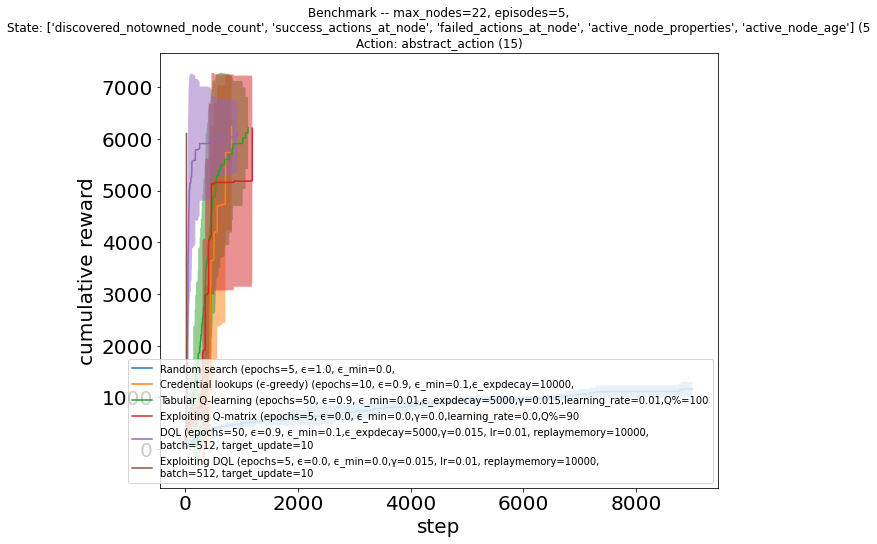

In [13]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

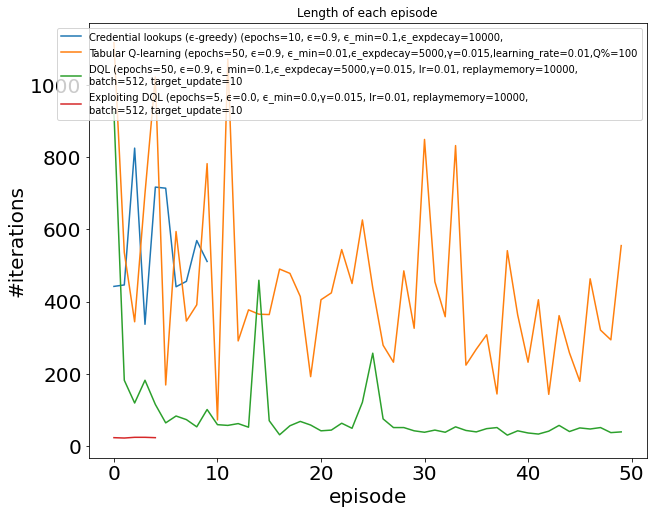

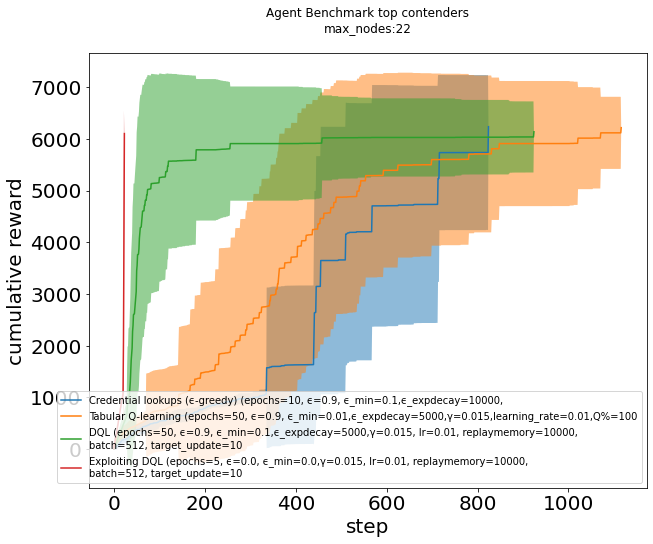

In [14]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

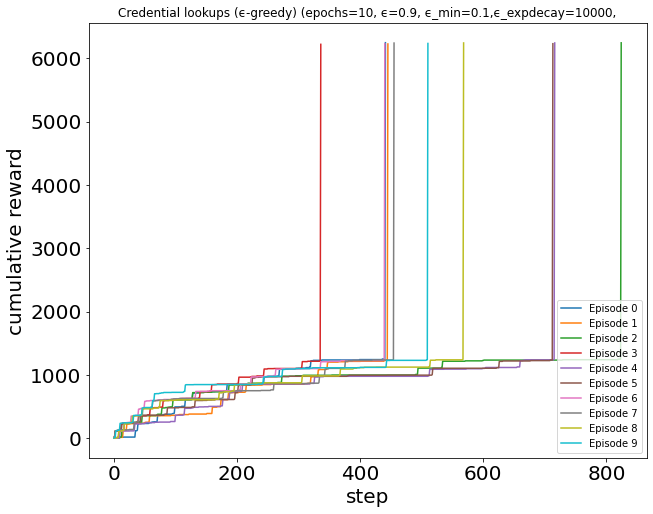

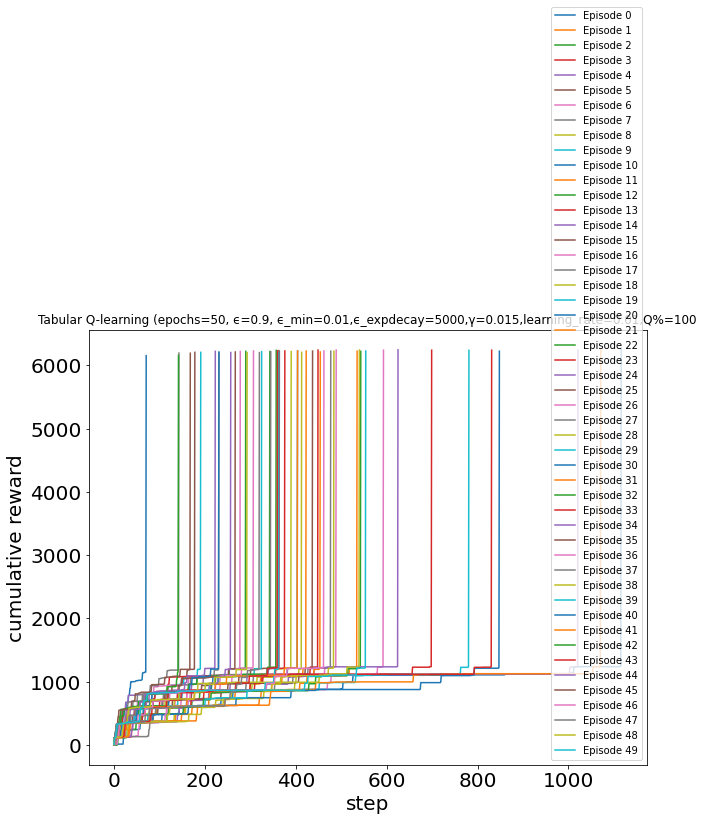

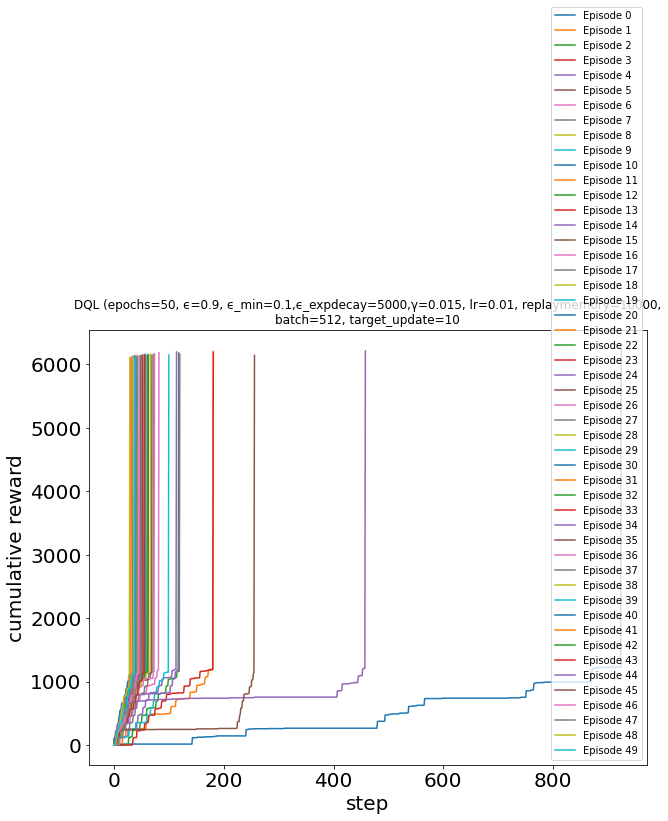

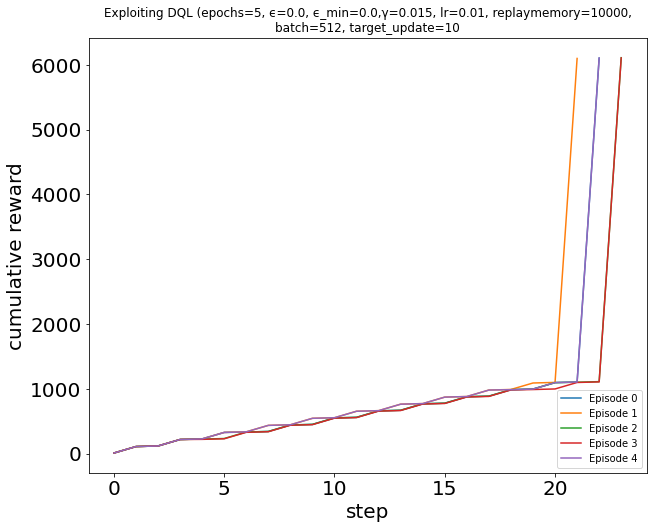

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)